In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import savetxt
from numpy import asarray
#import serial
import time
import requests
from pylab import *
import scipy
from scipy import *
import scipy.signal as signal
from scipy.misc import electrocardiogram
from scipy.io import loadmat

In [2]:
dt = "3551 3549 3548 3550 3564 3560 3536 3537 3542 3546 3549 3550 3548 3548 3549 3548 3549 3549 3549 3546 3548 3549 3546 3549 3550 3549 3549 3549 3550 3562 3566 3544 3540 3544 3546 3546 3549 3548 3550 3549 3547 3548 3546 3549 3547 3548 3548 3548 3549 3547 3548 3547 3548 3548 3547 3564 3560 3543 3538 3542 3545 3546 3549 3549 3547 3547 3550 3549 3549 3549 3546 3549 3546 3550 3550 3549 3548 3548 3548 3549 3557 3563 3546 3540 3542 3545 3542 3547 3546 3548 3548 3548 3546 3548 3546 3546 3549 3547 3548 3546 3548 3548 3547 3547 3549 3548 3562 3558 3539 3539 3542 3545 3548 3548 3549 3549 3549 3547 3549 3546 3548 3549 3549 3548 3548 3546 3549 3547 3549 3546 3549 3550 3565 3562 3540 3538 3542 3545 3548 3548 3550 3550 3549 3549 3549 3548 3548 3550 3548 3548 3547 3548 3547 3548 3549 3548 3547 3560 3561 3540 3537 3541 3544 3549 3549 3546 3548 3549 3550 3546 3548 3549 3549 3548 3548 3548 3548 3546 3547 3548 3550 3549 3548 3562 3552 3538 3538 3542 3547 3548 3546 3548 3549 3550 3549 3549 3549 3549 3548 3549 3548 3547 3548 3547 3548 3548 3548 3547 3555 3564 3554 3537 3538 3544 3546 3547 3548 3548 3549 3547 3549 3546 3546 3548 3547 3548 3548 3546 3549 3548 3548 3549 3548 3547 3562 3560 3540 3540 3542 3545 3548 3548 3548 3548 3549 3548 3549 3549 3547 3546 3549 3547 3548 3546 3546 3547 3548 3544 3546 3548 3562 3549 3541 3542 3544 3545 3548 3549 3547 3545 3548 3550 3547 3548 3546 3548 3549 3545 3547 3549 3548 3546 3548 3550 3546 3560 3562 3541 3538 3543 3546 3546 3549 3549 3546 3549 3546 3548 3547 3546 3548 3547 3547 3545 3547 3546 3547 3548 3548 3546 3546 3561 3553 3540 3540 3539 3544 3546 3548 3547 3547 3548 3547 3546 3548 3547 3548 3547 3546 3545 3548 3548 3546 3544 3548 3544 3554 3561 3548 3536 3539 3544 3546 3548 3546 3548 3548 3545 3546 3545 3546 3548 3548 3546 3548 3548 3547 3546 3548 3548 3546 3546 3563 3560 3539 3536 3540 3543 3544 3546 3545 3545 3548 3546 3547 3548 3549 3546 3546 3547 3548 3546 3547 3546 3545 3546 3546 3541 3562 3552 3535 3537 3544 3545 3546 3548 3546 3548 3546 3548 3548 3548 3545 3548 3548 3545 3544 3548 3546 3547 3546 3547 3548 3558 3564 3548 3536 3538 3544 3546 3548 3550 3548 3550 3547 3548 3546 3547 3546 3546 3544 3547 3545 3545 3545 3545 3547 3546 3547 3561 3552 3538 3541 3544 3542 3548 3546 3549 3547 3547 3546 3548 3548 3546 3548 3547 3546 3547 3548 3546 3545 3548 3546 3548 3553 3561 3541 3536 3538 3544 3545 3547 3546 3546 3549 3548 3548 3546 3547 3547 3549 3545 3547 3546 3548 3547 3545 3547 3546 3548 3562 3554 3538 3536 3541 3544 3546 3546 3545 3546 3549 3547 3545 3547 3545 3547 3547 3548 3547 3548 3548 3545 3547 3547 3545 3546 3560 3549 3540 3539 3542 3545 3547 3547 3545 3548 3548 3548 3546 3546 3546 3548 3546 3546 3546 3546 3548 3546 3545 3546 3548 3558 3562 3539 3538 3540 3544 3546 3548 3546 3549 3549 3548 3548 3548 3548 3545 3548 3548 3548 3548 3548 3546 3545 3546 3545 3546 3564 3558 3554 3540 3535 3538 3541 3543 3546 3549 3549 3548 3548 3547 3548 3546 3548 3548 3547 3548 3547 3545 3548 3548 3548 3556 3562 3553 3537 3537 3542 3544 3546 3547 3548 3549 3547 3546 3549 3548 3546 3548 3548 3546 3548 3549 3549 3548 3546 3548 3545 3560 3556 3540 3540 3542 3544 3546 3546 3549 3546 3547 3549 3548 3548 3546 3547 3546 3546 3547 3547 3548 3546 3548 3546 3548 3548 3566 3551 3538 3540 3542 3544 3549 3547 3546 3549 3548 3546 3548 3547 3547 3546 3548 3548 3547 3548 3548 3548 3549 3548 3547 3560 3561 3541 3538 3540 3544 3547 3548 3547 3549 3549 3548 3546 3549 3548 3549 3546 3546 3545 3549 3548 3546 3548 3546 3547 3546 3563 3561 3548 3536 3537 3541 3546 3549 3547 3549 3548 3548 3549 3549 3549 3548 3548 3548 3548 3548 3548 3547 3548 3548 3546 3556 3564 3545 3538 3541 3545 3546 3550 3548 3548 3549 3550 3547 3550 3548 3546 3546 3546 3549 3545 3548 3548 3547 3549 3546 3548 3561 3560 3540 3538 3541 3546 3548 3548 3548 3548 3548 3546 3546 3548 3548 3546 3548 3548 3548 3548 3546 3549 3546 3548 3547 3541 3564 3550 3538 3540 3541 3544 3547 3547 3548 3548 3547 3546 3549 3548 3548 3549 3550 3548 3546 3547 3547 3548 3547 3548 3549 3560 3562 3556 3555 3556 3554 3556 3554 3554 3556 3554 3556 3556 3557 3556 3557 3554 3557 3556 3557 3560 3558 3558 3560 3558 3533 3553 3551 3535 3538 3546 3549 3552 3552 3552 3553 3552 3552 3552 3550 3552 3551 3552 3551 3550 3552 3552 3552 3552 3552 3551 3558 3571 3549 3539 3544 3547 3549 3552 3553 3551 3553 3550 3553 3551 3551 3552 3550 3551 3551 3550 3552 3551 3550 3551 3550 3550 3567 3566 3565 3535 3535 3539 3546 3549 3548 3553 3553 3550 3548 3551 3550 3550 3551 3549 3550 3553 3550 3550 3551 3550 3550 3548 3568 3554 3538 3540 3546 3550 3551 3550 3550 3553 3550 3550 3550 3552 3550 3551 3552 3548 3551 3550 3550 3550 3551 3549 3550 3563 3567 3561 3535 3536 3541 3546 3550 3551 3550 3552 3549 3550 3552 3551 3550 3552 3551 3550 3550 3551 3551 3551 3551 3550 3549 3567 3564 3539 3539 3541 3546 3549 3548 3548 3550 3548 3548 3551 3550 3549 3548 3549 3550 3549 3549 3548 3549 3550 3547 3550 3558 3565 3561 3557 3556 3535 3535 3541 3546 3549 3551 3550 3550 3552 3549 3551 3551 3551 3550 3550 3549 3549 3550 3552 3551 3548 3562 3560 3542 3541 3545 3546 3549 3550 3550 3550 3551 3549 3548 3551 3548 3549 3550 3546 3548 3550 3549 3549 3549 3548 3549 3549 3564 3552 3538 3544 3545 3545 3548 3546 3549 3548 3546 3546 3546 3546 3549 3550 3551 3548 3550 3551 3549 3548 3550 3549 3549 3560 3562 3545 3541 3541 3546 3549 3549 3547 3550 3549 3549 3549 3549 3549 3551 3550 3549 3549 3551 3549 3548 3549 3550 3546 3549 3563 3556 3541 3541 3544 3546 3551 3550 3549 3552 3548 3547 3549 3549 3550 3548 3550 3548 3548 3550 3548 3548 3550 3548 3547 3555 3560 3548 3540 3545 3546 3546 3551 3548 3549 3550 3549 3549 3550 3551 3548 3550 3550 3549 3549 3550 3549 3549 3550 3549 3546 3565 3563 3541 3538 3541 3545 3549 3548 3549 3550 3551 3548 3549 3552 3549 3549 3550 3549 3547 3550 3548 3549 3550 3548 3546 3550 3566 3553 3540 3542 3545 3545 3550 3548 3549 3550 3548 3550 3551 3548 3549 3548 3548 3548 3547 3548 3548 3548 3548 3548 3548 3561 3564 3544 3540 3544 3545 3548 3549 3550 3548 3549 3549 3548 3549 3548 3549 3550 3549 3547 3551 3549 3549 3550 3550 3549 3550 3566 3558 3539 3542 3544 3548 3550 3550 3550 3550 3548 3552 3547 3551 3549 3550 3551 3549 3548 3551 3549 3548 3549 3548 3548 3554 3562 3547 3538 3542 3544 3546 3550 3548 3549 3549 3549 3550 3548 3548 3549 3550 3548 3548 3549 3550 3550 3549 3550 3548 3548 3562 3561 3541 3540 3544 3545 3549 3547 3550 3549 3552 3550 3550 3552 3550 3550 3549 3548 3549 3547 3546 3548 3551 3550 3548 3549 3564 3559 3537 3541 3544 3546 3548 3548 3548 3551 3549 3548 3551 3549 3549 3548 3549 3548 3549 3549 3550 3548 3549 3549 3548 3562 3565 3544 3540 3544 3548 3548 3551 3548 3549 3549 3548 3549 3550 3550 3549 3550 3548 3548 3549 3548 3548 3549 3548 3549 3549 3564 3557 3541 3542 3546 3544 3550 3550 3550 3551 3549 3549 3549 3550 3548 3548 3552 3549 3549 3549 3549 3550 3550 3548 3546 3558 3566 3548 3538 3545 3543 3546 3550 3550 3549 3550 3549 3549 3551 3548 3548 3550 3549 3549 3549 3551 3549 3549 3550 3547 3549 3564 3568 3540 3541 3545 3545 3550 3549 3548 3549 3551 3550 3550 3550 3546 3548 3549 3547 3548 3551 3548 3548 3550 3549 3548 3548 3565 3563 3544 3537 3539 3542 3546 3548 3547 3550 3549 3549 3550 3549 3551 3551 3550 3549 3549 3550 3549 3549 3550 3549 3546 3560 3561 3544 3542 3541 3546 3547 3549 3546 3548 3551 3550 3549 3551 3546 3549 3549 3549 3549 3548 3546 3549 3549 3552 3548 3548 3566 3556 3538 3541 3542 3549 3549 3548 3549 3549 3548 3548 3548 3549 3550 3549 3549 3549 3548 3549 3545 3548 3549 3549 3548 3557 3564 3560 3538 3539 3541 3546 3551 3548 3551 3550 3550 3548 3550 3550 3548 3549 3548 3550 3550 3550 3549 3546 3550 3548 3549 3565 3561 3540 3538 3546 3547 3548 3549 3548 3549 3550 3548 3550 3550 3549 3549 3550 3549 3548 3548 3548 3548 3550 3549 3548 3548 3565 3551 3540 3544 3542 3545 3551 3549 3549 3550 3549 3549 3552 3548 3548 3550 3550 3550 3548 3549 3548 3548 3549 3549 3548 3560 3561 3549 3538 3536 3539 3543 3549 3549 3549 3548 3550 3548 3551 3548 3549 3552 3549 3548 3551 3550 3549 3549 3550 3549 3549 3565 3561 3541 3540 3542 3545 3551 3550 3549 3551 3550 3550 3549 3551 3550 3550 3549 3548 3548 3552 3549 3549 3548 3549 3549 3556 3564 3548 3540 3546 3544 3545 3550 3548 3548 3550 3549 3549 3550 3550 3549 3550 3549 3548 3549 3551 3548 3548 3552 3548 3549 3561 3564 3541 3539 3542 3548 3550 3548 3549 3549 3551 3549 3546 3551 3549 3547 3552 3549 3548 3549 3549 3548 3550 3549 3547 3550 3566 3556 3537 3542 3546 3546 3549 3549 3548 3550 3550 3549 3551 3549 3552 3549 3551 3549 3548 3550 3550 3549 3550 3548 3547 3562 3564 3544 3540 3541 3546 3548 3550 3551 3549 3551 3549 3550 3551 3549 3546 3550 3550 3548 3551 3548 3548 3548 3549 3548 3550 3564 3558 3538 3541 3544 3546 3549 3550 3548 3549 3548 3548 3548 3550 3547 3548 3550 3549 3549 3551 3550 3548 3551 3549 3550 3555 3564 3561 3539 3538 3540 3546 3551 3549 3549 3551 3550 3550 3551 3548 3548 3551 3548 3548 3548 3550 3549 3548 3550 3550 3550 3565 3564 3539 3538 3544 3544 3551 3549 3549 3551 3551 3549 3548 3550 3548 3550 3551 3550 3549 3551 3549 3547 3551 3550 3548 3548 3566 3565 3540 3541 3542 3546 3551 3550 3550 3551 3551 3550 3552 3549 3549 3549 3551 3550 3550 3550 3551 3550 3553 3550 3550 3561 3565 3546 3544 3542 3546 3549 3552 3550 3549 3551 3551 3549 3551 3550 3549 3551 3551 3548 3552 3549 3552 3549 3551 3549 3549 3566 3562 3537 3542 3544 3548 3552 3549 3549 3550 3551 3550 3549 3552 3549 3550 3553 3550 3548 3553 3548 3550 3551 3549 3549 3566 3565 3552 3536 3542 3544 3547 3551 3548 3548 3551 3550 3550 3551 3550 3548 3550 3549 3551 3549 3551 3550 3548 3551 3548 3548 3565 3563 3538 3541 3544 3546 3551 3548 3551 3549 3551 3550 3550 3552 3548 3550 3550 3550 3548 3549 3550 3548 3550 3550 3549 3549 3566 3554 3542 3544 3546 3549 3553 3550 3549 3550 3550 3549 3551 3549 3549 3549 3552 3550 3550 3552 3550 3549 3552 3549 3550 3561 3562 3562 3541 3536 3540 3545 3553 3551 3549 3551 3550 3550 3551 3548 3550 3552 3549 3549 3552 3549 3548 3548 3551 3550 3549 3565 3556 3541 3544 3546 3547 3553 3549 3552 3550 3551 3549 3550 3551 3546 3548 3551 3549 3549 3552 3550 3548 3550 3549 3549 3556 3566 3550 3540 3545 3546 3548 3551 3550 3549 3550 3550 3550 3552 3550 3551 3550 3550 3550 3549 3551 3550 3550 3550 3549 3550 3563 3565 3540 3541 3542 3548 3552 3548 3551 3550 3552 3550 3550 3551 3550 3549 3551 3549 3548 3551 3550 3548 3550 3549 3548 3550 3566 3564 3542 3540 3544 3546 3551 3549 3550 3554 3548 3549 3551 3550 3550 3550 3552 3550 3549 3550 3548 3549 3551 3549 3549 3562 3564 3544 3544 3541 3546 3548 3552 3550 3549 3551 3550 3550 3554 3549 3550 3553 3549 3548 3551 3550 3548 3547 3551 3550 3549 3565 3562 3562 3539 3536 3540 3549 3548 3550 3552 3551 3550 3551 3552 3549 3549 3554 3551 3550 3551 3550 3550 3552 3549 3550 3557 3566 3563 3556 3537 3535 3540 3549 3550 3550 3553 3551 3550 3551 3549 3550 3551 3549 3549 3548 3552 3550 3551 3553 3548 3549 3565 3565 3541 3541 3541 3544 3551 3550 3549 3548 3552 3551 3549 3550 3551 3549 3551 3550 3550 3554 3548 3549 3552 3551 3550 3550 3566 3562 3541 3542 3542 3544 3550 3548 3549 3551 3551 3550 3550 3549 3549 3548 3552 3550 3547 3549 3547 3549 3550 3547 3546 3562 3565 3552 3541 3536 3542 3546 3551 3550 3548 3553 3550 3548 3551 3549 3548 3550 3548 3548 3551 3549 3550 3550 3553 3549 3548 3564 3568 3540 3542 3545 3545 3550 3549 3551 3554 3549 3551 3549 3553 3551 3551 3552 3550 3549 3552 3548 3548 3552 3548 3551 3556 3566 3550 3539 3548 3549 3548 3553 3550 3550 3552 3549 3549 3552 3549 3548 3552 3549 3548 3549 3552 3549 3551 3552 3550 3551 3566 3564 3544 3545 3546 3547 3552 3550 3548 3550 3552 3551 3550 3552 3550 3550 3552 3549 3549 3551 3550 3551 3551 3551 3549 3548 3567 3550 3541 3544 3545 3547 3552 3550 3550 3554 3551 3552 3554 3549 3549 3550 3554 3548 3549 3552 3550 3549 3553 3547 3550 3560 3565 3550 3544 3541 3545 3546 3552 3548 3549 3553 3548 3549 3551 3548 3549 3552 3550 3550 3552 3546 3549 3550 3553 3549 3548 3564 3557 3540 3546 3548 3548 3551 3549 3547 3553 3549 3550 3549 3552 3548 3549 3551 3549 3547 3550 3548 3548 3551 3548 3548 3555 3565 3560 3536 3544 3544 3548 3552 3548 3550 3552 3548 3550 3552 3550 3549 3554 3548 3549 3549 3552 3549 3548 3554 3549 3549 3566 3565 3544 3542 3545 3546 3550 3550 3550 3551 3554 3550 3550 3554 3550 3549 3554 3550 3549 3551 3549 3548 3552 3549 3549 3550 3566 3565 3548 3537 3540 3544 3550 3550 3551 3553 3546 3546 3551 3549 3548 3550 3554 3548 3549 3552 3550 3550 3551 3549 3549 3562 3565 3546 3543 3540 3545 3548 3553 3550 3550 3552 3549 3550 3553 3550 3548 3552 3548 3548 3550 3549 3550 3550 3553 3550 3549 3567 3561 3540 3545 3542 3547 3553 3548 3552 3554 3547 3549 3549 @3551 3549 3548 3550 3564 3560 3536 3537 3542 3546 3549 3550 3548 3548 3549 3548 3549 3549 3549 3546 3548 3549 3546 3549 3550 3549 3549 3549 3550 3562 3566 3544 3540 3544 3546 3546 3549 3548 3550 3549 3547 3548 3546 3549 3547 3548 3548 3548 3549 3547 3548 3547 3548 3548 3547 3564 3560 3543 3538 3542 3545 3546 3549 3549 3547 3547 3550 3549 3549 3549 3546 3549 3546 3550 3550 3549 3548 3548 3548 3549 3557 3563 3546 3540 3542 3545 3542 3547 3546 3548 3548 3548 3546 3548 3546 3546 3549 3547 3548 3546 3548 3548 3547 3547 3549 3548 3562 3558 3539 3539 3542 3545 3548 3548 3549 3549 3549 3547 3549 3546 3548 3549 3549 3548 3548 3546 3549 3547 3549 3546 3549 3550 3565 3562 3540 3538 3542 3545 3548 3548 3550 3550 3549 3549 3549 3548 3548 3550 3548 3548 3547 3548 3547 3548 3549 3548 3547 3560 3561 3540 3537 3541 3544 3549 3549 3546 3548 3549 3550 3546 3548 3549 3549 3548 3548 3548 3548 3546 3547 3548 3550 3549 3548 3562 3552 3538 3538 3542 3547 3548 3546 3548 3549 3550 3549 3549 3549 3549 3548 3549 3548 3547 3548 3547 3548 3548 3548 3547 3555 3564 3554 3537 3538 3544 3546 3547 3548 3548 3549 3547 3549 3546 3546 3548 3547 3548 3548 3546 3549 3548 3548 3549 3548 3547 3562 3560 3540 3540 3542 3545 3548 3548 3548 3548 3549 3548 3549 3549 3547 3546 3549 3547 3548 3546 3546 3547 3548 3544 3546 3548 3562 3549 3541 3542 3544 3545 3548 3549 3547 3545 3548 3550 3547 3548 3546 3548 3549 3545 3547 3549 3548 3546 3548 3550 3546 3560 3562 3541 3538 3543 3546 3546 3549 3549 3546 3549 3546 3548 3547 3546 3548 3547 3547 3545 3547 3546 3547 3548 3548 3546 3546 3561 3553 3540 3540 3539 3544 3546 3548 3547 3547 3548 3547 3546 3548 3547 3548 3547 3546 3545 3548 3548 3546 3544 3548 3544 3554 3561 3548 3536 3539 3544 3546 3548 3546 3548 3548 3545 3546 3545 3546 3548 3548 3546 3548 3548 3547 3546 3548 3548 3546 3546 3563 3560 3539 3536 3540 3543 3544 3546 3545 3545 3548 3546 3547 3548 3549 3546 3546 3547 3548 3546 3547 3546 3545 3546 3546 3541 3562 3552 3535 3537 3544 3545 3546 3548 3546 3548 3546 3548 3548 3548 3545 3548 3548 3545 3544 3548 3546 3547 3546 3547 3548 3558 3564 3548 3536 3538 3544 3546 3548 3550 3548 3550 3547 3548 3546 3547 3546 3546 3544 3547 3545 3545 3545 3545 3547 3546 3547 3561 3552 3538 3541 3544 3542 3548 3546 3549 3547 3547 3546 3548 3548 3546 3548 3547 3546 3547 3548 3546 3545 3548 3546 3548 3553 3561 3541 3536 3538 3544 3545 3547 3546 3546 3549 3548 3548 3546 3547 3547 3549 3545 3547 3546 3548 3547 3545 3547 3546 3548 3562 3554 3538 3536 3541 3544 3546 3546 3545 3546 3549 3547 3545 3547 3545 3547 3547 3548 3547 3548 3548 3545 3547 3547 3545 3546 3560 3549 3540 3539 3542 3545 3547 3547 3545 3548 3548 3548 3546 3546 3546 3548 3546 3546 3546 3546 3548 3546 3545 3546 3548 3558 3562 3539 3538 3540 3544 3546 3548 3546 3549 3549 3548 3548 3548 3548 3545 3548 3548 3548 3548 3548 3546 3545 3546 3545 3546 3564 3558 3554 3540 3535 3538 3541 3543 3546 3549 3549 3548 3548 3547 3548 3546 3548 3548 3547 3548 3547 3545 3548 3548 3548 3556 3562 3553 3537 3537 3542 3544 3546 3547 3548 3549 3547 3546 3549 3548 3546 3548 3548 3546 3548 3549 3549 3548 3546 3548 3545 3560 3556 3540 3540 3542 3544 3546 3546 3549 3546 3547 3549 3548 3548 3546 3547 3546 3546 3547 3547 3548 3546 3548 3546 3548 3548 3566 3551 3538 3540 3542 3544 3549 3547 3546 3549 3548 3546 3548 3547 3547 3546 3548 3548 3547 3548 3548 3548 3549 3548 3547 3560 3561 3541 3538 3540 3544 3547 3548 3547 3549 3549 3548 3546 3549 3548 3549 3546 3546 3545 3549 3548 3546 3548 3546 3547 3546 3563 3561 3548 3536 3537 3541 3546 3549 3547 3549 3548 3548 3549 3549 3549 3548 3548 3548 3548 3548 3548 3547 3548 3548 3546 3556 3564 3545 3538 3541 3545 3546 3550 3548 3548 3549 3550 3547 3550 3548 3546 3546 3546 3549 3545 3548 3548 3547 3549 3546 3548 3561 3560 3540 3538 3541 3546 3548 3548 3548 3548 3548 3546 3546 3548 3548 3546 3548 3548 3548 3548 3546 3549 3546 3548 3547 3541 3564 3550 3538 3540 3541 3544 3547 3547 3548 3548 3547 3546 3549 3548 3548 3549 3550 3548 3546 3547 3547 3548 3547 3548 3549 3560 3562 3556 3555 3556 3554 3556 3554 3554 3556 3554 3556 3556 3557 3556 3557 3554 3557 3556 3557 3560 3558 3558 3560 3558 3533 3553 3551 3535 3538 3546 3549 3552 3552 3552 3553 3552 3552 3552 3550 3552 3551 3552 3551 3550 3552 3552 3552 3552 3552 3551 3558 3571 3549 3539 3544 3547 3549 3552 3553 3551 3553 3550 3553 3551 3551 3552 3550 3551 3551 3550 3552 3551 3550 3551 3550 3550 3567 3566 3565 3535 3535 3539 3546 3549 3548 3553 3553 3550 3548 3551 3550 3550 3551 3549 3550 3553 3550 3550 3551 3550 3550 3548 3568 3554 3538 3540 3546 3550 3551 3550 3550 3553 3550 3550 3550 3552 3550 3551 3552 3548 3551 3550 3550 3550 3551 3549 3550 3563 3567 3561 3535 3536 3541 3546 3550 3551 3550 3552 3549 3550 3552 3551 3550 3552 3551 3550 3550 3551 3551 3551 3551 3550 3549 3567 3564 3539 3539 3541 3546 3549 3548 3548 3550 3548 3548 3551 3550 3549 3548 3549 3550 3549 3549 3548 3549 3550 3547 3550 3558 3565 3561 3557 3556 3535 3535 3541 3546 3549 3551 3550 3550 3552 3549 3551 3551 3551 3550 3550 3549 3549 3550 3552 3551 3548 3562 3560 3542 3541 3545 3546 3549 3550 3550 3550 3551 3549 3548 3551 3548 3549 3550 3546 3548 3550 3549 3549 3549 3548 3549 3549 3564 3552 3538 3544 3545 3545 3548 3546 3549 3548 3546 3546 3546 3546 3549 3550 3551 3548 3550 3551 3549 3548 3550 3549 3549 3560 3562 3545 3541 3541 3546 3549 3549 3547 3550 3549 3549 3549 3549 3549 3551 3550 3549 3549 3551 3549 3548 3549 3550 3546 3549 3563 3556 3541 3541 3544 3546 3551 3550 3549 3552 3548 3547 3549 3549 3550 3548 3550 3548 3548 3550 3548 3548 3550 3548 3547 3555 3560 3548 3540 3545 3546 3546 3551 3548 3549 3550 3549 3549 3550 3551 3548 3550 3550 3549 3549 3550 3549 3549 3550 3549 3546 3565 3563 3541 3538 3541 3545 3549 3548 3549 3550 3551 3548 3549 3552 3549 3549 3550 3549 3547 3550 3548 3549 3550 3548 3546 3550 3566 3553 3540 3542 3545 3545 3550 3548 3549 3550 3548 3550 3551 3548 3549 3548 3548 3548 3547 3548 3548 3548 3548 3548 3548 3561 3564 3544 3540 3544 3545 3548 3549 3550 3548 3549 3549 3548 3549 3548 3549 3550 3549 3547 3551 3549 3549 3550 3550 3549 3550 3566 3558 3539 3542 3544 3548 3550 3550 3550 3550 3548 3552 3547 3551 3549 3550 3551 3549 3548 3551 3549 3548 3549 3548 3548 3554 3562 3547 3538 3542 3544 3546 3550 3548 3549 3549 3549 3550 3548 3548 3549 3550 3548 3548 3549 3550 3550 3549 3550 3548 3548 3562 3561 3541 3540 3544 3545 3549 3547 3550 3549 3552 3550 3550 3552 3550 3550 3549 3548 3549 3547 3546 3548 3551 3550 3548 3549 3564 3559 3537 3541 3544 3546 3548 3548 3548 3551 3549 3548 3551 3549 3549 3548 3549 3548 3549 3549 3550 3548 3549 3549 3548 3562 3565 3544 3540 3544 3548 3548 3551 3548 3549 3549 3548 3549 3550 3550 3549 3550 3548 3548 3549 3548 3548 3549 3548 3549 3549 3564 3557 3541 3542 3546 3544 3550 3550 3550 3551 3549 3549 3549 3550 3548 3548 3552 3549 3549 3549 3549 3550 3550 3548 3546 3558 3566 3548 3538 3545 3543 3546 3550 3550 3549 3550 3549 3549 3551 3548 3548 3550 3549 3549 3549 3551 3549 3549 3550 3547 3549 3564 3568 3540 3541 3545 3545 3550 3549 3548 3549 3551 3550 3550 3550 3546 3548 3549 3547 3548 3551 3548 3548 3550 3549 3548 3548 3565 3563 3544 3537 3539 3542 3546 3548 3547 3550 3549 3549 3550 3549 3551 3551 3550 3549 3549 3550 3549 3549 3550 3549 3546 3560 3561 3544 3542 3541 3546 3547 3549 3546 3548 3551 3550 3549 3551 3546 3549 3549 3549 3549 3548 3546 3549 3549 3552 3548 3548 3566 3556 3538 3541 3542 3549 3549 3548 3549 3549 3548 3548 3548 3549 3550 3549 3549 3549 3548 3549 3545 3548 3549 3549 3548 3557 3564 3560 3538 3539 3541 3546 3551 3548 3551 3550 3550 3548 3550 3550 3548 3549 3548 3550 3550 3550 3549 3546 3550 3548 3549 3565 3561 3540 3538 3546 3547 3548 3549 3548 3549 3550 3548 3550 3550 3549 3549 3550 3549 3548 3548 3548 3548 3550 3549 3548 3548 3565 3551 3540 3544 3542 3545 3551 3549 3549 3550 3549 3549 3552 3548 3548 3550 3550 3550 3548 3549 3548 3548 3549 3549 3548 3560 3561 3549 3538 3536 3539 3543 3549 3549 3549 3548 3550 3548 3551 3548 3549 3552 3549 3548 3551 3550 3549 3549 3550 3549 3549 3565 3561 3541 3540 3542 3545 3551 3550 3549 3551 3550 3550 3549 3551 3550 3550 3549 3548 3548 3552 3549 3549 3548 3549 3549 3556 3564 3548 3540 3546 3544 3545 3550 3548 3548 3550 3549 3549 3550 3550 3549 3550 3549 3548 3549 3551 3548 3548 3552 3548 3549 3561 3564 3541 3539 3542 3548 3550 3548 3549 3549 3551 3549 3546 3551 3549 3547 3552 3549 3548 3549 3549 3548 3550 3549 3547 3550 3566 3556 3537 3542 3546 3546 3549 3549 3548 3550 3550 3549 3551 3549 3552 3549 3551 3549 3548 3550 3550 3549 3550 3548 3547 3562 3564 3544 3540 3541 3546 3548 3550 3551 3549 3551 3549 3550 3551 3549 3546 3550 3550 3548 3551 3548 3548 3548 3549 3548 3550 3564 3558 3538 3541 3544 3546 3549 3550 3548 3549 3548 3548 3548 3550 3547 3548 3550 3549 3549 3551 3550 3548 3551 3549 3550 3555 3564 3561 3539 3538 3540 3546 3551 3549 3549 3551 3550 3550 3551 3548 3548 3551 3548 3548 3548 3550 3549 3548 3550 3550 3550 3565 3564 3539 3538 3544 3544 3551 3549 3549 3551 3551 3549 3548 3550 3548 3550 3551 3550 3549 3551 3549 3547 3551 3550 3548 3548 3566 3565 3540 3541 3542 3546 3551 3550 3550 3551 3551 3550 3552 3549 3549 3549 3551 3550 3550 3550 3551 3550 3553 3550 3550 3561 3565 3546 3544 3542 3546 3549 3552 3550 3549 3551 3551 3549 3551 3550 3549 3551 3551 3548 3552 3549 3552 3549 3551 3549 3549 3566 3562 3537 3542 3544 3548 3552 3549 3549 3550 3551 3550 3549 3552 3549 3550 3553 3550 3548 3553 3548 3550 3551 3549 3549 3566 3565 3552 3536 3542 3544 3547 3551 3548 3548 3551 3550 3550 3551 3550 3548 3550 3549 3551 3549 3551 3550 3548 3551 3548 3548 3565 3563 3538 3541 3544 3546 3551 3548 3551 3549 3551 3550 3550 3552 3548 3550 3550 3550 3548 3549 3550 3548 3550 3550 3549 3549 3566 3554 3542 3544 3546 3549 3553 3550 3549 3550 3550 3549 3551 3549 3549 3549 3552 3550 3550 3552 3550 3549 3552 3549 3550 3561 3562 3562 3541 3536 3540 3545 3553 3551 3549 3551 3550 3550 3551 3548 3550 3552 3549 3549 3552 3549 3548 3548 3551 3550 3549 3565 3556 3541 3544 3546 3547 3553 3549 3552 3550 3551 3549 3550 3551 3546 3548 3551 3549 3549 3552 3550 3548 3550 3549 3549 3556 3566 3550 3540 3545 3546 3548 3551 3550 3549 3550 3550 3550 3552 3550 3551 3550 3550 3550 3549 3551 3550 3550 3550 3549 3550 3563 3565 3540 3541 3542 3548 3552 3548 3551 3550 3552 3550 3550 3551 3550 3549 3551 3549 3548 3551 3550 3548 3550 3549 3548 3550 3566 3564 3542 3540 3544 3546 3551 3549 3550 3554 3548 3549 3551 3550 3550 3550 3552 3550 3549 3550 3548 3549 3551 3549 3549 3562 3564 3544 3544 3541 3546 3548 3552 3550 3549 3551 3550 3550 3554 3549 3550 3553 3549 3548 3551 3550 3548 3547 3551 3550 3549 3565 3562 3562 3539 3536 3540 3549 3548 3550 3552 3551 3550 3551 3552 3549 3549 3554 3551 3550 3551 3550 3550 3552 3549 3550 3557 3566 3563 3556 3537 3535 3540 3549 3550 3550 3553 3551 3550 3551 3549 3550 3551 3549 3549 3548 3552 3550 3551 3553 3548 3549 3565 3565 3541 3541 3541 3544 3551 3550 3549 3548 3552 3551 3549 3550 3551 3549 3551 3550 3550 3554 3548 3549 3552 3551 3550 3550 3566 3562 3541 3542 3542 3544 3550 3548 3549 3551 3551 3550 3550 3549 3549 3548 3552 3550 3547 3549 3547 3549 3550 3547 3546 3562 3565 3552 3541 3536 3542 3546 3551 3550 3548 3553 3550 3548 3551 3549 3548 3550 3548 3548 3551 3549 3550 3550 3553 3549 3548 3564 3568 3540 3542 3545 3545 3550 3549 3551 3554 3549 3551 3549 3553 3551 3551 3552 3550 3549 3552 3548 3548 3552 3548 3551 3556 3566 3550 3539 3548 3549 3548 3553 3550 3550 3552 3549 3549 3552 3549 3548 3552 3549 3548 3549 3552 3549 3551 3552 3550 3551 3566 3564 3544 3545 3546 3547 3552 3550 3548 3550 3552 3551 3550 3552 3550 3550 3552 3549 3549 3551 3550 3551 3551 3551 3549 3548 3567 3550 3541 3544 3545 3547 3552 3550 3550 3554 3551 3552 3554 3549 3549 3550 3554 3548 3549 3552 3550 3549 3553 3547 3550 3560 3565 3550 3544 3541 3545 3546 3552 3548 3549 3553 3548 3549 3551 3548 3549 3552 3550 3550 3552 3546 3549 3550 3553 3549 3548 3564 3557 3540 3546 3548 3548 3551 3549 3547 3553 3549 3550 3549 3552 3548 3549 3551 3549 3547 3550 3548 3548 3551 3548 3548 3555 3565 3560 3536 3544 3544 3548 3552 3548 3550 3552 3548 3550 3552 3550 3549 3554 3548 3549 3549 3552 3549 3548 3554 3549 3549 3566 3565 3544 3542 3545 3546 3550 3550 3550 3551 3554 3550 3550 3554 3550 3549 3554 3550 3549 3551 3549 3548 3552 3549 3549 3550 3566 3565 3548 3537 3540 3544 3550 3550 3551 3553 3546 3546 3551 3549 3548 3550 3554 3548 3549 3552 3550 3550 3551 3549 3549 3562 3565 3546 3543 3540 3545 3548 3553 3550 3550 3552 3549 3550 3553 3550 3548 3552 3548 3548 3550 3549 3550 3550 3553 3550 3549 3567 3561 3540 3545 3542 3547 3553 3548 3552 3554 3547 3549 3549 @3551 3549 3548 3550 3564 3560 3536 3537 3542 3546 3549 3550 3548 3548 3549 3548 3549 3549 3549 3546 3548 3549 3546 3549 3550 3549 3549 3549 3550 3562 3566 3544 3540 3544 3546 3546 3549 3548 3550 3549 3547 3548 3546 3549 3547 3548 3548 3548 3549 3547 3548 3547 3548 3548 3547 3564 3560 3543 3538 3542 3545 3546 3549 3549 3547 3547 3550 3549 3549 3549 3546 3549 3546 3550 3550 3549 3548 3548 3548 3549 3557 3563 3546 3540 3542 3545 3542 3547 3546 3548 3548 3548 3546 3548 3546 3546 3549 3547 3548 3546 3548 3548 3547 3547 3549 3548 3562 3558 3539 3539 3542 3545 3548 3548 3549 3549 3549 3547 3549 3546 3548 3549 3549 3548 3548 3546 3549 3547 3549 3546 3549 3550 3565 3562 3540 3538 3542 3545 3548 3548 3550 3550 3549 3549 3549 3548 3548 3550 3548 3548 3547 3548 3547 3548 3549 3548 3547 3560 3561 3540 3537 3541 3544 3549 3549 3546 3548 3549 3550 3546 3548 3549 3549 3548 3548 3548 3548 3546 3547 3548 3550 3549 3548 3562 3552 3538 3538 3542 3547 3548 3546 3548 3549 3550 3549 3549 3549 3549 3548 3549 3548 3547 3548 3547 3548 3548 3548 3547 3555 3564 3554 3537 3538 3544 3546 3547 3548 3548 3549 3547 3549 3546 3546 3548 3547 3548 3548 3546 3549 3548 3548 3549 3548 3547 3562 3560 3540 3540 3542 3545 3548 3548 3548 3548 3549 3548 3549 3549 3547 3546 3549 3547 3548 3546 3546 3547 3548 3544 3546 3548 3562 3549 3541 3542 3544 3545 3548 3549 3547 3545 3548 3550 3547 3548 3546 3548 3549 3545 3547 3549 3548 3546 3548 3550 3546 3560 3562 3541 3538 3543 3546 3546 3549 3549 3546 3549 3546 3548 3547 3546 3548 3547 3547 3545 3547 3546 3547 3548 3548 3546 3546 3561 3553 3540 3540 3539 3544 3546 3548 3547 3547 3548 3547 3546 3548 3547 3548 3547 3546 3545 3548 3548 3546 3544 3548 3544 3554 3561 3548 3536 3539 3544 3546 3548 3546 3548 3548 3545 3546 3545 3546 3548 3548 3546 3548 3548 3547 3546 3548 3548 3546 3546 3563 3560 3539 3536 3540 3543 3544 3546 3545 3545 3548 3546 3547 3548 3549 3546 3546 3547 3548 3546 3547 3546 3545 3546 3546 3541 3562 3552 3535 3537 3544 3545 3546 3548 3546 3548 3546 3548 3548 3548 3545 3548 3548 3545 3544 3548 3546 3547 3546 3547 3548 3558 3564 3548 3536 3538 3544 3546 3548 3550 3548 3550 3547 3548 3546 3547 3546 3546 3544 3547 3545 3545 3545 3545 3547 3546 3547 3561 3552 3538 3541 3544 3542 3548 3546 3549 3547 3547 3546 3548 3548 3546 3548 3547 3546 3547 3548 3546 3545 3548 3546 3548 3553 3561 3541 3536 3538 3544 3545 3547 3546 3546 3549 3548 3548 3546 3547 3547 3549 3545 3547 3546 3548 3547 3545 3547 3546 3548 3562 3554 3538 3536 3541 3544 3546 3546 3545 3546 3549 3547 3545 3547 3545 3547 3547 3548 3547 3548 3548 3545 3547 3547 3545 3546 3560 3549 3540 3539 3542 3545 3547 3547 3545 3548 3548 3548 3546 3546 3546 3548 3546 3546 3546 3546 3548 3546 3545 3546 3548 3558 3562 3539 3538 3540 3544 3546 3548 3546 3549 3549 3548 3548 3548 3548 3545 3548 3548 3548 3548 3548 3546 3545 3546 3545 3546 3564 3558 3554 3540 3535 3538 3541 3543 3546 3549 3549 3548 3548 3547 3548 3546 3548 3548 3547 3548 3547 3545 3548 3548 3548 3556 3562 3553 3537 3537 3542 3544 3546 3547 3548 3549 3547 3546 3549 3548 3546 3548 3548 3546 3548 3549 3549 3548 3546 3548 3545 3560 3556 3540 3540 3542 3544 3546 3546 3549 3546 3547 3549 3548 3548 3546 3547 3546 3546 3547 3547 3548 3546 3548 3546 3548 3548 3566 3551 3538 3540 3542 3544 3549 3547 3546 3549 3548 3546 3548 3547 3547 3546 3548 3548 3547 3548 3548 3548 3549 3548 3547 3560 3561 3541 3538 3540 3544 3547 3548 3547 3549 3549 3548 3546 3549 3548 3549 3546 3546 3545 3549 3548 3546 3548 3546 3547 3546 3563 3561 3548 3536 3537 3541 3546 3549 3547 3549 3548 3548 3549 3549 3549 3548 3548 3548 3548 3548 3548 3547 3548 3548 3546 3556 3564 3545 3538 3541 3545 3546 3550 3548 3548 3549 3550 3547 3550 3548 3546 3546 3546 3549 3545 3548 3548 3547 3549 3546 3548 3561 3560 3540 3538 3541 3546 3548 3548 3548 3548 3548 3546 3546 3548 3548 3546 3548 3548 3548 3548 3546 3549 3546 3548 3547 3541 3564 3550 3538 3540 3541 3544 3547 3547 3548 3548 3547 3546 3549 3548 3548 3549 3550 3548 3546 3547 3547 3548 3547 3548 3549 3560 3562 3556 3555 3556 3554 3556 3554 3554 3556 3554 3556 3556 3557 3556 3557 3554 3557 3556 3557 3560 3558 3558 3560 3558 3533 3553 3551 3535 3538 3546 3549 3552 3552 3552 3553 3552 3552 3552 3550 3552 3551 3552 3551 3550 3552 3552 3552 3552 3552 3551 3558 3571 3549 3539 3544 3547 3549 3552 3553 3551 3553 3550 3553 3551 3551 3552 3550 3551 3551 3550 3552 3551 3550 3551 3550 3550 3567 3566 3565 3535 3535 3539 3546 3549 3548 3553 3553 3550 3548 3551 3550 3550 3551 3549 3550 3553 3550 3550 3551 3550 3550 3548 3568 3554 3538 3540 3546 3550 3551 3550 3550 3553 3550 3550 3550 3552 3550 3551 3552 3548 3551 3550 3550 3550 3551 3549 3550 3563 3567 3561 3535 3536 3541 3546 3550 3551 3550 3552 3549 3550 3552 3551 3550 3552 3551 3550 3550 3551 3551 3551 3551 3550 3549 3567 3564 3539 3539 3541 3546 3549 3548 3548 3550 3548 3548 3551 3550 3549 3548 3549 3550 3549 3549 3548 3549 3550 3547 3550 3558 3565 3561 3557 3556 3535 3535 3541 3546 3549 3551 3550 3550 3552 3549 3551 3551 3551 3550 3550 3549 3549 3550 3552 3551 3548 3562 3560 3542 3541 3545 3546 3549 3550 3550 3550 3551 3549 3548 3551 3548 3549 3550 3546 3548 3550 3549 3549 3549 3548 3549 3549 3564 3552 3538 3544 3545 3545 3548 3546 3549 3548 3546 3546 3546 3546 3549 3550 3551 3548 3550 3551 3549 3548 3550 3549 3549 3560 3562 3545 3541 3541 3546 3549 3549 3547 3550 3549 3549 3549 3549 3549 3551 3550 3549 3549 3551 3549 3548 3549 3550 3546 3549 3563 3556 3541 3541 3544 3546 3551 3550 3549 3552 3548 3547 3549 3549 3550 3548 3550 3548 3548 3550 3548 3548 3550 3548 3547 3555 3560 3548 3540 3545 3546 3546 3551 3548 3549 3550 3549 3549 3550 3551 3548 3550 3550 3549 3549 3550 3549 3549 3550 3549 3546 3565 3563 3541 3538 3541 3545 3549 3548 3549 3550 3551 3548 3549 3552 3549 3549 3550 3549 3547 3550 3548 3549 3550 3548 3546 3550 3566 3553 3540 3542 3545 3545 3550 3548 3549 3550 3548 3550 3551 3548 3549 3548 3548 3548 3547 3548 3548 3548 3548 3548 3548 3561 3564 3544 3540 3544 3545 3548 3549 3550 3548 3549 3549 3548 3549 3548 3549 3550 3549 3547 3551 3549 3549 3550 3550 3549 3550 3566 3558 3539 3542 3544 3548 3550 3550 3550 3550 3548 3552 3547 3551 3549 3550 3551 3549 3548 3551 3549 3548 3549 3548 3548 3554 3562 3547 3538 3542 3544 3546 3550 3548 3549 3549 3549 3550 3548 3548 3549 3550 3548 3548 3549 3550 3550 3549 3550 3548 3548 3562 3561 3541 3540 3544 3545 3549 3547 3550 3549 3552 3550 3550 3552 3550 3550 3549 3548 3549 3547 3546 3548 3551 3550 3548 3549 3564 3559 3537 3541 3544 3546 3548 3548 3548 3551 3549 3548 3551 3549 3549 3548 3549 3548 3549 3549 3550 3548 3549 3549 3548 3562 3565 3544 3540 3544 3548 3548 3551 3548 3549 3549 3548 3549 3550 3550 3549 3550 3548 3548 3549 3548 3548 3549 3548 3549 3549 3564 3557 3541 3542 3546 3544 3550 3550 3550 3551 3549 3549 3549 3550 3548 3548 3552 3549 3549 3549 3549 3550 3550 3548 3546 3558 3566 3548 3538 3545 3543 3546 3550 3550 3549 3550 3549 3549 3551 3548 3548 3550 3549 3549 3549 3551 3549 3549 3550 3547 3549 3564 3568 3540 3541 3545 3545 3550 3549 3548 3549 3551 3550 3550 3550 3546 3548 3549 3547 3548 3551 3548 3548 3550 3549 3548 3548 3565 3563 3544 3537 3539 3542 3546 3548 3547 3550 3549 3549 3550 3549 3551 3551 3550 3549 3549 3550 3549 3549 3550 3549 3546 3560 3561 3544 3542 3541 3546 3547 3549 3546 3548 3551 3550 3549 3551 3546 3549 3549 3549 3549 3548 3546 3549 3549 3552 3548 3548 3566 3556 3538 3541 3542 3549 3549 3548 3549 3549 3548 3548 3548 3549 3550 3549 3549 3549 3548 3549 3545 3548 3549 3549 3548 3557 3564 3560 3538 3539 3541 3546 3551 3548 3551 3550 3550 3548 3550 3550 3548 3549 3548 3550 3550 3550 3549 3546 3550 3548 3549 3565 3561 3540 3538 3546 3547 3548 3549 3548 3549 3550 3548 3550 3550 3549 3549 3550 3549 3548 3548 3548 3548 3550 3549 3548 3548 3565 3551 3540 3544 3542 3545 3551 3549 3549 3550 3549 3549 3552 3548 3548 3550 3550 3550 3548 3549 3548 3548 3549 3549 3548 3560 3561 3549 3538 3536 3539 3543 3549 3549 3549 3548 3550 3548 3551 3548 3549 3552 3549 3548 3551 3550 3549 3549 3550 3549 3549 3565 3561 3541 3540 3542 3545 3551 3550 3549 3551 3550 3550 3549 3551 3550 3550 3549 3548 3548 3552 3549 3549 3548 3549 3549 3556 3564 3548 3540 3546 3544 3545 3550 3548 3548 3550 3549 3549 3550 3550 3549 3550 3549 3548 3549 3551 3548 3548 3552 3548 3549 3561 3564 3541 3539 3542 3548 3550 3548 3549 3549 3551 3549 3546 3551 3549 3547 3552 3549 3548 3549 3549 3548 3550 3549 3547 3550 3566 3556 3537 3542 3546 3546 3549 3549 3548 3550 3550 3549 3551 3549 3552 3549 3551 3549 3548 3550 3550 3549 3550 3548 3547 3562 3564 3544 3540 3541 3546 3548 3550 3551 3549 3551 3549 3550 3551 3549 3546 3550 3550 3548 3551 3548 3548 3548 3549 3548 3550 3564 3558 3538 3541 3544 3546 3549 3550 3548 3549 3548 3548 3548 3550 3547 3548 3550 3549 3549 3551 3550 3548 3551 3549 3550 3555 3564 3561 3539 3538 3540 3546 3551 3549 3549 3551 3550 3550 3551 3548 3548 3551 3548 3548 3548 3550 3549 3548 3550 3550 3550 3565 3564 3539 3538 3544 3544 3551 3549 3549 3551 3551 3549 3548 3550 3548 3550 3551 3550 3549 3551 3549 3547 3551 3550 3548 3548 3566 3565 3540 3541 3542 3546 3551 3550 3550 3551 3551 3550 3552 3549 3549 3549 3551 3550 3550 3550 3551 3550 3553 3550 3550 3561 3565 3546 3544 3542 3546 3549 3552 3550 3549 3551 3551 3549 3551 3550 3549 3551 3551 3548 3552 3549 3552 3549 3551 3549 3549 3566 3562 3537 3542 3544 3548 3552 3549 3549 3550 3551 3550 3549 3552 3549 3550 3553 3550 3548 3553 3548 3550 3551 3549 3549 3566 3565 3552 3536 3542 3544 3547 3551 3548 3548 3551 3550 3550 3551 3550 3548 3550 3549 3551 3549 3551 3550 3548 3551 3548 3548 3565 3563 3538 3541 3544 3546 3551 3548 3551 3549 3551 3550 3550 3552 3548 3550 3550 3550 3548 3549 3550 3548 3550 3550 3549 3549 3566 3554 3542 3544 3546 3549 3553 3550 3549 3550 3550 3549 3551 3549 3549 3549 3552 3550 3550 3552 3550 3549 3552 3549 3550 3561 3562 3562 3541 3536 3540 3545 3553 3551 3549 3551 3550 3550 3551 3548 3550 3552 3549 3549 3552 3549 3548 3548 3551 3550 3549 3565 3556 3541 3544 3546 3547 3553 3549 3552 3550 3551 3549 3550 3551 3546 3548 3551 3549 3549 3552 3550 3548 3550 3549 3549 3556 3566 3550 3540 3545 3546 3548 3551 3550 3549 3550 3550 3550 3552 3550 3551 3550 3550 3550 3549 3551 3550 3550 3550 3549 3550 3563 3565 3540 3541 3542 3548 3552 3548 3551 3550 3552 3550 3550 3551 3550 3549 3551 3549 3548 3551 3550 3548 3550 3549 3548 3550 3566 3564 3542 3540 3544 3546 3551 3549 3550 3554 3548 3549 3551 3550 3550 3550 3552 3550 3549 3550 3548 3549 3551 3549 3549 3562 3564 3544 3544 3541 3546 3548 3552 3550 3549 3551 3550 3550 3554 3549 3550 3553 3549 3548 3551 3550 3548 3547 3551 3550 3549 3565 3562 3562 3539 3536 3540 3549 3548 3550 3552 3551 3550 3551 3552 3549 3549 3554 3551 3550 3551 3550 3550 3552 3549 3550 3557 3566 3563 3556 3537 3535 3540 3549 3550 3550 3553 3551 3550 3551 3549 3550 3551 3549 3549 3548 3552 3550 3551 3553 3548 3549 3565 3565 3541 3541 3541 3544 3551 3550 3549 3548 3552 3551 3549 3550 3551 3549 3551 3550 3550 3554 3548 3549 3552 3551 3550 3550 3566 3562 3541 3542 3542 3544 3550 3548 3549 3551 3551 3550 3550 3549 3549 3548 3552 3550 3547 3549 3547 3549 3550 3547 3546 3562 3565 3552 3541 3536 3542 3546 3551 3550 3548 3553 3550 3548 3551 3549 3548 3550 3548 3548 3551 3549 3550 3550 3553 3549 3548 3564 3568 3540 3542 3545 3545 3550 3549 3551 3554 3549 3551 3549 3553 3551 3551 3552 3550 3549 3552 3548 3548 3552 3548 3551 3556 3566 3550 3539 3548 3549 3548 3553 3550 3550 3552 3549 3549 3552 3549 3548 3552 3549 3548 3549 3552 3549 3551 3552 3550 3551 3566 3564 3544 3545 3546 3547 3552 3550 3548 3550 3552 3551 3550 3552 3550 3550 3552 3549 3549 3551 3550 3551 3551 3551 3549 3548 3567 3550 3541 3544 3545 3547 3552 3550 3550 3554 3551 3552 3554 3549 3549 3550 3554 3548 3549 3552 3550 3549 3553 3547 3550 3560 3565 3550 3544 3541 3545 3546 3552 3548 3549 3553 3548 3549 3551 3548 3549 3552 3550 3550 3552 3546 3549 3550 3553 3549 3548 3564 3557 3540 3546 3548 3548 3551 3549 3547 3553 3549 3550 3549 3552 3548 3549 3551 3549 3547 3550 3548 3548 3551 3548 3548 3555 3565 3560 3536 3544 3544 3548 3552 3548 3550 3552 3548 3550 3552 3550 3549 3554 3548 3549 3549 3552 3549 3548 3554 3549 3549 3566 3565 3544 3542 3545 3546 3550 3550 3550 3551 3554 3550 3550 3554 3550 3549 3554 3550 3549 3551 3549 3548 3552 3549 3549 3550 3566 3565 3548 3537 3540 3544 3550 3550 3551 3553 3546 3546 3551 3549 3548 3550 3554 3548 3549 3552 3550 3550 3551 3549 3549 3562 3565 3546 3543 3540 3545 3548 3553 3550 3550 3552 3549 3550 3553 3550 3548 3552 3548 3548 3550 3549 3550 3550 3553 3550 3549 3567 3561 3540 3545 3542 3547 3553 3548 3552 3554 3547 3549 3549 @3551 3549 3548 3550 3564 3560 3536 3537 3542 3546 3549 3550 3548 3548 3549 3548 3549 3549 3549 3546 3548 3549 3546 3549 3550 3549 3549 3549 3550 3562 3566 3544 3540 3544 3546 3546 3549 3548 3550 3549 3547 3548 3546 3549 3547 3548 3548 3548 3549 3547 3548 3547 3548 3548 3547 3564 3560 3543 3538 3542 3545 3546 3549 3549 3547 3547 3550 3549 3549 3549 3546 3549 3546 3550 3550 3549 3548 3548 3548 3549 3557 3563 3546 3540 3542 3545 3542 3547 3546 3548 3548 3548 3546 3548 3546 3546 3549 3547 3548 3546 3548 3548 3547 3547 3549 3548 3562 3558 3539 3539 3542 3545 3548 3548 3549 3549 3549 3547 3549 3546 3548 3549 3549 3548 3548 3546 3549 3547 3549 3546 3549 3550 3565 3562 3540 3538 3542 3545 3548 3548 3550 3550 3549 3549 3549 3548 3548 3550 3548 3548 3547 3548 3547 3548 3549 3548 3547 3560 3561 3540 3537 3541 3544 3549 3549 3546 3548 3549 3550 3546 3548 3549 3549 3548 3548 3548 3548 3546 3547 3548 3550 3549 3548 3562 3552 3538 3538 3542 3547 3548 3546 3548 3549 3550 3549 3549 3549 3549 3548 3549 3548 3547 3548 3547 3548 3548 3548 3547 3555 3564 3554 3537 3538 3544 3546 3547 3548 3548 3549 3547 3549 3546 3546 3548 3547 3548 3548 3546 3549 3548 3548 3549 3548 3547 3562 3560 3540 3540 3542 3545 3548 3548 3548 3548 3549 3548 3549 3549 3547 3546 3549 3547 3548 3546 3546 3547 3548 3544 3546 3548 3562 3549 3541 3542 3544 3545 3548 3549 3547 3545 3548 3550 3547 3548 3546 3548 3549 3545 3547 3549 3548 3546 3548 3550 3546 3560 3562 3541 3538 3543 3546 3546 3549 3549 3546 3549 3546 3548 3547 3546 3548 3547 3547 3545 3547 3546 3547 3548 3548 3546 3546 3561 3553 3540 3540 3539 3544 3546 3548 3547 3547 3548 3547 3546 3548 3547 3548 3547 3546 3545 3548 3548 3546 3544 3548 3544 3554 3561 3548 3536 3539 3544 3546 3548 3546 3548 3548 3545 3546 3545 3546 3548 3548 3546 3548 3548 3547 3546 3548 3548 3546 3546 3563 3560 3539 3536 3540 3543 3544 3546 3545 3545 3548 3546 3547 3548 3549 3546 3546 3547 3548 3546 3547 3546 3545 3546 3546 3541 3562 3552 3535 3537 3544 3545 3546 3548 3546 3548 3546 3548 3548 3548 3545 3548 3548 3545 3544 3548 3546 3547 3546 3547 3548 3558 3564 3548 3536 3538 3544 3546 3548 3550 3548 3550 3547 3548 3546 3547 3546 3546 3544 3547 3545 3545 3545 3545 3547 3546 3547 3561 3552 3538 3541 3544 3542 3548 3546 3549 3547 3547 3546 3548 3548 3546 3548 3547 3546 3547 3548 3546 3545 3548 3546 3548 3553 3561 3541 3536 3538 3544 3545 3547 3546 3546 3549 3548 3548 3546 3547 3547 3549 3545 3547 3546 3548 3547 3545 3547 3546 3548 3562 3554 3538 3536 3541 3544 3546 3546 3545 3546 3549 3547 3545 3547 3545 3547 3547 3548 3547 3548 3548 3545 3547 3547 3545 3546 3560 3549 3540 3539 3542 3545 3547 3547 3545 3548 3548 3548 3546 3546 3546 3548 3546 3546 3546 3546 3548 3546 3545 3546 3548 3558 3562 3539 3538 3540 3544 3546 3548 3546 3549 3549 3548 3548 3548 3548 3545 3548 3548 3548 3548 3548 3546 3545 3546 3545 3546 3564 3558 3554 3540 3535 3538 3541 3543 3546 3549 3549 3548 3548 3547 3548 3546 3548 3548 3547 3548 3547 3545 3548 3548 3548 3556 3562 3553 3537 3537 3542 3544 3546 3547 3548 3549 3547 3546 3549 3548 3546 3548 3548 3546 3548 3549 3549 3548 3546 3548 3545 3560 3556 3540 3540 3542 3544 3546 3546 3549 3546 3547 3549 3548 3548 3546 3547 3546 3546 3547 3547 3548 3546 3548 3546 3548 3548 3566 3551 3538 3540 3542 3544 3549 3547 3546 3549 3548 3546 3548 3547 3547 3546 3548 3548 3547 3548 3548 3548 3549 3548 3547 3560 3561 3541 3538 3540 3544 3547 3548 3547 3549 3549 3548 3546 3549 3548 3549 3546 3546 3545 3549 3548 3546 3548 3546 3547 3546 3563 3561 3548 3536 3537 3541 3546 3549 3547 3549 3548 3548 3549 3549 3549 3548 3548 3548 3548 3548 3548 3547 3548 3548 3546 3556 3564 3545 3538 3541 3545 3546 3550 3548 3548 3549 3550 3547 3550 3548 3546 3546 3546 3549 3545 3548 3548 3547 3549 3546 3548 3561 3560 3540 3538 3541 3546 3548 3548 3548 3548 3548 3546 3546 3548 3548 3546 3548 3548 3548 3548 3546 3549 3546 3548 3547 3541 3564 3550 3538 3540 3541 3544 3547 3547 3548 3548 3547 3546 3549 3548 3548 3549 3550 3548 3546 3547 3547 3548 3547 3548 3549 3560 3562 3556 3555 3556 3554 3556 3554 3554 3556 3554 3556 3556 3557 3556 3557 3554 3557 3556 3557 3560 3558 3558 3560 3558 3533 3553 3551 3535 3538 3546 3549 3552 3552 3552 3553 3552 3552 3552 3550 3552 3551 3552 3551 3550 3552 3552 3552 3552 3552 3551 3558 3571 3549 3539 3544 3547 3549 3552 3553 3551 3553 3550 3553 3551 3551 3552 3550 3551 3551 3550 3552 3551 3550 3551 3550 3550 3567 3566 3565 3535 3535 3539 3546 3549 3548 3553 3553 3550 3548 3551 3550 3550 3551 3549 3550 3553 3550 3550 3551 3550 3550 3548 3568 3554 3538 3540 3546 3550 3551 3550 3550 3553 3550 3550 3550 3552 3550 3551 3552 3548 3551 3550 3550 3550 3551 3549 3550 3563 3567 3561 3535 3536 3541 3546 3550 3551 3550 3552 3549 3550 3552 3551 3550 3552 3551 3550 3550 3551 3551 3551 3551 3550 3549 3567 3564 3539 3539 3541 3546 3549 3548 3548 3550 3548 3548 3551 3550 3549 3548 3549 3550 3549 3549 3548 3549 3550 3547 3550 3558 3565 3561 3557 3556 3535 3535 3541 3546 3549 3551 3550 3550 3552 3549 3551 3551 3551 3550 3550 3549 3549 3550 3552 3551 3548 3562 3560 3542 3541 3545 3546 3549 3550 3550 3550 3551 3549 3548 3551 3548 3549 3550 3546 3548 3550 3549 3549 3549 3548 3549 3549 3564 3552 3538 3544 3545 3545 3548 3546 3549 3548 3546 3546 3546 3546 3549 3550 3551 3548 3550 3551 3549 3548 3550 3549 3549 3560 3562 3545 3541 3541 3546 3549 3549 3547 3550 3549 3549 3549 3549 3549 3551 3550 3549 3549 3551 3549 3548 3549 3550 3546 3549 3563 3556 3541 3541 3544 3546 3551 3550 3549 3552 3548 3547 3549 3549 3550 3548 3550 3548 3548 3550 3548 3548 3550 3548 3547 3555 3560 3548 3540 3545 3546 3546 3551 3548 3549 3550 3549 3549 3550 3551 3548 3550 3550 3549 3549 3550 3549 3549 3550 3549 3546 3565 3563 3541 3538 3541 3545 3549 3548 3549 3550 3551 3548 3549 3552 3549 3549 3550 3549 3547 3550 3548 3549 3550 3548 3546 3550 3566 3553 3540 3542 3545 3545 3550 3548 3549 3550 3548 3550 3551 3548 3549 3548 3548 3548 3547 3548 3548 3548 3548 3548 3548 3561 3564 3544 3540 3544 3545 3548 3549 3550 3548 3549 3549 3548 3549 3548 3549 3550 3549 3547 3551 3549 3549 3550 3550 3549 3550 3566 3558 3539 3542 3544 3548 3550 3550 3550 3550 3548 3552 3547 3551 3549 3550 3551 3549 3548 3551 3549 3548 3549 3548 3548 3554 3562 3547 3538 3542 3544 3546 3550 3548 3549 3549 3549 3550 3548 3548 3549 3550 3548 3548 3549 3550 3550 3549 3550 3548 3548 3562 3561 3541 3540 3544 3545 3549 3547 3550 3549 3552 3550 3550 3552 3550 3550 3549 3548 3549 3547 3546 3548 3551 3550 3548 3549 3564 3559 3537 3541 3544 3546 3548 3548 3548 3551 3549 3548 3551 3549 3549 3548 3549 3548 3549 3549 3550 3548 3549 3549 3548 3562 3565 3544 3540 3544 3548 3548 3551 3548 3549 3549 3548 3549 3550 3550 3549 3550 3548 3548 3549 3548 3548 3549 3548 3549 3549 3564 3557 3541 3542 3546 3544 3550 3550 3550 3551 3549 3549 3549 3550 3548 3548 3552 3549 3549 3549 3549 3550 3550 3548 3546 3558 3566 3548 3538 3545 3543 3546 3550 3550 3549 3550 3549 3549 3551 3548 3548 3550 3549 3549 3549 3551 3549 3549 3550 3547 3549 3564 3568 3540 3541 3545 3545 3550 3549 3548 3549 3551 3550 3550 3550 3546 3548 3549 3547 3548 3551 3548 3548 3550 3549 3548 3548 3565 3563 3544 3537 3539 3542 3546 3548 3547 3550 3549 3549 3550 3549 3551 3551 3550 3549 3549 3550 3549 3549 3550 3549 3546 3560 3561 3544 3542 3541 3546 3547 3549 3546 3548 3551 3550 3549 3551 3546 3549 3549 3549 3549 3548 3546 3549 3549 3552 3548 3548 3566 3556 3538 3541 3542 3549 3549 3548 3549 3549 3548 3548 3548 3549 3550 3549 3549 3549 3548 3549 3545 3548 3549 3549 3548 3557 3564 3560 3538 3539 3541 3546 3551 3548 3551 3550 3550 3548 3550 3550 3548 3549 3548 3550 3550 3550 3549 3546 3550 3548 3549 3565 3561 3540 3538 3546 3547 3548 3549 3548 3549 3550 3548 3550 3550 3549 3549 3550 3549 3548 3548 3548 3548 3550 3549 3548 3548 3565 3551 3540 3544 3542 3545 3551 3549 3549 3550 3549 3549 3552 3548 3548 3550 3550 3550 3548 3549 3548 3548 3549 3549 3548 3560 3561 3549 3538 3536 3539 3543 3549 3549 3549 3548 3550 3548 3551 3548 3549 3552 3549 3548 3551 3550 3549 3549 3550 3549 3549 3565 3561 3541 3540 3542 3545 3551 3550 3549 3551 3550 3550 3549 3551 3550 3550 3549 3548 3548 3552 3549 3549 3548 3549 3549 3556 3564 3548 3540 3546 3544 3545 3550 3548 3548 3550 3549 3549 3550 3550 3549 3550 3549 3548 3549 3551 3548 3548 3552 3548 3549 3561 3564 3541 3539 3542 3548 3550 3548 3549 3549 3551 3549 3546 3551 3549 3547 3552 3549 3548 3549 3549 3548 3550 3549 3547 3550 3566 3556 3537 3542 3546 3546 3549 3549 3548 3550 3550 3549 3551 3549 3552 3549 3551 3549 3548 3550 3550 3549 3550 3548 3547 3562 3564 3544 3540 3541 3546 3548 3550 3551 3549 3551 3549 3550 3551 3549 3546 3550 3550 3548 3551 3548 3548 3548 3549 3548 3550 3564 3558 3538 3541 3544 3546 3549 3550 3548 3549 3548 3548 3548 3550 3547 3548 3550 3549 3549 3551 3550 3548 3551 3549 3550 3555 3564 3561 3539 3538 3540 3546 3551 3549 3549 3551 3550 3550 3551 3548 3548 3551 3548 3548 3548 3550 3549 3548 3550 3550 3550 3565 3564 3539 3538 3544 3544 3551 3549 3549 3551 3551 3549 3548 3550 3548 3550 3551 3550 3549 3551 3549 3547 3551 3550 3548 3548 3566 3565 3540 3541 3542 3546 3551 3550 3550 3551 3551 3550 3552 3549 3549 3549 3551 3550 3550 3550 3551 3550 3553 3550 3550 3561 3565 3546 3544 3542 3546 3549 3552 3550 3549 3551 3551 3549 3551 3550 3549 3551 3551 3548 3552 3549 3552 3549 3551 3549 3549 3566 3562 3537 3542 3544 3548 3552 3549 3549 3550 3551 3550 3549 3552 3549 3550 3553 3550 3548 3553 3548 3550 3551 3549 3549 3566 3565 3552 3536 3542 3544 3547 3551 3548 3548 3551 3550 3550 3551 3550 3548 3550 3549 3551 3549 3551 3550 3548 3551 3548 3548 3565 3563 3538 3541 3544 3546 3551 3548 3551 3549 3551 3550 3550 3552 3548 3550 3550 3550 3548 3549 3550 3548 3550 3550 3549 3549 3566 3554 3542 3544 3546 3549 3553 3550 3549 3550 3550 3549 3551 3549 3549 3549 3552 3550 3550 3552 3550 3549 3552 3549 3550 3561 3562 3562 3541 3536 3540 3545 3553 3551 3549 3551 3550 3550 3551 3548 3550 3552 3549 3549 3552 3549 3548 3548 3551 3550 3549 3565 3556 3541 3544 3546 3547 3553 3549 3552 3550 3551 3549 3550 3551 3546 3548 3551 3549 3549 3552 3550 3548 3550 3549 3549 3556 3566 3550 3540 3545 3546 3548 3551 3550 3549 3550 3550 3550 3552 3550 3551 3550 3550 3550 3549 3551 3550 3550 3550 3549 3550 3563 3565 3540 3541 3542 3548 3552 3548 3551 3550 3552 3550 3550 3551 3550 3549 3551 3549 3548 3551 3550 3548 3550 3549 3548 3550 3566 3564 3542 3540 3544 3546 3551 3549 3550 3554 3548 3549 3551 3550 3550 3550 3552 3550 3549 3550 3548 3549 3551 3549 3549 3562 3564 3544 3544 3541 3546 3548 3552 3550 3549 3551 3550 3550 3554 3549 3550 3553 3549 3548 3551 3550 3548 3547 3551 3550 3549 3565 3562 3562 3539 3536 3540 3549 3548 3550 3552 3551 3550 3551 3552 3549 3549 3554 3551 3550 3551 3550 3550 3552 3549 3550 3557 3566 3563 3556 3537 3535 3540 3549 3550 3550 3553 3551 3550 3551 3549 3550 3551 3549 3549 3548 3552 3550 3551 3553 3548 3549 3565 3565 3541 3541 3541 3544 3551 3550 3549 3548 3552 3551 3549 3550 3551 3549 3551 3550 3550 3554 3548 3549 3552 3551 3550 3550 3566 3562 3541 3542 3542 3544 3550 3548 3549 3551 3551 3550 3550 3549 3549 3548 3552 3550 3547 3549 3547 3549 3550 3547 3546 3562 3565 3552 3541 3536 3542 3546 3551 3550 3548 3553 3550 3548 3551 3549 3548 3550 3548 3548 3551 3549 3550 3550 3553 3549 3548 3564 3568 3540 3542 3545 3545 3550 3549 3551 3554 3549 3551 3549 3553 3551 3551 3552 3550 3549 3552 3548 3548 3552 3548 3551 3556 3566 3550 3539 3548 3549 3548 3553 3550 3550 3552 3549 3549 3552 3549 3548 3552 3549 3548 3549 3552 3549 3551 3552 3550 3551 3566 3564 3544 3545 3546 3547 3552 3550 3548 3550 3552 3551 3550 3552 3550 3550 3552 3549 3549 3551 3550 3551 3551 3551 3549 3548 3567 3550 3541 3544 3545 3547 3552 3550 3550 3554 3551 3552 3554 3549 3549 3550 3554 3548 3549 3552 3550 3549 3553 3547 3550 3560 3565 3550 3544 3541 3545 3546 3552 3548 3549 3553 3548 3549 3551 3548 3549 3552 3550 3550 3552 3546 3549 3550 3553 3549 3548 3564 3557 3540 3546 3548 3548 3551 3549 3547 3553 3549 3550 3549 3552 3548 3549 3551 3549 3547 3550 3548 3548 3551 3548 3548 3555 3565 3560 3536 3544 3544 3548 3552 3548 3550 3552 3548 3550 3552 3550 3549 3554 3548 3549 3549 3552 3549 3548 3554 3549 3549 3566 3565 3544 3542 3545 3546 3550 3550 3550 3551 3554 3550 3550 3554 3550 3549 3554 3550 3549 3551 3549 3548 3552 3549 3549 3550 3566 3565 3548 3537 3540 3544 3550 3550 3551 3553 3546 3546 3551 3549 3548 3550 3554 3548 3549 3552 3550 3550 3551 3549 3549 3562 3565 3546 3543 3540 3545 3548 3553 3550 3550 3552 3549 3550 3553 3550 3548 3552 3548 3548 3550 3549 3550 3550 3553 3550 3549 3567 3561 3540 3545 3542 3547 3553 3548 3552 3554 3547 3549 3549 @3551 3549 3548 3550 3564 3560 3536 3537 3542 3546 3549 3550 3548 3548 3549 3548 3549 3549 3549 3546 3548 3549 3546 3549 3550 3549 3549 3549 3550 3562 3566 3544 3540 3544 3546 3546 3549 3548 3550 3549 3547 3548 3546 3549 3547 3548 3548 3548 3549 3547 3548 3547 3548 3548 3547 3564 3560 3543 3538 3542 3545 3546 3549 3549 3547 3547 3550 3549 3549 3549 3546 3549 3546 3550 3550 3549 3548 3548 3548 3549 3557 3563 3546 3540 3542 3545 3542 3547 3546 3548 3548 3548 3546 3548 3546 3546 3549 3547 3548 3546 3548 3548 3547 3547 3549 3548 3562 3558 3539 3539 3542 3545 3548 3548 3549 3549 3549 3547 3549 3546 3548 3549 3549 3548 3548 3546 3549 3547 3549 3546 3549 3550 3565 3562 3540 3538 3542 3545 3548 3548 3550 3550 3549 3549 3549 3548 3548 3550 3548 3548 3547 3548 3547 3548 3549 3548 3547 3560 3561 3540 3537 3541 3544 3549 3549 3546 3548 3549 3550 3546 3548 3549 3549 3548 3548 3548 3548 3546 3547 3548 3550 3549 3548 3562 3552 3538 3538 3542 3547 3548 3546 3548 3549 3550 3549 3549 3549 3549 3548 3549 3548 3547 3548 3547 3548 3548 3548 3547 3555 3564 3554 3537 3538 3544 3546 3547 3548 3548 3549 3547 3549 3546 3546 3548 3547 3548 3548 3546 3549 3548 3548 3549 3548 3547 3562 3560 3540 3540 3542 3545 3548 3548 3548 3548 3549 3548 3549 3549 3547 3546 3549 3547 3548 3546 3546 3547 3548 3544 3546 3548 3562 3549 3541 3542 3544 3545 3548 3549 3547 3545 3548 3550 3547 3548 3546 3548 3549 3545 3547 3549 3548 3546 3548 3550 3546 3560 3562 3541 3538 3543 3546 3546 3549 3549 3546 3549 3546 3548 3547 3546 3548 3547 3547 3545 3547 3546 3547 3548 3548 3546 3546 3561 3553 3540 3540 3539 3544 3546 3548 3547 3547 3548 3547 3546 3548 3547 3548 3547 3546 3545 3548 3548 3546 3544 3548 3544 3554 3561 3548 3536 3539 3544 3546 3548 3546 3548 3548 3545 3546 3545 3546 3548 3548 3546 3548 3548 3547 3546 3548 3548 3546 3546 3563 3560 3539 3536 3540 3543 3544 3546 3545 3545 3548 3546 3547 3548 3549 3546 3546 3547 3548 3546 3547 3546 3545 3546 3546 3541 3562 3552 3535 3537 3544 3545 3546 3548 3546 3548 3546 3548 3548 3548 3545 3548 3548 3545 3544 3548 3546 3547 3546 3547 3548 3558 3564 3548 3536 3538 3544 3546 3548 3550 3548 3550 3547 3548 3546 3547 3546 3546 3544 3547 3545 3545 3545 3545 3547 3546 3547 3561 3552 3538 3541 3544 3542 3548 3546 3549 3547 3547 3546 3548 3548 3546 3548 3547 3546 3547 3548 3546 3545 3548 3546 3548 3553 3561 3541 3536 3538 3544 3545 3547 3546 3546 3549 3548 3548 3546 3547 3547 3549 3545 3547 3546 3548 3547 3545 3547 3546 3548 3562 3554 3538 3536 3541 3544 3546 3546 3545 3546 3549 3547 3545 3547 3545 3547 3547 3548 3547 3548 3548 3545 3547 3547 3545 3546 3560 3549 3540 3539 3542 3545 3547 3547 3545 3548 3548 3548 3546 3546 3546 3548 3546 3546 3546 3546 3548 3546 3545 3546 3548 3558 3562 3539 3538 3540 3544 3546 3548 3546 3549 3549 3548 3548 3548 3548 3545 3548 3548 3548 3548 3548 3546 3545 3546 3545 3546 3564 3558 3554 3540 3535 3538 3541 3543 3546 3549 3549 3548 3548 3547 3548 3546 3548 3548 3547 3548 3547 3545 3548 3548 3548 3556 3562 3553 3537 3537 3542 3544 3546 3547 3548 3549 3547 3546 3549 3548 3546 3548 3548 3546 3548 3549 3549 3548 3546 3548 3545 3560 3556 3540 3540 3542 3544 3546 3546 3549 3546 3547 3549 3548 3548 3546 3547 3546 3546 3547 3547 3548 3546 3548 3546 3548 3548 3566 3551 3538 3540 3542 3544 3549 3547 3546 3549 3548 3546 3548 3547 3547 3546 3548 3548 3547 3548 3548 3548 3549 3548 3547 3560 3561 3541 3538 3540 3544 3547 3548 3547 3549 3549 3548 3546 3549 3548 3549 3546 3546 3545 3549 3548 3546 3548 3546 3547 3546 3563 3561 3548 3536 3537 3541 3546 3549 3547 3549 3548 3548 3549 3549 3549 3548 3548 3548 3548 3548 3548 3547 3548 3548 3546 3556 3564 3545 3538 3541 3545 3546 3550 3548 3548 3549 3550 3547 3550 3548 3546 3546 3546 3549 3545 3548 3548 3547 3549 3546 3548 3561 3560 3540 3538 3541 3546 3548 3548 3548 3548 3548 3546 3546 3548 3548 3546 3548 3548 3548 3548 3546 3549 3546 3548 3547 3541 3564 3550 3538 3540 3541 3544 3547 3547 3548 3548 3547 3546 3549 3548 3548 3549 3550 3548 3546 3547 3547 3548 3547 3548 3549 3560 3562 3556 3555 3556 3554 3556 3554 3554 3556 3554 3556 3556 3557 3556 3557 3554 3557 3556 3557 3560 3558 3558 3560 3558 3533 3553 3551 3535 3538 3546 3549 3552 3552 3552 3553 3552 3552 3552 3550 3552 3551 3552 3551 3550 3552 3552 3552 3552 3552 3551 3558 3571 3549 3539 3544 3547 3549 3552 3553 3551 3553 3550 3553 3551 3551 3552 3550 3551 3551 3550 3552 3551 3550 3551 3550 3550 3567 3566 3565 3535 3535 3539 3546 3549 3548 3553 3553 3550 3548 3551 3550 3550 3551 3549 3550 3553 3550 3550 3551 3550 3550 3548 3568 3554 3538 3540 3546 3550 3551 3550 3550 3553 3550 3550 3550 3552 3550 3551 3552 3548 3551 3550 3550 3550 3551 3549 3550 3563 3567 3561 3535 3536 3541 3546 3550 3551 3550 3552 3549 3550 3552 3551 3550 3552 3551 3550 3550 3551 3551 3551 3551 3550 3549 3567 3564 3539 3539 3541 3546 3549 3548 3548 3550 3548 3548 3551 3550 3549 3548 3549 3550 3549 3549 3548 3549 3550 3547 3550 3558 3565 3561 3557 3556 3535 3535 3541 3546 3549 3551 3550 3550 3552 3549 3551 3551 3551 3550 3550 3549 3549 3550 3552 3551 3548 3562 3560 3542 3541 3545 3546 3549 3550 3550 3550 3551 3549 3548 3551 3548 3549 3550 3546 3548 3550 3549 3549 3549 3548 3549 3549 3564 3552 3538 3544 3545 3545 3548 3546 3549 3548 3546 3546 3546 3546 3549 3550 3551 3548 3550 3551 3549 3548 3550 3549 3549 3560 3562 3545 3541 3541 3546 3549 3549 3547 3550 3549 3549 3549 3549 3549 3551 3550 3549 3549 3551 3549 3548 3549 3550 3546 3549 3563 3556 3541 3541 3544 3546 3551 3550 3549 3552 3548 3547 3549 3549 3550 3548 3550 3548 3548 3550 3548 3548 3550 3548 3547 3555 3560 3548 3540 3545 3546 3546 3551 3548 3549 3550 3549 3549 3550 3551 3548 3550 3550 3549 3549 3550 3549 3549 3550 3549 3546 3565 3563 3541 3538 3541 3545 3549 3548 3549 3550 3551 3548 3549 3552 3549 3549 3550 3549 3547 3550 3548 3549 3550 3548 3546 3550 3566 3553 3540 3542 3545 3545 3550 3548 3549 3550 3548 3550 3551 3548 3549 3548 3548 3548 3547 3548 3548 3548 3548 3548 3548 3561 3564 3544 3540 3544 3545 3548 3549 3550 3548 3549 3549 3548 3549 3548 3549 3550 3549 3547 3551 3549 3549 3550 3550 3549 3550 3566 3558 3539 3542 3544 3548 3550 3550 3550 3550 3548 3552 3547 3551 3549 3550 3551 3549 3548 3551 3549 3548 3549 3548 3548 3554 3562 3547 3538 3542 3544 3546 3550 3548 3549 3549 3549 3550 3548 3548 3549 3550 3548 3548 3549 3550 3550 3549 3550 3548 3548 3562 3561 3541 3540 3544 3545 3549 3547 3550 3549 3552 3550 3550 3552 3550 3550 3549 3548 3549 3547 3546 3548 3551 3550 3548 3549 3564 3559 3537 3541 3544 3546 3548 3548 3548 3551 3549 3548 3551 3549 3549 3548 3549 3548 3549 3549 3550 3548 3549 3549 3548 3562 3565 3544 3540 3544 3548 3548 3551 3548 3549 3549 3548 3549 3550 3550 3549 3550 3548 3548 3549 3548 3548 3549 3548 3549 3549 3564 3557 3541 3542 3546 3544 3550 3550 3550 3551 3549 3549 3549 3550 3548 3548 3552 3549 3549 3549 3549 3550 3550 3548 3546 3558 3566 3548 3538 3545 3543 3546 3550 3550 3549 3550 3549 3549 3551 3548 3548 3550 3549 3549 3549 3551 3549 3549 3550 3547 3549 3564 3568 3540 3541 3545 3545 3550 3549 3548 3549 3551 3550 3550 3550 3546 3548 3549 3547 3548 3551 3548 3548 3550 3549 3548 3548 3565 3563 3544 3537 3539 3542 3546 3548 3547 3550 3549 3549 3550 3549 3551 3551 3550 3549 3549 3550 3549 3549 3550 3549 3546 3560 3561 3544 3542 3541 3546 3547 3549 3546 3548 3551 3550 3549 3551 3546 3549 3549 3549 3549 3548 3546 3549 3549 3552 3548 3548 3566 3556 3538 3541 3542 3549 3549 3548 3549 3549 3548 3548 3548 3549 3550 3549 3549 3549 3548 3549 3545 3548 3549 3549 3548 3557 3564 3560 3538 3539 3541 3546 3551 3548 3551 3550 3550 3548 3550 3550 3548 3549 3548 3550 3550 3550 3549 3546 3550 3548 3549 3565 3561 3540 3538 3546 3547 3548 3549 3548 3549 3550 3548 3550 3550 3549 3549 3550 3549 3548 3548 3548 3548 3550 3549 3548 3548 3565 3551 3540 3544 3542 3545 3551 3549 3549 3550 3549 3549 3552 3548 3548 3550 3550 3550 3548 3549 3548 3548 3549 3549 3548 3560 3561 3549 3538 3536 3539 3543 3549 3549 3549 3548 3550 3548 3551 3548 3549 3552 3549 3548 3551 3550 3549 3549 3550 3549 3549 3565 3561 3541 3540 3542 3545 3551 3550 3549 3551 3550 3550 3549 3551 3550 3550 3549 3548 3548 3552 3549 3549 3548 3549 3549 3556 3564 3548 3540 3546 3544 3545 3550 3548 3548 3550 3549 3549 3550 3550 3549 3550 3549 3548 3549 3551 3548 3548 3552 3548 3549 3561 3564 3541 3539 3542 3548 3550 3548 3549 3549 3551 3549 3546 3551 3549 3547 3552 3549 3548 3549 3549 3548 3550 3549 3547 3550 3566 3556 3537 3542 3546 3546 3549 3549 3548 3550 3550 3549 3551 3549 3552 3549 3551 3549 3548 3550 3550 3549 3550 3548 3547 3562 3564 3544 3540 3541 3546 3548 3550 3551 3549 3551 3549 3550 3551 3549 3546 3550 3550 3548 3551 3548 3548 3548 3549 3548 3550 3564 3558 3538 3541 3544 3546 3549 3550 3548 3549 3548 3548 3548 3550 3547 3548 3550 3549 3549 3551 3550 3548 3551 3549 3550 3555 3564 3561 3539 3538 3540 3546 3551 3549 3549 3551 3550 3550 3551 3548 3548 3551 3548 3548 3548 3550 3549 3548 3550 3550 3550 3565 3564 3539 3538 3544 3544 3551 3549 3549 3551 3551 3549 3548 3550 3548 3550 3551 3550 3549 3551 3549 3547 3551 3550 3548 3548 3566 3565 3540 3541 3542 3546 3551 3550 3550 3551 3551 3550 3552 3549 3549 3549 3551 3550 3550 3550 3551 3550 3553 3550 3550 3561 3565 3546 3544 3542 3546 3549 3552 3550 3549 3551 3551 3549 3551 3550 3549 3551 3551 3548 3552 3549 3552 3549 3551 3549 3549 3566 3562 3537 3542 3544 3548 3552 3549 3549 3550 3551 3550 3549 3552 3549 3550 3553 3550 3548 3553 3548 3550 3551 3549 3549 3566 3565 3552 3536 3542 3544 3547 3551 3548 3548 3551 3550 3550 3551 3550 3548 3550 3549 3551 3549 3551 3550 3548 3551 3548 3548 3565 3563 3538 3541 3544 3546 3551 3548 3551 3549 3551 3550 3550 3552 3548 3550 3550 3550 3548 3549 3550 3548 3550 3550 3549 3549 3566 3554 3542 3544 3546 3549 3553 3550 3549 3550 3550 3549 3551 3549 3549 3549 3552 3550 3550 3552 3550 3549 3552 3549 3550 3561 3562 3562 3541 3536 3540 3545 3553 3551 3549 3551 3550 3550 3551 3548 3550 3552 3549 3549 3552 3549 3548 3548 3551 3550 3549 3565 3556 3541 3544 3546 3547 3553 3549 3552 3550 3551 3549 3550 3551 3546 3548 3551 3549 3549 3552 3550 3548 3550 3549 3549 3556 3566 3550 3540 3545 3546 3548 3551 3550 3549 3550 3550 3550 3552 3550 3551 3550 3550 3550 3549 3551 3550 3550 3550 3549 3550 3563 3565 3540 3541 3542 3548 3552 3548 3551 3550 3552 3550 3550 3551 3550 3549 3551 3549 3548 3551 3550 3548 3550 3549 3548 3550 3566 3564 3542 3540 3544 3546 3551 3549 3550 3554 3548 3549 3551 3550 3550 3550 3552 3550 3549 3550 3548 3549 3551 3549 3549 3562 3564 3544 3544 3541 3546 3548 3552 3550 3549 3551 3550 3550 3554 3549 3550 3553 3549 3548 3551 3550 3548 3547 3551 3550 3549 3565 3562 3562 3539 3536 3540 3549 3548 3550 3552 3551 3550 3551 3552 3549 3549 3554 3551 3550 3551 3550 3550 3552 3549 3550 3557 3566 3563 3556 3537 3535 3540 3549 3550 3550 3553 3551 3550 3551 3549 3550 3551 3549 3549 3548 3552 3550 3551 3553 3548 3549 3565 3565 3541 3541 3541 3544 3551 3550 3549 3548 3552 3551 3549 3550 3551 3549 3551 3550 3550 3554 3548 3549 3552 3551 3550 3550 3566 3562 3541 3542 3542 3544 3550 3548 3549 3551 3551 3550 3550 3549 3549 3548 3552 3550 3547 3549 3547 3549 3550 3547 3546 3562 3565 3552 3541 3536 3542 3546 3551 3550 3548 3553 3550 3548 3551 3549 3548 3550 3548 3548 3551 3549 3550 3550 3553 3549 3548 3564 3568 3540 3542 3545 3545 3550 3549 3551 3554 3549 3551 3549 3553 3551 3551 3552 3550 3549 3552 3548 3548 3552 3548 3551 3556 3566 3550 3539 3548 3549 3548 3553 3550 3550 3552 3549 3549 3552 3549 3548 3552 3549 3548 3549 3552 3549 3551 3552 3550 3551 3566 3564 3544 3545 3546 3547 3552 3550 3548 3550 3552 3551 3550 3552 3550 3550 3552 3549 3549 3551 3550 3551 3551 3551 3549 3548 3567 3550 3541 3544 3545 3547 3552 3550 3550 3554 3551 3552 3554 3549 3549 3550 3554 3548 3549 3552 3550 3549 3553 3547 3550 3560 3565 3550 3544 3541 3545 3546 3552 3548 3549 3553 3548 3549 3551 3548 3549 3552 3550 3550 3552 3546 3549 3550 3553 3549 3548 3564 3557 3540 3546 3548 3548 3551 3549 3547 3553 3549 3550 3549 3552 3548 3549 3551 3549 3547 3550 3548 3548 3551 3548 3548 3555 3565 3560 3536 3544 3544 3548 3552 3548 3550 3552 3548 3550 3552 3550 3549 3554 3548 3549 3549 3552 3549 3548 3554 3549 3549 3566 3565 3544 3542 3545 3546 3550 3550 3550 3551 3554 3550 3550 3554 3550 3549 3554 3550 3549 3551 3549 3548 3552 3549 3549 3550 3566 3565 3548 3537 3540 3544 3550 3550 3551 3553 3546 3546 3551 3549 3548 3550 3554 3548 3549 3552 3550 3550 3551 3549 3549 3562 3565 3546 3543 3540 3545 3548 3553 3550 3550 3552 3549 3550 3553 3550 3548 3552 3548 3548 3550 3549 3550 3550 3553 3550 3549 3567 3561 3540 3545 3542 3547 3553 3548 3552 3554 3547 3549 3549 @1486 1471 1433 1307 25 -392 1001 1506 1662 1705 1710 1694 1690 1641 1653 1639 1624 1617 1561 1571 1571 1572 1562 1545 1538 1530 1517 1500 1489 692 -200 824 1448 1641 1700 1698 1684 1671 1631 1626 1623 1612 1594 1541 1564 1555 1553 1549 1535 1522 1519 1511 1486 1478 1472 208 -358 631 1418 1700 1773 1772 1783 1742 1738 1726 1718 1701 1646 1661 1655 1642 1634 1621 1601 1585 1581 1562 1559 1548 1081 -71 437 1381 1667 1752 1753 1735 1701 1701 1677 1677 1611 1539 1611 1611 1611 1602 1598 1579 1564 1563 1551 1525 1531 1520 438 -286 1019 1525 1685 1716 1709 1682 1695 1682 1655 1647 1596 1610 1582 1599 1583 1581 1574 1547 1555 1542 1519 1520 1521 1423 73 -402 951 1540 1736 1781 1741 1760 1754 1712 1720 1659 1666 1666 1664 1648 1622 1616 1612 1581 1587 1575 1550 1549 1546 723 -193 818 1472 1677 1736 1711 1710 1709 1704 1667 1631 1643 1628 1630 1630 1584 1593 1584 1559 1560 1550 1546 1519 1517 1511 219 -366 1024 1525 1690 1711 1709 1721 1709 1678 1636 1662 1648 1628 1631 1623 1581 1581 1581 1550 1557 1555 1517 1534 1516 1031 -90 -323 1163 1602 1739 1792 1772 1779 1774 1677 1720 1720 1691 1691 1686 1644 1648 1639 1629 1582 1594 1586 1550 1548 1543 439 -260 1067 1532 1658 1724 1705 1713 1709 1650 1630 1625 1644 1616 1618 1611 1568 1589 1578 1545 1552 1555 1515 1513 1515 1437 76 233 1283 1557 1680 1713 1690 1701 1635 1633 1645 1650 1610 1623 1609 1600 1557 1570 1564 1531 1520 1517 1470 1487 1478 664 -213 833 1394 1622 1676 1692 1656 1621 1640 1614 1618 1620 1570 1595 1590 1555 1563 1560 1521 1536 1525 1517 1447 1482 1483 196 -109 1135 1516 1659 1696 1675 1629 1663 1626 1645 1634 1627 1567 1585 1584 1544 1542 1536 1487 1500 1498 1458 1479 1480 991 -102 433 1344 1576 1673 1643 1561 1648 1658 1627 1642 1633 1589 1600 1603 1559 1560 1563 1558 1511 1515 1524 1476 1489 1483 392 -297 865 1458 1668 1720 1646 1697 1669 1674 1645 1654 1653 1602 1623 1598 1551 1569 1568 1529 1539 1532 1493 1510 1510 1431 76 -45 1207 1545 1698 1685 1672 1698 1702 1646 1669 1663 1602 1623 1616 1599 1550 1575 1573 1528 1542 1543 1489 1516 1514 682 -201 6 1249 1653 1740 1798 1757 1776 1776 1714 1724 1716 1664 1669 1668 1611 1626 1629 1576 1549 1587 1578 1519 1547 1521 219 -68 1202 1571 1643 1723 1693 1712 1719 1662 1665 1675 1667 1604 1620 1623 1564 1579 1580 1533 1546 1553 1499 1516 1487 1028 -89 509 1380 1539 1686 1729 1685 1707 1694 1641 1650 1664 1595 1597 1598 1554 1564 1569 1558 1510 1525 1532 1467 1457 1486 401 -299 1031 1423 1638 1664 1655 1684 1684 1674 1619 1633 1638 1577 1591 1594 1547 1549 1558 1506 1544 1525 1470 1457 1496 1437 77 301 1256 1542 1670 1697 1661 1675 1660 1603 1628 1615 1565 1580 1584 1581 1513 1538 1547 1482 1514 1509 1432 1474 1485 664 -215 772 1388 1619 1687 1694 1636 1669 1663 1608 1622 1615 1566 1591 1583 1534 1523 1552 1498 1533 1532 1485 1445 1477 1481 206 -362 -541 407 1549 1889 1913 1971 1967 1900 1929 1908 1891 1814 1844 1829 1764 1776 1782 1709 1724 1696 1655 1687 1682 1109 -59 -238 1282 1712 1890 1940 1870 1900 1901 1817 1839 1834 1755 1788 1771 1704 1740 1733 1722 1656 1647 1677 1600 1629 1641 474 -272 1072 1541 1756 1804 1738 1784 1784 1771 1692 1715 1719 1644 1666 1673 1604 1638 1628 1560 1570 1586 1515 1563 1565 1476 95 264 1336 1591 1722 1759 1697 1727 1726 1664 1692 1680 1619 1647 1639 1632 1556 1597 1605 1484 1554 1567 1497 1518 1478 666 -212 808 1421 1654 1718 1737 1675 1681 1701 1619 1645 1653 1589 1575 1613 1547 1581 1573 1481 1548 1553 1548 1478 1452 1513 220 -356 -37 1250 1703 1849 1816 1867 1838 1780 1817 1798 1795 1715 1731 1742 1668 1680 1667 1614 1645 1644 1563 1549 1572 1107 -65 595 1458 1645 1753 1787 1717 1758 1742 1679 1717 1692 1631 1671 1666 1585 1634 1601 1619 1543 1578 1589 1463 1542 1506 409 -295 980 1497 1710 1755 1704 1748 1747 1732 1636 1674 1670 1610 1647 1634 1563 1581 1576 1508 1561 1550 1431 1521 1522 1475 98 156 1283 1552 1703 1740 1664 1718 1712 1629 1672 1670 1581 1634 1626 1614 1519 1576 1577 1505 1557 1520 1451 1527 1523 670 -210 -498 -540 -539 -541 -539 -541 -541 -539 -541 -539 -539 -538 -539 -538 -541 -538 -539 -538 -535 -537 -537 -535 -537 1857 1304 1065 3269 3538 3546 3549 3552 3552 3552 3553 3552 3552 3552 3550 3552 3551 3552 3551 3550 3552 3552 3552 3552 3552 3551 2729 663 1587 2863 3234 3500 3522 3234 3314 3253 2990 3037 3005 2743 2807 2737 2577 2631 2608 2570 2353 2433 2390 2274 2335 2323 994 -90 -450 1293 2236 2532 2507 2559 2559 2525 2347 2410 2390 2245 2269 2294 2153 2207 2206 2017 2108 2115 1994 2014 2045 1997 352 386 1672 1944 2118 2174 2063 2105 2106 1985 2014 2014 1903 1914 1951 1936 1796 1860 1819 1743 1794 1811 1691 1755 1766 872 -138 -469 1057 1792 2033 2098 1972 1997 2033 1905 1955 1969 1826 1901 1913 1795 1842 1817 1748 1779 1799 1798 1675 1726 1739 357 -310 889 1585 1894 1989 1887 1949 1949 1839 1891 1883 1857 1747 1803 1807 1695 1679 1745 1627 1710 1721 1597 1670 1677 1174 -33 -435 -538 -539 1309 2057 2155 2281 2312 2179 2234 2190 2088 2135 2128 2015 2007 2041 2004 1895 1953 1971 1822 1888 1899 658 -204 1249 1750 1983 2041 1952 1999 1999 1978 1830 1870 1908 1765 1846 1837 1679 1782 1791 1696 1744 1746 1636 1708 1708 1684 195 306 1432 1673 1847 1869 1768 1845 1843 1716 1753 1775 1685 1732 1758 1690 1600 1684 1691 1569 1655 1652 1515 1610 1630 730 -192 724 1409 1722 1786 1815 1699 1772 1775 1625 1719 1724 1587 1678 1655 1577 1637 1651 1533 1606 1627 1603 1458 1558 1567 263 -139 1210 1510 1723 1782 1664 1740 1760 1579 1684 1717 1710 1515 1548 1629 1521 1616 1634 1472 1575 1598 1461 1552 1574 1039 -90 593 1445 1523 1707 1760 1616 1710 1693 1567 1671 1690 1553 1583 1644 1486 1583 1624 1619 1424 1550 1582 1423 1531 1550 392 -293 681 1389 1686 1801 1717 1757 1759 1782 1616 1709 1728 1498 1657 1694 1534 1637 1659 1540 1584 1625 1516 1555 1594 1573 145 81 1300 1526 1736 1792 1666 1708 1760 1631 1697 1727 1550 1629 1678 1679 1540 1613 1639 1466 1588 1613 1446 1540 1578 713 -195 772 1396 1691 1770 1792 1621 1718 1755 1605 1684 1670 1535 1631 1678 1562 1625 1627 1489 1593 1604 1610 1428 1527 1573 272 -323 1093 1445 1710 1787 1632 1737 1743 1642 1708 1650 1696 1566 1645 1679 1530 1613 1642 1490 1592 1594 1454 1551 1565 1069 -74 385 1405 1563 1754 1758 1625 1744 1761 1636 1657 1705 1539 1645 1688 1539 1623 1639 1652 1492 1601 1596 1455 1562 1562 424 -291 924 1440 1694 1754 1665 1741 1772 1768 1552 1686 1693 1553 1652 1664 1518 1609 1644 1494 1579 1612 1456 1558 1586 1548 141 -357 1122 1504 1721 1810 1716 1786 1817 1647 1742 1770 1612 1694 1731 1709 1519 1645 1667 1540 1613 1624 1473 1573 1569 652 -212 824 1380 1659 1786 1791 1647 1747 1721 1566 1691 1725 1568 1656 1695 1529 1617 1649 1483 1580 1620 1605 1411 1547 1585 276 -136 1207 1420 1706 1784 1601 1658 1647 1565 1678 1721 1710 1514 1640 1674 1475 1600 1639 1468 1566 1604 1428 1528 1561 1026 -88 515 1392 1493 1704 1771 1617 1665 1742 1518 1671 1707 1574 1619 1660 1531 1613 1643 1635 1460 1583 1599 1423 1523 1568 413 -283 980 1440 1671 1766 1615 1652 1741 1752 1563 1670 1704 1564 1611 1670 1487 1589 1623 1475 1535 1584 1439 1511 1556 1554 136 -381 468 1396 1770 1895 1696 1820 1873 1710 1805 1840 1660 1773 1776 1785 1594 1667 1716 1583 1637 1648 1533 1601 1643 735 -190 822 1431 1744 1824 1811 1697 1758 1805 1659 1714 1765 1581 1682 1726 1579 1644 1657 1523 1608 1614 1631 1476 1559 1586 286 -135 1207 1462 1703 1721 1636 1723 1745 1612 1696 1709 1723 1566 1629 1665 1481 1589 1633 1479 1573 1591 1446 1547 1565 1021 -92 -455 889 1450 1766 1878 1708 1837 1888 1720 1805 1805 1671 1759 1772 1615 1696 1732 1711 1525 1630 1660 1519 1600 1589 449 -278 1061 1476 1690 1813 1677 1789 1805 1787 1597 1703 1743 1617 1679 1690 1567 1643 1648 1466 1583 1634 1498 1569 1566 1575 165 254 1339 1483 1710 1796 1603 1741 1774 1570 1678 1723 1522 1639 1666 1665 1528 1597 1574 1441 1547 1596 1390 1483 1553 663 -214 -402 933 1638 1837 1885 1695 1809 1851 1672 1764 1800 1632 1714 1755 1514 1653 1703 1577 1677 1669 1676 1455 1580 1627 309 -328 916 1413 1744 1857 1744 1802 1838 1634 1766 1801 1789 1568 1670 1718 1551 1642 1674 1476 1594 1643 1507 1566 1614 1084 -69 494 1445 1463 1732 1807 1647 1722 1771 1647 1693 1742 1568 1647 1707 1567 1636 1648 1663 1478 1572 1583 1440 1520 1582 432 -281 1037 1428 1679 1790 1642 1741 1758 1769 1622 1655 1696 1568 1615 1663 1458 1581 1640 1496 1551 1565 1456 1546 1561 1568 152 -13 1277 1533 1729 1799 1633 1707 1768 1585 1695 1711 1584 1680 1659 1644 1489 1597 1648 1426 1517 1597 1468 1530 1588 672 -209 748 1340 1701 1773 1811 1590 1686 1752 1615 1704 1700 1567 1644 1662 1528 1617 1628 1415 1544 1582 1612 1423 1508 1509 252 -218 1160 1451 1727 1786 1583 1726 1768 1625 1726 1698 1725 1570 1661 1667 1529 1615 1625 1383 1551 1613 1439 1556 1530 1076 -68 -454 977 1524 1815 1888 1695 1855 1865 1694 1795 1839 1694 1761 1795 1641 1743 1741 1696 1498 1646 1700 1510 1574 1633 480 -271 1052 1463 1795 1875 1616 1809 1840 1850 1649 1755 1778 1601 1735 1743 1563 1672 1689 1520 1644 1690 1488 1583 1635 1629 191 -354 1014 1505 1819 1918 1660 1854 1902 1654 1805 1845 1624 1765 1785 1776 1631 1682 1726 1551 1674 1711 1435 1615 1680 755 -181 806 1354 1762 1880 1905 1611 1780 1842 1650 1773 1809 1607 1726 1775 1558 1653 1724 1487 1662 1621 1590 1410 1608 1661 335 -166 1236 1508 1763 1862 1633 1774 1829 1681 1763 1777 1790 1580 1694 1743 1458 1657 1706 1405 1588 1619 1455 1561 1637 1196 -32 -104 1325 1561 1817 1916 1619 1834 1888 1626 1775 1833 1703 1746 1787 1590 1703 1737 1747 1476 1585 1684 1424 1607 1650 490 -267 1058 1528 1752 1852 1667 1788 1824 1837 1605 1725 1775 1511 1686 1702 1560 1624 1693 1479 1535 1644 1487 1588 1615 1633 184 134 1362 1556 1760 1833 1584 1715 1805 1601 1694 1758 1552 1696 1679 1717 1500 1621 1674 1361 1532 1623 1464 1539 1614 736 -185 -486 699 1627 1875 1972 1724 1852 1933 1757 1826 1878 1664 1746 1827 1616 1763 1765 1456 1689 1693 1732 1561 1629 1695 360 -180 1244 1510 1774 1873 1621 1795 1825 1664 1796 1794 1807 1533 1673 1731 1511 1634 1635 1404 1551 1616 1468 1583 1611 1114 -59 511 1471 1533 1744 1833 1568 1733 1765 1614 1716 1743 1495 1681 1696 1481 1646 1614 1668 1389 1558 1606 1438 1565 1582 448 -276 1041 1375 1692 1780 1584 1753 1773 1757 1537 1674 1688 1472 1628 1651 1391 1548 1616 1415 1565 1592 1438 1579 1581 1574 164 -370 823 1381 1764 1867 1699 1823 1885 1535 1766 1796 1526 1733 1759 1774 1493 1664 1709 1483 1636 1670 1450 1598 1662 749 -178 857 1288 1717 1822 1836 1614 1780 1823 1513 1650 1741 1457 1637 1647 1362 1595 1680 1383 1602 1635 1653 1354 1536 1616 318 -325 -533 693 1696 1991 1709 1951 2041 1846 1913 1958 1984 1715 1848 1861 1534 1739 1835 1602 1755 1823 1508 1722 1780 1216 -6 -429 -539 1075 1891 2161 1910 2124 2195 1895 2014 2098 1851 1980 1982 1765 1919 1944 1966 1707 1846 1903 1533 1759 1843 643 -215 939 1526 1935 2034 1760 1956 2013 1985 1745 1858 1933 1740 1759 1870 1632 1779 1840 1541 1726 1793 1544 1697 1738 1766 257 -300 1272 1406 1816 1963 1741 1890 1919 1680 1831 1864 1676 1774 1775 1831 1510 1698 1775 1531 1677 1751 1486 1612 1696 762 -175 -163 1107 1768 1928 2006 1749 1864 1938 1692 1806 1890 1572 1742 1832 1580 1760 1780 1537 1729 1741 1768 1425 1594 1692 365 -206 1263 1479 1828 1886 1647 1799 1838 1540 1774 1765 1763 1586 1648 1745 1492 1654 1733 1402 1635 1662 1427 1616 1607 1138 -46 538 1507 1518 1796 1828 1497 1728 1820 1557 1716 1703 1553 1713 1722 1399 1653 1677 1710 1418 1620 1638 1377 1549 1599 479 -270 1028 1293 1720 1772 1534 1759 1805 1786 1521 1635 1736 1410 1620 1679 1489 1629 1658 1394 1602 1632 1367 1583 1626 1612 189 -215 1215 1486 1755 1804 1580 1761 1830 1488 1683 1756 1437 1691 1748 1734 1456 1623 1693 1416 1593 1637 1373 1565 1615 697 -197 201 1128 1704 1809 1889 1560 1768 1752 1459 1738 1813 1459 1677 1768 1489 1688 1711 1370 1633 1668 1670 1397 1612 1632 338 -151 1257 1298 1686 1815 1573 1793 1804 1487 1736 1743 1756 1484 1687 1745 1312 1579 1685 1402 1619 1646 1365 1593 1613 948 -111 -368 1198 1350 1744 1888 1624 1831 1807 1567 1778 1806 1396 1698 1785 1424 1688 1726 1761 1441 1629 1694 1328 1593 1638 514 -258 900 1313 1738 1852 1670 1823 1801 1862 1488 1715 1805 1443 1706 1775 1395 1672 1709 1429 1616 1672 1396 1581 1621 1666 218 -354 191 1202 1784 1960 1718 1861 1950 1684 1886 1908 1625 1809 1876 1887 1443 1705 1809 1585 1720 1753 1467 1684 1711 792 -165 849 1271 1775 1851 1934 1635 1781 1881 1580 1790 1818 1458 1696 1778 1485 1678 1726 1508 1689 1659 1709 1393 1578 1649 352 -310 1171 1404 1750 1839 1603 1812 1770 1454 1741 1781 1823 @3551 3549 3548 3550 3564 3560 3536 3537 3542 3546 3549 3550 3548 3548 3549 3548 3549 3549 3549 3546 3548 3549 3546 3549 3550 3549 3549 3549 3550 3562 3566 3544 3540 3544 3546 3546 3549 3548 3550 3549 3547 3548 3546 3549 3547 3548 3548 3548 3549 3547 3548 3547 3548 3548 3547 3564 3560 3543 3538 3542 3545 3546 3549 3549 3547 3547 3550 3549 3549 3549 3546 3549 3546 3550 3550 3549 3548 3548 3548 3549 3557 3563 3546 3540 3542 3545 3542 3547 3546 3548 3548 3548 3546 3548 3546 3546 3549 3547 3548 3546 3548 3548 3547 3547 3549 3548 3562 3558 3539 3539 3542 3545 3548 3548 3549 3549 3549 3547 3549 3546 3548 3549 3549 3548 3548 3546 3549 3547 3549 3546 3549 3550 3565 3562 3540 3538 3542 3545 3548 3548 3550 3550 3549 3549 3549 3548 3548 3550 3548 3548 3547 3548 3547 3548 3549 3548 3547 3560 3561 3540 3537 3541 3544 3549 3549 3546 3548 3549 3550 3546 3548 3549 3549 3548 3548 3548 3548 3546 3547 3548 3550 3549 3548 3562 3552 3538 3538 3542 3547 3548 3546 3548 3549 3550 3549 3549 3549 3549 3548 3549 3548 3547 3548 3547 3548 3548 3548 3547 3555 3564 3554 3537 3538 3544 3546 3547 3548 3548 3549 3547 3549 3546 3546 3548 3547 3548 3548 3546 3549 3548 3548 3549 3548 3547 3562 3560 3540 3540 3542 3545 3548 3548 3548 3548 3549 3548 3549 3549 3547 3546 3549 3547 3548 3546 3546 3547 3548 3544 3546 3548 3562 3549 3541 3542 3544 3545 3548 3549 3547 3545 3548 3550 3547 3548 3546 3548 3549 3545 3547 3549 3548 3546 3548 3550 3546 3560 3562 3541 3538 3543 3546 3546 3549 3549 3546 3549 3546 3548 3547 3546 3548 3547 3547 3545 3547 3546 3547 3548 3548 3546 3546 3561 3553 3540 3540 3539 3544 3546 3548 3547 3547 3548 3547 3546 3548 3547 3548 3547 3546 3545 3548 3548 3546 3544 3548 3544 3554 3561 3548 3536 3539 3544 3546 3548 3546 3548 3548 3545 3546 3545 3546 3548 3548 3546 3548 3548 3547 3546 3548 3548 3546 3546 3563 3560 3539 3536 3540 3543 3544 3546 3545 3545 3548 3546 3547 3548 3549 3546 3546 3547 3548 3546 3547 3546 3545 3546 3546 3541 3562 3552 3535 3537 3544 3545 3546 3548 3546 3548 3546 3548 3548 3548 3545 3548 3548 3545 3544 3548 3546 3547 3546 3547 3548 3558 3564 3548 3536 3538 3544 3546 3548 3550 3548 3550 3547 3548 3546 3547 3546 3546 3544 3547 3545 3545 3545 3545 3547 3546 3547 3561 3552 3538 3541 3544 3542 3548 3546 3549 3547 3547 3546 3548 3548 3546 3548 3547 3546 3547 3548 3546 3545 3548 3546 3548 3553 3561 3541 3536 3538 3544 3545 3547 3546 3546 3549 3548 3548 3546 3547 3547 3549 3545 3547 3546 3548 3547 3545 3547 3546 3548 3562 3554 3538 3536 3541 3544 3546 3546 3545 3546 3549 3547 3545 3547 3545 3547 3547 3548 3547 3548 3548 3545 3547 3547 3545 3546 3560 3549 3540 3539 3542 3545 3547 3547 3545 3548 3548 3548 3546 3546 3546 3548 3546 3546 3546 3546 3548 3546 3545 3546 3548 3558 3562 3539 3538 3540 3544 3546 3548 3546 3549 3549 3548 3548 3548 3548 3545 3548 3548 3548 3548 3548 3546 3545 3546 3545 3546 3564 3558 3554 3540 3535 3538 3541 3543 3546 3549 3549 3548 3548 3547 3548 3546 3548 3548 3547 3548 3547 3545 3548 3548 3548 3556 3562 3553 3537 3537 3542 3544 3546 3547 3548 3549 3547 3546 3549 3548 3546 3548 3548 3546 3548 3549 3549 3548 3546 3548 3545 3560 3556 3540 3540 3542 3544 3546 3546 3549 3546 3547 3549 3548 3548 3546 3547 3546 3546 3547 3547 3548 3546 3548 3546 3548 3548 3566 3551 3538 3540 3542 3544 3549 3547 3546 3549 3548 3546 3548 3547 3547 3546 3548 3548 3547 3548 3548 3548 3549 3548 3547 3560 3561 3541 3538 3540 3544 3547 3548 3547 3549 3549 3548 3546 3549 3548 3549 3546 3546 3545 3549 3548 3546 3548 3546 3547 3546 3563 3561 3548 3536 3537 3541 3546 3549 3547 3549 3548 3548 3549 3549 3549 3548 3548 3548 3548 3548 3548 3547 3548 3548 3546 3556 3564 3545 3538 3541 3545 3546 3550 3548 3548 3549 3550 3547 3550 3548 3546 3546 3546 3549 3545 3548 3548 3547 3549 3546 3548 3561 3560 3540 3538 3541 3546 3548 3548 3548 3548 3548 3546 3546 3548 3548 3546 3548 3548 3548 3548 3546 3549 3546 3548 3547 3541 3564 3550 3538 3540 3541 3544 3547 3547 3548 3548 3547 3546 3549 3548 3548 3549 3550 3548 3546 3547 3547 3548 3547 3548 3549 3560 3562 3556 3555 3556 3554 3556 3554 3554 3556 3554 3556 3556 3557 3556 3557 3554 3557 3556 3557 3560 3558 3558 3560 3558 3533 3553 3551 3535 3538 3546 3549 3552 3552 3552 3553 3552 3552 3552 3550 3552 3551 3552 3551 3550 3552 3552 3552 3552 3552 3551 3558 3571 3549 3539 3544 3547 3549 3552 3553 3551 3553 3550 3553 3551 3551 3552 3550 3551 3551 3550 3552 3551 3550 3551 3550 3550 3567 3566 3565 3535 3535 3539 3546 3549 3548 3553 3553 3550 3548 3551 3550 3550 3551 3549 3550 3553 3550 3550 3551 3550 3550 3548 3568 3554 3538 3540 3546 3550 3551 3550 3550 3553 3550 3550 3550 3552 3550 3551 3552 3548 3551 3550 3550 3550 3551 3549 3550 3563 3567 3561 3535 3536 3541 3546 3550 3551 3550 3552 3549 3550 3552 3551 3550 3552 3551 3550 3550 3551 3551 3551 3551 3550 3549 3567 3564 3539 3539 3541 3546 3549 3548 3548 3550 3548 3548 3551 3550 3549 3548 3549 3550 3549 3549 3548 3549 3550 3547 3550 3558 3565 3561 3557 3556 3535 3535 3541 3546 3549 3551 3550 3550 3552 3549 3551 3551 3551 3550 3550 3549 3549 3550 3552 3551 3548 3562 3560 3542 3541 3545 3546 3549 3550 3550 3550 3551 3549 3548 3551 3548 3549 3550 3546 3548 3550 3549 3549 3549 3548 3549 3549 3564 3552 3538 3544 3545 3545 3548 3546 3549 3548 3546 3546 3546 3546 3549 3550 3551 3548 3550 3551 3549 3548 3550 3549 3549 3560 3562 3545 3541 3541 3546 3549 3549 3547 3550 3549 3549 3549 3549 3549 3551 3550 3549 3549 3551 3549 3548 3549 3550 3546 3549 3563 3556 3541 3541 3544 3546 3551 3550 3549 3552 3548 3547 3549 3549 3550 3548 3550 3548 3548 3550 3548 3548 3550 3548 3547 3555 3560 3548 3540 3545 3546 3546 3551 3548 3549 3550 3549 3549 3550 3551 3548 3550 3550 3549 3549 3550 3549 3549 3550 3549 3546 3565 3563 3541 3538 3541 3545 3549 3548 3549 3550 3551 3548 3549 3552 3549 3549 3550 3549 3547 3550 3548 3549 3550 3548 3546 3550 3566 3553 3540 3542 3545 3545 3550 3548 3549 3550 3548 3550 3551 3548 3549 3548 3548 3548 3547 3548 3548 3548 3548 3548 3548 3561 3564 3544 3540 3544 3545 3548 3549 3550 3548 3549 3549 3548 3549 3548 3549 3550 3549 3547 3551 3549 3549 3550 3550 3549 3550 3566 3558 3539 3542 3544 3548 3550 3550 3550 3550 3548 3552 3547 3551 3549 3550 3551 3549 3548 3551 3549 3548 3549 3548 3548 3554 3562 3547 3538 3542 3544 3546 3550 3548 3549 3549 3549 3550 3548 3548 3549 3550 3548 3548 3549 3550 3550 3549 3550 3548 3548 3562 3561 3541 3540 3544 3545 3549 3547 3550 3549 3552 3550 3550 3552 3550 3550 3549 3548 3549 3547 3546 3548 3551 3550 3548 3549 3564 3559 3537 3541 3544 3546 3548 3548 3548 3551 3549 3548 3551 3549 3549 3548 3549 3548 3549 3549 3550 3548 3549 3549 3548 3562 3565 3544 3540 3544 3548 3548 3551 3548 3549 3549 3548 3549 3550 3550 3549 3550 3548 3548 3549 3548 3548 3549 3548 3549 3549 3564 3557 3541 3542 3546 3544 3550 3550 3550 3551 3549 3549 3549 3550 3548 3548 3552 3549 3549 3549 3549 3550 3550 3548 3546 3558 3566 3548 3538 3545 3543 3546 3550 3550 3549 3550 3549 3549 3551 3548 3548 3550 3549 3549 3549 3551 3549 3549 3550 3547 3549 3564 3568 3540 3541 3545 3545 3550 3549 3548 3549 3551 3550 3550 3550 3546 3548 3549 3547 3548 3551 3548 3548 3550 3549 3548 3548 3565 3563 3544 3537 3539 3542 3546 3548 3547 3550 3549 3549 3550 3549 3551 3551 3550 3549 3549 3550 3549 3549 3550 3549 3546 3560 3561 3544 3542 3541 3546 3547 3549 3546 3548 3551 3550 3549 3551 3546 3549 3549 3549 3549 3548 3546 3549 3549 3552 3548 3548 3566 3556 3538 3541 3542 3549 3549 3548 3549 3549 3548 3548 3548 3549 3550 3549 3549 3549 3548 3549 3545 3548 3549 3549 3548 3557 3564 3560 3538 3539 3541 3546 3551 3548 3551 3550 3550 3548 3550 3550 3548 3549 3548 3550 3550 3550 3549 3546 3550 3548 3549 3565 3561 3540 3538 3546 3547 3548 3549 3548 3549 3550 3548 3550 3550 3549 3549 3550 3549 3548 3548 3548 3548 3550 3549 3548 3548 3565 3551 3540 3544 3542 3545 3551 3549 3549 3550 3549 3549 3552 3548 3548 3550 3550 3550 3548 3549 3548 3548 3549 3549 3548 3560 3561 3549 3538 3536 3539 3543 3549 3549 3549 3548 3550 3548 3551 3548 3549 3552 3549 3548 3551 3550 3549 3549 3550 3549 3549 3565 3561 3541 3540 3542 3545 3551 3550 3549 3551 3550 3550 3549 3551 3550 3550 3549 3548 3548 3552 3549 3549 3548 3549 3549 3556 3564 3548 3540 3546 3544 3545 3550 3548 3548 3550 3549 3549 3550 3550 3549 3550 3549 3548 3549 3551 3548 3548 3552 3548 3549 3561 3564 3541 3539 3542 3548 3550 3548 3549 3549 3551 3549 3546 3551 3549 3547 3552 3549 3548 3549 3549 3548 3550 3549 3547 3550 3566 3556 3537 3542 3546 3546 3549 3549 3548 3550 3550 3549 3551 3549 3552 3549 3551 3549 3548 3550 3550 3549 3550 3548 3547 3562 3564 3544 3540 3541 3546 3548 3550 3551 3549 3551 3549 3550 3551 3549 3546 3550 3550 3548 3551 3548 3548 3548 3549 3548 3550 3564 3558 3538 3541 3544 3546 3549 3550 3548 3549 3548 3548 3548 3550 3547 3548 3550 3549 3549 3551 3550 3548 3551 3549 3550 3555 3564 3561 3539 3538 3540 3546 3551 3549 3549 3551 3550 3550 3551 3548 3548 3551 3548 3548 3548 3550 3549 3548 3550 3550 3550 3565 3564 3539 3538 3544 3544 3551 3549 3549 3551 3551 3549 3548 3550 3548 3550 3551 3550 3549 3551 3549 3547 3551 3550 3548 3548 3566 3565 3540 3541 3542 3546 3551 3550 3550 3551 3551 3550 3552 3549 3549 3549 3551 3550 3550 3550 3551 3550 3553 3550 3550 3561 3565 3546 3544 3542 3546 3549 3552 3550 3549 3551 3551 3549 3551 3550 3549 3551 3551 3548 3552 3549 3552 3549 3551 3549 3549 3566 3562 3537 3542 3544 3548 3552 3549 3549 3550 3551 3550 3549 3552 3549 3550 3553 3550 3548 3553 3548 3550 3551 3549 3549 3566 3565 3552 3536 3542 3544 3547 3551 3548 3548 3551 3550 3550 3551 3550 3548 3550 3549 3551 3549 3551 3550 3548 3551 3548 3548 3565 3563 3538 3541 3544 3546 3551 3548 3551 3549 3551 3550 3550 3552 3548 3550 3550 3550 3548 3549 3550 3548 3550 3550 3549 3549 3566 3554 3542 3544 3546 3549 3553 3550 3549 3550 3550 3549 3551 3549 3549 3549 3552 3550 3550 3552 3550 3549 3552 3549 3550 3561 3562 3562 3541 3536 3540 3545 3553 3551 3549 3551 3550 3550 3551 3548 3550 3552 3549 3549 3552 3549 3548 3548 3551 3550 3549 3565 3556 3541 3544 3546 3547 3553 3549 3552 3550 3551 3549 3550 3551 3546 3548 3551 3549 3549 3552 3550 3548 3550 3549 3549 3556 3566 3550 3540 3545 3546 3548 3551 3550 3549 3550 3550 3550 3552 3550 3551 3550 3550 3550 3549 3551 3550 3550 3550 3549 3550 3563 3565 3540 3541 3542 3548 3552 3548 3551 3550 3552 3550 3550 3551 3550 3549 3551 3549 3548 3551 3550 3548 3550 3549 3548 3550 3566 3564 3542 3540 3544 3546 3551 3549 3550 3554 3548 3549 3551 3550 3550 3550 3552 3550 3549 3550 3548 3549 3551 3549 3549 3562 3564 3544 3544 3541 3546 3548 3552 3550 3549 3551 3550 3550 3554 3549 3550 3553 3549 3548 3551 3550 3548 3547 3551 3550 3549 3565 3562 3562 3539 3536 3540 3549 3548 3550 3552 3551 3550 3551 3552 3549 3549 3554 3551 3550 3551 3550 3550 3552 3549 3550 3557 3566 3563 3556 3537 3535 3540 3549 3550 3550 3553 3551 3550 3551 3549 3550 3551 3549 3549 3548 3552 3550 3551 3553 3548 3549 3565 3565 3541 3541 3541 3544 3551 3550 3549 3548 3552 3551 3549 3550 3551 3549 3551 3550 3550 3554 3548 3549 3552 3551 3550 3550 3566 3562 3541 3542 3542 3544 3550 3548 3549 3551 3551 3550 3550 3549 3549 3548 3552 3550 3547 3549 3547 3549 3550 3547 3546 3562 3565 3552 3541 3536 3542 3546 3551 3550 3548 3553 3550 3548 3551 3549 3548 3550 3548 3548 3551 3549 3550 3550 3553 3549 3548 3564 3568 3540 3542 3545 3545 3550 3549 3551 3554 3549 3551 3549 3553 3551 3551 3552 3550 3549 3552 3548 3548 3552 3548 3551 3556 3566 3550 3539 3548 3549 3548 3553 3550 3550 3552 3549 3549 3552 3549 3548 3552 3549 3548 3549 3552 3549 3551 3552 3550 3551 3566 3564 3544 3545 3546 3547 3552 3550 3548 3550 3552 3551 3550 3552 3550 3550 3552 3549 3549 3551 3550 3551 3551 3551 3549 3548 3567 3550 3541 3544 3545 3547 3552 3550 3550 3554 3551 3552 3554 3549 3549 3550 3554 3548 3549 3552 3550 3549 3553 3547 3550 3560 3565 3550 3544 3541 3545 3546 3552 3548 3549 3553 3548 3549 3551 3548 3549 3552 3550 3550 3552 3546 3549 3550 3553 3549 3548 3564 3557 3540 3546 3548 3548 3551 3549 3547 3553 3549 3550 3549 3552 3548 3549 3551 3549 3547 3550 3548 3548 3551 3548 3548 3555 3565 3560 3536 3544 3544 3548 3552 3548 3550 3552 3548 3550 3552 3550 3549 3554 3548 3549 3549 3552 3549 3548 3554 3549 3549 3566 3565 3544 3542 3545 3546 3550 3550 3550 3551 3554 3550 3550 3554 3550 3549 3554 3550 3549 3551 3549 3548 3552 3549 3549 3550 3566 3565 3548 3537 3540 3544 3550 3550 3551 3553 3546 3546 3551 3549 3548 3550 3554 3548 3549 3552 3550 3550 3551 3549 3549 3562 3565 3546 3543 3540 3545 3548 3553 3550 3550 3552 3549 3550 3553 3550 3548 3552 3548 3548 3550 3549 3550 3550 3553 3550 3549 3567 3561 3540 3545 3542 3547 3553 3548 3552 3554 3547 3549 3549 @3551 3549 3548 3550 3564 3560 3536 3537 3542 3546 3549 3550 3548 3548 3549 3548 3549 3549 3549 3546 3548 3549 3546 3549 3550 3549 3549 3549 3550 3562 3566 3544 3540 3544 3546 3546 3549 3548 3550 3549 3547 3548 3546 3549 3547 3548 3548 3548 3549 3547 3548 3547 3548 3548 3547 3564 3560 3543 3538 3542 3545 3546 3549 3549 3547 3547 3550 3549 3549 3549 3546 3549 3546 3550 3550 3549 3548 3548 3548 3549 3557 3563 3546 3540 3542 3545 3542 3547 3546 3548 3548 3548 3546 3548 3546 3546 3549 3547 3548 3546 3548 3548 3547 3547 3549 3548 3562 3558 3539 3539 3542 3545 3548 3548 3549 3549 3549 3547 3549 3546 3548 3549 3549 3548 3548 3546 3549 3547 3549 3546 3549 3550 3565 3562 3540 3538 3542 3545 3548 3548 3550 3550 3549 3549 3549 3548 3548 3550 3548 3548 3547 3548 3547 3548 3549 3548 3547 3560 3561 3540 3537 3541 3544 3549 3549 3546 3548 3549 3550 3546 3548 3549 3549 3548 3548 3548 3548 3546 3547 3548 3550 3549 3548 3562 3552 3538 3538 3542 3547 3548 3546 3548 3549 3550 3549 3549 3549 3549 3548 3549 3548 3547 3548 3547 3548 3548 3548 3547 3555 3564 3554 3537 3538 3544 3546 3547 3548 3548 3549 3547 3549 3546 3546 3548 3547 3548 3548 3546 3549 3548 3548 3549 3548 3547 3562 3560 3540 3540 3542 3545 3548 3548 3548 3548 3549 3548 3549 3549 3547 3546 3549 3547 3548 3546 3546 3547 3548 3544 3546 3548 3562 3549 3541 3542 3544 3545 3548 3549 3547 3545 3548 3550 3547 3548 3546 3548 3549 3545 3547 3549 3548 3546 3548 3550 3546 3560 3562 3541 3538 3543 3546 3546 3549 3549 3546 3549 3546 3548 3547 3546 3548 3547 3547 3545 3547 3546 3547 3548 3548 3546 3546 3561 3553 3540 3540 3539 3544 3546 3548 3547 3547 3548 3547 3546 3548 3547 3548 3547 3546 3545 3548 3548 3546 3544 3548 3544 3554 3561 3548 3536 3539 3544 3546 3548 3546 3548 3548 3545 3546 3545 3546 3548 3548 3546 3548 3548 3547 3546 3548 3548 3546 3546 3563 3560 3539 3536 3540 3543 3544 3546 3545 3545 3548 3546 3547 3548 3549 3546 3546 3547 3548 3546 3547 3546 3545 3546 3546 3541 3562 3552 3535 3537 3544 3545 3546 3548 3546 3548 3546 3548 3548 3548 3545 3548 3548 3545 3544 3548 3546 3547 3546 3547 3548 3558 3564 3548 3536 3538 3544 3546 3548 3550 3548 3550 3547 3548 3546 3547 3546 3546 3544 3547 3545 3545 3545 3545 3547 3546 3547 3561 3552 3538 3541 3544 3542 3548 3546 3549 3547 3547 3546 3548 3548 3546 3548 3547 3546 3547 3548 3546 3545 3548 3546 3548 3553 3561 3541 3536 3538 3544 3545 3547 3546 3546 3549 3548 3548 3546 3547 3547 3549 3545 3547 3546 3548 3547 3545 3547 3546 3548 3562 3554 3538 3536 3541 3544 3546 3546 3545 3546 3549 3547 3545 3547 3545 3547 3547 3548 3547 3548 3548 3545 3547 3547 3545 3546 3560 3549 3540 3539 3542 3545 3547 3547 3545 3548 3548 3548 3546 3546 3546 3548 3546 3546 3546 3546 3548 3546 3545 3546 3548 3558 3562 3539 3538 3540 3544 3546 3548 3546 3549 3549 3548 3548 3548 3548 3545 3548 3548 3548 3548 3548 3546 3545 3546 3545 3546 3564 3558 3554 3540 3535 3538 3541 3543 3546 3549 3549 3548 3548 3547 3548 3546 3548 3548 3547 3548 3547 3545 3548 3548 3548 3556 3562 3553 3537 3537 3542 3544 3546 3547 3548 3549 3547 3546 3549 3548 3546 3548 3548 3546 3548 3549 3549 3548 3546 3548 3545 3560 3556 3540 3540 3542 3544 3546 3546 3549 3546 3547 3549 3548 3548 3546 3547 3546 3546 3547 3547 3548 3546 3548 3546 3548 3548 3566 3551 3538 3540 3542 3544 3549 3547 3546 3549 3548 3546 3548 3547 3547 3546 3548 3548 3547 3548 3548 3548 3549 3548 3547 3560 3561 3541 3538 3540 3544 3547 3548 3547 3549 3549 3548 3546 3549 3548 3549 3546 3546 3545 3549 3548 3546 3548 3546 3547 3546 3563 3561 3548 3536 3537 3541 3546 3549 3547 3549 3548 3548 3549 3549 3549 3548 3548 3548 3548 3548 3548 3547 3548 3548 3546 3556 3564 3545 3538 3541 3545 3546 3550 3548 3548 3549 3550 3547 3550 3548 3546 3546 3546 3549 3545 3548 3548 3547 3549 3546 3548 3561 3560 3540 3538 3541 3546 3548 3548 3548 3548 3548 3546 3546 3548 3548 3546 3548 3548 3548 3548 3546 3549 3546 3548 3547 3541 3564 3550 3538 3540 3541 3544 3547 3547 3548 3548 3547 3546 3549 3548 3548 3549 3550 3548 3546 3547 3547 3548 3547 3548 3549 3560 3562 3556 3555 3556 3554 3556 3554 3554 3556 3554 3556 3556 3557 3556 3557 3554 3557 3556 3557 3560 3558 3558 3560 3558 3533 3553 3551 3535 3538 3546 3549 3552 3552 3552 3553 3552 3552 3552 3550 3552 3551 3552 3551 3550 3552 3552 3552 3552 3552 3551 3558 3571 3549 3539 3544 3547 3549 3552 3553 3551 3553 3550 3553 3551 3551 3552 3550 3551 3551 3550 3552 3551 3550 3551 3550 3550 3567 3566 3565 3535 3535 3539 3546 3549 3548 3553 3553 3550 3548 3551 3550 3550 3551 3549 3550 3553 3550 3550 3551 3550 3550 3548 3568 3554 3538 3540 3546 3550 3551 3550 3550 3553 3550 3550 3550 3552 3550 3551 3552 3548 3551 3550 3550 3550 3551 3549 3550 3563 3567 3561 3535 3536 3541 3546 3550 3551 3550 3552 3549 3550 3552 3551 3550 3552 3551 3550 3550 3551 3551 3551 3551 3550 3549 3567 3564 3539 3539 3541 3546 3549 3548 3548 3550 3548 3548 3551 3550 3549 3548 3549 3550 3549 3549 3548 3549 3550 3547 3550 3558 3565 3561 3557 3556 3535 3535 3541 3546 3549 3551 3550 3550 3552 3549 3551 3551 3551 3550 3550 3549 3549 3550 3552 3551 3548 3562 3560 3542 3541 3545 3546 3549 3550 3550 3550 3551 3549 3548 3551 3548 3549 3550 3546 3548 3550 3549 3549 3549 3548 3549 3549 3564 3552 3538 3544 3545 3545 3548 3546 3549 3548 3546 3546 3546 3546 3549 3550 3551 3548 3550 3551 3549 3548 3550 3549 3549 3560 3562 3545 3541 3541 3546 3549 3549 3547 3550 3549 3549 3549 3549 3549 3551 3550 3549 3549 3551 3549 3548 3549 3550 3546 3549 3563 3556 3541 3541 3544 3546 3551 3550 3549 3552 3548 3547 3549 3549 3550 3548 3550 3548 3548 3550 3548 3548 3550 3548 3547 3555 3560 3548 3540 3545 3546 3546 3551 3548 3549 3550 3549 3549 3550 3551 3548 3550 3550 3549 3549 3550 3549 3549 3550 3549 3546 3565 3563 3541 3538 3541 3545 3549 3548 3549 3550 3551 3548 3549 3552 3549 3549 3550 3549 3547 3550 3548 3549 3550 3548 3546 3550 3566 3553 3540 3542 3545 3545 3550 3548 3549 3550 3548 3550 3551 3548 3549 3548 3548 3548 3547 3548 3548 3548 3548 3548 3548 3561 3564 3544 3540 3544 3545 3548 3549 3550 3548 3549 3549 3548 3549 3548 3549 3550 3549 3547 3551 3549 3549 3550 3550 3549 3550 3566 3558 3539 3542 3544 3548 3550 3550 3550 3550 3548 3552 3547 3551 3549 3550 3551 3549 3548 3551 3549 3548 3549 3548 3548 3554 3562 3547 3538 3542 3544 3546 3550 3548 3549 3549 3549 3550 3548 3548 3549 3550 3548 3548 3549 3550 3550 3549 3550 3548 3548 3562 3561 3541 3540 3544 3545 3549 3547 3550 3549 3552 3550 3550 3552 3550 3550 3549 3548 3549 3547 3546 3548 3551 3550 3548 3549 3564 3559 3537 3541 3544 3546 3548 3548 3548 3551 3549 3548 3551 3549 3549 3548 3549 3548 3549 3549 3550 3548 3549 3549 3548 3562 3565 3544 3540 3544 3548 3548 3551 3548 3549 3549 3548 3549 3550 3550 3549 3550 3548 3548 3549 3548 3548 3549 3548 3549 3549 3564 3557 3541 3542 3546 3544 3550 3550 3550 3551 3549 3549 3549 3550 3548 3548 3552 3549 3549 3549 3549 3550 3550 3548 3546 3558 3566 3548 3538 3545 3543 3546 3550 3550 3549 3550 3549 3549 3551 3548 3548 3550 3549 3549 3549 3551 3549 3549 3550 3547 3549 3564 3568 3540 3541 3545 3545 3550 3549 3548 3549 3551 3550 3550 3550 3546 3548 3549 3547 3548 3551 3548 3548 3550 3549 3548 3548 3565 3563 3544 3537 3539 3542 3546 3548 3547 3550 3549 3549 3550 3549 3551 3551 3550 3549 3549 3550 3549 3549 3550 3549 3546 3560 3561 3544 3542 3541 3546 3547 3549 3546 3548 3551 3550 3549 3551 3546 3549 3549 3549 3549 3548 3546 3549 3549 3552 3548 3548 3566 3556 3538 3541 3542 3549 3549 3548 3549 3549 3548 3548 3548 3549 3550 3549 3549 3549 3548 3549 3545 3548 3549 3549 3548 3557 3564 3560 3538 3539 3541 3546 3551 3548 3551 3550 3550 3548 3550 3550 3548 3549 3548 3550 3550 3550 3549 3546 3550 3548 3549 3565 3561 3540 3538 3546 3547 3548 3549 3548 3549 3550 3548 3550 3550 3549 3549 3550 3549 3548 3548 3548 3548 3550 3549 3548 3548 3565 3551 3540 3544 3542 3545 3551 3549 3549 3550 3549 3549 3552 3548 3548 3550 3550 3550 3548 3549 3548 3548 3549 3549 3548 3560 3561 3549 3538 3536 3539 3543 3549 3549 3549 3548 3550 3548 3551 3548 3549 3552 3549 3548 3551 3550 3549 3549 3550 3549 3549 3565 3561 3541 3540 3542 3545 3551 3550 3549 3551 3550 3550 3549 3551 3550 3550 3549 3548 3548 3552 3549 3549 3548 3549 3549 3556 3564 3548 3540 3546 3544 3545 3550 3548 3548 3550 3549 3549 3550 3550 3549 3550 3549 3548 3549 3551 3548 3548 3552 3548 3549 3561 3564 3541 3539 3542 3548 3550 3548 3549 3549 3551 3549 3546 3551 3549 3547 3552 3549 3548 3549 3549 3548 3550 3549 3547 3550 3566 3556 3537 3542 3546 3546 3549 3549 3548 3550 3550 3549 3551 3549 3552 3549 3551 3549 3548 3550 3550 3549 3550 3548 3547 3562 3564 3544 3540 3541 3546 3548 3550 3551 3549 3551 3549 3550 3551 3549 3546 3550 3550 3548 3551 3548 3548 3548 3549 3548 3550 3564 3558 3538 3541 3544 3546 3549 3550 3548 3549 3548 3548 3548 3550 3547 3548 3550 3549 3549 3551 3550 3548 3551 3549 3550 3555 3564 3561 3539 3538 3540 3546 3551 3549 3549 3551 3550 3550 3551 3548 3548 3551 3548 3548 3548 3550 3549 3548 3550 3550 3550 3565 3564 3539 3538 3544 3544 3551 3549 3549 3551 3551 3549 3548 3550 3548 3550 3551 3550 3549 3551 3549 3547 3551 3550 3548 3548 3566 3565 3540 3541 3542 3546 3551 3550 3550 3551 3551 3550 3552 3549 3549 3549 3551 3550 3550 3550 3551 3550 3553 3550 3550 3561 3565 3546 3544 3542 3546 3549 3552 3550 3549 3551 3551 3549 3551 3550 3549 3551 3551 3548 3552 3549 3552 3549 3551 3549 3549 3566 3562 3537 3542 3544 3548 3552 3549 3549 3550 3551 3550 3549 3552 3549 3550 3553 3550 3548 3553 3548 3550 3551 3549 3549 3566 3565 3552 3536 3542 3544 3547 3551 3548 3548 3551 3550 3550 3551 3550 3548 3550 3549 3551 3549 3551 3550 3548 3551 3548 3548 3565 3563 3538 3541 3544 3546 3551 3548 3551 3549 3551 3550 3550 3552 3548 3550 3550 3550 3548 3549 3550 3548 3550 3550 3549 3549 3566 3554 3542 3544 3546 3549 3553 3550 3549 3550 3550 3549 3551 3549 3549 3549 3552 3550 3550 3552 3550 3549 3552 3549 3550 3561 3562 3562 3541 3536 3540 3545 3553 3551 3549 3551 3550 3550 3551 3548 3550 3552 3549 3549 3552 3549 3548 3548 3551 3550 3549 3565 3556 3541 3544 3546 3547 3553 3549 3552 3550 3551 3549 3550 3551 3546 3548 3551 3549 3549 3552 3550 3548 3550 3549 3549 3556 3566 3550 3540 3545 3546 3548 3551 3550 3549 3550 3550 3550 3552 3550 3551 3550 3550 3550 3549 3551 3550 3550 3550 3549 3550 3563 3565 3540 3541 3542 3548 3552 3548 3551 3550 3552 3550 3550 3551 3550 3549 3551 3549 3548 3551 3550 3548 3550 3549 3548 3550 3566 3564 3542 3540 3544 3546 3551 3549 3550 3554 3548 3549 3551 3550 3550 3550 3552 3550 3549 3550 3548 3549 3551 3549 3549 3562 3564 3544 3544 3541 3546 3548 3552 3550 3549 3551 3550 3550 3554 3549 3550 3553 3549 3548 3551 3550 3548 3547 3551 3550 3549 3565 3562 3562 3539 3536 3540 3549 3548 3550 3552 3551 3550 3551 3552 3549 3549 3554 3551 3550 3551 3550 3550 3552 3549 3550 3557 3566 3563 3556 3537 3535 3540 3549 3550 3550 3553 3551 3550 3551 3549 3550 3551 3549 3549 3548 3552 3550 3551 3553 3548 3549 3565 3565 3541 3541 3541 3544 3551 3550 3549 3548 3552 3551 3549 3550 3551 3549 3551 3550 3550 3554 3548 3549 3552 3551 3550 3550 3566 3562 3541 3542 3542 3544 3550 3548 3549 3551 3551 3550 3550 3549 3549 3548 3552 3550 3547 3549 3547 3549 3550 3547 3546 3562 3565 3552 3541 3536 3542 3546 3551 3550 3548 3553 3550 3548 3551 3549 3548 3550 3548 3548 3551 3549 3550 3550 3553 3549 3548 3564 3568 3540 3542 3545 3545 3550 3549 3551 3554 3549 3551 3549 3553 3551 3551 3552 3550 3549 3552 3548 3548 3552 3548 3551 3556 3566 3550 3539 3548 3549 3548 3553 3550 3550 3552 3549 3549 3552 3549 3548 3552 3549 3548 3549 3552 3549 3551 3552 3550 3551 3566 3564 3544 3545 3546 3547 3552 3550 3548 3550 3552 3551 3550 3552 3550 3550 3552 3549 3549 3551 3550 3551 3551 3551 3549 3548 3567 3550 3541 3544 3545 3547 3552 3550 3550 3554 3551 3552 3554 3549 3549 3550 3554 3548 3549 3552 3550 3549 3553 3547 3550 3560 3565 3550 3544 3541 3545 3546 3552 3548 3549 3553 3548 3549 3551 3548 3549 3552 3550 3550 3552 3546 3549 3550 3553 3549 3548 3564 3557 3540 3546 3548 3548 3551 3549 3547 3553 3549 3550 3549 3552 3548 3549 3551 3549 3547 3550 3548 3548 3551 3548 3548 3555 3565 3560 3536 3544 3544 3548 3552 3548 3550 3552 3548 3550 3552 3550 3549 3554 3548 3549 3549 3552 3549 3548 3554 3549 3549 3566 3565 3544 3542 3545 3546 3550 3550 3550 3551 3554 3550 3550 3554 3550 3549 3554 3550 3549 3551 3549 3548 3552 3549 3549 3550 3566 3565 3548 3537 3540 3544 3550 3550 3551 3553 3546 3546 3551 3549 3548 3550 3554 3548 3549 3552 3550 3550 3551 3549 3549 3562 3565 3546 3543 3540 3545 3548 3553 3550 3550 3552 3549 3550 3553 3550 3548 3552 3548 3548 3550 3549 3550 3550 3553 3550 3549 3567 3561 3540 3545 3542 3547 3553 3548 3552 3554 3547 3549 3549 @1018 1013 1011 1012 1022 1027 1002 1001 1009 1010 1013 1014 1015 1010 1013 1012 1013 1016 1011 1009 1010 1012 1011 1015 1017 1013 1012 1014 1014 1002 1006 1007 1004 1010 1009 1012 1012 1015 1016 1012 1013 1012 1010 1013 1013 1011 1010 1013 1013 1009 1012 1014 1011 1016 1013 1004 1000 1007 1003 1008 1009 1012 1015 1013 1013 1011 1014 1015 1015 1015 1010 1013 1012 1016 1013 1012 1012 1016 1011 1013 1017 1020 1009 1004 1006 1013 1008 1010 1009 1011 1012 1012 1008 1011 1010 1010 1013 1012 1014 1012 1014 1014 1013 1011 1013 1014 1002 1028 1005 1003 1009 1011 1012 1014 1015 1013 1013 1013 1012 1013 1012 1015 1013 1015 1012 1008 1017 1013 1013 1009 1013 1017 1005 1030 1003 1005 1009 1011 1014 1012 1016 1013 1017 1016 1013 1011 1012 1014 1015 1012 1011 1010 1014 1012 1016 1012 1013 1017 1021 1006 1000 1008 1011 1011 1013 1012 1012 1013 1014 1010 1014 1013 1013 1012 1014 1015 1011 1008 1011 1010 1014 1018 1012 1019 1009 1003 1004 1009 1011 1015 1013 1017 1013 1014 1013 1015 1012 1017 1013 1013 1010 1011 1015 1013 1010 1012 1015 1011 995 1022 1018 1003 1002 1010 1009 1010 1012 1012 1015 1011 1014 1010 1012 1011 1011 1012 1014 1010 1013 1012 1012 1012 1012 1012 1022 1024 1004 1003 1008 1013 1012 1012 1012 1011 1013 1012 1013 1012 1012 1013 1011 1013 1015 1013 1010 1012 1011 1010 1009 1007 1002 1012 1005 1008 1008 1012 1012 1013 1013 1011 1012 1017 1011 1012 1012 1012 1013 1008 1013 1015 1011 1014 1012 1016 1010 1000 1024 1005 1000 1006 1012 1013 1013 1016 1013 1013 1010 1010 1010 1012 1012 1010 1011 1007 1013 1009 1013 1014 1011 1008 1013 1023 1016 1008 1007 1004 1008 1010 1014 1014 1013 1010 1011 1010 1012 1011 1011 1017 1010 1009 1011 1012 1009 1006 1012 1010 1021 1020 1010 999 1002 1009 1012 1011 1010 1011 1012 1013 1012 1012 1006 1014 1012 1010 1012 1011 1011 1009 1016 1012 1010 1013 1023 1000 1006 1000 1004 1007 1008 1009 1008 1009 1011 1013 1010 1012 1013 1014 1010 1014 1010 1012 1011 1009 1008 1010 1012 1001 1002 1018 1001 999 1007 1008 1012 1014 1008 1008 1009 1010 1012 1011 1008 1011 1010 1008 1006 1015 1009 1013 1009 1011 1012 998 1004 1012 1000 1001 1008 1014 1012 1014 1014 1014 1011 1015 1010 1009 1009 1009 1011 1012 1008 1009 1009 1012 1014 1013 1011 1021 1019 1000 1005 1006 1008 1011 1009 1012 1010 1009 1013 1014 1014 1010 1014 1011 1012 1014 1011 1012 1009 1015 1015 1012 1011 1001 1005 1000 1002 1008 1011 1011 1010 1013 1016 1014 1012 1009 1013 1014 1012 1009 1011 1012 1010 1010 1012 1013 1012 1014 1020 1024 1005 1003 1007 1010 1009 1013 1009 1014 1012 1011 1012 1013 1011 1015 1014 1014 1013 1012 1012 1012 1010 1014 1009 1008 1019 1013 1006 1005 1008 1008 1010 1011 1013 1012 1016 1015 1013 1013 1010 1014 1013 1010 1011 1010 1012 1009 1012 1014 1012 998 1002 1006 1006 1007 1012 1009 1012 1009 1013 1012 1013 1014 1009 1016 1012 1014 1015 1013 1012 1014 1012 1008 1010 1009 1010 1004 998 1011 1004 999 1002 1005 1009 1010 1015 1013 1014 1012 1011 1012 1013 1014 1013 1015 1012 1012 1009 1015 1012 1014 996 1002 1017 1003 1001 1009 1010 1010 1010 1015 1012 1013 1010 1013 1012 1009 1012 1015 1010 1012 1012 1015 1011 1013 1011 1012 1000 1018 1003 1007 1008 1008 1010 1014 1015 1014 1014 1012 1014 1011 1011 1011 1013 1012 1011 1010 1012 1009 1016 1012 1010 1010 1006 1015 1002 1004 1006 1011 1013 1014 1012 1016 1012 1010 1014 1014 1011 1009 1012 1012 1013 1014 1016 1015 1015 1012 1009 1017 1001 1004 1001 1008 1011 1014 1012 1011 1013 1013 1011 1014 1013 1012 1012 1010 1009 1009 1012 1014 1014 1016 1009 1014 1012 1003 1018 1012 1002 1003 1003 1010 1014 1011 1014 1011 1011 1013 1011 1013 1014 1014 1014 1012 1011 1013 1011 1015 1011 1012 996 1004 1007 1002 1007 1010 1012 1014 1014 1012 1016 1014 1014 1014 1012 1012 1010 1011 1011 1014 1011 1014 1013 1016 1013 1010 1001 1024 1002 1002 1008 1010 1012 1012 1014 1012 1014 1009 1009 1012 1011 1009 1013 1013 1011 1012 1009 1013 1008 1011 1013 1001 1004 1014 1002 1002 1004 1011 1010 1009 1012 1012 1011 1010 1012 1012 1011 1012 1012 1011 1010 1014 1013 1012 1013 1014 1017 1021 1002 996 1015 1015 1011 1016 1011 994 996 1011 996 996 1016 1014 1015 1013 1016 1018 1014 1018 1018 998 1018 1018 997 1010 1017 1002 1006 1014 1016 1020 1020 1019 1021 1020 1016 1016 1018 1019 1018 1019 1017 1014 1018 1016 1019 1018 1018 1015 1015 1029 1013 1006 1010 1015 1013 1015 1020 1018 1017 1017 1020 1014 1018 1016 1016 1017 1019 1014 1015 1017 1018 1015 1014 1016 1007 1025 1005 1002 999 1007 1014 1017 1016 1019 1017 1013 1012 1015 1014 1017 1016 1013 1014 1020 1017 1017 1014 1014 1019 1014 1008 1021 1004 1008 1014 1015 1015 1016 1016 1020 1017 1017 1014 1016 1014 1015 1022 1015 1017 1017 1014 1014 1015 1015 1017 1003 1007 1001 1000 1000 1007 1012 1013 1015 1014 1016 1013 1017 1014 1014 1013 1015 1017 1015 1018 1018 1019 1018 1017 1013 1016 1007 1022 1007 1003 1005 1012 1013 1014 1012 1017 1012 1011 1015 1014 1016 1016 1015 1017 1017 1013 1012 1013 1013 1015 1016 1018 1025 1021 997 1023 1001 1005 1005 1010 1017 1019 1018 1012 1018 1013 1017 1019 1013 1016 1017 1015 1013 1016 1020 1018 1014 1020 1022 1005 1005 1009 1012 1013 1014 1017 1016 1014 1015 1013 1018 1014 1013 1016 1013 1014 1016 1014 1016 1015 1015 1013 1021 1024 1016 1004 1010 1011 1009 1011 1012 1013 1011 1013 1009 1010 1012 1016 1014 1018 1014 1013 1015 1016 1016 1016 1015 1012 1000 1020 1009 1007 1008 1012 1012 1016 1015 1013 1015 1016 1017 1017 1015 1015 1013 1015 1012 1015 1017 1014 1016 1014 1013 1013 1021 1018 1005 1005 1011 1009 1014 1017 1016 1016 1012 1015 1017 1017 1014 1012 1017 1012 1014 1017 1012 1016 1014 1012 1013 1017 1000 1011 1006 1008 1012 1012 1015 1016 1013 1014 1013 1017 1015 1015 1015 1017 1016 1013 1016 1013 1016 1016 1014 1015 1013 1022 1021 1007 1004 1005 1011 1016 1014 1016 1016 1017 1014 1015 1016 1016 1016 1017 1016 1015 1014 1014 1012 1016 1014 1012 1023 1006 1017 1008 1006 1009 1013 1016 1015 1016 1014 1013 1015 1018 1014 1017 1015 1014 1014 1015 1015 1015 1015 1015 1012 1014 1020 1004 1011 1006 1007 1012 1014 1018 1013 1014 1016 1015 1015 1015 1012 1016 1016 1013 1013 1016 1012 1013 1016 1014 1014 1016 1023 1024 1003 1006 1012 1012 1014 1013 1014 1018 1012 1015 1015 1018 1016 1014 1018 1015 1015 1018 1015 1015 1013 1014 1014 994 1002 1014 1004 1008 1012 1009 1016 1015 1013 1013 1015 1017 1016 1012 1013 1014 1011 1016 1015 1014 1016 1013 1014 1011 1012 1002 1001 1004 1004 1007 1011 1013 1013 1014 1012 1016 1017 1014 1015 1015 1014 1015 1015 1014 1011 1013 1012 1015 1013 1012 989 1022 1031 1001 1004 1008 1012 1014 1012 1014 1017 1014 1014 1015 1011 1016 1014 1011 1011 1012 1013 1014 1012 1011 1015 1012 1020 1005 1008 1003 1008 1015 1014 1015 1015 1013 1015 1014 1013 1010 1012 1015 1012 1010 1012 1013 1015 1013 1016 1012 1012 1014 1004 1017 1007 1007 1012 1009 1013 1018 1016 1017 1013 1015 1012 1014 1014 1017 1016 1016 1013 1013 1015 1018 1014 1015 1008 998 1006 1014 1004 1009 1010 1012 1013 1014 1015 1017 1013 1015 1013 1014 1016 1013 1015 1015 1015 1015 1013 1017 1016 1010 1013 1004 1036 1007 1004 1009 1012 1014 1013 1012 1017 1015 1013 1014 1016 1010 1017 1013 1011 1014 1014 1013 1012 1014 1012 1015 1009 1005 1021 1008 1001 1007 1008 1012 1012 1011 1016 1016 1015 1014 1013 1014 1018 1014 1013 1011 1016 1017 1016 1017 1017 1013 1000 1021 1010 1008 1009 1016 1015 1016 1010 1016 1015 1016 1016 1015 1012 1013 1015 1017 1016 1015 1013 1017 1013 1015 1014 1012 1024 1020 1004 1007 1008 1013 1016 1014 1016 1012 1012 1011 1015 1013 1017 1013 1015 1016 1012 1015 1009 1012 1011 1015 1016 1024 1004 1000 1005 1003 1007 1010 1017 1012 1016 1014 1013 1015 1017 1014 1014 1017 1014 1017 1013 1018 1012 1011 1016 1011 1012 1022 1027 1008 1002 1012 1014 1012 1012 1011 1016 1016 1014 1013 1014 1016 1015 1013 1015 1015 1012 1015 1011 1014 1015 1016 1010 1025 1015 1007 1010 1005 1011 1014 1013 1016 1017 1016 1017 1019 1014 1014 1015 1013 1016 1015 1013 1012 1015 1017 1012 1011 1000 1021 1018 1002 999 1006 1010 1016 1015 1016 1011 1016 1015 1014 1014 1013 1016 1017 1014 1014 1018 1016 1017 1017 1012 1016 1022 1001 1008 1004 1006 1013 1018 1013 1015 1018 1014 1014 1017 1014 1012 1017 1013 1012 1014 1016 1013 1016 1014 1013 1015 1017 1026 1009 1008 1012 1007 1010 1013 1010 1012 1016 1011 1013 1017 1014 1013 1014 1013 1014 1016 1013 1011 1014 1017 1010 1013 1001 1004 1005 1003 1004 1012 1016 1015 1016 1013 1015 1013 1012 1015 1011 1014 1015 1013 1012 1013 1015 1012 1012 1013 1010 1015 1025 1020 1003 1007 1012 1012 1016 1016 1014 1016 1014 1013 1015 1016 1018 1014 1015 1012 1012 1014 1017 1015 1014 1012 1013 1002 1004 1007 1004 1008 1012 1014 1014 1015 1013 1019 1016 1017 1018 1011 1010 1014 1014 1012 1015 1016 1011 1014 1013 1013 1016 1004 1020 1005 1007 1008 1009 1015 1016 1014 1013 1016 1012 1011 1017 1011 1015 1014 1011 1016 1013 1013 1012 1017 1013 1018 1031 1021 1001 1005 1005 1006 1010 1015 1013 1013 1018 1013 1017 1014 1015 1015 1015 1015 1012 1012 1014 1015 1015 1013 1016 1013 1023 1004 1005 1002 1007 1011 1015 1013 1017 1018 1015 1013 1014 1014 1015 1014 1018 1017 1016 1015 1012 1014 1017 1016 1013 1018 1006 1025 1006 1008 1006 1010 1017 1014 1017 1015 1013 1014 1019 1016 1013 1013 1018 1014 1013 1018 1017 1014 1019 1014 1017 1001 1005 1008 1011 1008 1012 1015 1016 1016 1013 1015 1015 1015 1014 1013 1016 1017 1015 1015 1016 1013 1018 1012 1013 1013 1013 1006 1028 1001 1006 1011 1012 1018 1017 1013 1014 1018 1016 1013 1015 1013 1014 1019 1013 1014 1017 1012 1016 1014 1013 1014 1025 1005 1016 1003 1008 1010 1013 1014 1014 1011 1015 1018 1014 1015 1014 1014 1012 1013 1015 1015 1017 1014 1014 1014 1011 1014 1022 1024 1006 1005 1008 1014 1019 1012 1018 1013 1015 1017 1014 1016 1015 1018 1014 1016 1015 1013 1015 1011 1014 1016 1015 1013 1006 1018 1005 1008 1008 1016 1018 1015 1013 1017 1015 1012 1014 1013 1015 1013 1018 1014 1015 1014 1013 1015 1014 1015 1017 1001 1002 1025 1005 1003 1008 1011 1016 1015 1017 1015 1014 1018 1017 1014 1018 1016 1017 1012 1016 1016 1015 1012 1017 1014 1015 1005 1015 1005 1007 1009 1014 1017 1012 1015 1017 1013 1012 1018 1018 1010 1011 1015 1013 1013 1014 1013 1011 1014 1010 1011 1014 1006 1013 1006 1009 1014 1012 1013 1015 1013 1013 1015 1013 1018 1017 1015 1018 1020 1014 1013 1015 1013 1014 1012 1016 1014 1022 1025 1002 1006 1009 1011 1015 1012 1019 1014 1017 1016 1016 1021 1014 1013 1015 1013 1012 1017 1014 1010 1014 1013 1014 1016 1028 1004 1008 1007 1008 1010 1015 1015 1013 1018 1012 1017 1015 1017 1016 1016 1016 1013 1013 1014 1014 1013 1013 1019 1015 1021 1026 1011 1008 1005 1010 1014 1016 1017 1015 1015 1014 1014 1015 1013 1017 1019 1016 1015 1018 1018 1012 1013 1015 1012 1015 1005 1002 1026 1001 1002 1006 1013 1015 1017 1015 1015 1014 1015 1015 1016 1015 1021 1017 1012 1017 1013 1019 1018 1013 1014 997 1023 1003 1020 1001 1002 1007 1015 1013 1017 1021 1015 1016 1018 1013 1014 1015 1016 1015 1012 1019 1018 1018 1017 1012 1015 1025 1024 1006 1005 1008 1008 1014 1016 1013 1016 1016 1018 1016 1017 1018 1015 1017 1016 1013 1018 1012 1013 1019 1015 1018 1013 1026 1021 1005 1008 1005 1011 1013 1012 1016 1018 1017 1017 1018 1013 1013 1014 1016 1012 1011 1016 1010 1015 1014 1011 1011 1025 1023 1018 1005 1003 1010 1013 1017 1014 1015 1019 1014 1016 1019 1014 1016 1014 1016 1015 1018 1015 1013 1014 1017 1012 1015 1004 1027 1007 1006 1009 1011 1014 1013 1015 1018 1017 1018 1016 1019 1016 1015 1020 1018 1016 1016 1011 1014 1014 1016 1017 1019 1006 1016 1006 1014 1012 1014 1019 1014 1013 1016 1015 1015 1019 1015 1015 1014 1016 1011 1016 1018 1011 1013 1018 1013 1015 1006 1023 1008 1010 1010 1014 1020 1016 1014 1016 1018 1018 1013 1015 1014 1014 1016 1013 1013 1014 1014 1013 1015 1017 1014 1012 1007 1018 1005 1004 1009 1010 1018 1016 1014 1022 1018 1018 1019 1017 1012 1013 1021 1015 1013 1014 1014 1016 1020 1011 1016 1000 1024 1016 1009 1007 1012 1009 1019 1014 1012 1016 1012 1016 1015 1014 1015 1018 1017 1013 1015 1009 1011 1018 1019 1017 1014 1004 997 1004 1012 1015 1015 1014 1015 1011 1020 1016 1014 1016 1018 1012 1015 1017 1015 1014 1018 1012 1015 1015 1012 1016 995 1005 1027 1002 1012 1012 1012 1015 1016 1016 1018 1016 1013 1018 1014 1013 1021 1012 1013 1017 1019 1016 1014 1020 1015 1013 1006 1005 1011 1005 1009 1012 1016 1016 1013 1019 1017 1017 1013 1018 1014 1016 1020 1016 1013 1014 1014 1011 1019 1013 1012 1017 1006 1005 1012 1001 1007 1007 1013 1016 1015 1016 1010 1014 1014 1013 1012 1014 1022 1011 1016 1018 1017 1017 1017 1012 1013 1024 1005 1010 1007 1006 1008 1015 1018 1011 1016 1019 1012 1016 1016 1014 1015 1018 1012 1015 1015 1012 1014 1017 1017 1014 1012 1007 1025 1006 1009 1010 1015 1017 1012 1019 1017 1015 1016 1015 ".split("@")

In [3]:
len(dt[1])

12500

In [88]:
tm = time.time()
dd = requests.get("http://ecg.local/")
print(time.time()-tm)

17.58271884918213


In [67]:
len(dd.text.split("@"))

5

3551 3549 3548 3550 3564 3560 3536 3537 3542 3546 3549 3550 3548 3548 3549 3548 3549 3549 3549 3546 3548 3549 3546 3549 3550 3549 3549 3549 3550 3562 3566 3544 3540 3544 3546 3546 3549 3548 3550 3549 3547 3548 3546 3549 3547 3548 3548 3548 3549 3547 3548 3547 3548 3548 3547 3564 3560 3543 3538 3542 3545 3546 3549 3549 3547 3547 3550 3549 3549 3549 3546 3549 3546 3550 3550 3549 3548 3548 3548 3549 3557 3563 3546 3540 3542 3545 3542 3547 3546 3548 3548 3548 3546 3548 3546 3546 3549 3547 3548 3546 3548 3548 3547 3547 3549 3548 3562 3558 3539 3539 3542 3545 3548 3548 3549 3549 3549 3547 3549 3546 3548 3549 3549 3548 3548 3546 3549 3547 3549 3546 3549 3550 3565 3562 3540 3538 3542 3545 3548 3548 3550 3550 3549 3549 3549 3548 3548 3550 3548 3548 3547 3548 3547 3548 3549 3548 3547 3560 3561 3540 3537 3541 3544 3549 3549 3546 3548 3549 3550 3546 3548 3549 3549 3548 3548 3548 3548 3546 3547 3548 3550 3549 3548 3562 3552 3538 3538 3542 3547 3548 3546 3548 3549 3550 3549 3549 3549 3549 3548 3549 

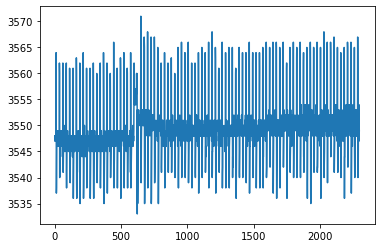

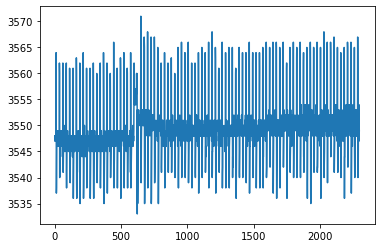

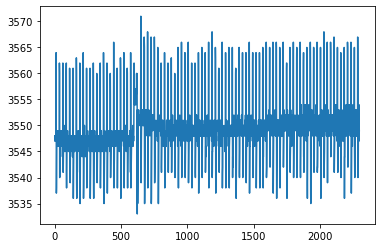

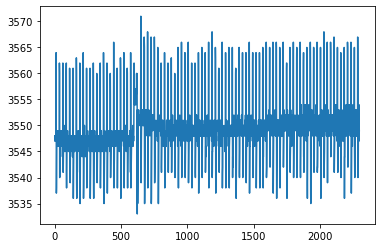

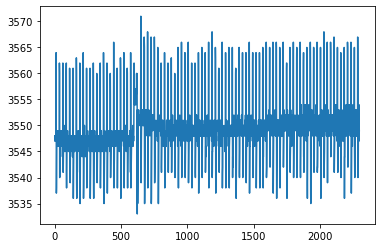

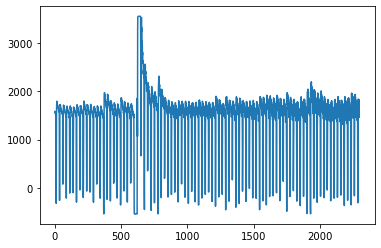

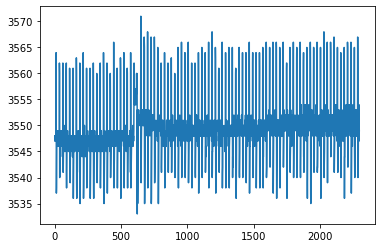

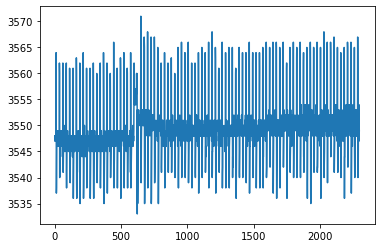

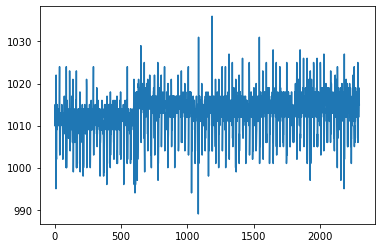

In [4]:
dt = input().split("@")

for i in range(9):
    dt[i] = np.array(dt[i].split(), dtype='int')
    plt.plot(dt[i][200:])
    plt.show()

In [5]:
V1 = np.array(dt[0])
V2 = np.array(dt[1])
V3 = np.array(dt[2])
V4 = np.array(dt[3])
V5 = np.array(dt[4])
V6 = np.array(dt[5])
LA = np.array(dt[6])
RA = np.array(dt[7])
LL = np.array(dt[8])

In [6]:
len(LA)

2500

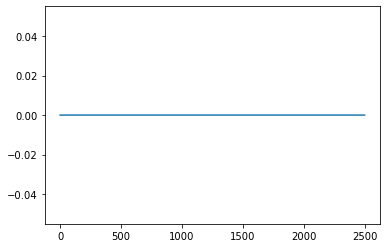

In [8]:
plt.plot(LA-RA)

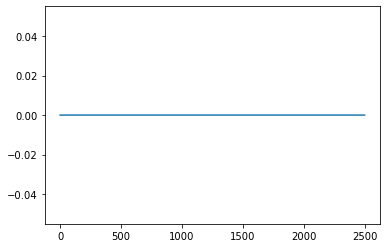

In [9]:
plt.plot(LA-RA)

In [10]:
s1 = "336 456 920 836 269 250 783 817 202 58 577 742 230 -5 440 684 208 -74 304 589 239 -167 125 548 369 -113 -21 448 350 -161 -114 427 483 -87 -216 309 475 -49 -285 205 460 19 -276 85 425 114 -281 -19 411 236 -258 -146 366 296 -247 -229 331 397 -158 -287 242 414 -108 -327 171 392 -26 -331 40 368 63 -336 -107 355 224 -185 -13 535 501 -14 -9 548 593 -20 -135 366 443 -96 -372 69 283 -126 -456 -93 251 -41 -454 -198 223 86 -417 -285 221 183 -374 -373 174 242 -306 -417 119 292 -207 -436 31 285 -173 -427 -64 298 3 -415 -160 312 95 -388 -273 238 196 -346 -364 190 252 -300 -413 106 288 -210 -413 51 308 -98 -401 -49 312 27 -378 -131 316 155 -330 -255 315 293 -255 -265 287 381 -148 -289 238 435 -57 -312 143 434 24 -304 75 402 133 -300 -52 388 216 -279 -170 381 316 -239 -271 262 367 -176 -325 191 394 -100 -325 219 396 -19 -332 18 381 102 -321 -85 366 221 -297 -189 330 310 -239 -281 269 361 -190 -347 198 399 -95 -342 113 382 -2 -342 0 366 90 -338 -108 342 204 -313 -206 320 289 -248 -273 261 352 -200 -339 194 363 -129 -373 71 360 -30 -345 -14 354 85 -322 -128 349 192 -313 -218 326 302 -243 -307 266 369 -196 -339 186 381 -89 -343 103 374 -16 -340 -20 364 99 -349 -123 333 186 -290 -224 342 365 -152 -157 437 518 -8 -89 412 591 95 -165 226 434 15 -372 -80 268 9 -437 -222 225 88 -417 -320 201 194 -363 -404 144 258 -291 -436 93 283 -197 -427 6 296 -84 -422 -91 301 39 -399 -188 284 150 -373 -330 229 237 -311 -350 190 300 -250 -409 106 323 -159 -426 38 312 -61 -413 -89 304 52 -401 -179 288 175 -346 -269 271 281 -255 -306 272 382 -147 -325 191 412 -54 -284 129 437 69 -286 33 425 171 -274 -88 385 271 -254 -194 345 349 -209 -262 278 411 -144 -314 202 413 -67 -325 108 397 31 -317 -20 386 148 -306 -115 361 252 -278 -220 318 326 -225 -295 269 380 -161 -329 187 394 -79 -336 85 388 28 -331 -40 382 125 -306 -136 337 247 -280 -228 301 327 -230 -304 233 370 -167 -339 165 388 -69 -339 67 377 33 -348 -53 345 127 -325 -131 342 233 -286 -246 295 308 -237 -309 248 369 -152 -342 164 382 -70 -311 66 384 32 -320 -40 360 144 -321 -161 330 240 -289 -259 290 305 -239 -308 267 380 -143 -291 257 494 145 -152 282 610 276 -103 146 501 275 -239 -143 301 182 -368 -358 176 203 -336 -445 118 242 -269 -456 28 271 -176 -448 -49 285 -50 -438 -132 267 74 -410 -234 254 169 -363 -331 221 266 -312 -401 142 284 -216 -414 80 318 -95 -413 -25 301 -36 -415 -134 292 82 -399 -231 261 180 -357 -324 217 271 -298 -382 161 333 -137 -380 144 400 -59 -329 68 397 58 -304 -25 398 200 -271 -115 382 314 -216 -212 322 363 -180 -290 254 410 -137 -324 215 405 -19 -309 64 396 76 -315 -53 371 182 -291 -159 354 264 -239 -228 304 359 -195 -297 238 392 -143 -324 151 398 -38 -318 67 396 54 -304 -75 363 179 -293 -168 338 270 -251 -254 280 342 -211 -326 227 354 -154 -366 121 371 -57 -329 21 367 57 -333 -71 353 170 -304 -170 331 273 -262 -271 287 346 -203 -319 219 380 -129 -342 137 376 -38 -341 17 357 54 -346 -96 338 156 -328 -218 323 327 -145 -100 488 596 128 9 523 649 108 -153 263 448 31 -378 -58 268 -57 -460 -224 202 29 -449 -336 181 152 -396 -402 150 218 -310 -451 113 266 -227 -446 32 283 -135 -445 -73 278 -17 -428 -182 262 88 -394 -287 236 177 -365 -363 183 252 -298 -397 53 272 -229 -460 -13 286 -124 -434 -69 279 -8 -398 -160 277 130 -351 -234 305 259 -263 -262 293 391 -143 -285 256 431 -66 -286 182 442 37 -265 70 428 142 -277 -44 391 233 -263 -179 351 328 -236 -258 283 366 -178 -308 214 402 -104 -333 132 400 -4 -323 22 382 78 -305 -87 368 225 -287 -171 342 305 -251 -267 281 360 -186 -337 219 385 -108 -343 124 387 -21 -354 6 359 76 -346 -116 323 184 -323 -206 329 278 -267 -295 254 341 -193 -336 202 397 -87 -348 122 382 -16 -348 18 374 104 -316 -108 347 198 -286 -212 311 283 -263 -293 243 310 -227 -373 229 329 -97 -195 354 711 378 69 414 772 459 -29 110 499 282 -287 -270 199 152 -411 -471 79 196 -370 -514 28 199 -278 -513 -74 219 -150 -482 -151 225 -36 -464 -262 228 95 -426 -343 203 190 -369 -410 157 242 -288 -451 78 285 -258 -456 -38 275 -113 -453 -122 238 -19 -444 -240 232 110 -414 -323 209 225 -346 -395 176 290 -259 -398 141 363 -113 -347 97 399 46 -304 34 418 176 -269 -56 404 302 -228 -144 386 348 -177 -240 311 416 -114 -302 215 418 -51 -312 113 423 38 -316 -4 389 138 -309 -111 361 240 -270 -205 326 320 -232 -300 256 373 -208 -329 168 390 -76 -340 97 385 26 -336 -20 367 133 -311 -131 353 247 -274 -221 309 335 -238 -311 273 373 -150 -335 157 389 -67 -353 74 370 16 -337 -35 359 123 -335 -162 340 236 -282 -243 296 315 -235 -311 230 357 -144 -353 152 373 -87 -344 79 362 24 -344 -57 352 125 -330 -151 324 217 -292 -242 275 278 -256 -334 217 331 -199 -368 152 357 -81 -369 50 363 17 -351 -49 359 128 -317 -147 333 234 -282 -243 299 325 -237 -314 218 367 -162 -351 161 380 -87 -349 56 361 2 -365 -74 338 127 -269 -21 564 532 45 107 652 662 82 -28 421 468 -110 -360 112 266 -188 -506 -106 211 -135 -502 -210 191 -20 -480 -305 194 100 -425 -380 152 189 -351 -442 116 281 -256 -443 43 272 -163 -451 -53 275 -65 -445 -156 269 63 -412 -271 230 158 -372 -361 185 223 -340 -418 182 267 -239 -459 37 277 -165 -445 -39 283 -32 -418 -132 286 95 -370 -191 304 256 -271 -246 317 374 -176 -258 307 437 -89 -281 209 453 -5 -265 96 447 120 -268 -6 421 209 -268 -110 372 300 -239 -230 313 366 -194 -299 267 386 -129 -332 132 402 -30 -326 53 384 66 -338 -65 365 164 -303 -162 340 286 -251 -247 300 368 -210 -306 234 394 -133 -332 160 393 -42 -328 50 389 59 -314 -66 362 178 -311 -189 335 283 -265 -259 284 346 -203 @-4468 -4027 -2119 -2089 -3683 -3649 -1692 -1301 -3000 -3157 -1544 -866 -2415 -2763 -1564 -563 -1848 -2427 -1654 -348 -1223 -2148 -1689 -99 -444 -1912 -1691 85 32 -1657 -1654 131 416 -1303 -1524 80 658 -920 -1438 -153 759 -524 -1369 -410 789 -73 -1314 -652 837 470 -1220 -950 778 682 -1011 -1082 654 836 -876 -1164 390 881 -649 -1141 203 935 -317 -1120 -161 898 -52 -1101 -763 592 235 -854 -416 1497 1641 245 234 1949 2108 165 -267 971 1213 -408 -1219 80 770 -476 -1405 -470 651 -223 -1331 -753 685 153 -1142 -1109 576 505 -1208 -1140 453 666 -957 -1081 295 831 -675 -1055 24 847 -373 -1029 -292 826 -38 -1003 -625 817 298 -983 -755 597 495 -943 -908 474 710 -916 -878 232 775 -690 -838 -38 787 -410 -821 -344 804 -49 -796 -600 816 376 -797 -748 874 734 -801 -766 786 1044 -557 -781 615 1188 -298 -829 363 1213 -1 -868 59 1150 332 -906 -306 1064 616 -890 -619 1228 808 -832 -916 761 1011 -620 -931 524 1090 -391 -941 353 1071 -118 -961 -90 1066 247 -986 -417 993 573 -956 -708 918 924 -855 -954 740 1006 -631 -975 535 1106 -375 -991 246 1086 -81 -999 -88 1054 260 -1012 -430 986 581 -951 -718 886 822 -775 -980 707 987 -638 -992 521 1078 -361 -1007 226 1069 -98 -1014 -123 1051 252 -1019 -449 982 568 -934 -741 882 851 -589 -1007 696 994 -633 -1008 486 1085 -370 -1016 219 1079 -50 -1028 -132 1042 259 -1032 -503 903 448 -1030 -986 583 728 -677 -431 1408 2013 538 115 1615 2299 474 -490 610 1258 1 -1185 -329 783 -20 -1371 -824 617 235 -1290 -1098 523 509 -1125 -1138 383 664 -911 -1139 180 816 -603 -1102 -79 834 -280 -1069 -397 823 80 -1044 -682 767 393 -1020 -990 659 659 -979 -933 617 744 -855 -915 163 808 -577 -894 -136 803 -315 -863 -470 771 30 -844 -748 732 395 -817 -779 681 737 -806 -765 708 995 -608 -793 414 1138 -239 -808 263 1202 119 -858 -57 1178 459 -900 -398 1084 740 -811 -698 950 973 -692 -916 758 1117 -373 -945 451 1104 -299 -959 172 1090 28 -976 -190 1063 361 -998 -504 982 671 -915 -797 880 921 -750 -968 691 1076 -458 -992 437 1084 -286 -1003 169 1100 41 -1027 -204 1064 366 -993 -514 976 688 -892 -776 862 910 -740 -988 680 1064 -380 -1036 396 1077 -281 -1039 160 1087 58 -1060 -215 1047 380 -989 -533 980 684 -898 -805 855 918 -746 -988 697 1062 -505 -1045 543 1258 -327 -1038 88 1067 57 -1050 -212 1054 394 -1003 -562 968 694 -895 -827 817 860 -856 -1041 366 725 -730 -969 771 1672 645 -71 1184 2393 1098 -161 452 1508 698 -893 -586 809 575 -1208 -1174 482 566 -1077 -1346 316 704 -865 -1273 290 739 -588 -1228 -215 809 -174 -1194 -525 791 185 -1155 -816 739 487 -1086 -1035 644 755 -917 -1038 434 853 -686 -1007 188 944 -475 -988 -203 840 -157 -969 -528 804 193 -949 -838 700 486 -910 -873 589 723 -896 -856 417 926 -569 -855 306 1273 -280 -874 25 1094 150 -902 -217 1121 545 -882 -496 1064 851 -759 -744 919 1041 -609 -946 674 1160 -419 -979 682 1098 -70 -1003 19 1074 139 -1026 -287 1046 490 -1005 -638 953 744 -838 -843 824 993 -687 -1012 640 1091 -536 -1026 342 1126 -127 -1042 10 1087 161 -1027 -311 1045 498 -956 -611 958 778 -837 -853 810 982 -676 -1030 646 1090 -453 -1052 354 1108 -189 -882 -9 1053 144 -1062 -323 1030 490 -969 -627 952 770 -848 -882 832 990 -680 -1045 607 1085 -478 -1072 335 1098 -149 -1075 48 1027 144 -1088 -428 891 325 -1069 -1010 682 781 -543 -254 1678 2105 471 101 1664 2182 265 -621 606 1214 -149 -1235 -6 746 -180 -1413 -733 647 150 -1328 -1015 582 465 -1169 -1214 479 697 -924 -1192 329 829 -674 -1146 61 857 -349 -1123 -261 975 -75 -1104 -596 799 319 -1070 -878 717 594 -1038 -987 571 783 -861 -929 262 837 -650 -948 11 839 -387 -918 -321 911 -55 -901 -636 792 333 -885 -833 798 717 -877 -836 773 1036 -588 -854 627 1178 -309 -893 403 1201 15 -929 56 1182 513 -973 -347 1066 624 -894 -650 974 882 -782 -892 795 1057 -596 -989 592 1101 -403 -1006 264 1105 -80 -1021 -68 1068 259 -1012 -460 988 565 -958 -707 915 818 -821 -940 770 1018 -639 -1017 565 1115 -367 -1034 192 1106 -67 -1052 -76 1066 265 -888 -433 969 551 -962 -708 914 833 -811 -951 740 1019 -619 -1038 587 1102 -366 -1057 228 1098 -66 -1063 -50 1074 293 -1026 -281 965 554 -967 -746 877 827 -822 -967 716 954 -748 -1033 159 717 -546 -990 703 1896 1028 156 1142 2569 1350 -121 261 1404 735 -949 -870 666 558 -1159 -1344 343 649 -1013 -1349 101 704 -734 -1287 -170 746 -391 -1227 -455 755 -17 -1184 -766 934 300 -1142 -1044 617 611 -1047 -1043 482 801 -844 -1009 229 862 -579 -990 -104 832 -304 -963 -441 774 0 -942 -785 690 379 -909 -851 558 565 -878 -836 420 780 -809 -809 258 938 -475 -802 77 1051 -30 -818 -142 1101 383 -853 -399 1079 909 -837 -698 970 977 -678 -860 800 1132 -489 -909 551 1174 -251 -939 209 1140 43 -964 -155 1082 358 -984 -499 986 653 -771 -828 839 864 -786 -963 672 1062 -625 -973 477 1112 -314 -988 146 1092 26 -1011 -188 1053 357 -1011 -517 992 669 -909 -786 1025 854 -795 -1004 720 1051 -557 -1006 397 1104 -289 -1019 141 1093 37 -1029 -204 1048 361 -1018 -543 973 683 -913 -634 791 860 -784 -1010 642 1053 -566 -1026 428 1116 -290 -1029 133 1087 45 -1041 -214 1042 381 -1009 -562 955 681 -925 -819 865 850 -787 -1018 659 1062 -528 -1027 418 1085 -276 -1038 100 1097 50 -1047 -247 1041 399 -1025 -563 953 694 -901 -823 960 912 -797 -895 738 1187 -574 -1008 281 1013 -49 -1018 72 834 -165 -1046 -519 715 145 -1015 -451 1420 1482 180 416 2193 2552 300 -186 1231 1389 -328 -1124 311 849 -553 -1442 -284 691 -322 -1366 -676 643 38 -1302 -950 598 367 -1224 -1171 511 658 -997 -1121 320 779 -777 -1073 122 846 -494 -1048 -195 841 -156 -1023 -532 792 191 -995 -842 697 479 -953 -917 551 673 -764 -895 284 749 -773 -868 15 790 -519 -843 -270 793 -174 -816 -550 811 230 -818 -741 841 662 -801 -760 834 981 -632 -779 675 1141 -388 -822 476 1229 -87 -854 133 1202 247 -898 -197 1133 549 -901 -535 1007 806 -816 -827 847 1002 -671 -813 627 1063 -492 -954 378 1106 -190 -972 11 1076 153 -996 -324 1031 470 -970 -628 948 778 -857 -873 824 990 -683 -979 706 1057 -487 -998 341 1113 -166 -1005 28 1091 170 -1026 -326 1029 498 -975 -648 1076 760 -886 -911 779 988 -697 @-4468 -3941 -2057 -2060 -3652 -3573 -1641 -1287 -2982 -3174 -1462 -847 -2392 -2787 -1464 -535 -1928 -2451 -1579 -305 -1215 -2178 -1614 -63 -431 -1947 -1630 125 19 -1645 -1645 164 428 -1295 -1567 89 681 -931 -1479 -105 772 -533 -1411 -342 805 -98 -1356 -605 855 438 -1192 -900 786 665 -1013 -1048 682 838 -887 -1214 411 891 -652 -1190 214 942 -332 -1166 -113 911 -62 -1145 -713 609 221 -816 -378 1488 1616 201 220 1928 2060 111 -290 966 1196 -447 -1240 104 771 -473 -1436 -408 675 -235 -1364 -698 710 161 -1083 -1029 614 505 -1253 -1183 466 666 -954 -1122 378 832 -715 -1095 90 859 -391 -1069 -236 853 -41 -1043 -568 843 316 -1026 -703 627 492 -988 -950 520 711 -907 -922 285 790 -700 -883 10 807 -415 -868 -302 820 -46 -844 -551 846 364 -846 -791 919 726 -848 -811 811 1046 -570 -826 660 1205 -324 -873 428 1211 -5 -912 91 1177 307 -940 -274 1091 602 -893 -600 1219 827 -830 -893 783 1010 -627 -979 548 1086 -405 -987 394 1082 -132 -1007 -48 1066 223 -1029 -380 1011 552 -948 -671 927 929 -854 -933 739 992 -653 -1019 584 1104 -392 -1033 285 1096 -95 -1039 -54 1064 243 -1027 -375 1012 563 -943 -692 908 818 -772 -954 730 986 -663 -1031 552 1079 -381 -1044 258 1064 -89 -1050 -78 1060 247 -1012 -421 1014 563 -930 -692 912 846 -618 -952 706 999 -658 -1045 537 1091 -377 -1053 265 1083 -80 -1054 -117 1062 252 -1038 -457 912 440 -1067 -1010 621 738 -669 -392 1421 1987 480 83 1621 2259 455 -530 621 1254 -31 -1184 -288 800 -31 -1361 -769 643 230 -1288 -1050 561 501 -1116 -1102 441 672 -924 -1180 228 831 -569 -1145 -38 854 -290 -1111 -347 838 65 -1084 -663 790 387 -1058 -950 677 666 -982 -973 675 756 -868 -956 227 836 -605 -936 -80 821 -328 -906 -410 786 22 -889 -698 756 378 -862 -822 724 736 -850 -807 740 1034 -622 -836 493 1140 -279 -851 293 1204 99 -900 -19 1175 420 -896 -357 1097 714 -812 -684 976 951 -709 -894 781 1089 -382 -986 512 1100 -312 -1000 210 1097 12 -1016 -150 1079 338 -1002 -460 1001 650 -911 -751 885 895 -763 -934 704 1071 -438 -1032 469 1095 -319 -1040 202 1105 19 -1046 -154 1077 352 -989 -473 1001 672 -899 -755 885 918 -741 -962 709 1064 -420 -1055 429 1072 -322 -1071 148 1098 57 -1043 -171 1061 369 -980 -488 992 675 -895 -777 882 903 -742 -966 719 1074 -547 -1064 584 1262 -332 -1072 113 1063 41 -1048 -190 1066 362 -1002 -520 982 682 -902 -794 837 841 -869 -1074 414 741 -733 -1001 815 1682 582 -111 1188 2333 1048 -204 456 1485 663 -909 -559 820 570 -1204 -1131 501 579 -1078 -1342 347 731 -862 -1298 329 776 -606 -1254 -165 830 -190 -1221 -469 808 168 -1183 -756 760 484 -1085 -1000 668 757 -923 -1071 465 852 -643 -1042 201 986 -476 -1023 -145 850 -164 -1005 -456 825 194 -987 -797 727 472 -950 -911 636 712 -912 -893 467 917 -546 -894 321 1221 -266 -910 58 1098 122 -937 -179 1128 531 -878 -464 1075 832 -772 -721 926 1039 -637 -928 714 1150 -472 -1014 720 1122 -94 -1037 46 1071 114 -1042 -263 1045 494 -1000 -607 975 730 -848 -813 844 985 -693 -1001 651 1095 -508 -1061 389 1126 -130 -1039 46 1077 133 -1027 -272 1060 471 -961 -573 974 753 -845 -833 841 972 -693 -1016 642 1096 -479 -1007 371 1106 -181 -877 38 1044 128 -1062 -280 1046 469 -973 -595 966 761 -854 -869 839 978 -692 -1018 627 1082 -463 -1084 370 1119 -179 -1061 138 1035 115 -1083 -395 908 292 -1102 -960 709 784 -562 -247 1686 2064 416 63 1648 2126 231 -643 622 1221 -181 -1237 15 773 -194 -1406 -690 667 140 -1314 -971 604 466 -1163 -1195 513 700 -929 -1221 384 837 -691 -1177 98 872 -392 -1153 -219 1002 -73 -1136 -549 815 298 -1101 -848 741 590 -1026 -1019 603 778 -855 -959 303 858 -659 -979 72 860 -389 -951 -273 917 -36 -936 -588 807 317 -921 -794 824 706 -882 -873 792 1034 -602 -889 661 1187 -337 -926 420 1231 -22 -960 93 1192 505 -967 -311 1074 600 -893 -624 979 864 -786 -871 808 1047 -622 -1009 626 1107 -419 -1035 295 1118 -114 -1046 -36 1080 226 -970 -422 998 535 -962 -676 929 813 -823 -895 799 1026 -649 -1045 583 1119 -389 -1060 289 1116 -84 -1075 -23 1073 232 -882 -365 992 535 -972 -683 883 823 -816 -920 764 1026 -637 -1040 575 1105 -386 -1077 269 1110 -88 -1075 -38 1084 266 -1020 -241 988 523 -957 -713 899 805 -821 -936 747 945 -759 -1061 209 726 -587 -974 725 1896 972 119 1145 2547 1304 -162 247 1427 698 -981 -855 664 538 -1159 -1307 362 630 -1011 -1367 145 727 -745 -1306 -116 760 -397 -1247 -407 765 -22 -1206 -709 966 306 -1168 -1005 643 601 -1033 -1069 530 810 -824 -1035 285 877 -599 -1016 -42 851 -321 -991 -381 798 -6 -972 -732 710 398 -942 -882 582 573 -910 -867 459 790 -815 -840 313 966 -469 -836 123 1066 -51 -853 -102 1121 367 -888 -368 1094 874 -821 -672 967 963 -694 -857 816 1121 -514 -938 561 1168 -276 -967 252 1153 23 -991 -121 1083 335 -996 -445 998 642 -767 -798 845 853 -798 -966 700 1048 -608 -1004 504 1082 -343 -1015 166 1101 -7 -1037 -152 1063 337 -1007 -472 1002 641 -903 -757 1050 859 -806 -995 728 1052 -558 -1034 455 1117 -285 -1047 182 1102 1 -1055 -168 1060 349 -1010 -501 987 653 -915 -602 827 845 -798 -995 684 1055 -577 -1053 456 1114 -289 -1057 179 1093 19 -1062 -229 1047 355 -1017 -521 973 664 -929 -779 900 845 -802 -1003 671 1043 -568 -1051 445 1096 -283 -1062 141 1102 38 -1069 -204 1051 374 -1005 -531 970 667 -908 -806 965 924 -804 -884 773 1189 -589 -1019 313 994 -65 -958 136 835 -202 -1075 -489 733 145 -1044 -414 1421 1453 139 399 2153 2488 253 -212 1212 1371 -360 -1130 320 845 -501 -1445 -258 696 -329 -1382 -615 668 20 -1322 -903 624 365 -1215 -1125 530 658 -965 -1147 355 794 -768 -1099 162 864 -485 -1076 -153 860 -162 -1050 -478 819 184 -1025 -800 722 478 -985 -948 592 680 -779 -927 299 752 -747 -899 56 794 -532 -875 -222 807 -190 -849 -475 834 210 -853 -682 860 653 -838 -795 859 969 -648 -773 733 1140 -419 -856 500 1235 -121 -886 174 1197 219 -929 -181 1139 521 -912 -513 1010 793 -819 -800 873 988 -678 -777 670 1050 -509 -987 349 1107 -244 -1000 55 1082 128 -1023 -301 1038 435 -973 -595 950 759 -866 -869 827 985 -696 -1004 764 1059 -516 -1022 370 1108 -191 -1027 60 1102 133 -1039 -296 1042 488 -971 -616 1091 764 -888 -907 794 975 -684"
s2 = "86 -174 -589 -408 97 -31 -545 -478 72 70 -466 -518 38 180 -408 -525 11 210 -299 -507 -24 258 -126 -442 -101 294 57 -372 -148 330 204 -302 -222 330 330 -235 -273 304 403 -162 -322 245 424 -60 -319 118 425 17 -318 26 407 127 -319 -95 371 232 -290 -208 324 306 -253 -289 284 356 -135 -337 219 403 -172 -346 102 400 -14 -351 28 392 100 -323 -96 348 217 -298 -209 321 299 -253 -284 276 360 -202 -330 192 391 -139 -344 156 388 -108 -347 22 382 83 -328 -58 363 191 -310 -184 329 288 -276 -282 276 370 -234 -342 225 389 -118 -361 144 387 -38 -353 11 357 67 -341 -103 353 171 -307 -198 317 272 -280 -298 266 346 -231 -338 304 374 -146 -371 86 397 -40 -350 30 375 54 -350 -90 359 161 -327 -195 315 249 -291 -288 278 341 -229 -323 226 366 -151 -363 133 387 -58 -315 28 369 25 -347 -85 348 156 -331 -202 309 227 -308 -275 260 316 -233 -346 189 376 -200 -353 141 396 -41 -352 62 389 57 -337 -58 377 159 -320 -161 329 260 -287 -266 290 341 -225 -300 255 377 -172 -332 136 377 -70 -352 104 488 204 -143 177 569 396 -57 92 556 434 -125 -138 344 347 -285 -407 122 269 -301 -494 5 263 -200 -478 -65 242 -95 -456 -152 256 34 -428 -262 229 140 -392 -359 195 250 -326 -402 161 273 -244 -432 113 306 -174 -436 13 306 -60 -419 -139 279 31 -412 -245 247 159 -379 -329 218 228 -357 -404 158 277 -324 -430 38 326 -163 -414 28 345 6 -352 -35 375 135 -293 -108 382 265 -255 -196 354 369 -196 -249 309 441 -143 -302 210 427 -76 -314 144 425 42 -314 15 387 121 -312 -114 362 232 -283 -220 323 315 -248 -290 282 372 -195 -336 192 412 -142 -337 106 412 8 -323 9 388 118 -308 -110 370 235 -292 -214 329 314 -256 -294 269 379 -178 -351 191 387 -49 -353 104 394 -4 -340 17 378 92 -338 -104 362 199 -308 -214 322 286 -264 -290 277 356 -217 -348 195 393 -142 -359 117 381 -26 -362 18 378 93 -342 -105 370 199 -311 -217 329 247 -272 -284 264 363 -220 -337 204 390 -123 -368 129 389 -18 -363 15 391 89 -331 -80 360 190 -307 -196 328 298 -265 -281 287 353 -226 -309 193 385 -138 -357 133 395 -48 -353 19 380 72 -335 -86 338 163 -332 -206 320 260 -275 -264 272 360 -212 -338 222 409 -141 -342 192 380 -7 -363 25 366 46 -333 -80 355 165 -320 -184 324 254 -297 -266 270 335 -246 -336 196 376 -153 -360 177 466 61 -206 200 540 245 -117 147 548 357 -163 -66 380 269 -314 -373 195 237 -314 -440 177 268 -262 -474 -2 280 -132 -469 -64 291 -65 -437 -153 253 62 -408 -253 241 164 -358 -343 225 257 -306 -403 175 297 -264 -411 98 309 -140 -434 -19 307 -48 -415 -128 274 46 -414 -257 250 151 -376 -336 217 247 -317 -394 170 310 -227 -410 191 342 -120 -376 61 385 19 -310 6 394 181 -281 -83 391 288 -243 -194 361 365 -183 -248 301 420 -127 -310 196 423 -76 -315 96 411 44 -323 4 396 152 -296 -119 366 246 -274 -215 312 343 -225 -329 264 395 -222 -339 196 417 -83 -338 94 409 19 -336 -2 397 144 -319 -193 358 240 -282 -208 336 318 -235 -290 272 387 -158 -338 204 412 -106 -347 104 406 0 -346 1 377 115 -326 -99 357 212 -299 -225 313 293 -265 -291 263 359 -199 -348 195 386 -97 -358 66 380 -2 -351 5 379 104 -333 -103 358 206 -300 -210 319 294 -264 -296 256 337 -209 -363 179 363 -132 -369 113 381 -20 -360 3 371 91 -326 -92 375 207 -293 -202 319 300 -254 -290 286 360 -206 -348 213 389 -140 -356 118 384 -32 -358 10 359 58 -357 -94 331 185 -284 -156 453 449 -54 9 572 640 96 -85 431 539 -67 -301 102 323 -118 -460 -94 247 -73 -475 -213 230 51 -458 -322 212 169 -392 -394 173 249 -323 -433 120 284 -220 -444 53 308 -126 -437 -45 310 -29 -434 -149 277 84 -399 -268 248 174 -373 -365 191 229 -314 -453 130 280 -253 -454 81 299 -162 -441 -38 291 -35 -418 -140 291 107 -351 -205 324 256 -271 -245 317 370 -172 -260 303 445 -88 -292 242 455 -10 -287 109 430 95 -298 -3 414 198 -287 -127 380 274 -256 -218 312 365 -211 -291 256 417 -147 -319 192 416 -67 -340 86 399 45 -336 -37 365 146 -324 -136 352 258 -285 -230 304 334 -246 -313 236 380 -190 -342 166 403 -78 -342 76 393 44 -343 -53 386 136 -337 -139 319 228 -300 -242 294 319 -249 -326 244 371 -166 -314 181 399 -60 -341 81 395 18 -349 -3 389 130 -329 -131 355 235 -291 -222 311 314 -248 -312 247 356 -195 -375 151 361 -144 -430 73 459 151 -118 273 699 488 59 226 663 498 -68 -90 382 305 -309 -388 139 215 -333 -500 12 225 -259 -517 -54 225 -144 -500 -159 240 -14 -467 -250 209 92 -428 -357 191 179 -374 -423 162 251 -293 -452 33 293 -201 -459 9 285 -117 -439 -107 263 3 -450 -226 234 75 -413 -340 191 175 -374 -410 164 267 -300 -431 131 330 -172 -390 91 357 -6 -331 28 413 134 -284 -41 412 264 -238 -137 390 361 -190 -213 342 443 -135 -267 259 440 -88 -299 186 415 35 -321 42 417 94 -307 -75 365 214 -296 -191 348 291 -253 -285 290 366 -189 -323 223 401 -120 -348 135 399 -26 -343 38 392 78 -333 -80 367 197 -314 -190 329 277 -271 -278 274 349 -212 -337 225 396 -119 -431 134 393 -43 -342 28 383 63 -332 -89 358 171 -320 -187 330 272 -284 -282 268 324 -232 -356 240 383 -162 -353 128 387 -75 -359 38 371 49 -346 -76 363 154 -323 -188 320 255 -291 -287 276 334 -258 -337 193 398 -170 -349 141 381 -102 -378 5 354 39 -360 -84 330 141 -328 -185 316 265 -290 -283 286 339 -231 -323 227 400 -146 -356 151 390 -63 -343 50 382 47 -348 -57 352 141 -338 -165 323 223 -314 -293 252 259 -266 -218 484 763 296 141 653 867 379 37 352 599 184 -304 -88 261 -10 -507 -332 123 26 -501 -458 92 115 -438 -525 54 194 -348 -532 -17 223 -242 -488 -83 229 -126 -482 -169 240 0 -455 -277 208 95 -433 -366 182 193 -375 -447 128 252 -318 -455 8 240 -237 -494 -97 235 -142 -490 -209 216 -31 -472 -298 199 87 -409 -345 202 226 @626 -80 -1060 -730 572 209 -1017 -852 414 365 -961 -915 274 562 -939 -867 95 645 -534 -840 -114 665 -299 -814 -299 737 25 -798 -386 714 323 -793 -622 792 722 -615 -660 778 939 -425 -744 606 970 -247 -771 378 993 -38 -784 79 960 213 -787 -199 1074 395 -813 -504 804 643 -676 -684 698 808 -566 -817 535 866 -399 -902 258 862 -193 -920 1 858 84 -869 -269 832 451 -872 -544 744 570 -710 -690 691 780 -567 -799 529 868 -394 -840 362 907 -161 -855 80 912 115 -829 -163 866 460 -812 -505 819 616 -698 -669 715 800 -572 -782 552 870 -386 -842 365 901 -169 -856 100 892 93 -842 -181 868 348 -630 -509 743 554 -745 -674 698 759 -615 -791 653 849 -436 -875 299 892 -231 -882 107 885 61 -873 -180 850 299 -827 -279 741 482 -778 -676 703 714 -643 -810 568 838 -466 -879 340 870 -238 -893 114 878 2 -879 -172 849 284 -841 -235 746 474 -791 -662 702 725 -645 -804 607 852 -534 -913 359 878 -300 -950 105 866 -36 -944 -181 860 247 -898 -414 860 453 -830 -670 743 730 -660 -807 623 868 -505 -926 298 751 -530 -988 -108 883 259 -325 797 2025 1428 346 759 2097 1173 -308 -308 880 699 -828 -1030 329 525 -874 -1262 51 530 -633 -1267 -173 563 -387 -1215 -415 599 -75 -1160 -661 577 230 -1050 -754 469 419 -923 -1013 399 645 -736 -986 250 695 -533 -961 23 706 -297 -934 -312 668 -67 -907 -612 589 281 -872 -829 463 386 -847 -790 341 549 -866 -762 173 661 -545 -735 42 809 -199 -729 -103 908 190 -736 -257 958 563 -526 -500 875 803 -577 -606 817 986 -397 -722 624 1032 -239 -777 395 1042 7 -798 62 1005 259 -799 -225 942 499 -760 -484 793 664 -693 -703 709 839 -566 -841 548 939 -401 -891 293 946 -112 -880 18 932 166 -864 -268 913 455 -815 -410 794 630 -738 -725 711 839 -547 -843 550 930 -293 -883 321 952 -118 -878 66 938 157 -868 -231 916 420 -808 -484 980 574 -760 -735 712 804 -598 -830 551 921 -408 -897 328 925 -154 -910 65 921 127 -897 -240 905 388 -847 -510 861 574 -804 -723 693 787 -608 -842 540 896 -408 -885 364 919 -204 -914 81 931 95 -898 -217 884 362 -849 -475 812 809 -831 -755 688 754 -640 -821 539 871 -431 -900 352 922 -253 -913 84 914 66 -912 -198 869 321 -853 -457 816 568 -732 -730 694 755 -639 -837 578 906 -427 -874 444 915 -227 -926 124 899 21 -908 -161 890 317 -847 -418 824 549 -620 -710 675 707 -679 -852 501 717 -709 -1066 63 800 -97 -450 919 1974 1162 295 1000 1984 1086 -262 68 970 712 -1041 -948 622 560 -961 -1194 -31 323 -944 -1284 4 578 -577 -1214 -138 638 -275 -1155 -371 651 8 -1094 -614 632 303 -974 -763 562 501 -867 -991 429 657 -696 -1008 230 712 -485 -1004 -43 718 -248 -964 -328 664 -13 -942 -643 576 218 -901 -853 689 380 -866 -824 388 612 -724 -804 335 779 -409 -806 144 908 -55 -806 9 1006 337 -742 -194 1024 646 -633 -434 950 878 -569 -646 787 977 -384 -757 581 1046 -221 -803 318 1002 11 -830 22 985 272 -819 -278 910 513 -768 -533 819 903 -726 -788 665 845 -525 -857 491 924 -333 -877 265 946 -68 -888 11 933 221 -860 -355 892 484 -796 -521 825 685 -628 -787 648 824 -536 -849 512 934 -346 -881 304 942 -97 -897 31 942 190 -862 -254 890 438 -814 -515 819 671 -683 -669 645 771 -604 -854 540 931 -377 -897 298 917 -121 -906 50 931 145 -884 -240 895 411 -820 -494 823 632 -738 -537 641 753 -608 -865 517 893 -392 -898 322 933 -145 -905 58 919 121 -874 -230 900 389 -817 -488 815 627 -741 -712 858 734 -676 -863 540 888 -443 -911 358 925 -138 -928 48 825 -51 -1069 -469 562 124 -847 -219 1440 1492 333 456 2113 1819 304 -133 1131 1167 -276 -912 228 687 -432 -1230 -249 551 -306 -1259 -548 539 -21 -1196 -787 519 271 -1056 -965 462 591 -943 -1117 311 625 -669 -1106 181 712 -434 -1104 -78 742 -159 -1079 -349 718 128 -1027 -611 652 371 -964 -854 549 611 -865 -960 341 636 -705 -931 139 684 -481 -899 -85 711 -203 -884 -310 751 173 -866 -478 816 537 -742 -597 823 836 -374 -744 704 977 -375 -764 544 1046 -134 -768 297 1044 115 -790 -3 1002 373 -775 -308 1064 686 -632 -696 717 731 -709 -805 700 1061 -406 -862 225 772 -356 -927 202 927 -21 -869 -76 923 263 -849 -344 865 520 -785 -592 773 737 -672 -643 595 808 -560 -884 461 917 -306 -900 218 936 -33 -893 -56 931 241 -867 -329 846 493 -802 -589 781 710 -693 -765 765 775 -557 -860 467 910 -312 -895 243 931 -66 -911 -40 919 212 -876 -331 872 468 -803 -557 792 680 -710 -752 706 791 -638 -996 311 713 -648 -1058 35 980 324 -173 991 2129 1322 294 762 1819 1082 -344 -302 846 579 -894 -1005 356 654 -984 -1292 95 497 -722 -1271 -79 562 -442 -1230 -330 597 -112 -1158 -551 594 165 -1064 -784 564 418 -937 -953 487 627 -741 -1050 288 695 -579 -1024 87 726 -332 -989 -223 706 -96 -973 -497 644 149 -931 -760 561 372 -896 -852 455 572 -611 -846 281 702 -543 -807 193 845 -185 -810 48 960 189 -793 -135 1009 514 -696 -365 962 760 -594 -573 842 944 -475 -656 595 961 -405 -799 424 999 -77 -830 137 979 149 -825 -169 924 410 -801 -446 844 621 -699 -708 737 787 -586 -830 575 937 -475 -944 332 908 -209 -903 88 924 85 -893 -194 892 355 -830 -463 819 594 -747 -680 721 762 -620 -841 789 814 -496 -998 355 904 -218 -904 110 920 57 -889 -189 893 329 -847 -443 836 578 -767 -670 722 740 -638 -836 607 926 -496 -938 368 893 -246 -919 116 904 41 -893 -157 914 299 -866 -444 827 550 -783 -666 741 741 -679 -819 574 989 -544 -946 360 889 -267 -918 132 905 17 -897 -148 884 276 -848 -412 828 550 -776 -649 752 741 -667 -802 604 865 -360 -961 367 878 -290 -912 165 912 -9 -901 -120 884 258 -877 -401 813 482 -861 -779 524 370 -948 -817 936 1527 560 384 1741 2422 934 169 983 1475 321 -798 -124 707 -30 -1216 -745 438 88 -1213 -1032 337 293 -1079 -1190 262 470 -853 -1044 41 522 -659 -1168 -118 627 -329 -1124 -343 664 -31 -1083 -586 630 262 -1024 -810 557 468 -897 -958 414 626 -750 -911 193 585 -619 -895 -115 620 -364 -853 -389 604 -116 -823 -636 587 179 -782 -741 562 488 @629 -109 -1083 -693 586 185 -1040 -824 454 349 -985 -938 290 549 -872 -893 159 645 -640 -863 -84 687 -329 -836 -263 738 17 -820 -361 746 293 -816 -598 793 707 -640 -646 792 944 -460 -739 620 971 -283 -779 326 985 -95 -797 94 964 192 -792 -176 1073 400 -823 -506 808 630 -694 -678 705 805 -576 -815 543 873 -418 -889 283 862 -198 -906 37 867 61 -870 -244 838 459 -882 -534 749 548 -727 -675 702 789 -595 -802 537 861 -404 -843 374 907 -178 -855 103 917 88 -837 -134 879 427 -802 -480 825 585 -711 -665 713 789 -589 -796 613 879 -367 -851 365 900 -206 -858 108 894 65 -851 -191 866 315 -646 -478 750 537 -760 -663 705 741 -627 -807 674 851 -454 -882 302 891 -224 -873 125 873 32 -878 -164 849 278 -842 -252 765 474 -793 -693 761 717 -650 -805 576 836 -479 -879 374 871 -283 -902 129 873 -23 -889 -158 855 269 -845 -219 763 454 -814 -656 706 712 -663 -798 614 864 -562 -912 377 886 -320 -944 131 878 -74 -945 -161 870 216 -895 -392 886 432 -853 -666 750 711 -672 -793 639 846 -530 -931 340 755 -542 -1000 -76 892 227 -357 800 2004 1384 301 732 2041 1140 -348 -339 875 686 -853 -1028 345 522 -877 -1245 72 551 -666 -1250 -140 584 -405 -1217 -377 611 -86 -1149 -627 595 229 -1052 -717 485 435 -930 -992 429 642 -732 -997 267 704 -563 -972 34 712 -306 -944 -274 690 -59 -919 -569 608 266 -888 -844 481 385 -862 -804 379 554 -866 -779 213 673 -545 -754 64 819 -199 -749 -71 911 171 -757 -233 959 524 -534 -481 884 791 -583 -594 817 975 -408 -736 631 1031 -253 -780 414 1032 -18 -797 94 1004 224 -802 -210 942 480 -754 -452 807 645 -699 -715 726 833 -590 -843 547 941 -420 -883 301 949 -134 -880 45 931 142 -870 -246 930 422 -819 -390 826 626 -759 -726 722 829 -554 -834 564 946 -321 -882 339 946 -152 -885 94 940 160 -865 -203 919 411 -819 -472 995 573 -779 -728 722 780 -627 -832 557 897 -428 -897 357 925 -188 -915 86 931 110 -905 -217 912 376 -853 -482 862 624 -814 -728 699 775 -627 -836 575 903 -436 -875 378 927 -227 -911 96 935 71 -896 -185 893 345 -849 -449 823 780 -822 -739 702 752 -669 -818 566 873 -464 -904 374 920 -249 -920 112 927 42 -912 -180 876 301 -861 -439 831 553 -725 -698 693 748 -664 -826 589 923 -467 -879 466 929 -254 -920 145 914 11 -914 -136 910 299 -854 -400 839 541 -645 -682 692 718 -703 -857 495 741 -722 -1073 123 813 -112 -458 923 1946 1110 252 952 1940 1031 -295 59 988 703 -1034 -932 626 597 -944 -1143 9 314 -950 -1274 31 593 -597 -1193 -99 659 -289 -1142 -341 665 12 -1084 -578 654 307 -979 -740 601 484 -903 -983 475 668 -701 -1022 248 719 -494 -1018 -1 728 -268 -978 -309 681 -25 -955 -603 607 221 -916 -827 712 389 -882 -839 409 628 -706 -821 374 780 -369 -826 182 916 -82 -826 23 1007 317 -746 -181 1029 623 -659 -437 949 876 -594 -648 787 968 -406 -749 598 1047 -249 -806 337 1011 -13 -831 56 989 246 -829 -256 912 487 -761 -502 835 887 -722 -776 665 835 -554 -852 529 914 -340 -883 286 945 -98 -889 33 944 197 -869 -329 901 461 -803 -504 831 670 -601 -772 660 811 -547 -838 534 945 -371 -874 328 949 -110 -896 52 949 171 -859 -235 901 421 -821 -500 827 656 -708 -633 649 754 -600 -854 550 903 -406 -893 358 917 -134 -899 69 932 128 -876 -211 906 399 -821 -487 827 623 -752 -530 671 747 -626 -867 520 883 -432 -901 339 934 -181 -902 84 934 111 -877 -204 915 375 -834 -469 821 603 -752 -721 888 737 -667 -852 558 890 -464 -894 363 927 -223 -924 85 841 -69 -1073 -438 618 112 -853 -200 1439 1463 271 439 2051 1787 255 -180 1030 1156 -323 -925 250 703 -471 -1221 -208 585 -314 -1254 -523 561 -22 -1186 -753 552 271 -1046 -940 483 611 -945 -1098 336 640 -680 -1089 200 721 -451 -1086 -44 750 -172 -1067 -307 732 112 -1011 -588 671 359 -954 -821 563 603 -848 -977 360 646 -708 -950 172 687 -475 -919 -62 729 -206 -905 -272 761 156 -888 -456 824 524 -749 -572 829 819 -400 -719 701 964 -404 -756 559 1048 -130 -780 317 1038 89 -799 -2 1004 354 -784 -298 1069 665 -640 -675 723 738 -730 -809 677 1088 -404 -833 221 748 -382 -937 208 951 -35 -873 -67 917 234 -857 -322 867 494 -790 -586 781 708 -683 -649 656 796 -582 -887 495 927 -329 -900 247 934 -51 -899 -32 936 224 -867 -307 850 471 -815 -581 790 697 -693 -759 790 793 -526 -866 479 908 -343 -895 246 933 -94 -912 -12 935 185 -882 -301 873 443 -821 -540 794 667 -720 -747 706 815 -665 -996 348 703 -665 -1073 62 1001 295 -198 988 2085 1266 240 745 1754 1048 -393 -315 855 566 -913 -994 375 657 -989 -1264 132 522 -737 -1251 -36 584 -458 -1213 -289 626 -117 -1149 -526 627 165 -1058 -745 603 404 -934 -924 511 622 -728 -1064 306 702 -541 -1040 124 742 -342 -1007 -193 747 -104 -993 -463 665 145 -954 -736 568 376 -920 -874 481 574 -629 -868 308 713 -560 -830 229 847 -210 -832 75 976 159 -797 -123 1003 491 -705 -282 950 749 -612 -559 844 922 -496 -630 617 937 -375 -808 425 999 -119 -843 146 977 119 -834 -148 932 385 -819 -438 857 602 -713 -684 745 791 -609 -834 577 962 -498 -954 343 896 -234 -903 113 927 54 -896 -165 898 317 -846 -453 832 560 -753 -666 738 766 -631 -821 787 827 -500 -1002 378 907 -247 -906 143 923 54 -885 -160 896 306 -849 -421 842 562 -778 -668 742 721 -646 -826 612 959 -526 -932 364 904 -265 -914 142 904 1 -886 -131 921 284 -860 -422 840 536 -779 -659 747 728 -692 -807 590 983 -525 -955 390 873 -308 -921 145 901 0 -898 -114 890 268 -861 -394 849 534 -791 -632 759 742 -666 -796 626 864 -371 -955 369 871 -321 -910 181 905 -31 -901 -95 901 245 -889 -376 815 460 -862 -756 535 367 -953 -820 949 1522 503 370 1710 2370 852 114 957 1450 286 -818 -116 709 -54 -1212 -722 461 86 -1205 -985 377 303 -1062 -1144 287 507 -874 -1035 99 540 -655 -1178 -77 646 -331 -1137 -301 660 -41 -1095 -554 656 217 -1017 -779 585 461 -903 -969 444 636 -761 -929 273 599 -621 -917 -79 644 -362 -876 -350 616 -118 -848 -601 589 167 -808 -766 587 485"
s3 = "486 -59 -54 473 517 -50 -154 380 513 31 -229 254 492 59 -246 143 469 130 -249 23 430 214 -242 -112 391 315 -224 -206 340 376 -180 -288 258 419 -118 -312 185 434 -37 -322 93 413 70 -315 -38 388 171 -293 -141 362 267 -284 -243 299 343 -242 -304 246 398 -138 -327 161 398 -53 -343 57 379 34 -333 -43 358 117 -318 -151 338 233 -279 -247 297 321 -225 -307 248 377 -149 -352 161 387 -57 -347 76 373 25 -339 -48 356 119 -324 -145 343 227 -281 -249 288 309 -237 -314 240 376 -166 -348 159 376 -155 -349 73 373 7 -350 -28 361 110 -324 -148 330 224 -292 -241 316 304 -247 -308 258 366 -173 -353 160 373 -109 -357 55 372 -14 -356 -36 352 81 -350 -140 321 180 -314 -241 295 289 -265 -312 250 343 -183 -342 180 383 -102 -361 37 380 7 -345 -60 355 104 -342 -127 333 205 -311 -211 295 288 -253 -301 250 361 -190 -294 266 526 76 -136 318 610 251 -85 240 551 248 -231 -73 335 142 -386 -323 198 156 -375 -421 148 233 -392 -472 75 284 -251 -465 7 281 -212 -438 -87 288 -16 -419 -177 262 118 -394 -350 228 229 -341 -373 177 277 -323 -416 145 308 -200 -439 34 283 -52 -442 -79 282 -18 -420 -189 255 75 -399 -294 233 197 -353 -364 200 275 -286 -402 165 359 -118 -349 168 405 -7 -311 80 420 121 -270 -18 419 226 -240 -114 384 335 -208 -219 349 389 -164 -285 235 433 -94 -304 177 414 -15 -321 66 396 89 -321 -56 370 201 -288 -150 336 282 -269 -260 294 364 -203 -324 206 388 -143 -348 141 406 -40 -337 54 393 68 -328 -54 375 174 -307 -170 356 255 -271 -255 310 338 -225 -363 218 386 -138 -342 154 381 -49 -352 49 375 42 -339 -52 363 138 -314 -168 331 251 -294 -262 287 327 -216 -319 235 370 -100 -355 137 380 -75 -351 58 378 23 -356 -61 362 142 -319 -141 330 253 -287 -248 293 323 -235 -357 207 371 -173 -355 154 388 -79 -361 74 378 39 -342 -52 361 127 -323 -164 327 226 -290 -247 301 309 -244 -328 216 364 -143 -354 146 387 -79 -358 61 363 -4 -350 -38 351 125 -327 -152 336 227 -295 -232 285 326 -253 -323 228 361 -235 -361 164 395 -88 -362 90 365 15 -343 -16 358 118 -321 -128 342 215 -284 -227 304 300 -255 -312 230 349 -208 -346 175 381 -116 -353 76 386 7 -343 -20 371 120 -321 -123 337 221 -290 -221 311 313 -257 -308 247 367 -191 -331 175 366 -119 -356 74 384 2 -344 12 420 187 -183 35 500 396 -66 7 510 484 -85 -173 342 399 -204 -393 13 291 -213 -463 -1 258 -225 -446 -112 257 0 -428 -195 251 108 -389 -283 229 211 -330 -380 187 274 -277 -413 151 316 -190 -429 22 310 -85 -426 -64 302 26 -388 -174 270 124 -383 -337 233 200 -345 -367 188 276 -315 -423 99 292 -197 -427 54 313 -94 -403 -29 330 53 -342 -88 356 207 -278 -149 366 337 -204 -214 338 418 -133 -249 276 455 -57 -275 181 436 -3 -296 76 420 111 -285 -40 390 212 -278 -153 353 293 -238 -258 302 366 -188 -319 226 393 -114 -338 142 409 -17 -335 46 380 80 -328 -78 347 173 -300 -177 329 269 -247 -248 300 351 -198 -307 213 384 -120 -343 152 392 -30 -338 36 389 55 -332 -45 356 192 -311 -196 336 270 -262 -261 274 327 -209 -336 204 372 -205 -355 114 377 -71 -364 41 382 35 -329 -58 367 167 -327 -161 333 258 -278 -267 287 335 -235 -326 215 361 -145 -360 153 384 -79 -366 57 368 32 -351 -69 351 141 -341 -176 313 237 -298 -241 275 312 -249 -335 202 366 -180 -363 149 399 -71 -349 73 367 41 -346 -57 358 135 -326 -157 329 241 -277 -244 279 312 -233 -321 213 366 -188 -370 144 361 -127 -369 115 477 199 -120 211 635 473 6 146 590 432 -140 -148 316 302 -304 -425 119 222 -300 -498 -4 226 -233 -485 -39 255 -99 -472 -162 244 6 -432 -249 229 124 -395 -335 192 219 -338 -396 152 280 -265 -439 98 300 -174 -440 -24 305 -64 -421 -117 278 32 -420 -228 249 115 -399 -345 193 184 -353 -418 152 279 -284 -425 93 314 -140 -399 44 365 -17 -332 15 400 155 -258 -59 398 307 -231 -157 378 380 -174 -210 328 430 -95 -285 228 448 -54 -307 135 418 38 -306 44 395 140 -308 -100 371 233 -280 -203 323 325 -240 -280 272 366 -188 -325 196 418 -124 -347 109 400 15 -307 3 374 88 -311 -103 368 222 -290 -203 320 303 -243 -314 273 362 -125 -333 210 387 -111 -352 108 371 -14 -344 2 359 95 -341 -121 323 175 -308 -218 292 289 -268 -309 261 323 -193 -342 200 385 -108 -342 123 364 -15 -345 13 380 104 -312 -93 356 198 -291 -204 305 281 -266 -284 257 342 -213 -359 176 343 -146 -395 64 382 71 -145 269 653 422 51 267 698 481 -34 4 433 336 -266 -342 163 229 -380 -501 21 219 -304 -518 -42 223 -189 -494 -139 214 -61 -459 -221 232 42 -440 -303 194 141 -384 -390 158 247 -321 -429 105 286 -222 -443 29 285 -145 -440 -62 270 -43 -424 -167 249 68 -418 -309 214 160 -372 -378 175 212 -316 -424 157 300 -216 -408 88 346 -65 -355 50 398 95 -291 -17 418 233 -239 -105 397 332 -204 -188 361 401 -147 -255 282 444 -95 -295 198 418 -2 -309 73 395 92 -306 -49 381 171 -301 -151 341 270 -266 -245 299 338 -205 -319 206 375 -142 -360 152 394 -34 -337 48 390 50 -322 -34 376 156 -309 -153 337 259 -265 -245 299 338 -229 -334 227 376 -147 -345 160 383 -53 -346 47 389 41 -336 -38 363 145 -328 -161 323 234 -289 -263 281 323 -232 -327 226 365 -170 -366 137 364 -68 -360 39 353 0 -371 -71 327 114 -326 -179 326 203 -290 -286 289 312 -234 -308 209 385 -154 -333 170 379 -76 -345 106 374 25 -329 -37 360 133 -320 -151 323 227 -292 -265 288 290 -254 -348 184 311 -164 -220 417 711 309 74 490 790 408 -8 218 552 243 -253 -167 250 95 -439 -419 119 113 -443 -486 49 171 -326 -544 -8 237 -227 -512 -85 222 -120 -480 -169 237 -12 -453 -265 216 101 -417 -361 181 190 -370 -423 118 245 -366 -461 39 269 -216 -475 -30 246 -112 -475 -168 226 -25 -467 -268 209 82 -410 -347 188 196 -345 -375 177 308 -229 -352 169 403 -46 @-56 -774 -735 6 211 -707 -620 -161 351 -609 -622 -326 442 -595 -575 -488 470 -309 -524 -495 456 -19 -494 -479 409 267 -488 -459 308 459 -478 -453 189 554 -474 -452 -57 639 -453 -437 -272 625 -232 -421 -407 570 50 -406 -390 496 268 -419 -392 342 431 -430 -385 308 551 -402 -376 18 618 -394 -392 -143 629 -209 -381 -371 606 28 -381 -360 551 295 -393 -366 452 500 -397 -372 304 816 -413 -403 83 659 -412 -397 -114 679 -200 -399 -345 661 63 -404 -380 604 324 -404 -399 475 508 -414 -403 335 680 -429 -405 124 686 -512 -405 -59 713 -193 -418 -316 683 62 -414 -400 626 316 -422 -407 537 493 -433 -412 384 661 -434 -427 147 696 -452 -420 -50 715 -214 -427 -272 711 40 -436 -407 646 303 -440 -417 544 515 -452 -425 407 664 -455 -438 181 718 -465 -445 7 739 -208 -444 -286 722 52 -457 -436 666 313 -463 -430 553 494 -464 -441 284 429 -460 -434 335 934 -4 -253 1130 1937 986 76 826 1523 616 -664 -301 720 206 -818 -794 323 194 -766 -733 128 328 -728 -690 113 387 -694 -644 -259 451 -609 -589 -451 482 -243 -553 -529 429 52 -531 -497 353 254 -508 -489 220 415 -489 -468 42 494 -476 -451 -223 449 -444 -422 -407 397 -309 -374 -360 339 -87 -358 -349 239 132 -346 -327 150 331 -342 -339 44 815 -339 -332 -3 653 -334 -336 -175 768 19 -347 -331 784 325 -368 -355 735 577 -400 -382 607 745 -438 -422 400 842 -362 -436 173 816 -230 -455 -69 800 1 -473 -345 760 271 -487 -465 667 487 -502 -475 546 668 -509 -494 359 768 -351 -510 109 775 -296 -509 -86 785 -37 -524 -336 757 229 -530 -509 702 475 -542 -513 582 676 -552 -558 409 797 -496 -530 133 790 -299 -541 -52 803 -35 -547 -304 780 224 -558 -533 709 476 -569 -537 608 684 -576 -549 441 799 -508 -520 225 785 -322 -571 -19 810 -61 -587 -291 784 207 -588 -534 741 474 -592 -572 621 665 -608 -576 452 797 -527 -583 414 810 -340 -607 116 814 34 -623 -375 722 158 -609 -522 721 440 -616 -584 638 670 -623 -602 475 781 -542 -589 268 875 -379 -610 3 820 -98 -621 -233 798 184 -625 -502 750 435 -632 -604 657 677 -650 -612 494 779 -618 -620 272 1015 -360 -635 30 813 -113 -641 -232 800 150 -644 -470 750 414 -647 -624 664 645 -656 -615 510 784 -576 -622 321 851 -359 -591 75 810 -123 -650 -188 829 160 -650 -426 769 425 -665 -638 687 653 -672 -638 548 806 -559 -644 344 818 -364 -654 -24 706 -321 -646 -473 665 226 -525 283 1720 1538 330 505 1733 1485 -95 -403 826 864 -628 -1024 171 588 -682 -976 -244 475 -582 -911 -458 508 -203 -867 -694 489 94 -818 -766 437 357 -773 -742 317 548 -756 -711 139 635 -599 -683 -50 613 -388 -665 -332 605 -102 -632 -605 548 143 -615 -586 414 324 -593 -558 250 457 -574 -544 48 512 -543 -513 11 512 -470 -497 -335 608 -85 -486 -454 708 300 -494 -466 742 651 -513 -485 685 883 -483 -510 550 988 -286 -550 312 1180 -125 -608 21 935 152 -622 -253 886 420 -659 -517 798 634 -665 -632 665 783 -586 -650 472 886 -384 -659 239 909 -138 -684 -55 849 61 -701 -305 815 337 -703 -536 780 603 -712 -667 672 780 -579 -685 485 892 -403 -703 293 914 0 -725 -57 873 32 -741 -253 847 354 -757 -529 773 612 -748 -712 662 781 -613 -733 521 867 -493 -742 267 889 -222 -715 -24 867 12 -757 -259 848 308 -775 -496 790 556 -764 -711 687 779 -634 -747 491 873 -425 -757 372 897 -245 -778 79 838 -22 -784 -254 847 288 -794 -494 785 532 -774 -722 682 752 -647 -765 536 884 -475 -765 316 909 -198 -778 224 831 -41 -797 -229 850 266 -808 -484 795 539 -767 -696 686 736 -659 -773 568 837 -522 -777 153 633 -605 -762 0 1095 484 -129 871 1956 1385 217 543 1559 1060 -440 -502 719 620 -868 -1109 246 508 -828 -1083 -19 535 -673 -1026 -237 774 -399 -989 -496 536 -78 -931 -712 526 244 -892 -847 477 477 -855 -805 337 633 -712 -793 137 693 -518 -764 -115 675 -204 -741 -417 602 -33 -722 -661 553 208 -693 -659 406 380 -665 -637 268 546 -634 -608 81 649 -505 -594 -44 754 15 -597 -219 831 198 -611 -332 871 537 -641 -542 843 805 -568 -628 721 956 -390 -672 497 1002 -242 -705 223 972 -10 -655 -80 897 213 -755 -350 873 487 -759 -595 762 709 -616 -735 633 839 -530 -750 418 925 -327 -773 179 911 -92 -756 -45 823 124 -785 -354 839 446 -806 -581 759 665 -681 -776 642 842 -472 -779 489 912 -331 -803 198 903 -113 -817 122 842 98 -833 -354 830 422 -823 -586 751 665 -698 -778 638 820 -542 -811 475 903 -337 -822 235 911 -134 -832 -37 891 190 -855 -350 831 409 -817 -576 754 642 -707 -764 646 817 -583 -827 373 740 -602 -817 -136 696 -56 -500 735 1965 1262 225 830 1907 1236 -146 -90 1001 711 -800 -954 413 522 -930 -1164 92 534 -749 -1102 -137 549 -487 -1045 -343 562 -16 -999 -619 544 94 -957 -795 513 361 -913 -870 425 568 -794 -829 252 684 -619 -809 16 689 -414 -787 -220 649 -145 -764 -551 570 75 -729 -705 490 316 -700 -668 366 484 -672 -646 248 635 -651 -627 76 754 -296 -631 -38 853 78 -640 -234 894 418 -657 -404 905 703 -613 -589 816 902 -468 -688 644 995 -394 -727 374 1001 -94 -752 114 959 129 -783 -93 862 342 -798 -470 834 597 -713 -673 714 793 -589 -780 549 900 -430 -800 312 923 -218 -809 58 906 30 -817 -185 900 272 -836 -472 798 575 -734 -669 715 781 -614 -833 563 886 -436 -822 359 926 -221 -838 104 914 33 -855 -183 1086 264 -874 -479 797 551 -763 -680 715 760 -622 -828 565 874 -466 -857 337 906 -240 -857 73 891 11 -875 -187 859 339 -872 -471 802 520 -766 -671 730 750 -628 -816 552 881 -459 -855 367 906 -261 -871 143 909 -12 -876 -166 880 470 -881 -473 789 503 -787 -678 698 660 -753 -857 277 505 -716 -819 780 1585 741 273 1374 2181 1155 66 587 1353 540 -627 -518 614 228 -1123 -1026 347 330 -1051 -1155 190 482 -856 -1113 38 572 -569 -1044 -175 584 -339 -991 -426 583 -46 -956 -597 521 242 -918 -871 491 475 -878 -826 351 613 -785 -810 148 649 -531 -782 -140 616 -322 -750 -424 575 -90 -723 -512 453 120 -683 -645 409 411 -665 -623 333 639 -650 -600 246 822 -321 @-118 -795 -755 -26 182 -722 -634 -121 310 -623 -635 -299 413 -608 -588 -476 446 -362 -533 -504 451 -69 -499 -484 416 221 -490 -461 308 456 -480 -455 274 534 -479 -456 19 633 -460 -444 -253 602 -266 -427 -413 565 23 -410 -394 485 237 -420 -393 358 410 -430 -385 309 564 -403 -377 33 597 -395 -393 -147 622 -230 -381 -371 601 -10 -380 -359 556 272 -391 -364 469 477 -395 -370 320 807 -411 -401 102 653 -411 -396 -64 677 -223 -400 -343 650 34 -403 -380 609 304 -404 -399 494 481 -413 -402 355 658 -428 -404 135 665 -510 -403 -39 699 -213 -416 -285 676 27 -412 -399 626 281 -419 -404 543 490 -430 -409 397 671 -434 -425 170 693 -452 -420 -41 705 -198 -428 -250 698 9 -435 -406 643 288 -439 -416 534 484 -449 -422 424 640 -452 -436 199 704 -465 -444 28 724 -228 -443 -253 719 21 -456 -435 665 277 -459 -426 557 480 -460 -437 300 399 -456 -430 343 940 -18 -277 1136 1896 922 23 793 1487 563 -685 -293 704 165 -798 -775 338 186 -747 -715 155 339 -713 -676 84 414 -681 -631 -216 463 -616 -579 -403 484 -247 -546 -522 436 35 -523 -490 367 245 -501 -482 246 403 -483 -462 1 539 -472 -447 -174 448 -442 -420 -405 405 -323 -372 -358 356 -95 -356 -347 261 132 -345 -326 179 337 -342 -339 88 780 -340 -333 31 640 -346 -337 -99 764 -10 -351 -295 782 297 -372 -359 728 538 -402 -384 627 727 -439 -423 417 835 -360 -436 170 808 -279 -453 -53 793 -29 -469 -315 749 233 -482 -460 669 460 -496 -469 560 642 -502 -487 403 757 -375 -504 130 754 -330 -501 -49 781 -67 -516 -304 763 217 -524 -503 708 476 -536 -508 610 643 -548 -554 418 786 -522 -524 184 783 -320 -536 -42 801 -76 -540 -265 783 194 -553 -526 715 451 -563 -532 623 662 -570 -543 451 782 -531 -513 226 783 -352 -563 36 821 -81 -581 -268 790 184 -582 -487 738 461 -588 -569 633 640 -606 -574 467 780 -458 -585 405 805 -401 -605 122 838 -5 -621 -365 709 109 -605 -502 724 410 -612 -580 649 649 -619 -598 483 784 -546 -586 293 914 -401 -608 21 808 -130 -618 -215 800 144 -621 -485 749 415 -628 -600 646 647 -645 -608 511 762 -632 -615 308 990 -385 -629 55 810 -130 -635 -199 795 109 -637 -448 753 383 -641 -618 687 624 -650 -609 532 778 -562 -617 337 847 -371 -587 128 803 -168 -647 -161 823 118 -646 -404 776 402 -661 -634 699 631 -667 -633 555 782 -584 -638 363 823 -310 -652 21 699 -338 -646 -427 675 199 -548 264 1703 1493 280 479 1713 1448 -148 -434 816 858 -661 -1008 174 585 -696 -961 -210 481 -595 -896 -439 516 -220 -854 -655 502 83 -808 -757 457 361 -765 -735 352 550 -751 -706 180 638 -613 -679 30 616 -411 -665 -310 612 -116 -633 -569 549 122 -617 -588 437 318 -595 -560 272 444 -576 -546 75 511 -546 -516 37 556 -440 -505 -300 614 -98 -494 -428 713 278 -501 -473 760 615 -518 -490 720 855 -507 -514 564 975 -311 -553 329 1177 -137 -611 33 927 120 -622 -227 883 397 -659 -497 809 604 -665 -632 674 796 -587 -651 490 874 -417 -660 273 906 -119 -687 -30 840 35 -703 -286 825 303 -706 -519 773 572 -714 -669 671 767 -601 -685 513 897 -418 -703 296 901 -19 -723 -18 867 16 -741 -217 853 331 -758 -502 791 559 -749 -705 669 740 -626 -731 519 879 -502 -741 280 893 -240 -713 14 868 -26 -755 -219 846 285 -773 -483 804 541 -776 -695 697 754 -650 -745 527 859 -456 -756 324 887 -307 -770 145 852 -40 -779 -209 850 265 -790 -471 798 521 -783 -698 697 739 -656 -761 598 863 -501 -762 348 917 -276 -774 270 852 -68 -796 -210 839 236 -807 -488 797 506 -785 -682 691 719 -673 -769 538 836 -555 -770 168 643 -610 -755 33 1126 454 -152 845 1943 1329 164 521 1548 1040 -476 -512 719 612 -877 -1086 274 519 -833 -1069 24 544 -658 -1015 -214 787 -393 -981 -478 554 -84 -926 -674 543 228 -889 -844 500 469 -853 -803 374 632 -725 -792 156 700 -508 -765 -78 696 -190 -746 -383 614 -47 -728 -618 569 184 -699 -665 427 368 -670 -642 293 554 -641 -615 110 655 -533 -601 -10 766 -51 -604 -196 834 169 -617 -322 883 528 -647 -511 845 785 -583 -634 741 950 -428 -676 517 995 -267 -708 285 971 -39 -655 -29 900 175 -761 -327 871 463 -764 -571 760 701 -679 -737 640 832 -544 -750 432 914 -337 -773 210 912 -129 -756 6 843 85 -787 -342 848 408 -807 -564 767 646 -699 -762 654 828 -483 -779 485 909 -348 -802 232 904 -129 -817 140 856 86 -834 -327 831 398 -825 -560 757 648 -712 -745 652 826 -555 -812 497 901 -382 -821 248 914 -141 -833 -20 890 200 -856 -344 827 382 -815 -558 760 621 -729 -749 658 803 -591 -827 399 760 -576 -821 -101 709 -96 -506 745 1942 1230 177 792 1882 1198 -203 -105 988 684 -819 -920 419 513 -930 -1155 132 546 -770 -1094 -74 562 -500 -1041 -302 574 -26 -998 -583 543 80 -958 -757 532 345 -917 -874 462 569 -801 -834 293 687 -613 -817 61 679 -415 -797 -192 656 -158 -774 -502 580 43 -741 -717 500 306 -712 -680 390 488 -684 -657 266 644 -615 -639 109 761 -317 -644 -12 874 44 -653 -200 893 375 -669 -379 907 681 -628 -570 808 878 -488 -698 655 991 -351 -740 425 1002 -142 -764 134 960 95 -796 -66 874 299 -809 -451 836 574 -724 -640 708 779 -611 -790 571 886 -455 -810 348 913 -246 -819 72 910 7 -826 -167 929 247 -846 -454 799 555 -755 -654 726 772 -627 -837 568 878 -447 -830 367 931 -234 -847 103 914 7 -863 -157 1087 257 -883 -462 807 527 -777 -669 712 744 -643 -829 573 882 -473 -866 347 893 -224 -868 89 893 -29 -886 -151 862 326 -884 -446 798 495 -780 -670 726 734 -657 -810 570 873 -494 -861 394 899 -283 -876 176 898 -40 -881 -139 877 421 -865 -447 775 476 -802 -668 707 661 -757 -861 307 502 -720 -825 806 1588 695 219 1358 2123 1079 25 579 1336 505 -630 -483 620 189 -1128 -987 378 333 -1053 -1146 232 490 -854 -1107 57 580 -636 -1036 -136 600 -355 -986 -387 620 -58 -955 -537 548 220 -920 -835 507 460 -882 -830 373 625 -789 -815 189 674 -540 -789 -51 629 -342 -761 -382 599 -101 -736 -458 483 113 -698 -659 430 410 -679 -636 378 640 -665 -614 290 845 -329 "
d1 = s1.split("@")
d2 = s2.split("@")
d3 = s3.split("@")
data1 = np.array(d1[0].split(), dtype=int)
data2 = np.array(d2[0].split(), dtype=int)
data3 = np.array(d3[0].split(), dtype=int)

In [11]:
def RT_fir(signal, taps):
    nt = len(taps)
    signal = np.array(signal)
    taps = np.array(taps)
    ans = sum(signal[-nt:]*taps)/nt
    return(ans)

def lp_taps(freq, tn, sr):
    sample_rate = sr
    nyq_rate = sample_rate / 2.0
    f1 = freq/nyq_rate
    taps = np.array(signal.firwin(tn, f1))
    return(taps)

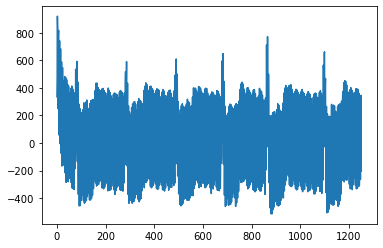

In [14]:
d = data1
plt.plot(d)

In [16]:
sum(d[-40:])

<ipython-input-16-346ed87b2039>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sum(d[-40:])


1416

In [17]:
taps = lp_taps(50, 40, 250)
d = data1

<ipython-input-11-454c6d7d1a83>:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  ans = sum(signal[-nt:]*taps)/nt


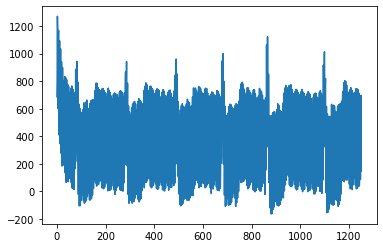

In [19]:
dt = d
for i in range(50, len(d)):
    dt = dt+RT_fir(d[:i], taps)
plt.plot(dt)

<ipython-input-32-c4571c48bd6a>:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  ft = np.array(fft(data2, 250))
/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


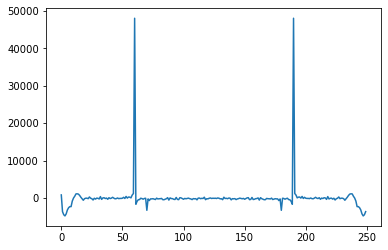

In [32]:
ft = np.array(fft(data2, 250))
plt.plot(ft)
#shape(np.array(ft[0]))

<ipython-input-34-e43194f8df39>:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  plt.plot(scipy.fft(d))
/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


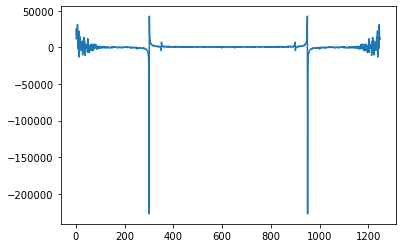

In [34]:
plt.plot(scipy.fft(d))

In [37]:
a = dict(ba=[1, 2, 3, 4, 5], na=[6, 7, 8, 9, 10])

a


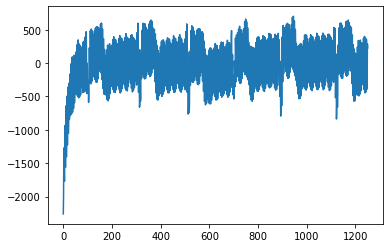

b


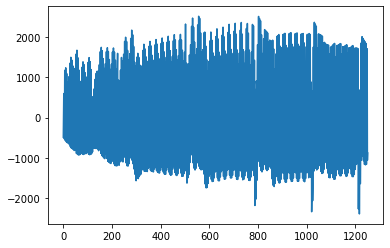

c


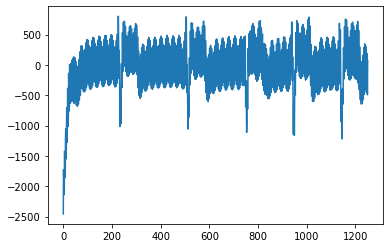

d


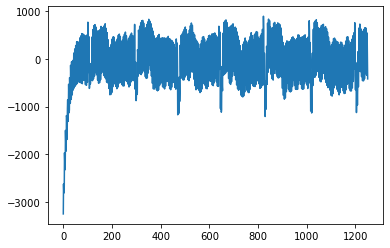

e


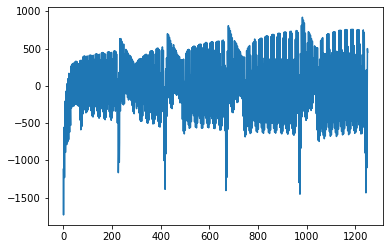

f


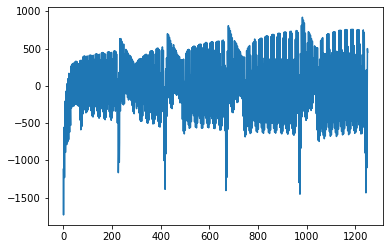

g


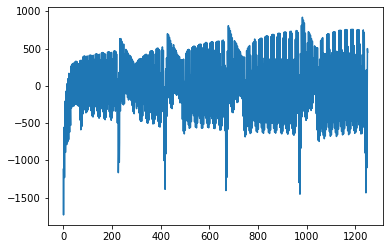

Filtered::::::::::::::::::::::
a


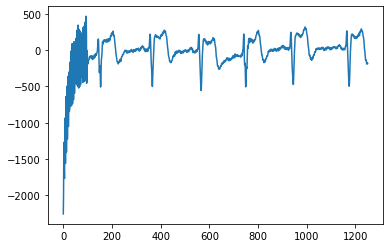

b


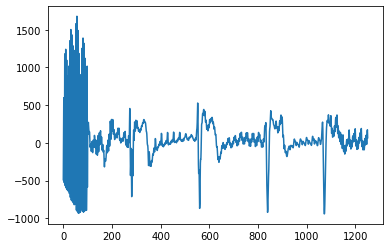

c


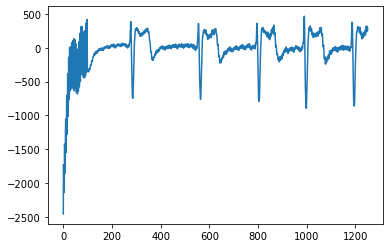

d


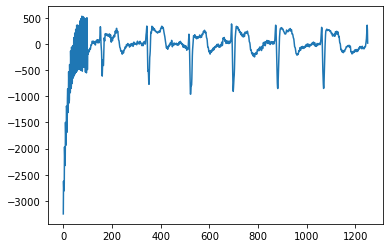

e


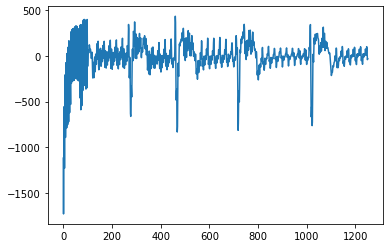

f


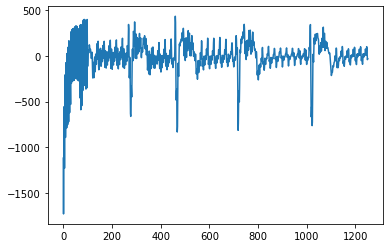

g


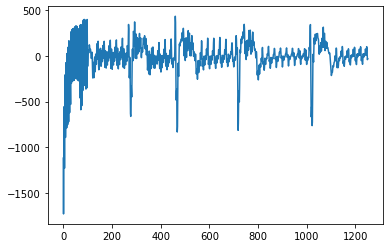

In [40]:
a = np.array("-2261 -2015 -1464 -1270 -1663 -1771 -1291 -936 -1248 -1563 -1140 -640 -945 -1405 -1017 -496 -717 -1226 -900 -360 -510 -1053 -841 -301 -326 -844 -796 -303 -162 -597 -777 -359 -10 -377 -760 -377 91 -239 -736 -387 93 -138 -681 -390 119 -36 -594 -420 100 72 -456 -439 19 169 -255 -474 -54 278 -90 -496 -129 348 -10 -521 -190 289 50 -504 -236 266 85 -472 -303 191 171 -363 -363 83 247 -177 -442 -39 317 -49 -434 -122 333 46 -426 -124 391 215 -267 33 471 223 -455 -422 -2 -118 -452 -375 -369 -280 -589 -306 -239 229 -42 -290 0 485 200 -311 18 512 292 -274 -21 483 353 -212 -93 392 418 -114 -165 276 477 59 -245 151 526 186 -284 77 543 259 -287 37 544 318 -237 19 534 423 -126 -10 487 517 4 -72 370 588 201 -147 217 601 248 -249 82 512 188 -382 -94 368 123 -464 -272 205 94 -471 -392 66 113 -370 -480 -63 196 -201 -546 -160 271 -80 -565 -202 248 2 -533 -220 292 104 -458 -241 250 187 -352 -285 181 268 -191 -335 85 350 -38 -398 -24 396 54 -439 -98 362 109 -439 -155 353 162 -403 -208 296 226 -320 -269 195 293 -167 -347 81 369 -17 -396 -24 413 58 -448 -97 380 125 -428 -129 368 190 -383 -194 307 249 -297 -259 210 327 -124 -326 83 380 3 -380 0 442 92 -410 -78 392 144 -416 -133 375 209 -352 -172 335 299 -239 -225 238 366 -64 -297 106 420 41 -377 -11 424 89 -432 -91 389 140 -408 -133 370 199 -368 -203 296 266 -273 -271 187 348 -74 -329 89 458 142 -209 208 599 184 -439 -208 202 -133 -661 -617 -174 -307 -573 -516 78 198 -232 -203 289 493 111 -166 241 598 229 -214 140 592 281 -238 94 588 345 -227 31 537 391 -173 -47 444 431 -76 -114 342 509 133 -169 235 590 241 -201 169 629 325 -189 151 646 398 -149 117 625 468 -77 42 525 507 8 -88 333 507 81 -276 103 437 40 -446 -103 341 10 -540 -240 260 10 -554 -334 185 69 -492 -398 92 141 -338 -434 11 247 -137 -461 -78 323 -10 -500 -139 343 70 -468 -148 348 133 -423 -193 315 200 -347 -262 214 264 -191 -336 98 339 -50 -396 -15 379 40 -445 -91 361 85 -447 -149 360 144 -412 -203 301 211 -332 -270 212 281 -168 -336 91 346 -21 -394 -12 411 53 -439 -92 382 120 -432 -141 367 167 -387 -190 317 242 -293 -247 227 316 -105 -310 113 390 25 -378 -7 427 92 -419 -76 380 110 -436 -151 356 166 -396 -223 287 221 -308 -283 183 299 -123 -353 57 360 -1 -400 -5 473 176 -251 159 588 227 -438 -263 169 -110 -764 -703 -268 -285 -743 -639 -76 180 -149 -332 130 486 148 -259 115 560 235 -284 57 541 268 -287 -20 484 295 -261 -97 394 355 -174 -192 277 421 21 -259 166 494 117 -313 67 512 191 -324 30 518 260 -300 -16 512 344 -191 -46 450 421 -107 -137 322 472 37 -268 119 450 54 -424 -89 331 -8 -573 -258 213 -43 -626 -385 124 -14 -601 -482 3 31 -475 -541 -96 114 -283 -594 -190 196 -150 -611 -244 228 -66 -609 -285 224 8 -555 -320 198 70 -477 -383 100 149 -348 -437 3 229 -166 -496 -107 295 -70 -552 -192 271 -6 -551 -238 262 37 -531 -304 206 114 -440 -362 114 184 -299 -423 11 269 -130 -483 -107 317 -29 -511 -156 304 42 -489 -180 312 108 -464 -258 243 171 -376 -323 148 236 -237 -409 5 281 -110 -474 -101 343 -16 -512 -164 303 57 -491 -194 308 126 -435 -239 270 251 -254 -132 401 487 -57 -363 -71 129 -346 -475 -452 -186 -538 -395 -376 31 -98 -355 -180 374 248 -281 -82 420 393 -141 -127 329 457 20 -206 201 509 145 -269 96 553 212 -304 37 500 260 -296 -12 496 325 -231 -68 433 420 -114 -107 355 517 104 -136 282 623 265 -174 209 661 356 -165 155 620 361 -210 36 530 338 -252 -139 312 273 -274 -330 94 245 -174 -477 -96 253 -109 -555 -201 237 -57 -572 -245 236 11 -543 -284 230 111 -433 -307 178 200 -298 -348 95 310 -94 -386 7 377 23 -422 -58 393 109 -424 -99 392 165 -393 -154 343 214 -332 -225 244 289 -207 -299 131 352 -35 -361 19 411 54 -411 -57 399 112 -425 -103 386 171 -378 -147 349 227 -312 -219 252 315 -156 -297 129 367 0 -350 35 445 97 -372 -19 440 173 -363 -62 426 220 -339 -133 366 266 -281 -212 254 320 -126 -305 108 374 6 -370 3 433 97 -406 -52 409 134 -394 -90 406 206 -336 -100 445 446 -11 -9 350 338 -212 -496 -183 26 -427 -794 -532 -38 -254 -639 -183 392 218 -281 49 566 393 -154 24 533 475 -36 -29 418 528 104 -122 286 576 215 -193 171 597 278 -228 109 585 322 -220 71 574 392 -144 20 503 480 -14 -12 441 577 187 -60 341 686 321 -90 270 703 385 -134 175 634 373 -190 31 506 311 -255 -161 297 256 -282 -344 86 244 -164 -462 -79 258 -92 -534 -171 273 -24 -531 -203 294 44 -492 -228 285 142 -386 -266 224 249 -230 -311 133 333 -42 -360 46 420 16 -380 -19 425 125 -405 -71 417 178 -374 -139 362 241 -295 -203 262 302 -157 -287 145 373 -10 -352 38 426 71 -397 -41 401 124 -414 -98 397 179 -370 -147 355 247 -290 -216 249 321 -114 -289 138 388 12 -352 31 449 77 -397 -43 411 143 -391 -93 402 193 -361 -154 344 266 -261 -212 244 338 -100 -288 129 409 21 -353 27 450 100 -399 -40 424 160 -382 -95 410 215 -329 -141 358 306 -205 -196 260 377 -53 -280 124 433 45 -363 6 434 97 -412 -57 410 153 -398 -110 384 207 -341 -188 302 269 -239 -248 206 347 -50 -288 146 535 245 -128 180 520 99 -518 -252 138 -207 -838 -649 -141 -218 -663 -412 190 273 -170 -148 332 531 127 -143 259 599 231 -200 159 601 290 -227 88 570 327 -224 26 520 372 -149 -39 443 450 -39 -111 323 541 129 -180 218 627 259 -196 164 611 338 -179 149 645 434 -118 110 610 531 -56 16 489 557 19 -119 289 533 65 -305 47 423 16 -487 -156 274 -15 -570 -270 211 -15 -566 -352 152 36 -479 -400 80 141 -303 -451 -17 240 -136 -481 -88 340 -22 -492 -131 318 58 -466 -155 345 138 -415 -203 307 226 -309 -271 205 296 -153 -328 88 372 -19 -394 -20 401 47 -447 -89 376 100 -434 -155 356 154 -391 -212 289 228".split(), dtype = 'int')
b = np.array("-489 67 599 32 -528 56 1179 -4 -568 23 1240 -45 -599 -11 1096 -69 -622 -108 883 496 -638 -451 638 1017 -256 -670 368 1353 -171 -722 89 1502 -211 -759 -158 1432 -228 -773 -177 1288 91 -794 -254 1061 681 -820 -583 854 1225 -528 -815 565 1579 -353 -893 236 1678 -388 -911 -129 1490 -396 -932 -327 1185 -61 -929 -358 844 423 -918 -665 532 905 -581 -885 238 1253 -370 -908 -57 1389 -377 -919 -311 1319 -363 -903 -300 1121 -111 -897 -327 893 480 -895 -623 638 1016 -588 -865 353 1375 -376 -913 31 1494 -385 -925 -264 1395 -383 -918 -314 1197 -361 -901 -296 522 -281 -854 -256 0 299 -758 -417 -202 716 -228 -762 -180 955 -220 -769 -170 1101 -219 -769 -170 1155 40 -783 -230 1152 790 -825 -588 932 1317 -532 -795 626 1642 -365 -892 299 1750 -408 -946 22 1668 -228 -973 -244 1470 318 -1004 -478 1224 872 -1024 -714 949 1343 -741 -898 630 1641 -539 -1019 285 1740 -571 -1090 -27 1647 -239 -1112 -290 1447 310 -1132 -545 1199 857 -1144 -765 925 1329 -861 -955 611 1633 -639 -1089 281 1734 -655 -1154 -35 1631 -271 -1193 -333 1429 279 -1200 -580 1215 916 -1204 -632 1226 1600 -1032 -1114 146 932 -665 -1188 -571 667 -581 -1105 -491 1180 -533 -1062 -343 1498 415 -1086 -404 1410 1081 -1106 -596 1162 1578 -957 -797 851 1898 -691 -992 515 2002 -513 -1129 187 1894 -45 -1201 -118 1671 506 -1207 -399 1430 1078 -1149 -617 1172 1592 -1009 -797 893 1973 -789 -933 619 2179 -416 -1064 311 2062 45 -1153 -35 1771 507 -1283 -451 1381 944 -1414 -904 922 1277 -1573 -1346 391 1505 -1064 -1500 5 1601 -1017 -1520 -324 1501 -609 -1470 -608 1311 31 -1431 -799 1086 718 -1406 -961 838 1287 -1302 -1175 549 1674 -830 -1282 217 1827 -829 -1339 -103 1713 -395 -1340 -401 1516 234 -1340 -674 1256 869 -1344 -896 972 1405 -1265 -1092 654 1775 -807 -1241 304 1898 -818 -1309 -41 1787 -360 -1339 -359 1554 268 -1343 -648 1297 892 -1354 -880 1008 1433 -1281 -1070 689 1813 -824 -1236 344 1944 -836 -1317 -8 1831 -317 -1356 -323 1599 299 -1373 -609 1339 930 -1382 -868 1045 1470 -1306 -1058 726 1848 -858 -1237 380 1983 -799 -1330 36 1874 -276 -1376 -289 1638 338 -1413 -581 1377 966 -1413 -832 1080 1505 -1310 -1036 761 1883 -908 -1225 416 2026 -760 -1354 66 1902 -242 -1407 -262 1667 373 -1437 -559 1393 978 -1424 -821 1100 1525 -1286 -1016 782 1913 -968 -1222 437 2066 -731 -1367 93 1935 -209 -1430 -233 1693 404 -1444 -525 1436 1017 -1403 -813 1116 1544 -1274 -1017 789 1927 -1046 -1228 432 2073 -728 -1381 95 1933 -212 -1462 -249 1678 394 -1464 -549 1404 999 -1399 -790 1150 1628 -1104 -749 1113 2330 -921 -1329 48 1353 -1132 -1632 -901 912 -991 -1498 -717 1342 256 -1416 -449 1557 1207 -1119 -520 1376 1816 -933 -689 1071 2273 -764 -918 696 2479 -451 -1128 304 2251 -1 -1260 -61 1882 550 -1306 -396 1551 1132 -1262 -675 1240 1713 -1131 -876 910 2308 -928 -1085 573 2525 -532 -1216 260 2473 -9 -1273 -58 2109 557 -1302 -385 1638 1137 -1295 -711 1168 1690 -1272 -1066 685 2110 -1214 -1413 217 2131 -930 -1656 -194 1783 -443 -1752 -524 1443 159 -1741 -816 1165 801 -1640 -1051 878 1399 -1460 -1230 587 1910 -1229 -1404 265 2132 -816 -1538 -58 1930 -273 -1593 -364 1615 335 -1584 -665 1311 959 -1502 -931 998 1529 -1356 -1136 667 2018 -1153 -1333 325 2211 -767 -1499 -22 1962 -244 -1574 -345 1634 364 -1575 -659 1322 973 -1480 -916 1013 1539 -1349 -1127 678 2051 -1126 -1315 343 2252 -730 -1465 4 2013 -206 -1537 -319 1661 396 -1527 -626 1352 1003 -1448 -878 1040 1588 -1305 -1088 711 2124 -1086 -1285 368 2323 -698 -1434 16 2065 -175 -1505 -298 1699 409 -1503 -610 1366 1021 -1438 -867 1043 1604 -1305 -1087 702 2157 -1100 -1303 347 2349 -718 -1459 -14 2080 -199 -1534 -334 1686 398 -1542 -643 1336 1005 -1465 -895 1020 1608 -1315 -1109 677 2178 -1107 -1329 321 2369 -723 -1481 -22 2080 -205 -1551 -348 1689 400 -1539 -640 1349 1027 -1455 -884 1035 1653 -1347 -1103 682 2219 -1105 -1319 324 2344 -723 -1496 -32 2103 -213 -1564 -363 1681 378 -1567 -670 1319 1000 -1484 -916 1006 1630 -1325 -1115 690 2321 -1006 -1162 572 2284 -502 -1444 -229 1427 -872 -2190 -1236 698 -388 -2031 -1225 912 817 -1563 -882 1131 1816 -1095 -864 942 2520 -830 -1051 598 2464 -440 -1216 234 2411 40 -1316 -125 2063 591 -1353 -451 1596 1205 -1298 -733 1197 1966 -1156 -958 833 2192 -957 -1175 477 2167 -532 -1287 164 2141 2 -1320 -127 2109 615 -1292 -410 1876 1319 -1232 -689 1330 1931 -1128 -962 824 1912 -1008 -1270 337 1905 -734 -1528 -113 1929 -317 -1687 -509 1710 220 -1718 -830 1212 852 -1640 -1077 853 1585 -1469 -1279 524 2021 -1232 -1458 196 2043 -801 -1573 -121 2069 -268 -1631 -432 1786 328 -1618 -720 1346 980 -1533 -951 972 1743 -1373 -1179 612 2068 -1158 -1387 266 2084 -748 -1536 -82 2099 -236 -1607 -405 1801 352 -1608 -710 1349 991 -1521 -949 981 1740 -1367 -1172 618 2088 -1153 -1386 271 2102 -740 -1528 -64 2114 -217 -1590 -389 1829 371 -1584 -693 1374 1010 -1505 -936 991 1764 -1352 -1157 632 2087 -1132 -1373 285 2095 -724 -1509 -57 2109 -209 -1586 -393 1829 372 -1587 -695 1376 1015 -1516 -941 1000 1786 -1350 -1159 644 2080 -1119 -1355 305 2086 -716 -1506 -51 2095 -211 -1578 -376 1861 369 -1598 -697 1377 1002 -1517 -942 995 1766 -1368 -1161 637 2073 -1141 -1372 287 2072 -735 -1499 -22 2094 -105 -1402 -131 2072 612 -1484 -834 884 336 -2346 -1857 61 671 -2071 -1768 216 1757 -1247 -1334 429 2374 -507 -1232 251 2332 75 -1270 -63 2279 625 -1306 -414 1734 1254 -1278 -716 1260 2085 -1176 -973 836 2075 -980 -1198 471 2059 -589 -1341 130 2049 -65 -1392 -184 2027 524 -1382 -473 1862 1254 -1292 -715 1373 1874 -1121 -918 946 1838 -887 -1096 562 1820 -521 -1264 165 1810 -88 -1384 -243 1807 369 -1492 -641 1582 948 -1501 -964 985 1757 -1397 -1199 569 1771 -1177 -1388 229 1802 -780 -1494 -78 1829 -278 -1538 -379 1848 290 -1533 -674 1503 957 -1447 -905 1042 1796 -1300 -1120 658 1800 -1090 -1295 310 1816 -706 -1410 -2 1834 -212 -1453 -310 1844 350 -1448 -608 1593 990 -1392 -863 1082 1768 -1271 -1094 660 1767 -1069 -1279 305 1785 -696 -1407 -12 1800 -242 -1466 -323 1814 325 -1453 -604 1605 983 -1378 -858 1109 1739 -1260 -1086 667 1736 -1076 -1278 312 1756 -704 -1408 -19 1780 -262 -1471 -335 1794 299 -1471 -629 1579 932 -1418 -891 1064 1733 -1291 -1104 668 1734 -1027 -1167 497 1734 -373 -1139 57 1719 -751 -2277 -1262 598 -612 -2400 -1420 689 522 -1647 -920 1070 1857 -1058 -819 968 2016 -756 -951 655 1971 -395 -1074 307 1930 51 -1166 -35 1890 560 -1178 -349 1848 1253 -1166 -639 1467 1715 -1062 -881".split(), dtype = 'int')
c = np.array("-2457 -1728 -1908 -2071 -2139 -1426 -1462 -1609 -1853 -1211 -1052 -1279 -1549 -1026 -703 -1006 -1277 -881 -386 -750 -1014 -780 -140 -499 -760 -689 3 -249 -522 -634 19 -52 -281 -603 -38 78 -194 -584 -125 108 -221 -604 -269 133 -297 -637 -454 122 -309 -602 -578 61 -253 -520 -662 -16 -167 -384 -683 -116 -39 -304 -645 -166 89 -240 -578 -211 215 -190 -500 -276 310 -108 -383 -328 317 -21 -280 -399 242 77 -151 -441 128 172 -95 -444 37 255 -85 -418 -53 365 -51 -366 -142 418 -6 -306 -255 409 56 -222 -327 319 127 -104 -385 188 210 -59 -406 85 291 -41 -381 -2 399 -19 -340 -104 456 26 -270 -200 441 77 -192 -282 353 159 -73 -352 228 234 -34 -372 128 310 -17 -360 28 411 1 -310 -64 476 42 -255 -170 463 96 -180 -257 383 175 -60 -330 247 235 -24 -360 144 310 -12 -351 51 423 11 -310 -49 486 46 -246 -150 483 102 -174 -243 399 164 -68 -322 279 248 -1 -342 165 336 15 -325 86 439 38 -302 -27 499 52 -251 -144 482 97 -189 -240 401 172 -74 -324 277 226 -20 -364 156 306 -8 -354 68 407 18 -304 -22 510 116 -134 85 803 455 -14 -221 229 -250 -671 -1015 -449 -545 -742 -971 -290 21 -153 -375 138 534 194 -105 198 703 276 -27 101 719 352 28 -9 636 393 121 -112 486 422 187 -175 347 465 186 -189 244 539 194 -166 134 629 226 -121 33 648 298 -41 -66 599 381 87 -130 497 440 230 -158 392 531 293 -138 294 604 310 -116 194 684 305 -106 38 654 293 -133 -164 466 225 -133 -380 223 130 -133 -510 17 116 -178 -553 -103 174 -165 -526 -195 283 -124 -449 -277 341 -40 -360 -341 324 57 -228 -403 224 143 -96 -432 118 228 -60 -424 36 302 -27 -392 -50 414 15 -335 -156 453 62 -260 -242 408 136 -169 -335 289 189 -58 -387 165 256 -25 -401 66 314 -16 -375 -31 422 11 -329 -137 458 48 -273 -238 418 131 -171 -316 310 205 -40 -373 188 279 -4 -381 89 323 12 -363 -10 430 40 -312 -105 475 74 -259 -221 445 142 -173 -297 339 214 -31 -362 208 278 2 -378 97 320 8 -362 0 434 38 -316 -97 489 77 -258 -209 448 146 -177 -295 355 221 -38 -358 217 282 11 -374 111 319 31 -355 10 431 42 -315 -92 481 88 -260 -199 456 152 -179 -288 363 219 -37 -355 221 274 12 -377 124 327 32 -354 29 434 52 -314 -82 487 67 -268 -199 451 140 -207 -306 346 200 -66 -376 204 239 -18 -398 98 271 -6 -386 7 398 20 -338 -72 538 210 -76 112 793 358 -186 -459 3 -399 -741 -1057 -518 -512 -673 -863 -206 115 -89 -331 131 557 209 -139 133 693 292 -53 44 687 351 1 -77 574 417 136 -174 418 433 174 -234 270 433 176 -235 168 542 190 -204 60 621 240 -142 -33 621 296 -76 -132 551 433 149 -186 436 478 257 -202 329 499 305 -182 240 638 344 -161 122 723 356 -162 -53 640 287 -197 -266 401 228 -115 -459 131 110 -147 -574 -56 81 -193 -603 -176 171 -171 -557 -266 275 -120 -472 -334 322 -40 -381 -404 270 82 -200 -452 171 143 -88 -474 60 209 -57 -459 -21 313 -37 -416 -113 410 8 -355 -211 429 78 -286 -310 362 155 -148 -394 228 175 -51 -431 104 244 -37 -435 9 324 -18 -398 -85 425 26 -335 -188 446 76 -267 -281 386 168 -132 -365 266 196 -35 -411 131 270 -15 -414 37 341 3 -376 -60 442 36 -331 -162 469 90 -253 -258 408 177 -133 -346 286 217 -19 -400 148 274 -7 -410 49 337 13 -376 -46 439 42 -324 -143 480 91 -253 -237 437 177 -144 -326 316 240 -15 -384 172 283 -4 -408 55 322 2 -383 -38 427 29 -336 -143 468 79 -269 -244 424 150 -188 -335 317 242 0 -340 283 462 309 -61 408 477 -66 -690 -559 -260 -766 -1115 -940 -280 -593 -727 -520 270 72 -124 -182 514 450 211 -123 454 558 292 -144 341 561 277 -153 210 649 281 -132 76 683 302 -102 -49 634 360 -38 -162 504 413 149 -236 347 446 185 -270 238 455 214 -249 147 604 274 -190 59 718 358 -114 -25 729 456 -14 -127 613 562 226 -237 395 506 232 -337 173 346 95 -425 -48 352 -29 -483 -250 336 -73 -486 -406 266 -56 -425 -504 171 37 -244 -555 51 91 -156 -554 -28 145 -104 -513 -104 288 -66 -455 -186 394 -5 -377 -271 405 80 -287 -352 324 170 -113 -420 193 202 -49 -455 77 217 -40 -442 -28 344 -12 -406 -128 429 28 -348 -229 435 80 -278 -322 351 158 -128 -403 216 200 -38 -438 83 254 -25 -425 13 369 23 -371 -80 460 57 -326 -196 459 103 -263 -296 376 154 -137 -390 233 196 -33 -428 106 253 -29 -432 10 342 -6 -394 -81 443 37 -325 -172 490 172 -153 -103 709 677 222 -258 133 -233 -712 -1149 -646 -588 -919 -1159 -558 -85 -325 -493 -55 533 184 -118 72 730 376 0 5 686 463 135 -104 534 477 237 -183 372 498 224 -222 239 523 216 -216 114 629 244 -183 -1 668 290 -130 -110 610 359 20 -194 481 438 192 -250 343 494 272 -234 268 576 376 -200 171 745 375 -168 37 788 407 -159 -133 643 381 -116 -337 340 268 -58 -513 50 153 -140 -603 -121 117 -175 -603 -242 228 -155 -545 -329 306 -87 -456 -399 296 30 -379 -452 216 126 -127 -490 101 203 -70 -487 17 248 -35 -453 -74 380 4 -397 -171 448 58 -327 -268 423 134 -243 -359 314 185 -78 -432 161 240 -24 -445 57 265 -14 -425 -47 389 12 -382 -162 458 65 -322 -246 436 134 -245 -335 334 202 -75 -410 196 266 12 -415 97 289 21 -400 -11 398 26 -368 -122 464 56 -325 -240 444 121 -251 -327 343 188 -86 -412 195 238 -21 -428 92 261 -9 -409 -4 400 51 -317 2 686 453 53 74 582 -52 -658 -937 -410 -708 -976 -1219 -518 -391 -486 -645 12 281 89 -231 226 627 295 -107 174 755 352 -52 57 744 405 -14 -71 618 470 162 -176 446 455 214 -239 296 448 213 -249 188 566 242 -222 75 674 295 -170 -26 705 390 -87 -122 640 542 169 -193 499 566 342 -227 368 557 373 -232 238 657 367 -249 54 719 305 -298 -179 569 183 -357 -411 301 115 -255 -572 60 27 -208 -645 -98 43 -208 -637 -178 158 -163 -572 -259 286 -96 -486 -324 347 -13 -389 -393 309 113 -199 -454 196 146 -77 -491 74".split(), dtype = 'int')
d = np.array("-3249 -2623 -2777 -2810 -2673 -1968 -2186 -2325 -2214 -1498 -1704 -1935 -1844 -1188 -1219 -1688 -1545 -1034 -858 -1220 -1309 -1005 -531 -827 -1127 -1066 -392 -608 -933 -920 -133 -351 -848 -812 -60 -199 -757 -722 -56 -31 -606 -651 -150 123 -262 -608 -310 210 -48 -570 -413 282 60 -541 -465 359 141 -517 -494 363 243 -420 -477 304 344 -171 -481 171 441 96 -495 -18 483 250 -504 -177 531 325 -519 -291 525 321 -446 -382 510 412 -233 -447 397 447 -33 -538 209 487 161 -552 8 502 302 -490 -12 770 595 -283 -151 467 44 -618 -591 -257 -459 -527 -501 -287 -96 -406 -438 118 460 184 -456 139 616 399 -416 25 698 427 -359 -86 719 452 -285 -239 668 485 -135 -331 551 541 77 -443 336 591 217 -508 87 527 269 -498 -25 613 290 -435 -121 682 373 -295 -202 657 422 -133 -266 645 555 97 -342 488 694 348 -380 249 737 408 -416 28 642 297 -485 -242 551 214 -500 -469 402 170 -405 -618 232 192 -238 -750 -4 243 -42 -746 -162 305 51 -706 -264 419 151 -586 -352 464 199 -460 -437 454 281 -280 -525 341 330 -59 -576 165 370 78 -624 -44 418 149 -591 -160 497 171 -513 -262 521 229 -399 -385 473 250 -298 -498 358 346 -42 -539 169 390 79 -565 -2 468 180 -567 -157 514 208 -460 -227 563 268 -364 -369 488 285 -225 -475 364 366 2 -528 176 424 106 -588 -36 456 172 -555 -165 503 186 -483 -266 542 258 -343 -368 490 300 -193 -456 381 474 172 -312 482 724 283 -633 -335 -66 -499 -874 -836 -367 -566 -745 -710 194 121 -361 -336 601 532 57 -263 583 686 335 -314 370 756 464 -328 180 800 513 -295 26 808 530 -237 -134 750 559 -106 -269 629 592 69 -372 456 653 284 -408 271 722 452 -398 88 777 539 -295 3 831 637 -128 -90 794 687 10 -227 654 738 187 -359 389 650 308 -510 86 585 335 -627 -231 487 293 -631 -431 435 343 -484 -589 300 419 -222 -648 173 446 51 -669 0 488 289 -649 -171 514 434 -557 -285 435 384 -520 -406 412 414 -344 -493 344 444 -162 -583 209 429 60 -600 50 443 237 -629 -153 425 359 -570 -291 436 395 -471 -362 434 434 -307 -472 359 473 -91 -555 218 426 78 -622 26 416 227 -646 -198 392 325 -593 -317 380 323 -492 -416 349 291 -380 -493 306 235 -297 -598 223 236 -117 -633 160 419 282 -361 119 332 -152 -1171 -988 -509 -809 -1144 -1088 -380 -456 -891 -710 287 185 -246 -399 493 441 87 -400 362 528 241 -438 161 573 296 -442 8 620 302 -383 -121 669 336 -277 -261 612 386 -104 -342 518 475 105 -431 310 525 235 -455 141 603 360 -391 40 695 416 -276 -48 753 475 -119 -155 706 518 20 -280 536 548 184 -425 267 505 213 -561 -46 417 139 -646 -276 383 84 -625 -454 351 64 -524 -585 310 156 -335 -661 168 209 -101 -705 0 311 49 -681 -152 382 110 -628 -258 456 168 -519 -377 468 204 -383 -470 412 279 -192 -555 250 331 24 -621 41 374 107 -624 -116 422 180 -575 -255 483 227 -445 -333 497 284 -306 -471 444 472 3 -465 304 523 198 -546 79 523 292 -560 -125 526 317 -501 -240 545 340 -402 -369 500 367 -258 -476 397 407 -49 -568 217 462 152 -576 118 685 584 -219 94 564 61 -1025 -1047 -393 -629 -1116 -1065 -296 -159 -582 -665 329 539 183 -340 430 767 473 -321 256 798 582 -300 90 818 582 -269 -64 762 595 -170 -247 653 630 -21 -410 493 662 194 -503 259 671 343 -534 57 694 458 -477 -59 712 476 -353 -136 736 579 -190 -260 648 607 -5 -342 526 668 194 -437 283 642 292 -545 1 565 274 -626 -243 479 158 -655 -432 388 130 -578 -629 278 169 -429 -757 120 164 -238 -781 -57 169 -136 -797 -196 310 4 -775 -325 361 42 -694 -430 439 138 -509 -549 375 206 -345 -654 259 302 -116 -694 58 357 42 -707 -153 395 141 -641 -247 470 173 -523 -311 551 269 -372 -429 487 339 -218 -562 293 405 39 -575 152 505 200 -578 -33 534 257 -535 -157 573 259 -449 -293 562 294 -351 -463 455 361 -133 -521 323 419 43 -617 109 481 192 -599 -66 527 242 -563 -170 619 382 -267 -20 895 580 -194 -551 118 -231 -905 -1207 -660 -464 -686 -1053 -332 264 143 -532 63 749 510 -279 53 835 572 -165 -59 804 589 -22 -201 665 627 150 -325 456 625 308 -417 210 657 432 -443 10 746 545 -303 -65 766 605 -188 -219 684 657 -16 -312 569 720 225 -371 391 756 445 -400 190 739 586 -389 -4 722 554 -370 -186 653 509 -301 -373 485 414 -266 -616 237 346 -143 -764 -20 253 -63 -843 -236 274 51 -817 -381 332 114 -687 -443 378 169 -507 -511 368 239 -343 -633 248 325 -103 -681 89 366 74 -692 -95 401 160 -670 -248 446 209 -578 -363 463 242 -440 -450 429 299 -259 -557 302 371 -39 -635 106 404 124 -639 -76 430 196 -638 -211 504 253 -534 -332 498 293 -381 -438 450 355 -195 -530 334 406 2 -622 111 463 165 -636 -85 457 219 -627 -238 489 247 -515 -324 505 292 -374 -462 428 328 -192 -546 307 383 0 -620 108 461 219 -509 124 801 590 -388 -187 344 -135 -1092 -1087 -307 -526 -1133 -1117 -18 123 -286 -558 399 622 283 -387 355 766 454 -385 164 798 533 -347 8 821 582 -233 -128 760 613 -112 -265 652 643 54 -385 453 633 241 -464 221 644 359 -481 52 699 454 -427 -87 712 473 -304 -182 726 580 -140 -302 623 656 43 -423 445 676 273 -492 189 634 363 -554 -78 564 320 -601 -334 456 232 -586 -529 360 229 -449 -656 228 260 -260 -763 57 296 -30 -779 -136 349 142 -727 -272 427 255 -606 -364 437 297 -459 -463 399 330 -305 -558 291 357 -110 -639 126 356 46 -684 -63 288 36 -753 -272 301 61 -705 -379 352 83 -596 -497 346 118 -454 -585 295 177 -270 -671 146 236 -86 -725 -38 287 17 -717 -189 374 82 -646 -291 456 124 -530 -395 466 183 -383 -507 384 224 -227 -621 217 292 -16 -670 16 346 66 -671 -153 411 121 -609 -279 484 178 -472 -352 546 324 -153 -207 760 609 13 -646 -73 -221 -695 -1124 -866 -503 -668 -966 -625 151 42 -584 -187 647 383 -261 -158 731 485 -88 -266 630 538 86 -372 427 545 233 -456 201 584 313 -460 29 621 334 -416 -111 655 352 -307 -230 648 400 -152 -342 546 460 57 -418".split(), dtype = 'int')
e = np.array("-1119 -1730 -1127 -556 -911 -1229 -887 -207 -748 -892 -792 -73 -622 -506 -787 27 -525 -65 -751 95 -462 -378 -720 167 -295 -376 -620 117 74 -339 -530 -58 266 -300 -291 -141 290 -276 24 -216 299 -270 302 -266 301 -266 -179 -245 321 -179 -246 -114 331 149 -246 -23 324 310 -259 57 179 296 -271 157 -174 296 -271 300 -458 338 -260 -178 -589 343 -74 -229 -544 32 307 -202 -378 -169 392 -185 -120 -242 401 -173 245 -323 395 -173 328 -362 387 -137 -111 -349 400 41 -173 -324 176 328 -168 -278 -113 408 -169 -75 -236 413 -164 224 -332 408 -170 387 -403 399 -83 -67 -418 409 48 -171 -379 93 353 -165 -283 -125 423 -155 -96 -236 430 -146 200 -337 423 -150 399 -411 412 -135 -26 -434 423 58 -157 -412 67 351 -143 -307 -143 440 -138 -129 -249 446 -133 162 -351 442 -130 428 -439 428 -121 52 -454 425 62 -142 -421 54 348 -134 -314 -144 451 -125 -111 -242 457 -122 153 -347 452 -123 437 -422 436 -119 2 -462 447 74 -137 -431 50 363 -126 -336 -162 464 -116 -152 -271 469 -113 155 -339 462 -119 447 -67 425 -138 -14 -497 -55 94 -122 -1164 -912 178 -18 -1024 -760 632 45 -330 -335 633 44 260 -208 598 11 570 -240 555 -5 104 -255 559 156 -61 -238 284 427 -75 -105 63 488 -94 110 -57 470 -111 452 -157 437 -143 427 -190 412 -130 -23 -129 407 48 -178 10 394 290 -198 193 361 317 -264 345 256 279 -346 322 222 292 -374 237 19 287 -215 -180 -208 303 -46 -272 -306 85 319 -257 -268 -231 342 -230 -67 -361 358 -215 258 -457 361 -200 291 -475 366 -22 -104 -474 347 38 -134 -402 -19 395 -187 -249 -167 404 -172 -129 -339 418 -157 151 -436 424 -153 402 -493 415 -99 -13 -501 299 67 -146 -461 -72 420 -133 -351 -267 461 -114 -160 -358 471 -107 133 -446 470 -106 446 -511 456 -53 19 -506 277 105 -113 -450 -89 427 -102 -364 -290 495 -87 -184 -396 506 -71 95 -475 503 -74 470 -544 486 -18 39 -553 169 141 -77 -491 -143 476 -68 -345 -213 521 -59 401 106 475 -101 -297 -1002 -249 -14 -695 -1387 -628 197 227 -910 -227 373 138 -407 -40 699 118 -161 -91 684 93 87 -147 649 64 411 -239 608 30 560 -295 565 64 102 -305 505 185 -49 -247 154 550 -64 -102 -25 506 -77 180 -86 481 -99 467 -119 447 -126 404 -94 418 -86 -43 -5 403 20 -172 87 390 348 -227 149 172 349 -225 180 -183 346 -228 288 -448 349 -218 318 -608 358 -105 -104 -644 57 50 -173 -594 -264 435 -84 -462 -422 463 -121 -243 -477 484 -99 78 -523 489 -84 428 -570 476 8 -3 -558 130 144 -88 -480 -171 510 -69 -369 -329 525 -58 -178 -399 533 -47 122 -482 530 -45 474 -554 513 27 25 -564 112 176 -58 -498 -184 538 -48 -399 -338 553 -35 -213 -435 559 -24 52 -503 558 -19 462 -567 513 44 45 -566 93 199 -35 -517 -202 562 -19 -397 -343 572 -9 -219 -432 582 -3 60 -499 575 -3 475 -556 495 62 57 -563 86 213 -19 -508 -202 575 -10 -399 -345 586 0 -234 -439 592 8 45 -504 585 3 440 -569 478 70 73 -573 77 226 -6 -506 -179 587 1 -398 -351 595 7 -228 -440 599 14 14 -526 598 19 383 -593 431 91 90 -592 36 247 12 -539 -240 608 21 -423 -359 613 90 -42 -133 589 8 278 -601 249 19 -627 -1403 -719 235 -243 -1226 -571 465 218 -582 -220 806 210 -240 -161 773 182 12 -203 739 149 322 -278 693 109 624 -353 642 141 142 -360 357 266 35 -319 37 605 19 -183 -114 585 0 52 -165 567 -19 435 -224 532 -48 482 -216 493 -3 13 -137 478 121 -104 -6 456 434 -144 120 187 407 -171 231 -108 387 -187 319 -408 386 -185 352 -600 385 -104 -69 -684 -12 79 -141 -656 -337 471 -106 -546 -475 503 -74 -353 -543 526 -51 -98 -603 540 -36 293 -639 408 37 74 -628 21 205 -20 -565 -245 574 -8 -465 -404 589 7 -283 -474 627 6 -42 -543 597 19 301 -610 414 79 123 -624 15 252 22 -580 -263 618 28 -490 -409 630 50 -322 -494 638 50 -91 -561 638 55 230 -622 373 114 176 -637 -9 292 58 -590 -274 655 66 -494 -428 665 82 -328 -495 671 137 -105 -563 665 81 209 -625 362 129 215 -639 -10 309 77 -594 -270 659 91 -501 -425 686 98 -348 -499 691 103 -124 -569 686 100 179 -620 363 142 240 -634 -6 320 98 -598 -267 656 104 -509 -417 702 110 -355 -494 707 113 -138 -555 701 119 133 -629 362 155 284 -644 0 337 109 -611 -263 643 125 -526 -418 718 131 -379 -496 723 130 -171 -571 717 126 82 -630 351 170 316 -648 13 352 123 -603 -235 634 131 -513 -398 730 133 -384 -491 731 138 -194 -569 704 137 44 -647 332 175 348 -662 -13 361 134 -635 -272 622 145 -546 -422 741 152 -340 -369 736 141 256 -369 713 106 -512 -1295 -655 143 -632 -1452 -774 432 344 -835 -367 810 348 -416 -251 919 319 -195 -270 880 285 24 -341 842 241 306 -418 706 225 456 -463 312 384 158 -439 -10 576 148 -348 -184 726 132 -190 -260 706 120 90 -309 678 92 507 -330 633 62 329 -301 598 215 4 -228 374 369 -23 -116 109 535 -48 4 -109 517 -61 99 -373 510 -66 205 -593 510 -57 253 -731 24 156 -48 -745 -322 357 -8 -667 -497 604 19 -526 -571 627 42 -314 -618 646 60 -43 -664 435 80 429 -709 53 279 75 -673 -216 432 87 -587 -398 686 98 -456 -490 697 106 -267 -558 699 112 -19 -614 488 118 406 -676 84 315 115 -657 -211 443 118 -585 -393 717 128 -464 -491 724 136 -285 -564 725 133 -49 -627 468 144 327 -679 93 328 148 -655 -195 459 145 -582 -382 741 155 -463 -476 746 150 -289 -546 744 153 -47 -611 484 160 331 -658 130 319 168 -644 -163 447 152 -573 -355 752 157 -457 -457 754 164 -297 -532 752 161 -65 -603 527 173 299 -655 148 299 186 -638 -147 443 160 -579 -351 756 164 -474 -462 757 163 -307 -532 757 170 -76 -599 539 167 282 -637 193 280 191 -623 -107 424 156 -568 -323 751 157 -472 -442 753 160 -319 -524 750 158 -93 -596 560 165 206 -644 199 266 206 -641 -107 417 155 -558 -254 749 157 -185 -10 717 124 -433 -899 -127 195 -939 -1434 -600 214 -551 -1097 -238 499 451".split(), dtype = 'int')
f = np.array("-1119 -1730 -1127 -556 -911 -1229 -887 -207 -748 -892 -792 -73 -622 -506 -787 27 -525 -65 -751 95 -462 -378 -720 167 -295 -376 -620 117 74 -339 -530 -58 266 -300 -291 -141 290 -276 24 -216 299 -270 302 -266 301 -266 -179 -245 321 -179 -246 -114 331 149 -246 -23 324 310 -259 57 179 296 -271 157 -174 296 -271 300 -458 338 -260 -178 -589 343 -74 -229 -544 32 307 -202 -378 -169 392 -185 -120 -242 401 -173 245 -323 395 -173 328 -362 387 -137 -111 -349 400 41 -173 -324 176 328 -168 -278 -113 408 -169 -75 -236 413 -164 224 -332 408 -170 387 -403 399 -83 -67 -418 409 48 -171 -379 93 353 -165 -283 -125 423 -155 -96 -236 430 -146 200 -337 423 -150 399 -411 412 -135 -26 -434 423 58 -157 -412 67 351 -143 -307 -143 440 -138 -129 -249 446 -133 162 -351 442 -130 428 -439 428 -121 52 -454 425 62 -142 -421 54 348 -134 -314 -144 451 -125 -111 -242 457 -122 153 -347 452 -123 437 -422 436 -119 2 -462 447 74 -137 -431 50 363 -126 -336 -162 464 -116 -152 -271 469 -113 155 -339 462 -119 447 -67 425 -138 -14 -497 -55 94 -122 -1164 -912 178 -18 -1024 -760 632 45 -330 -335 633 44 260 -208 598 11 570 -240 555 -5 104 -255 559 156 -61 -238 284 427 -75 -105 63 488 -94 110 -57 470 -111 452 -157 437 -143 427 -190 412 -130 -23 -129 407 48 -178 10 394 290 -198 193 361 317 -264 345 256 279 -346 322 222 292 -374 237 19 287 -215 -180 -208 303 -46 -272 -306 85 319 -257 -268 -231 342 -230 -67 -361 358 -215 258 -457 361 -200 291 -475 366 -22 -104 -474 347 38 -134 -402 -19 395 -187 -249 -167 404 -172 -129 -339 418 -157 151 -436 424 -153 402 -493 415 -99 -13 -501 299 67 -146 -461 -72 420 -133 -351 -267 461 -114 -160 -358 471 -107 133 -446 470 -106 446 -511 456 -53 19 -506 277 105 -113 -450 -89 427 -102 -364 -290 495 -87 -184 -396 506 -71 95 -475 503 -74 470 -544 486 -18 39 -553 169 141 -77 -491 -143 476 -68 -345 -213 521 -59 401 106 475 -101 -297 -1002 -249 -14 -695 -1387 -628 197 227 -910 -227 373 138 -407 -40 699 118 -161 -91 684 93 87 -147 649 64 411 -239 608 30 560 -295 565 64 102 -305 505 185 -49 -247 154 550 -64 -102 -25 506 -77 180 -86 481 -99 467 -119 447 -126 404 -94 418 -86 -43 -5 403 20 -172 87 390 348 -227 149 172 349 -225 180 -183 346 -228 288 -448 349 -218 318 -608 358 -105 -104 -644 57 50 -173 -594 -264 435 -84 -462 -422 463 -121 -243 -477 484 -99 78 -523 489 -84 428 -570 476 8 -3 -558 130 144 -88 -480 -171 510 -69 -369 -329 525 -58 -178 -399 533 -47 122 -482 530 -45 474 -554 513 27 25 -564 112 176 -58 -498 -184 538 -48 -399 -338 553 -35 -213 -435 559 -24 52 -503 558 -19 462 -567 513 44 45 -566 93 199 -35 -517 -202 562 -19 -397 -343 572 -9 -219 -432 582 -3 60 -499 575 -3 475 -556 495 62 57 -563 86 213 -19 -508 -202 575 -10 -399 -345 586 0 -234 -439 592 8 45 -504 585 3 440 -569 478 70 73 -573 77 226 -6 -506 -179 587 1 -398 -351 595 7 -228 -440 599 14 14 -526 598 19 383 -593 431 91 90 -592 36 247 12 -539 -240 608 21 -423 -359 613 90 -42 -133 589 8 278 -601 249 19 -627 -1403 -719 235 -243 -1226 -571 465 218 -582 -220 806 210 -240 -161 773 182 12 -203 739 149 322 -278 693 109 624 -353 642 141 142 -360 357 266 35 -319 37 605 19 -183 -114 585 0 52 -165 567 -19 435 -224 532 -48 482 -216 493 -3 13 -137 478 121 -104 -6 456 434 -144 120 187 407 -171 231 -108 387 -187 319 -408 386 -185 352 -600 385 -104 -69 -684 -12 79 -141 -656 -337 471 -106 -546 -475 503 -74 -353 -543 526 -51 -98 -603 540 -36 293 -639 408 37 74 -628 21 205 -20 -565 -245 574 -8 -465 -404 589 7 -283 -474 627 6 -42 -543 597 19 301 -610 414 79 123 -624 15 252 22 -580 -263 618 28 -490 -409 630 50 -322 -494 638 50 -91 -561 638 55 230 -622 373 114 176 -637 -9 292 58 -590 -274 655 66 -494 -428 665 82 -328 -495 671 137 -105 -563 665 81 209 -625 362 129 215 -639 -10 309 77 -594 -270 659 91 -501 -425 686 98 -348 -499 691 103 -124 -569 686 100 179 -620 363 142 240 -634 -6 320 98 -598 -267 656 104 -509 -417 702 110 -355 -494 707 113 -138 -555 701 119 133 -629 362 155 284 -644 0 337 109 -611 -263 643 125 -526 -418 718 131 -379 -496 723 130 -171 -571 717 126 82 -630 351 170 316 -648 13 352 123 -603 -235 634 131 -513 -398 730 133 -384 -491 731 138 -194 -569 704 137 44 -647 332 175 348 -662 -13 361 134 -635 -272 622 145 -546 -422 741 152 -340 -369 736 141 256 -369 713 106 -512 -1295 -655 143 -632 -1452 -774 432 344 -835 -367 810 348 -416 -251 919 319 -195 -270 880 285 24 -341 842 241 306 -418 706 225 456 -463 312 384 158 -439 -10 576 148 -348 -184 726 132 -190 -260 706 120 90 -309 678 92 507 -330 633 62 329 -301 598 215 4 -228 374 369 -23 -116 109 535 -48 4 -109 517 -61 99 -373 510 -66 205 -593 510 -57 253 -731 24 156 -48 -745 -322 357 -8 -667 -497 604 19 -526 -571 627 42 -314 -618 646 60 -43 -664 435 80 429 -709 53 279 75 -673 -216 432 87 -587 -398 686 98 -456 -490 697 106 -267 -558 699 112 -19 -614 488 118 406 -676 84 315 115 -657 -211 443 118 -585 -393 717 128 -464 -491 724 136 -285 -564 725 133 -49 -627 468 144 327 -679 93 328 148 -655 -195 459 145 -582 -382 741 155 -463 -476 746 150 -289 -546 744 153 -47 -611 484 160 331 -658 130 319 168 -644 -163 447 152 -573 -355 752 157 -457 -457 754 164 -297 -532 752 161 -65 -603 527 173 299 -655 148 299 186 -638 -147 443 160 -579 -351 756 164 -474 -462 757 163 -307 -532 757 170 -76 -599 539 167 282 -637 193 280 191 -623 -107 424 156 -568 -323 751 157 -472 -442 753 160 -319 -524 750 158 -93 -596 560 165 206 -644 199 266 206 -641 -107 417 155 -558 -254 749 157 -185 -10 717 124 -433 -899 -127 195 -939 -1434 -600 214 -551 -1097 -238 499 451".split(), dtype = 'int')
g = np.array("-1119 -1730 -1127 -556 -911 -1229 -887 -207 -748 -892 -792 -73 -622 -506 -787 27 -525 -65 -751 95 -462 -378 -720 167 -295 -376 -620 117 74 -339 -530 -58 266 -300 -291 -141 290 -276 24 -216 299 -270 302 -266 301 -266 -179 -245 321 -179 -246 -114 331 149 -246 -23 324 310 -259 57 179 296 -271 157 -174 296 -271 300 -458 338 -260 -178 -589 343 -74 -229 -544 32 307 -202 -378 -169 392 -185 -120 -242 401 -173 245 -323 395 -173 328 -362 387 -137 -111 -349 400 41 -173 -324 176 328 -168 -278 -113 408 -169 -75 -236 413 -164 224 -332 408 -170 387 -403 399 -83 -67 -418 409 48 -171 -379 93 353 -165 -283 -125 423 -155 -96 -236 430 -146 200 -337 423 -150 399 -411 412 -135 -26 -434 423 58 -157 -412 67 351 -143 -307 -143 440 -138 -129 -249 446 -133 162 -351 442 -130 428 -439 428 -121 52 -454 425 62 -142 -421 54 348 -134 -314 -144 451 -125 -111 -242 457 -122 153 -347 452 -123 437 -422 436 -119 2 -462 447 74 -137 -431 50 363 -126 -336 -162 464 -116 -152 -271 469 -113 155 -339 462 -119 447 -67 425 -138 -14 -497 -55 94 -122 -1164 -912 178 -18 -1024 -760 632 45 -330 -335 633 44 260 -208 598 11 570 -240 555 -5 104 -255 559 156 -61 -238 284 427 -75 -105 63 488 -94 110 -57 470 -111 452 -157 437 -143 427 -190 412 -130 -23 -129 407 48 -178 10 394 290 -198 193 361 317 -264 345 256 279 -346 322 222 292 -374 237 19 287 -215 -180 -208 303 -46 -272 -306 85 319 -257 -268 -231 342 -230 -67 -361 358 -215 258 -457 361 -200 291 -475 366 -22 -104 -474 347 38 -134 -402 -19 395 -187 -249 -167 404 -172 -129 -339 418 -157 151 -436 424 -153 402 -493 415 -99 -13 -501 299 67 -146 -461 -72 420 -133 -351 -267 461 -114 -160 -358 471 -107 133 -446 470 -106 446 -511 456 -53 19 -506 277 105 -113 -450 -89 427 -102 -364 -290 495 -87 -184 -396 506 -71 95 -475 503 -74 470 -544 486 -18 39 -553 169 141 -77 -491 -143 476 -68 -345 -213 521 -59 401 106 475 -101 -297 -1002 -249 -14 -695 -1387 -628 197 227 -910 -227 373 138 -407 -40 699 118 -161 -91 684 93 87 -147 649 64 411 -239 608 30 560 -295 565 64 102 -305 505 185 -49 -247 154 550 -64 -102 -25 506 -77 180 -86 481 -99 467 -119 447 -126 404 -94 418 -86 -43 -5 403 20 -172 87 390 348 -227 149 172 349 -225 180 -183 346 -228 288 -448 349 -218 318 -608 358 -105 -104 -644 57 50 -173 -594 -264 435 -84 -462 -422 463 -121 -243 -477 484 -99 78 -523 489 -84 428 -570 476 8 -3 -558 130 144 -88 -480 -171 510 -69 -369 -329 525 -58 -178 -399 533 -47 122 -482 530 -45 474 -554 513 27 25 -564 112 176 -58 -498 -184 538 -48 -399 -338 553 -35 -213 -435 559 -24 52 -503 558 -19 462 -567 513 44 45 -566 93 199 -35 -517 -202 562 -19 -397 -343 572 -9 -219 -432 582 -3 60 -499 575 -3 475 -556 495 62 57 -563 86 213 -19 -508 -202 575 -10 -399 -345 586 0 -234 -439 592 8 45 -504 585 3 440 -569 478 70 73 -573 77 226 -6 -506 -179 587 1 -398 -351 595 7 -228 -440 599 14 14 -526 598 19 383 -593 431 91 90 -592 36 247 12 -539 -240 608 21 -423 -359 613 90 -42 -133 589 8 278 -601 249 19 -627 -1403 -719 235 -243 -1226 -571 465 218 -582 -220 806 210 -240 -161 773 182 12 -203 739 149 322 -278 693 109 624 -353 642 141 142 -360 357 266 35 -319 37 605 19 -183 -114 585 0 52 -165 567 -19 435 -224 532 -48 482 -216 493 -3 13 -137 478 121 -104 -6 456 434 -144 120 187 407 -171 231 -108 387 -187 319 -408 386 -185 352 -600 385 -104 -69 -684 -12 79 -141 -656 -337 471 -106 -546 -475 503 -74 -353 -543 526 -51 -98 -603 540 -36 293 -639 408 37 74 -628 21 205 -20 -565 -245 574 -8 -465 -404 589 7 -283 -474 627 6 -42 -543 597 19 301 -610 414 79 123 -624 15 252 22 -580 -263 618 28 -490 -409 630 50 -322 -494 638 50 -91 -561 638 55 230 -622 373 114 176 -637 -9 292 58 -590 -274 655 66 -494 -428 665 82 -328 -495 671 137 -105 -563 665 81 209 -625 362 129 215 -639 -10 309 77 -594 -270 659 91 -501 -425 686 98 -348 -499 691 103 -124 -569 686 100 179 -620 363 142 240 -634 -6 320 98 -598 -267 656 104 -509 -417 702 110 -355 -494 707 113 -138 -555 701 119 133 -629 362 155 284 -644 0 337 109 -611 -263 643 125 -526 -418 718 131 -379 -496 723 130 -171 -571 717 126 82 -630 351 170 316 -648 13 352 123 -603 -235 634 131 -513 -398 730 133 -384 -491 731 138 -194 -569 704 137 44 -647 332 175 348 -662 -13 361 134 -635 -272 622 145 -546 -422 741 152 -340 -369 736 141 256 -369 713 106 -512 -1295 -655 143 -632 -1452 -774 432 344 -835 -367 810 348 -416 -251 919 319 -195 -270 880 285 24 -341 842 241 306 -418 706 225 456 -463 312 384 158 -439 -10 576 148 -348 -184 726 132 -190 -260 706 120 90 -309 678 92 507 -330 633 62 329 -301 598 215 4 -228 374 369 -23 -116 109 535 -48 4 -109 517 -61 99 -373 510 -66 205 -593 510 -57 253 -731 24 156 -48 -745 -322 357 -8 -667 -497 604 19 -526 -571 627 42 -314 -618 646 60 -43 -664 435 80 429 -709 53 279 75 -673 -216 432 87 -587 -398 686 98 -456 -490 697 106 -267 -558 699 112 -19 -614 488 118 406 -676 84 315 115 -657 -211 443 118 -585 -393 717 128 -464 -491 724 136 -285 -564 725 133 -49 -627 468 144 327 -679 93 328 148 -655 -195 459 145 -582 -382 741 155 -463 -476 746 150 -289 -546 744 153 -47 -611 484 160 331 -658 130 319 168 -644 -163 447 152 -573 -355 752 157 -457 -457 754 164 -297 -532 752 161 -65 -603 527 173 299 -655 148 299 186 -638 -147 443 160 -579 -351 756 164 -474 -462 757 163 -307 -532 757 170 -76 -599 539 167 282 -637 193 280 191 -623 -107 424 156 -568 -323 751 157 -472 -442 753 160 -319 -524 750 158 -93 -596 560 165 206 -644 199 266 206 -641 -107 417 155 -558 -254 749 157 -185 -10 717 124 -433 -899 -127 195 -939 -1434 -600 214 -551 -1097 -238 499 451".split(), dtype = 'int')

print('a')
plt.plot(a)
plt.show()

print('b')
plt.plot(b)
plt.show()

print('c')
plt.plot(c)
plt.show()

print('d')
plt.plot(d)
plt.show()

print('e')
plt.plot(e)
plt.show()

print('f')
plt.plot(f)
plt.show()

print('g')
plt.plot(g)
plt.show()

print('Filtered::::::::::::::::::::::')

print('a')
plt.plot(lp(a, 55, 100, 250))
plt.show()

print('b')
plt.plot(lp(b, 55, 100, 250))
plt.show()

print('c')
plt.plot(lp(c, 55, 100, 250))
plt.show()

print('d')
plt.plot(lp(d, 55, 100, 250))
plt.show()

print('e')
plt.plot(lp(e, 55, 100, 250))
plt.show()

print('f')
plt.plot(lp(f, 55, 100, 250))
plt.show()

print('g')
plt.plot(lp(g, 55, 100, 250))
plt.show()

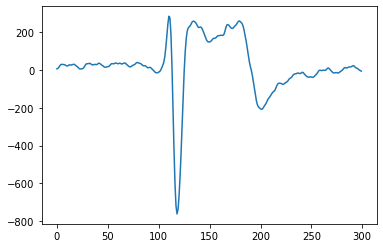

In [41]:
dt = "0 -6 -39 -148 -397 -820 -1367 -1893 -2230 -2276 -2060 -1724 -1439 -1305 -1310 -1364 -1374 -1304 -1175 -1039 -943 -898 -881 -854 -801 -728 -654 -589 -541 -505 -474 -436 -389 -344 -309 -282 -259 -238 -220 -205 -194 -187 -189 -196 -206 -217 -231 -247 -261 -276 -294 -313 -327 -334 -337 -341 -343 -343 -342 -342 -340 -332 -321 -311 -303 -294 -284 -273 -261 -246 -229 -216 -205 -194 -181 -170 -160 -148 -132 -118 -108 -101 -95 -91 -91 -89 -83 -75 -70 -69 -68 -67 -67 -66 -63 -59 -56 -53 -47 -38 -31 -28 -26 -24 -24 -26 -27 -24 -20 -20 -21 -19 -17 -18 -21 -23 -23 -25 -26 -24 -19 -15 -12 -6 0 3 3 4 8 12 12 12 13 13 10 9 12 16 16 13 9 6 3 2 4 8 10 10 14 20 25 28 31 36 36 33 30 31 32 31 31 34 37 34 28 21 16 12 10 13 17 19 21 25 32 37 38 40 43 45 44 44 46 46 42 38 38 38 37 35 35 37 37 36 37 40 43 46 52 57 58 55 51 51 49 45 43 43 41 37 35 37 39 38 32 26 21 16 13 14 17 20 23 28 36 44 53 71 102 146 203 264 306 293 198 24 -199 -428 -617 -734 -765 -726 -637 -517 -374 -221 -74 51 150 215 247 259 265 272 277 280 282 283 280 272 263 258 254 246 236 227 220 212 204 198 195 191 188 189 193 195 195 198 203 206 207 208 213 217 218 219 224 230 232 233 237 242 246 249 255 260 263 262 263 264 264 262 261 259 250 233 214 194 169 137 103 70 38 3 -31 -61 -87 -110 -130 -146 -157 -167 -173 -171 -165 -159 -153 -145 -134 -126 -119 -111 -100 -91 -86 -80 -71 -63 -60 -58 -55 -49 -46 -44 -42 -40 -40 -39 -35 -29 -23 -17 -10 -1 3 3 3 6 8 8 9 11 11 6 0 -3 -2 -2 -4 -5 -6 -10 -14 -15 -12 -9 -6 0 7 10 8 6 7 6 4 5 10 15 15 13 14 16 17 15 14 13 10 6 5 6 7 10 16 25 30 31 30 30 28 24 22 24 28 28 27 29 31 31 27 23 19 13 8 6 7 8 11 18 28 34 34 35 36 35 30 28 29 31 30 29 33 37 36 32 27 24 19 16 16 17 19 20 25 32 35 34 34 37 38 36 34 36 37 34 33 35 38 38 33 28 23 19 17 20 24 27 29 33 39 41 39 37 35 32 27 23 24 23 18 13 13 15 14 9 3 -2 -8 -13 -14 -13 -10 -7 1 13 26 42 72 121 183 245 286 278 193 27 -192 -418 -603 -721 -762 -737 -665 -561 -434 -289 -141 -8 95 166 207 224 230 236 247 257 260 258 254 246 235 227 227 229 226 216 202 188 173 160 152 150 150 152 158 165 169 169 171 177 182 183 184 185 185 184 189 205 226 240 242 238 231 224 221 223 229 235 240 249 257 261 258 253 246 232 208 180 151 117 80 46 20 -1 -28 -62 -99 -133 -163 -184 -195 -200 -205 -207 -205 -196 -188 -180 -170 -158 -149 -142 -134 -125 -117 -113 -108 -96 -82 -73 -69 -69 -70 -73 -75 -73 -69 -65 -62 -56 -48 -43 -40 -34 -26 -21 -20 -19 -16 -15 -17 -18 -15 -11 -13 -20 -26 -31 -35 -37 -37 -35 -36 -38 -37 -32 -26 -21 -14 -5 0 -1 -2 -1 0 -1 0 5 11 11 5 -1 -7 -12 -15 -14 -13 -13 -15 -14 -9 -5 -2 4 11 14 12 12 15 17 17 18 21 24 22 16 12 10 6 1 -2 -5 -9 -12 -10 -5 0 3 9 16 20 20 21 25 28 28 28 32 35 33 29 27 27 25 18 11 3 -5 -12 -14 -11 -8 -4 2 10 13 12 12 14 16 14 13 14 14 12 13 23 43 70 106 155 214 265 281 234 103 -106 -356 -588 -755 -835 -832 -765 -658 -531 -393 -246 -98 31 130 197 239 266 279 284 286 285 278 266 255 246 239 234 236 240 240 234 227 222 217 210 205 204 201 194 187 187 192 193 189 180 170 159 150 149 153 160 169 182 198 211 219 228 239 248 252 257 263 266 265 264 269 276 271 251 220 184 145 107 70 37 4 -24 -46 -63 -83 -104 -123 -138 -150 -163 -172 -177 -179 -181 -179 -169 -157 -149 -149 -150 -152 -152 -149 -142 -132 -123 -116 -105 -93 -83 -76 -68 -58 -51 -47 -44 -38 -34 -33 -32 -25 -18 -16 -20 -27 -36 -45 -52 -56 -56 -55 -52 -44 -34 -28 -26 -23 -19 -17 -18 -18 -16 -15 -19 -21 -17 -12 -11 -16 -21 -26 -31 -36 -37 -35 -31 -25 -14 -1 7 11 13 14 13 8 5 5 5 0 -3 -4 -4 -8 -14 -18 -20 -22 -25 -28 -30 -33 -35 -31 -22 -15 -10 -3 5 12 19 34 63 106 165 239 310 338 275 100 -166 -465 -724 -886 -932 -888 -794 -677 -546 -400 -243 -86 54 163 227 255 265 273 281 288 294 298 296 285 271 260 252 244 233 223 211 198 186 180 178 178 178 183 189 191 189 188 188 187 184 183 187 193 196 197 200 204 205 204 204 207 212 219 232 246 257 264 269 272 270 263 255 249 237 215 188 162 133 98 58 21 -11 -46 -82 -116 -147 -174 -194 -204 -207 -208 -207 -200 -190 -182 -176 -168 -158 -149 -143 -138 -130 -123 -120 -114 -100 -82 -68 -64 -65 -69 -74 -76 -72 -64 -57 -51 -42 -33 -26 -23 -19 -14 -11 -12 -12 -10 -9 -13 -17 -16 -14 -14 -18 -23 -27 -32 -36 -38 -37 -36 -34 -27 -18 -12 -11 -10 -7 -3 -2 -1 1 1 -2 -5 -3 2 5 4 3 2 1 -1 -3 -5 -7 -8 -5 1 4 3 2 2 1 -2 -5 -3 -1 -3 -5 -3 0 0 -6 -11 -15 -19 -23 -23 -23 -21 -15 -1 23 57 104 170 248 309 315 238 65 -184 -464 -709 -867 -922 -891 -800 -673 -528 -375 -220 -71 56 149 206 239 258 270 278 288 296 298 291 282 276 269 260 254 254 257 253 241 225 207 191 177 170 168 167 168 175 184 190 193 197 203 209 212 216 224 231 234 242 259 278 290 290 285 279 272 266 262 258 253 248 245 244 236 220 202 180 152 114 72 32 -7 -48 -82 -105 -121 -140 -162 -186 -206 -223 -233 -235 -232 -228 -223 -213 -200 -187 -177 -165 -151 -139 -131 -122 -111 -103 -97 -90 -77 -63 -56".split()
dt = np.array(dt, dtype='int')

plt.plot(dt[400:700])

In [42]:
from bokeh.plotting import figure, curdoc
from datetime import datetime
import random

plot = figure(plot_width = 1200, x_axis_type = 'datetime', tools = 'pan,box_select,crosshair,reset,save,wheel_zoom')
line = plot.line(x = 'time', y = 'value', line_color = 'black', source = dict(time = [datetime.now()], value = [random.randint(5, 10)]))

def update(): 
    line.data_source.stream()



In [43]:
fft(dt, 250)#plt.plot(dt[400:700])

[array([  0.19984013,   0.39968026,   0.59952038,   0.79936051,
          0.99920064,   1.19904077,   1.3988809 ,   1.59872102,
          1.79856115,   1.99840128,   2.19824141,   2.39808153,
          2.59792166,   2.79776179,   2.99760192,   3.19744205,
          3.39728217,   3.5971223 ,   3.79696243,   3.99680256,
          4.19664269,   4.39648281,   4.59632294,   4.79616307,
          4.9960032 ,   5.19584333,   5.39568345,   5.59552358,
          5.79536371,   5.99520384,   6.19504396,   6.39488409,
          6.59472422,   6.79456435,   6.99440448,   7.1942446 ,
          7.39408473,   7.59392486,   7.79376499,   7.99360512,
          8.19344524,   8.39328537,   8.5931255 ,   8.79296563,
          8.99280576,   9.19264588,   9.39248601,   9.59232614,
          9.79216627,   9.99200639,  10.19184652,  10.39168665,
         10.59152678,  10.79136691,  10.99120703,  11.19104716,
         11.39088729,  11.59072742,  11.79056755,  11.99040767,
         12.1902478 ,  12.39008793,  12.

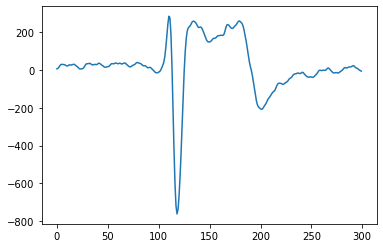

In [44]:
plt.plot(dt[400:700])

In [ ]:
{-2457, -1728, -1908, -2071, -2139, -1426, -1462, -1609, -1853,
       -1211, -1052, -1279, -1549, -1026,  -703, -1006, -1277,  -881,
        -386,  -750, -1014,  -780,  -140,  -499,  -760,  -689,     3,
        -249,  -522,  -634,    19,   -52,  -281,  -603,   -38,    78,
        -194,  -584,  -125,   108,  -221,  -604,  -269,   133,  -297,
        -637,  -454,   122,  -309,  -602,  -578,    61,  -253,  -520,
        -662,   -16,  -167,  -384,  -683,  -116,   -39,  -304,  -645,
        -166,    89,  -240,  -578,  -211,   215,  -190,  -500,  -276,
         310,  -108,  -383,  -328,   317,   -21,  -280,  -399,   242,
          77,  -151,  -441,   128,   172,   -95,  -444,    37,   255,
         -85,  -418,   -53,   365,   -51,  -366,  -142,   418,    -6,
        -306,  -255,   409,    56,  -222,  -327,   319,   127,  -104,
        -385,   188,   210,   -59,  -406,    85,   291,   -41,  -381,
          -2,   399,   -19,  -340,  -104,   456,    26,  -270,  -200,
         441,    77,  -192,  -282,   353,   159,   -73,  -352,   228,
         234,   -34,  -372,   128,   310,   -17,  -360,    28,   411,
           1,  -310,   -64,   476,    42,  -255,  -170,   463,    96,
        -180,  -257,   383,   175,   -60,  -330,   247,   235,   -24,
        -360,   144,   310,   -12,  -351,    51,   423,    11,  -310,
         -49,   486,    46,  -246,  -150,   483,   102,  -174,  -243,
         399,   164,   -68,  -322,   279,   248,    -1,  -342,   165,
         336,    15,  -325,    86,   439,    38,  -302,   -27,   499,
          52,  -251,  -144,   482,    97,  -189,  -240,   401,   172,
         -74,  -324,   277,   226,   -20,  -364,   156,   306,    -8,
        -354,    68,   407,    18,  -304,   -22,   510,   116,  -134,
          85,   803,   455,   -14,  -221,   229,  -250,  -671, -1015,
        -449,  -545,  -742,  -971,  -290,    21,  -153,  -375,   138,
         534,   194,  -105,   198,   703,   276,   -27,   101,   719,
         352,    28,    -9,   636,   393,   121,  -112,   486,   422,
         187,  -175,   347,   465,   186,  -189,   244,   539,   194,
        -166,   134,   629,   226,  -121,    33,   648,   298,   -41,
         -66,   599,   381,    87,  -130,   497,   440,   230,  -158,
         392,   531,   293,  -138,   294,   604,   310,  -116,   194,
         684,   305,  -106,    38,   654,   293,  -133,  -164,   466,
         225,  -133,  -380,   223,   130,  -133,  -510,    17,   116,
        -178,  -553,  -103,   174,  -165,  -526,  -195,   283,  -124,
        -449,  -277,   341,   -40,  -360,  -341,   324,    57,  -228,
        -403,   224,   143,   -96,  -432,   118,   228,   -60,  -424,
          36,   302,   -27,  -392,   -50,   414,    15,  -335,  -156,
         453,    62,  -260,  -242,   408,   136,  -169,  -335,   289,
         189,   -58,  -387,   165,   256,   -25,  -401,    66,   314,
         -16,  -375,   -31,   422,    11,  -329,  -137,   458,    48,
        -273,  -238,   418,   131,  -171,  -316,   310,   205,   -40,
        -373,   188,   279,    -4,  -381,    89,   323,    12,  -363,
         -10,   430,    40,  -312,  -105,   475,    74,  -259,  -221,
         445,   142,  -173,  -297,   339,   214,   -31,  -362,   208,
         278,     2,  -378,    97,   320,     8,  -362,     0,   434,
          38,  -316,   -97,   489,    77,  -258,  -209,   448,   146,
        -177,  -295,   355,   221,   -38,  -358,   217,   282,    11,
        -374,   111,   319,    31,  -355,    10,   431,    42,  -315,
         -92,   481,    88,  -260,  -199,   456,   152,  -179,  -288,
         363,   219,   -37,  -355,   221,   274,    12,  -377,   124,
         327,    32,  -354,    29,   434,    52,  -314,   -82,   487,
          67,  -268,  -199,   451,   140,  -207,  -306,   346,   200,
         -66,  -376,   204,   239,   -18,  -398,    98,   271,    -6,
        -386,     7,   398,    20,  -338,   -72,   538,   210,   -76,
         112,   793,   358,  -186,  -459,     3,  -399,  -741, -1057,
        -518,  -512,  -673,  -863,  -206,   115,   -89,  -331,   131,
         557,   209,  -139,   133,   693,   292,   -53,    44,   687,
         351,     1,   -77,   574,   417,   136,  -174,   418,   433,
         174,  -234,   270,   433,   176,  -235,   168,   542,   190,
        -204,    60,   621,   240,  -142,   -33,   621,   296,   -76,
        -132,   551,   433,   149,  -186,   436,   478,   257,  -202,
         329,   499,   305,  -182,   240,   638,   344,  -161,   122,
         723,   356,  -162,   -53,   640,   287,  -197,  -266,   401,
         228,  -115,  -459,   131,   110,  -147,  -574,   -56,    81,
        -193,  -603,  -176,   171,  -171,  -557,  -266,   275,  -120,
        -472,  -334,   322,   -40,  -381,  -404,   270,    82,  -200,
        -452,   171,   143,   -88,  -474,    60,   209,   -57,  -459,
         -21,   313,   -37,  -416,  -113,   410,     8,  -355,  -211,
         429,    78,  -286,  -310,   362,   155,  -148,  -394,   228,
         175,   -51,  -431,   104,   244,   -37,  -435,     9,   324,
         -18,  -398,   -85,   425,    26,  -335,  -188,   446,    76,
        -267,  -281,   386,   168,  -132,  -365,   266,   196,   -35,
        -411,   131,   270,   -15,  -414,    37,   341,     3,  -376,
         -60,   442,    36,  -331,  -162,   469,    90,  -253,  -258,
         408,   177,  -133,  -346,   286,   217,   -19,  -400,   148,
         274,    -7,  -410,    49,   337,    13,  -376,   -46,   439,
          42,  -324,  -143,   480,    91,  -253,  -237,   437,   177,
        -144,  -326,   316,   240,   -15,  -384,   172,   283,    -4,
        -408,    55,   322,     2,  -383,   -38,   427,    29,  -336,
        -143,   468,    79,  -269,  -244,   424,   150,  -188,  -335,
         317,   242,     0,  -340,   283,   462,   309,   -61,   408,
         477,   -66,  -690,  -559,  -260,  -766, -1115,  -940,  -280,
        -593,  -727,  -520,   270,    72,  -124,  -182,   514,   450,
         211,  -123,   454,   558,   292,  -144,   341,   561,   277,
        -153,   210,   649,   281,  -132,    76,   683,   302,  -102,
         -49,   634,   360,   -38,  -162,   504,   413,   149,  -236,
         347,   446,   185,  -270,   238,   455,   214,  -249,   147,
         604,   274,  -190,    59,   718,   358,  -114,   -25,   729,
         456,   -14,  -127,   613,   562,   226,  -237,   395,   506,
         232,  -337,   173,   346,    95,  -425,   -48,   352,   -29,
        -483,  -250,   336,   -73,  -486,  -406,   266,   -56,  -425,
        -504,   171,    37,  -244,  -555,    51,    91,  -156,  -554,
         -28,   145,  -104,  -513,  -104,   288,   -66,  -455,  -186,
         394,    -5,  -377,  -271,   405,    80,  -287,  -352,   324,
         170,  -113,  -420,   193,   202,   -49,  -455,    77,   217,
         -40,  -442,   -28,   344,   -12,  -406,  -128,   429,    28,
        -348,  -229,   435,    80,  -278,  -322,   351,   158,  -128,
        -403,   216,   200,   -38,  -438,    83,   254,   -25,  -425,
          13,   369,    23,  -371,   -80,   460,    57,  -326,  -196,
         459,   103,  -263,  -296,   376,   154,  -137,  -390,   233,
         196,   -33,  -428,   106,   253,   -29,  -432,    10,   342,
          -6,  -394,   -81,   443,    37,  -325,  -172,   490,   172,
        -153,  -103,   709,   677,   222,  -258,   133,  -233,  -712,
       -1149,  -646,  -588,  -919, -1159,  -558,   -85,  -325,  -493,
         -55,   533,   184,  -118,    72,   730,   376,     0,     5,
         686,   463,   135,  -104,   534,   477,   237,  -183,   372,
         498,   224,  -222,   239,   523,   216,  -216,   114,   629,
         244,  -183,    -1,   668,   290,  -130,  -110,   610,   359,
          20,  -194,   481,   438,   192,  -250,   343,   494,   272,
        -234,   268,   576,   376,  -200,   171,   745,   375,  -168,
          37,   788,   407,  -159,  -133,   643,   381,  -116,  -337,
         340,   268,   -58,  -513,    50,   153,  -140,  -603,  -121,
         117,  -175,  -603,  -242,   228,  -155,  -545,  -329,   306,
         -87,  -456,  -399,   296,    30,  -379,  -452,   216,   126,
        -127,  -490,   101,   203,   -70,  -487,    17,   248,   -35,
        -453,   -74,   380,     4,  -397,  -171,   448,    58,  -327,
        -268,   423,   134,  -243,  -359,   314,   185,   -78,  -432,
         161,   240,   -24,  -445,    57,   265,   -14,  -425,   -47,
         389,    12,  -382,  -162,   458,    65,  -322,  -246,   436,
         134,  -245,  -335,   334,   202,   -75,  -410,   196,   266,
          12,  -415,    97,   289,    21,  -400,   -11,   398,    26,
        -368,  -122,   464,    56,  -325,  -240,   444,   121,  -251,
        -327,   343,   188,   -86,  -412,   195,   238,   -21,  -428,
          92,   261,    -9,  -409,    -4,   400,    51,  -317,     2,
         686,   453,    53,    74,   582,   -52,  -658,  -937,  -410,
        -708,  -976, -1219,  -518,  -391,  -486,  -645,    12,   281,
          89,  -231,   226,   627,   295,  -107,   174,   755,   352,
         -52,    57,   744,   405,   -14,   -71,   618,   470,   162,
        -176,   446,   455,   214,  -239,   296,   448,   213,  -249,
         188,   566,   242,  -222,    75,   674,   295,  -170,   -26,
         705,   390,   -87,  -122,   640,   542,   169,  -193,   499,
         566,   342,  -227,   368,   557,   373,  -232,   238,   657,
         367,  -249,    54,   719,   305,  -298,  -179,   569,   183,
        -357,  -411,   301,   115,  -255,  -572,    60,    27,  -208,
        -645,   -98,    43,  -208,  -637,  -178,   158,  -163,  -572,
        -259,   286,   -96,  -486,  -324,   347,   -13,  -389,  -393,
         309,   113,  -199,  -454,   196,   146,   -77,  -491,    74}

In [46]:
import wave

samplerate = 250

#audio = np.array(lp(c, 55, 100, 250))
audio = np.array(ecgdata['val'], dtype=int)
plt.plot(audio)
# Convert to (little-endian) 16 bit integers.
#audio = (audio * (2 ** 15 - 1)).astype("<h")

with wave.open("sound1.wav", "w") as f:
    f.setnchannels(1)
    # 2 bytes per sample.
    f.setsampwidth(2)
    f.setframerate(samplerate)
    f.writeframes(audio.tobytes())

NameError: name 'ecgdata' is not defined

In [47]:
ecgs = "1602 1577 1602 1415 1292 1265 1342 1193 1056 1015 1107 1003 800 727 822 783 625 570 673 696 533 470 547 608 451 394 442 522 403 326 334 412 276 174 182 332 285 153 143 269 259 99 76 191 204 47 19 121 187 31 -1 71 152 34 -12 55 160 57 -22 3 141 121 2 19 151 135 -17 -44 73 100 -67 -57 36 109 -30 -42 34 121 -26 -42 14 130 38 -43 -25 109 75 -36 -47 83 95 -12 -19 89 150 41 94 251 370 220 43 -227 -548 -1053 -1373 -1498 -1380 -1323 -1209 -953 -535 -294 -212 -13 266 390 315 358 497 542 395 367 470 524 363 331 404 460 319 263 291 400 318 231 241 394 366 234 203 321 319 170 133 251 295 133 116 206 266 123 98 173 262 144 80 150 268 199 92 115 221 207 66 64 191 197 64 30 150 171 35 -7 80 115 -24 -67 -27 63 -58 -116 -95 21 -64 -164 -132 -3 -43 -160 -168 -42 -18 -152 -167 -37 0 -129 -138 -40 20 -89 -137 -63 44 -73 -111 -69 47 -4 -87 -56 70 26 -83 -92 38 63 -77 -86 41 72 -57 -93 19 90 -42 -89 -17 66 -29 -71 -40 76 3 -101 -73 58 46 -68 -86 58 67 -76 -83 34 70 -70 -94 12 84 -59 -78 -24 89 -15 -62 -21 87 14 -81 -49 89 63 -67 -76 59 76 -60 -77 36 79 -57 -79 33 102 -27 -57 9 103 -15 -76 -27 84 19 -56 -59 90 62 -76 -74 66 104 -38 -47 30 102 -56 -75 13 106 -47 -66 7 91 -12 -51 -22 123 58 -60 -52 77 58 -87 -85 46 66 -90 -114 26 74 -54 -57 33 102 -45 -73 8 95 -9 -75 -28 96 38 -62 -47 97 87 -30 8 179 264 159 164 228 10 -478 -893 -1119 -1241 -1420 -1366 -1140 -842 -692 -515 -248 57 150 159 236 440 455 336 340 479 502 353 343 426 443 278 248 341 403 265 209 265 347 229 166 187 316 225 160 129 248 248 106 98 228 252 104 82 191 237 114 84 171 244 113 78 140 234 128 78 105 220 166 52 51 187 155 22 -21 118 121 -34 -69 34 66 -82 -118 -27 20 -95 -140 -73 9 -84 -148 -117 27 -58 -141 -153 2 -16 -141 -153 -10 25 -108 -133 -12 96 -50 -79 5 71 -50 -86 -20 69 -23 -101 -65 66 12 -91 -85 76 44 -94 -95 36 62 -80 -92 23 83 -69 -94 4 75 -56 -98 -23 72 -26 -86 -52 72 19 -87 -82 66 47 -76 -97 50 78 -61 -76 25 85 -57 -90 1 82 -36 -99 -14 79 -7 -76 -43 77 38 -88 -40 76 66 -84 -99 57 82 -60 -63 37 144 -28 -38 38 101 -30 -70 -15 67 15 -95 -36 87 41 -68 -70 82 67 -74 -88 53 76 -54 -76 38 89 -46 -79 12 96 -33 -64 -4 103 10 -59 -27 80 60 -36 -41 92 77 -80 -92 39 62 -75 -89 14 65 -71 -86 3 91 -24 -74 -9 93 1 -75 -41 92 42 -63 -65 89 82 -60 -58 77 114 36 72 236 329 197 19 -214 -546 -1026 -1362 -1482 -1379 -1337 -1219 -937 -549 -320 -196 -19 263 370 302 332 480 529 386 364 462 505 357 332 408 461 325 259 320 397 304 219 248 351 309 176 189 314 293 155 134 260 281 133 125 228 273 140 92 153 264 156 100 160 268 177 105 126 270 219 101 94 222 219 74 50 172 192 35 -10 73 100 -38 -96 -24 82 -56 -123 -76 19 -71 -157 -134 -7 -51 -176 -173 -19 -16 -160 -170 -49 -6 -145 -154 -42 23 -115 -124 -37 52 -70 -121 -59 47 -13 -102 -77 60 23 -90 -88 29 75 -85 -75 50 73 -57 -79 22 58 -62 -100 -12 72 -34 -95 -44 77 -19 -84 -55 83 40 -90 -112 40 62 -66 -86 45 64 -75 -90 31 81 -50 -85 -4 65 -40 -74 -19 112 51 -32 -29 119 104 -18 -29 70 81 -78 -91 38 75 -55 -95 5 80 -56 -79 -15 72 -30 -85 -29 80 14 -75 -61 78 44 -86 -72 53 70 -72 -81 44 76 -70 -94 14 60 -58 -68 22 88 -18 -82 -17 94 27 -100 -54 80 53 -82 -76 81 76 -62 -52 36 110 -24 -45 48 112 -42 -84 -8 62 -52 -91 -41 77 8 -68 -47 73 67 -54 -66 68 81 -54 -82 40 93 -45 -70 26 100 -51 -64 22 144 60 77 165 331 281 17 -307 -555 -961 -1363 -1500 -1418 -1278 -1227 -989 -586 -289 -192 -19 220 375 310 341 422 535 427 369 399 517 446 330 325 451 419 277 263 372 374 219 209 320 335 196 167 247 315 173 132 208 295 173 110 159 277 231 144 144 268 229 95 96 236 249 114 104 216 253 113 62 169 235 88 38 101 188 72 12 20 96 36 -88 -81 35 -26 -145 -158 -26 -20 -143 -170 -41 -15 -165 -189 -74 18 -142 -165 -101 0 -100 -180 -110 21 -35 -116 -110 25 8 -115 -122 13 50 -93 -94 27 67 -72 -95 -4 61 -49 -95 -17 77 -34 -99 -60 73 23 -78 -77 69 63 -82 -92 45 62 -78 -94 21 65 -73 -82 16 83 -47 -91 -15 79 -14 -71 -49 85 3 -89 -69 73 53 -77 -76 65 131 -36 -77 42 73 -71 -113 11 97 -54 -74 -14 79 2 -80 -23 91 37 -91 -40 57 93 -75 -89 56 84 -70 -90 38 118 -64 -87 15 97 -43 -94 -3 86 9 -59 -38 81 37 -69 -57 106 100 -28 -40 78 92 -46 -44 44 92 -58 -76 14 86 -44 -82 -21 90 0 -71 -36 85 36 -59 -59 75 89 -56 -47 68 120 -33 -45 44 90 -46 -86 7 84 -39 -113 -11 62 -19 -85 -55 79 29 -59 -48 94 95 -45 -66 54 99 -57 -60 51 125 -20 -63 68 162 70 95 209 348 248 -21 -335 -630 -1021 -1442 -1448 -1371 -1267 -1180 -917 -537 -229 -166 -3 242 408 329 344 470 545 421 377 428 516 423 333 352 452 389 272 262 390 372 213 208 317 342 203 178 268 319 171 147 224 276 168 113 167 258 170 97 133 258 216 118 110 253 250 114 108 234 247 95 78 180 234 94 59 134 190 57 -12 39 124 25 -75 -69 42 -10 -131 -136 -7 -8 -152 -174 -22 11 -123 -146 -53 14 -135 -169 -75 1 -99 -142 -79 26 -52 -128 -90 27 -13 -114 -96 52 42 -82 -86 38 61 -73 -85 23 73 -60 -92 -4 76 -41 -79 -38 82 -5 -87 @58 108 64 -32 35 81 76 -25 19 68 80 -5 -42 -3 37 -4 -32 12 61 19 -42 17 74 37 -56 23 97 54 -45 2 58 57 -68 -38 29 62 -22 -30 19 60 -10 -57 12 45 -6 -78 -32 60 46 -75 -18 48 38 -68 -15 51 44 -69 -16 23 58 -1 -17 29 69 18 -45 0 64 21 -79 4 51 15 -98 -4 64 31 -103 -16 25 34 -59 -28 9 45 -28 -33 1 58 4 -17 15 58 6 -66 5 70 79 -23 99 203 233 227 362 499 454 230 109 9 -54 -162 -218 -120 -33 -59 -96 -28 34 -10 -90 -37 38 -3 -98 -28 37 19 -90 -25 39 32 -48 -7 41 79 10 8 32 78 42 -19 36 97 56 -25 46 92 71 -46 40 95 94 -6 43 101 115 15 38 81 111 61 40 75 143 83 43 74 138 82 19 71 124 96 -4 49 85 68 -38 -4 37 46 -63 -65 -12 16 -70 -96 -49 -1 -52 -103 -58 12 -23 -97 -34 28 -9 -95 -40 24 13 -100 -37 19 22 -50 -32 22 53 -33 -35 7 54 5 -60 0 63 13 -72 -15 56 26 -75 -18 58 29 -64 -9 46 51 -46 -24 29 67 12 -8 35 92 58 -32 38 82 48 -39 20 54 46 -57 38 98 82 -38 33 91 96 18 3 68 92 24 1 19 96 53 10 39 104 59 -19 26 106 73 -22 46 93 85 -38 -16 79 88 -11 31 59 101 34 4 67 127 81 15 62 102 90 -20 38 97 101 -18 50 114 91 0 52 89 120 36 28 76 122 54 0 48 102 51 -20 22 97 55 -23 35 95 86 -23 39 108 90 -12 29 88 96 14 35 68 101 45 8 58 106 59 16 88 206 233 212 372 554 632 498 420 323 151 -89 -126 -112 -79 -128 -102 -51 16 -40 -76 -28 31 -8 -74 -26 34 7 -94 -33 40 26 -78 -28 34 36 -70 -16 30 52 -37 -22 8 64 15 -34 8 56 23 -51 5 73 39 -39 23 80 59 -38 12 73 70 -26 19 59 80 0 4 47 96 40 5 30 99 33 -32 18 71 21 -73 -22 38 -14 -117 -68 -37 -46 -144 -110 -71 -36 -157 -136 -123 -67 -133 -169 -135 -72 -111 -171 -119 -62 -59 -151 -91 -21 -47 -157 -94 -38 -30 -139 -115 -60 -38 -108 -102 -64 -11 -88 -127 -77 -19 -75 -138 -79 -17 -39 -141 -60 -3 -28 -139 -83 -10 -6 -112 -78 -26 0 -87 -76 -55 7 -68 -93 -57 17 -30 -107 -53 12 -16 -102 -43 22 -8 -105 -58 24 2 -85 -46 -4 3 -43 -66 2 33 -29 -77 -40 49 -2 -83 -12 34 36 -65 4 59 35 -60 -13 37 15 -30 -26 27 53 -7 -23 8 68 0 -41 8 63 33 -41 3 67 41 -57 1 66 53 -59 17 61 58 -53 -11 39 62 2 13 34 60 9 -29 10 70 19 -38 6 51 25 -73 -14 53 42 -64 -24 43 41 -58 -33 20 41 -16 -32 18 67 16 -37 13 73 29 -46 0 73 46 -16 107 221 282 273 428 556 515 301 148 32 -54 -180 -192 -137 -54 -88 -116 -62 -4 -40 -104 -72 6 -17 -121 -50 29 19 -106 -51 16 16 -80 -53 0 38 -26 -38 14 63 9 -28 5 75 34 -37 24 79 63 -30 23 52 67 -18 21 75 93 -2 33 72 120 45 40 68 114 74 33 56 136 98 13 60 122 67 -26 26 74 87 -52 -7 32 20 -78 -68 -19 0 -95 -101 -107 -27 -83 -132 -93 -37 -77 -147 -76 -19 -38 -142 -43 6 -10 -117 -74 -17 -8 -82 -64 -19 24 -49 -70 -33 9 -9 -80 -14 44 0 -76 -21 37 -11 -93 -48 19 0 -81 -38 8 31 -74 -41 8 57 -23 -49 -35 33 8 -45 -19 54 2 -61 -18 66 26 -72 -9 50 30 -64 -7 61 127 -29 9 38 81 18 2 38 72 21 -46 -14 59 36 -43 -7 54 35 -66 -6 48 36 -60 -3 44 52 -28 -17 30 62 -4 -30 26 62 0 -46 6 72 38 -50 -3 61 39 -60 11 68 42 -43 1 58 71 -13 -12 38 68 7 -21 7 73 19 -22 22 89 60 -13 26 82 61 -41 15 75 58 -57 -2 49 57 -24 -13 21 59 -1 -29 -2 51 14 -47 -5 54 29 -52 0 67 41 -60 -11 56 43 -61 -18 47 75 22 63 167 276 323 399 508 525 342 115 -9 -49 -136 -225 -149 -49 -56 -149 -85 -33 -33 -130 -84 -29 -5 -70 -76 -57 10 -48 -65 -28 21 -24 -78 -32 36 24 -104 -25 51 37 -69 -9 56 73 -52 -9 43 44 7 3 36 83 1 -21 11 80 36 -15 38 100 59 -19 25 107 76 -20 38 92 85 -2 50 79 72 -2 -17 31 51 -37 -76 -38 4 -48 -108 -78 -23 -76 -171 -116 -46 -55 -189 -128 -83 -84 -179 -148 -88 -46 -139 -114 -79 -28 -88 -122 -90 -24 -60 -124 -59 0 -36 -127 -67 -9 -27 -125 -61 -3 -4 -122 -83 -38 -2 -82 -75 -33 11 -49 -93 -67 -12 -50 -114 -71 -5 -37 -126 -64 2 -22 -127 -75 -8 -28 -122 -71 -38 -1 -106 -102 -64 -14 -57 -109 -59 23 -3 -99 -52 0 -38 -121 -91 -1 -32 -132 -62 -3 -17 -89 -66 -10 3 -81 -95 -18 -9 -33 -98 -83 -7 -42 -110 -76 -9 0 -133 -86 -4 -18 -135 -89 -20 -19 -95 -76 -44 -3 -77 -81 -40 51 -31 -73 -28 26 -35 -94 -42 18 -15 -104 -54 2 -20 -124 -66 -19 0 -100 -70 -17 11 -66 -67 -37 12 -32 -77 -28 25 -7 -76 -28 44 -4 -88 -42 38 -5 -80 -31 28 10 -92 -53 -10 26 -51 -67 -27 38 -26 -73 -48 16 12 -89 -27 38 -13 -80 -55 55 0 -84 -27 31 60 -14 66 186 286 321 419 498 476 285 96 -15 -58 -144 -220 -147 -62 -70 -147 -96 -8 -27 -133 -53 -2 4 -84 -59 3 23 -59 -52 -23 38 -10 -61 -17 40 0 -53 -3 38 36 -74 -3 51 41 -58 -6 28 81 -34 -5 44 86 23 9 26 97 51 11 55 110 76 -7 39 114 93 12 76 127 117 18 42 101 97 -15 11 50 54 -8 -34 -8 33 -6 -95 -73 -2 -36 -120 -112 -38 -57 -158 -106 -48 -57 -151 -102 -38 -32 -133 -93 -51 -15 -99 -99 -57 7 -34 -79 -25 26 -15 -82 -22 26 -6 -93 -43 27 15 -79 -35 3 20 -66 -39 @854 864 867 727 700 689 718 592 551 540 593 505 404 384 445 391 309 296 355 355 251 241 286 319 193 209 245 285 172 177 193 219 97 75 91 167 105 61 74 138 110 29 41 114 91 -4 18 95 97 -19 12 60 85 -21 -8 51 107 -3 6 21 103 65 3 41 98 80 -14 -7 63 57 -58 -13 43 62 -44 -22 36 63 -65 -10 17 71 -27 -22 0 77 13 -25 0 62 40 1 6 69 60 -11 47 144 206 102 134 114 49 -142 -204 -231 -246 -389 -427 -407 -293 -284 -242 -107 36 123 85 131 210 223 118 163 212 232 134 155 197 221 100 142 172 218 135 129 152 249 205 188 151 215 192 94 118 186 198 92 111 168 186 80 115 160 198 89 94 137 223 114 108 112 183 147 94 88 190 147 77 59 145 136 34 42 105 116 -4 0 35 72 -34 -39 -11 44 -52 -78 -48 12 -45 -115 -91 -15 -38 -104 -98 -16 -18 -99 -69 -3 -16 -97 -88 -28 17 -99 -81 -45 9 -43 -58 -23 49 -18 -58 -48 24 13 -63 -39 30 19 -70 -53 17 37 -65 -62 9 28 -61 -46 -15 53 -38 -68 -42 39 -2 -48 -42 40 19 -73 -44 32 31 -73 -40 21 39 -64 -29 19 46 -55 -39 11 48 -26 -43 -22 57 11 -44 -37 54 29 -50 -22 43 38 -43 -42 39 69 -39 -14 30 72 -36 -35 5 60 -17 -18 -14 69 16 -39 -16 47 58 -20 0 52 65 -35 -20 47 91 -27 0 66 89 1 28 57 124 44 0 41 105 61 -19 1 74 57 -46 -48 58 52 -33 -18 47 63 -66 -29 40 83 -31 -28 9 75 8 -34 1 69 56 -16 11 132 125 65 114 215 181 31 -54 -69 -111 -313 -349 -332 -332 -395 -346 -225 -74 -44 -6 53 181 161 104 129 201 209 126 143 194 215 82 100 161 197 83 106 136 200 69 90 110 182 95 78 91 170 140 73 100 164 166 55 85 159 170 76 103 163 186 77 87 150 173 86 95 123 173 95 71 75 159 114 41 29 122 97 -10 4 70 59 -42 -45 14 13 -81 -60 -17 9 -87 -88 -62 27 -83 -101 -107 1 -56 -112 -111 -17 -25 -101 -91 -12 57 -58 -49 0 30 -68 -57 -13 39 -66 -69 -33 41 -37 -68 -46 41 -10 -86 -63 19 13 -73 -53 6 34 -77 -54 7 29 -74 -60 -5 46 -55 -48 -13 44 -13 -65 -39 39 -4 -56 -47 53 40 -47 -38 30 28 -53 -52 15 45 -58 -59 11 49 -30 -40 1 39 0 -45 -5 57 33 -62 -55 47 45 -48 -27 41 100 -33 -6 44 59 -31 -24 6 35 -11 -50 4 58 9 -26 -33 65 24 -51 -30 29 36 -53 -38 39 45 -59 -33 3 44 -50 -17 16 62 -25 -28 19 68 20 -1 6 71 44 -19 -21 57 49 -20 -31 25 41 -65 -30 31 67 -44 -29 23 52 -34 -43 2 49 -2 -39 -6 64 32 -36 -16 58 71 -11 22 140 171 105 118 115 60 -161 -237 -262 -275 -418 -461 -437 -301 -301 -233 -112 55 87 64 107 195 210 124 114 195 217 100 123 204 213 102 102 156 192 94 90 123 187 136 68 112 183 149 58 80 174 162 72 85 150 171 71 81 113 165 77 95 127 177 90 85 104 186 126 86 87 157 140 74 58 130 133 29 37 85 87 -27 -26 29 65 -48 -50 -18 19 -70 -103 -70 -18 -86 -127 -129 -26 -71 -137 -127 -54 -55 -150 -114 -30 -30 -141 -93 -33 8 -112 -93 -46 11 -55 -72 -59 12 -38 -81 -54 -1 16 -77 -44 35 27 -63 -41 12 11 -78 -68 -5 29 -68 -64 -27 40 -61 -57 -24 47 -17 -63 -70 17 11 -59 -53 36 24 -71 -57 22 35 -57 -38 8 30 -66 -50 12 85 7 -10 4 77 47 -36 2 66 35 -57 -53 38 38 -62 -66 14 38 -63 -49 -4 29 -47 -33 9 43 -32 -35 -20 57 -5 -50 -28 40 33 -52 -35 44 44 -57 -53 16 48 -57 -30 22 57 -35 -29 2 75 -11 -47 -10 52 20 -49 -27 48 31 -36 -22 74 63 -20 -1 58 69 -29 -22 22 53 -61 -50 0 48 -22 -43 -9 57 9 -49 -36 46 30 -53 -32 35 35 -54 -37 28 54 -54 -27 24 82 -20 26 91 181 148 93 56 49 -75 -228 -290 -275 -342 -455 -448 -335 -244 -231 -110 38 112 57 96 153 201 119 119 164 207 149 114 121 201 145 96 102 182 135 69 90 172 157 60 82 140 169 40 60 134 168 65 56 107 176 111 92 96 176 116 55 71 165 147 66 88 152 150 60 55 130 144 40 49 95 122 26 38 47 90 13 -44 -17 38 -20 -95 -87 -27 -38 -102 -103 -22 -48 -161 -137 -55 -9 -150 -124 -84 -36 -130 -157 -80 -11 -74 -91 -86 -6 -54 -106 -101 -13 1 -95 -71 11 9 -89 -101 2 3 -88 -60 -10 31 -75 -56 -52 41 -35 -68 -51 52 -12 -77 -66 0 10 -80 -76 8 6 -81 -56 12 31 -76 -71 -10 29 -63 -43 -25 49 -37 -67 -58 32 -1 -72 -49 49 61 -63 -36 23 27 -77 -76 8 24 -74 -47 7 37 -38 -48 -1 57 -12 -50 0 38 42 -52 -57 41 35 -53 -55 34 82 -66 -48 26 51 -63 -57 10 43 -22 -32 -14 45 -18 -43 -27 75 47 -31 -6 63 39 -41 -21 38 39 -67 -46 18 48 -62 -41 -3 53 -38 -39 -3 49 -16 -50 -34 38 21 -45 -13 54 53 -46 -25 54 42 -48 -40 27 53 -50 -44 12 40 -50 -55 -9 60 -9 -49 -26 51 13 -46 -51 31 43 -49 -31 45 56 -57 -29 43 57 -11 28 101 174 111 89 53 32 -108 -231 -297 -277 -355 -424 -414 -309 -214 -215 -97 39 122 49 97 177 216 111 111 171 212 118 114 150 204 122 78 90 180 147 65 82 159 150 81 87 151 154 54 71 122 145 52 69 113 153 95 53 107 161 100 74 86 177 150 65 83 168 136 57 68 142 149 50 60 133 115 19 17 66 105 -11 -32 -13 46 -23 -77 -64 7 -32 -111 -95 -12 -16 -108 -111 -42 -28 -137 -133 -68 -62 -125 -112 -88 -17 -97 -94 -66 -4 -75 -107 -74 27 -17 -91 -63 28 6 -86 -57 14 22 -82 -66 -3 32 -79 -56 -14 36 -40 -64@ 19 84 199 95 11 56 164 114 6 4 127 140 -10 -25 94 118 -58 -71 36 82 -93 -95 12 68 -64 -87 -16 68 -24 -87 -38 64 13 -85 -59 67 60 -75 -74 58 66 -57 -73 50 85 -52 -74 41 82 -42 -73 -3 87 6 -64 -23 117 91 -8 -6 95 88 -41 -51 64 94 -36 -51 36 76 -65 -92 15 68 -36 -75 -13 41 -4 -81 -41 63 26 -67 -49 60 62 -30 -16 153 219 149 142 196 -39 -537 -940 -1166 -1341 -1493 -1422 -1244 -919 -698 -491 -217 84 180 190 286 451 476 367 381 482 499 357 357 432 447 309 286 357 392 286 239 294 344 283 191 222 302 258 170 178 265 266 131 147 248 245 133 135 217 239 123 128 213 285 190 157 213 273 204 125 154 244 196 107 118 202 190 66 58 143 140 2 -17 52 63 -69 -91 -37 -1 -113 -143 -95 -47 -116 -170 -133 -41 -77 -164 -157 -58 -37 -152 -143 -32 -18 -133 -122 -29 10 -105 -113 -23 29 -71 -93 -33 42 -33 -90 -51 42 14 -91 -66 37 20 -82 -72 20 32 -89 -84 3 42 -79 -74 0 46 -58 -82 -20 41 -19 -76 -67 42 23 -50 -65 36 46 -60 -61 40 47 -74 -58 28 56 -46 -72 14 59 -39 -61 -5 68 4 -52 -30 64 37 -47 -48 52 58 -58 -51 43 59 -63 -50 34 63 -49 -52 27 77 -14 -60 -1 67 13 -57 -8 78 44 -57 -41 57 58 -64 -52 41 74 -59 -47 45 64 -36 -45 13 75 -24 -57 2 75 29 -35 -16 107 65 -54 -39 62 51 -57 -52 55 66 -49 -46 45 92 -19 -26 36 67 -31 -76 -28 53 6 -80 -61 49 36 -70 -53 56 68 -51 -43 53 68 -53 -46 31 74 -42 -50 32 87 7 -12 66 207 220 178 220 214 -111 -597 -981 -1195 -1385 -1468 -1378 -1110 -856 -696 -450 -131 91 120 217 348 450 408 366 414 485 473 351 370 449 420 291 298 382 371 249 242 320 336 197 203 274 297 178 148 214 270 173 122 168 243 207 114 130 224 212 97 120 214 228 106 116 208 232 110 107 187 233 102 93 143 211 104 50 63 149 52 -15 -20 72 35 -96 -82 2 -1 -118 -133 -43 -18 -144 -160 -70 -27 -141 -154 -80 -20 -82 -149 -99 3 -31 -121 -98 10 10 -95 -88 13 26 -89 -73 17 46 -76 -74 8 53 -64 -76 -23 45 -19 -82 -44 53 4 -79 -69 38 33 -84 -67 32 49 -70 -72 19 46 -63 -68 14 56 -59 -63 -6 66 3 -62 -28 68 26 -80 -45 54 50 -57 -69 51 68 -51 -67 57 64 -40 -50 29 76 -28 -52 5 70 1 -36 -28 64 41 -67 -45 75 95 -25 -34 64 62 -50 -49 46 71 -47 -53 42 64 -38 -52 -3 66 6 -62 -34 72 35 -61 -44 59 56 -49 -46 50 67 -53 -43 41 67 -48 -45 32 80 -26 -49 7 86 18 -37 -6 92 64 -43 -44 24 34 -84 -57 38 49 -76 -57 36 77 -45 -38 36 71 -18 -52 -12 74 16 -59 -20 69 47 -48 -20 83 126 46 143 271 336 158 -53 -327 -715 -1178 -1439 -1479 -1360 -1290 -1098 -792 -469 -257 -101 77 299 361 312 360 486 495 391 391 458 473 339 339 404 425 301 278 328 374 269 227 248 320 266 185 188 273 276 157 169 244 248 132 134 223 241 115 119 210 235 137 116 183 247 156 120 166 245 189 99 114 220 201 78 87 172 173 26 18 107 139 -6 -23 30 45 -81 -142 -58 -7 -98 -164 -108 -31 -75 -166 -151 -53 -77 -161 -145 -39 -20 -144 -146 -56 -9 -112 -112 -10 18 -82 -87 -27 61 -37 -99 -41 46 -5 -77 -55 50 37 -75 -75 39 41 -72 -60 21 61 -69 -77 14 51 -63 -60 -5 60 -30 -75 -33 53 10 -69 -50 47 37 -77 -59 51 54 -77 -55 38 63 -40 -69 16 58 -50 -68 7 65 -11 -57 -21 80 25 -64 -44 53 46 -60 -45 44 72 -54 -53 38 68 -46 -54 36 74 -32 -60 11 75 -2 -63 -23 75 30 -74 -38 72 71 -55 -42 62 55 -48 -40 59 74 -38 -40 39 87 -29 -46 8 100 9 -44 -26 77 39 -44 -35 65 56 -51 -34 62 71 -43 -38 59 95 -35 -50 28 78 -35 -54 21 60 -15 -76 -39 56 11 -54 -40 62 59 -63 -45 49 57 -47 -61 50 63 -49 -50 25 108 57 79 199 307 272 124 -145 -429 -870 -1289 -1491 -1430 -1331 -1261 -1019 -652 -375 -245 -46 194 320 286 342 426 510 410 391 423 490 419 335 356 430 399 291 284 374 371 228 232 315 296 204 179 263 290 158 162 218 270 175 148 188 246 190 112 142 237 224 103 134 221 229 115 124 219 249 112 113 189 226 66 91 149 174 67 26 57 110 28 -48 -51 35 -15 -118 -115 -23 -29 -150 -146 -54 -43 -150 -152 -56 -28 -126 -148 -95 -23 -101 -127 -84 -2 -51 -121 -89 14 2 -92 -80 23 25 -86 -74 25 40 -72 -75 18 56 -69 -79 -10 54 -38 -68 -27 84 56 -24 -18 72 45 -78 -59 41 40 -65 -72 21 39 -78 -77 5 49 -57 -76 -14 50 -31 -64 -29 54 19 -72 -56 46 37 -69 -57 44 46 -72 -52 41 57 -55 -63 12 62 -48 -59 -4 69 -11 -69 -25 61 18 -63 -46 53 49 -29 -49 36 66 -63 -51 47 61 -54 -50 30 62 -49 -50 7 73 -7 -63 -35 89 71 -24 -17 69 50 -57 -41 56 58 -57 -51 39 70 -61 -50 46 77 -23 -38 -1 52 -26 -82 -45 49 11 -95 -63 38 38 -70 -49 38 29 -60 -59 37 38 -57 -63 23 69 -40 -54 6 87 38 19 119 266 296 185 40 -192 -605 -1106 -1387 -1437 -1365 -1302 -1212 -864 -561 -416 -197 56 235 240 290 380 472 417 357 394 475 423 349 325 413 394 275 259 359 348 223 219 294 305 195 196 231 284 171 144 194 245 183 120 131 228 203 86 109 206 210 95 132 199 218 100 118 198 218 114 102 167 212 108 71 115 175 104 22 40 114 57 -55 -73 17 2 -134 -126 -40 -27 -167 -158 -74 -50 -171 -170 -90 -39 -132 -187 -120 -28 -86 -157 -134 -19 -26 -140 -124 -4 27 -89 -75 9 22 -104 -97 8 31 -95 -95 -14 50 -57 -91 -35 34 -12 -90 -61 45 12 -97 -82 22 23 -91 @642 667 627 492 497 539 516 399 399 419 427 357 287 325 363 279 174 243 295 239 114 174 250 189 62 140 196 175 67 100 147 152 73 43 115 151 84 22 82 136 73 -3 66 123 74 -32 40 137 70 -42 23 104 79 -17 43 95 108 26 41 86 101 27 -3 57 97 46 -44 33 81 23 -79 50 85 21 -50 -14 59 33 -59 -50 21 28 -70 -48 15 46 -16 -70 10 57 -5 -63 44 152 160 144 294 475 526 439 388 280 70 -140 -176 -113 -98 -151 -111 -52 -15 -57 -105 -7 16 -38 -122 -24 43 -19 -108 -7 57 7 -102 -12 67 23 -50 -5 63 19 -26 -11 57 96 11 -25 62 100 23 -18 65 119 42 -42 62 139 98 -18 72 133 93 8 67 104 98 24 32 103 112 54 11 91 130 34 -28 78 151 43 -46 38 97 19 -88 -10 56 1 -112 -52 9 -18 -109 -93 -41 -35 -82 -118 -33 -1 -57 -148 -43 19 -48 -152 -47 31 -20 -128 -40 29 -5 -117 -47 16 10 -59 -62 0 36 -55 -96 -5 44 -29 -107 -4 47 -22 -116 -4 59 4 -102 -13 70 19 -88 -28 27 33 -52 -18 13 42 -24 -71 14 60 -18 -88 10 63 -6 -96 5 72 11 -92 -5 60 24 -70 -9 48 47 -39 -53 27 56 -6 -69 33 74 -16 -82 21 84 11 -88 19 89 32 -83 -3 68 28 -56 -1 49 60 -17 -30 39 59 -13 -64 23 78 1 -78 33 88 6 -78 25 86 27 -75 6 66 30 -54 -8 58 57 -11 -29 38 95 -12 -57 24 74 0 -72 34 103 29 -73 25 97 27 -66 5 79 38 -32 -22 47 41 -39 -61 31 69 -14 -71 34 76 -3 -74 25 91 13 -92 18 86 27 -74 0 67 29 -65 4 106 171 143 193 354 498 458 368 337 247 38 -151 -120 -72 -120 -187 -70 16 -36 -114 -46 10 -15 -61 -50 28 26 -44 -64 4 39 -35 -81 12 71 1 -85 13 91 17 -77 4 92 42 -26 9 81 66 -9 9 67 79 15 -14 58 105 35 -14 72 130 53 -23 71 133 82 -31 57 123 79 -16 50 109 91 -20 17 76 91 5 -27 39 67 -11 -68 -2 50 -31 -126 -48 19 -38 -125 -67 8 -37 -121 -86 -19 -21 -105 -94 -7 5 -66 -91 -16 24 -57 -108 -14 38 -37 -127 -23 49 -13 -119 -29 36 1 -87 -26 31 22 -62 -53 12 27 -41 -75 4 47 -26 -89 9 62 -34 -105 -6 56 -2 -103 -18 46 6 -73 -15 41 27 -40 -39 24 30 -31 -70 -2 60 -3 -82 21 75 -4 -94 1 82 28 -90 -8 59 23 -69 -13 46 37 -30 -42 34 65 -6 -57 35 72 -1 -84 22 82 10 -83 11 93 39 -85 -2 81 23 -71 -12 40 45 -71 -55 34 55 -19 -67 23 75 -6 -81 23 90 7 -80 18 89 24 -82 17 71 37 -51 0 60 67 -14 -14 54 50 18 -28 29 101 -7 -86 18 69 -1 -92 9 76 6 -115 -7 62 19 -66 -28 50 64 -31 -48 36 58 -11 -72 34 79 34 -17 149 277 276 290 460 529 384 151 76 13 -87 -214 -169 -71 -42 -107 -104 -30 5 -59 -92 -14 21 -41 -101 -9 64 -13 -93 -11 57 18 -85 -16 41 33 -46 -19 56 62 -7 9 50 80 19 -38 44 87 14 -51 56 114 50 -40 48 124 68 -22 51 115 92 1 29 97 100 22 3 88 107 48 -16 66 124 51 -38 63 103 22 -69 -4 57 -2 -131 -57 6 -18 -103 -95 -36 -25 -104 -142 -52 -7 -88 -147 -50 0 -68 -151 -40 25 -41 -142 -48 26 -26 -118 -46 20 0 -89 -77 9 25 -73 -76 10 42 -37 -99 4 54 -27 -117 -17 57 -14 -125 -14 50 9 -107 -42 30 12 -70 -47 30 44 -6 -74 18 48 -28 -98 10 72 -19 -108 11 79 -1 -93 -17 77 20 -77 -19 48 44 -37 -41 38 47 -18 -51 38 62 -9 -72 14 63 21 -84 15 90 31 -88 -9 81 33 -59 -13 56 52 -37 -45 41 65 -19 -44 31 76 -32 -66 43 93 15 -79 45 96 34 -70 6 79 61 -59 -13 61 47 -27 -22 38 66 -19 -34 47 76 6 -51 42 101 32 -76 28 99 31 -71 15 84 35 -65 -36 57 46 -62 -33 46 68 -22 -57 29 68 -14 -76 10 87 6 -83 17 78 26 -75 15 83 64 -19 87 202 274 274 367 516 494 314 132 61 -10 -151 -228 -105 -14 -59 -155 -40 41 -13 -120 -34 37 6 -84 -41 23 36 -40 -47 24 57 -11 -49 29 78 -11 -68 28 95 20 -56 37 98 40 -51 29 100 62 -17 8 73 76 18 5 79 114 40 -9 78 126 57 -12 71 133 69 -22 72 132 71 -22 48 114 78 14 14 65 70 -18 -40 19 36 -42 -98 -20 17 -65 -136 -52 28 -64 -154 -67 -7 -64 -153 -71 -28 -34 -129 -106 -19 -11 -96 -102 -7 27 -57 -111 -7 39 -27 -114 -24 57 -14 -116 -18 46 -1 -106 -37 43 27 -65 -46 29 51 -49 -76 8 46 -44 -76 -6 47 -38 -111 -6 57 -2 -101 -27 61 22 -90 -21 56 32 -45 -24 33 46 -34 -52 31 60 -22 -80 19 81 16 -84 15 73 12 -90 -5 74 25 -69 -19 37 48 -56 -27 43 59 -26 -14 23 52 -5 -78 28 80 -9 -85 0 78 7 -104 -8 76 32 -72 -24 47 45 -37 -20 46 52 -34 -53 35 68 -19 -74 22 76 0 -90 7 97 21 -85 7 80 39 -60 -9 67 54 -33 -48 34 48 -19 -58 8 62 -18 -86 3 73 -6 -97 -6 74 -5 -105 -15 61 15 -65 -31 23 37 -8 10 125 222 211 262 442 530 377 176 130 56 -121 -256 -163 -75 -116 -189 -88 0 -49 -136 -100 -32 -27 -89 -78 -19 14 -58 -100 -24 48 -42 -101 -11 47 -25 -114 -20 65 1 -99 -16 54 13 -71 -32 38 47 -43 -46 49 66 -19 -47 65 76 4 -56 44 108 33 -57 52 108 38 -54 -9 105 60 -35 -17 60 57 -38 -38 0 46 -37 -95 -10 17 -64 -154 -57 -2 -89 -191 -92 -37 -91 -187 -139 -60 -85 -176 -149 -76 -63 -132 -144 -77 -50 -96 -151 -64 -16 -95 -161 -59 16 -69 -168 -70 18 -28 -152 -81 -40 -41 -110 -89 -11 -15 -97 -109 -28 1 -77 -131 @217 272 329 224 164 217 275 194 153 146 213 197 101 77 160 127 30 41 108 112 -16 8 88 98 -22 7 58 85 11 -11 19 93 16 -19 6 94 65 -31 -1 72 60 -25 -26 76 76 -39 -15 72 69 -43 -14 44 84 3 1 31 132 88 39 50 116 96 6 29 87 102 -14 11 52 49 -49 -55 41 39 -52 -43 8 51 -27 -56 -19 42 -8 -45 -25 45 33 -34 -17 98 108 65 136 210 171 -47 -160 -227 -332 -516 -557 -533 -493 -488 -380 -226 -57 -11 35 120 223 218 154 191 246 250 165 185 239 235 129 159 218 219 120 142 187 209 141 115 155 186 136 113 143 180 166 96 119 179 155 91 118 167 169 82 114 175 203 115 139 161 190 123 94 131 163 114 81 102 140 112 41 76 102 76 -3 55 63 49 -64 -30 4 -5 -95 -72 -39 -20 -100 -103 -83 -33 -91 -118 -106 -75 -70 -133 -104 -42 -44 -119 -94 -36 -19 -151 -77 -19 1 -83 -60 -18 -20 -67 -57 -32 15 -33 -64 -42 16 -22 -72 -51 18 -3 -90 -42 -11 -1 -86 -50 4 14 -84 -72 4 15 -61 -57 -19 19 0 -30 -31 17 1 -60 -24 25 17 -76 -37 14 24 -73 -37 21 26 -67 -36 18 41 -32 -35 19 38 -10 -36 -28 37 9 -50 -24 51 30 -61 -16 46 33 -56 9 35 43 -54 -28 21 49 -34 -27 14 52 11 -43 -15 38 31 -44 -16 31 26 -57 -22 36 32 -56 -12 30 41 -58 -23 6 58 -8 -17 -6 58 9 -22 -6 57 28 -44 -5 43 39 -47 -5 57 56 -34 -3 58 52 -33 -11 23 51 -6 -45 -16 37 -6 -54 -23 45 26 -41 -22 39 29 -59 -17 39 31 -61 -10 32 59 -39 -14 41 95 73 81 145 209 110 -9 -78 -130 -256 -381 -408 -385 -390 -431 -324 -170 -63 -66 32 130 171 112 114 172 190 150 134 168 194 162 110 134 180 158 89 117 163 151 77 101 154 149 63 85 135 154 82 78 121 147 100 85 97 136 121 57 93 146 132 65 94 143 144 48 92 139 141 39 69 103 120 39 45 57 96 7 -8 14 44 5 -57 -32 4 -21 -96 -82 -26 -27 -120 -92 -39 -38 -164 -96 -47 -38 -115 -115 -84 -28 -92 -118 -80 -17 -28 -106 -67 -18 -20 -91 -65 -4 1 -95 -59 4 9 -92 -70 -18 2 -60 -60 -31 25 -56 -76 -51 -15 -25 -76 -47 -3 -12 -80 -38 5 -1 -90 -42 14 12 -81 -43 -5 14 -40 -34 -13 25 -9 -49 -25 33 -2 -53 -41 26 17 -63 -21 32 28 -55 -29 37 40 -51 -27 14 42 -29 -28 18 43 1 -42 -14 43 37 -13 1 46 32 -46 -19 38 33 -57 -15 54 36 -55 -21 27 43 -22 -23 9 38 -12 -43 -9 36 9 -47 -12 46 21 -48 -9 43 26 -57 -16 37 31 -45 -12 36 61 -7 -1 24 54 20 -7 4 29 20 -43 -11 33 29 -54 -30 40 31 -59 -3 26 24 -55 -37 6 23 -21 -33 2 44 14 -32 8 43 39 -15 61 138 166 91 113 106 5 -180 -225 -284 -337 -469 -461 -399 -293 -271 -175 -51 71 75 76 116 185 168 133 152 190 223 93 136 201 181 89 108 165 175 74 106 126 174 109 85 117 163 141 87 96 146 127 68 88 147 138 45 87 152 139 60 86 139 151 66 108 118 145 90 76 87 140 100 50 47 109 99 0 38 83 96 -12 15 56 22 -65 -52 -14 -25 -118 -97 -67 -30 -88 -124 -85 -45 -86 -137 -114 -57 -57 -128 -95 -41 -44 -126 -83 -19 -15 -105 -70 -22 0 -75 -60 -19 13 -48 -65 -43 21 -19 -67 -32 9 -8 -73 -42 17 14 -88 -52 -1 0 -86 -40 0 19 -59 -53 -11 23 -38 -39 -23 31 -12 -66 -25 21 1 -72 -23 25 27 -48 -33 31 26 -60 -31 12 27 -50 -33 -7 46 -16 -72 0 31 19 -46 -11 35 25 -45 -21 34 34 -45 -8 41 37 -42 -22 31 54 -37 -23 6 50 1 -50 0 58 23 -42 -14 40 9 -38 -1 47 45 -55 0 39 47 -41 -12 27 73 -27 -22 3 44 8 -17 3 51 18 -28 8 46 39 -22 7 53 60 -46 0 53 64 -34 0 29 55 -23 -37 -8 32 -27 -34 -14 21 18 -38 -13 36 21 -52 -24 52 34 -61 -19 36 62 -6 46 105 165 161 138 122 74 -56 -197 -241 -265 -352 -467 -439 -343 -294 -263 -127 25 82 24 104 179 194 110 145 174 201 137 125 150 194 138 117 120 179 149 73 107 164 155 63 104 153 146 49 108 143 153 80 95 139 153 95 73 106 153 119 61 101 157 135 74 99 157 137 53 83 144 134 34 70 106 97 24 30 58 80 5 -13 -4 36 -23 -63 -59 -15 -38 -119 -73 -32 -71 -134 -95 -38 -41 -113 -105 -62 -42 -126 -104 -70 -34 -99 -91 -62 -13 -47 -87 -49 1 -24 -76 -47 17 10 -75 -55 14 19 -84 -45 6 8 -70 -53 -4 52 5 -8 -6 45 -7 -62 -27 20 -2 -52 -38 14 -6 -86 -41 7 13 -70 -42 4 20 -67 -28 -1 34 -11 -51 -27 34 9 -42 -22 32 24 -64 -25 53 20 -63 -15 32 31 -67 -14 21 42 -38 -28 -2 39 -12 -37 -13 36 10 -4 -17 29 41 -57 -9 40 20 -45 -14 25 28 -62 -15 32 47 -26 -20 -19 91 40 20 31 67 23 -18 1 58 47 -33 1 45 41 -44 -2 67 56 -31 1 31 48 -35 -29 1 55 -4 -43 -17 28 7 -50 -13 35 13 -59 -22 31 19 -83 -33 29 29 -54 -19 20 58 -4 7 61 128 118 100 133 141 19 -132 -202 -228 -321 -471 -452 -371 -336 -349 -193 -62 32 7 77 134 172 114 105 152 190 150 145 125 165 144 81 106 156 140 73 96 151 128 49 80 133 152 53 75 119 140 67 71 78 139 98 45 83 136 102 47 108 128 127 52 101 138 121 48 82 128 117 37 53 82 109 36 30 48 74 8 -38 -39 18 -19 -101 -59 -20 -46 -132 -97 -41 -55 -158 -114 -66 -55 -148 -144 -91 -48 -127 -131 -93 -33 -75 -122 -97 -28 -23 -84 -51 -10 -29 -111 -67 -9 -16 -111 -59 -5 9 -97 -59 -25 -2 -57 -69 -38 6 -42 -92 -38 -2 -35 -92 @ 145 170 19 4 104 165 27 -25 62 133 36 -21 34 116 44 -82 -33 107 103 -34 -13 119 101 -21 -26 104 136 -11 -7 84 96 -41 -73 18 66 -35 -89 -19 72 9 -85 -49 65 20 -110 -70 57 47 -76 -75 27 73 -73 -72 8 59 -75 -102 -4 53 -32 -89 -21 69 -7 -90 -43 62 38 -91 -72 69 80 -57 -68 51 73 -70 -72 39 71 -69 -80 18 77 -21 -67 -3 81 6 -82 -43 70 46 -83 -79 49 66 -66 -60 64 76 -78 -57 45 84 -47 -72 15 69 -17 -77 -13 86 46 -65 -39 77 39 -79 -48 73 70 -59 -52 49 72 -53 -49 57 88 -22 -63 33 97 9 -48 25 114 58 -64 -42 61 29 -83 -66 65 59 -76 -81 38 60 -62 -55 44 79 -48 -75 19 89 10 -61 3 80 29 -80 -35 86 66 -41 -1 148 223 148 207 310 188 -296 -748 -1066 -1316 -1376 -1302 -1237 -1139 -988 -766 -446 -114 37 85 241 423 450 348 379 513 524 383 360 459 467 325 319 387 437 304 265 348 375 264 201 230 330 261 157 178 298 267 147 179 265 253 117 99 239 287 146 140 225 254 126 111 196 254 161 103 136 228 185 81 115 214 186 33 39 156 142 -14 -35 59 81 -76 -97 -23 19 -120 -159 -87 -22 -110 -177 -119 -26 -90 -203 -151 -34 -53 -174 -165 -19 -6 -152 -138 -19 20 -109 -122 -13 20 -86 -111 -24 61 -30 -106 -40 71 9 -80 -61 61 47 -96 -94 36 56 -66 -64 48 68 -74 -80 33 95 -16 -55 9 91 -17 -93 -28 56 15 -114 -56 65 49 -81 -78 51 54 -74 -59 46 59 -60 -70 36 84 -32 -63 19 81 -12 -80 -21 64 21 -92 -51 84 64 -74 -56 58 70 -60 -57 53 84 -62 -59 42 88 -26 -74 27 86 8 -60 0 95 55 -74 -45 78 60 -76 -56 69 73 -62 -69 44 98 -22 -52 57 133 18 -26 30 121 12 -55 -11 81 29 -99 -61 44 38 -96 -79 57 79 -63 -56 48 66 -55 -76 37 96 -55 -72 11 90 19 -60 -18 86 48 -43 4 187 242 187 241 241 -86 -620 -1055 -1285 -1393 -1321 -1258 -1197 -994 -820 -563 -260 37 117 188 304 471 461 367 398 523 510 342 362 462 464 331 317 410 427 280 245 327 376 263 215 280 364 249 163 197 284 237 137 153 277 260 124 129 237 258 124 132 230 254 127 117 210 275 154 125 188 245 164 85 124 213 174 64 51 139 114 -33 -51 67 57 -93 -118 -26 -13 -128 -178 -85 -45 -150 -218 -109 -37 -110 -190 -113 -25 -71 -151 -106 -6 -14 -153 -144 -23 12 -113 -113 -4 24 -94 -89 9 63 -56 -103 -21 59 0 -63 -27 77 33 -82 -61 47 41 -56 -77 56 58 -84 -99 32 58 -49 -67 4 57 -44 -98 -20 70 -4 -87 -29 69 20 -95 -82 55 57 -76 -75 51 63 -73 -71 41 75 -42 -82 28 74 -17 -81 7 79 0 -71 -38 84 55 -62 -56 69 53 -73 -56 59 84 -63 -57 56 87 -55 -68 31 68 -34 -64 -10 93 36 -31 13 96 29 -60 -57 76 76 -65 -66 59 76 -59 -71 39 62 -54 -71 27 90 -11 -71 20 89 19 -95 6 95 56 -70 -14 95 78 -55 -38 47 51 -84 -73 30 53 -75 -129 19 76 -49 -76 -3 73 16 -68 -31 86 58 -67 -37 87 78 -66 -52 76 101 -37 -7 154 239 186 225 254 50 -452 -928 -1248 -1412 -1331 -1278 -1215 -1087 -834 -648 -379 -33 143 138 249 450 517 405 400 497 524 393 363 436 479 370 315 361 419 328 250 276 366 320 171 209 322 306 155 156 268 286 158 143 253 272 146 119 203 275 171 113 183 260 188 99 160 267 240 115 128 234 235 114 112 215 215 57 47 127 149 20 -21 34 68 -55 -110 -70 -6 -78 -146 -116 -14 -38 -151 -157 -39 -29 -162 -168 -60 -22 -169 -181 -59 -10 -119 -157 -59 9 -79 -148 -56 36 -36 -107 -75 44 21 -96 -74 55 39 -95 -87 19 62 -65 -79 22 61 -62 -85 16 50 -38 -96 -27 66 0 -92 -53 56 23 -84 -69 50 47 -90 -99 43 53 -73 -95 21 65 -74 -76 20 66 -28 -56 -19 78 -22 -91 -60 67 38 -86 -72 48 66 -70 -67 62 61 -57 -54 44 72 -51 -76 31 77 -31 -65 0 76 16 -83 -46 76 57 -70 -60 77 70 -60 -66 63 80 -63 -54 56 89 -46 -68 29 92 -1 -57 11 102 21 -79 -43 95 80 -51 -52 61 64 -91 -78 39 66 -83 -100 36 79 -49 -74 19 95 -8 -70 7 90 21 -78 -34 95 64 -53 -47 95 110 0 16 170 263 172 219 285 101 -399 -850 -1133 -1293 -1363 -1292 -1229 -955 -760 -611 -343 -19 126 131 219 401 456 342 378 475 496 351 333 427 442 315 273 327 389 291 229 279 339 282 190 205 311 267 139 139 261 274 112 120 223 248 123 97 198 242 130 105 174 251 142 68 141 225 154 72 118 227 195 61 68 170 171 45 26 133 140 -1 -23 55 73 -74 -112 -23 29 -80 -127 -91 0 -61 -182 -123 -11 -24 -155 -135 -21 11 -146 -127 -14 25 -87 -127 -15 52 -72 -99 -15 57 -53 -74 -22 57 -19 -112 -54 59 75 -75 -64 53 58 -108 -80 22 64 -77 -77 29 75 -60 -82 -1 77 -13 -81 -17 62 6 -114 -52 69 61 -77 -69 51 72 -54 -64 60 75 -75 -77 43 84 -46 -82 14 79 1 -79 -20 78 24 -88 -37 83 54 -84 -75 64 69 -69 -56 48 91 -61 -54 34 71 -37 -76 51 77 -21 -81 -6 95 30 -66 -47 91 87 -55 -12 87 88 -73 -73 27 57 -80 -73 22 70 -67 -77 5 80 -4 -78 -8 80 26 -97 -36 80 41 -63 -46 67 73 -76 -57 76 133 23 28 208 301 226 208 145 -132 -608 -1053 -1280 -1344 -1329 -1263 -1151 -798 -568 -456 -225 60 199 188 262 424 487 369 366 453 492 362 316 389 447 342 265 298 372 312 208 234 338 304 172 181 282 285 141 132 248 264 125 116 202 229 123 80 161 230 153 82 136 228 186 102 115 225 214 79 91 195 200 55 47 165 166 41 0 92 143 12 -45 20 85 -19 -102 -51 53 -10 -101 -97 0 -24 -152 -137 -27 -26 -160 -148 -43 -2 -137 -149 -31 @205 170 64 114 170 146 35 78 128 115 16 45 99 108 28 0 49 99 57 -6 53 115 45 -13 22 110 73 -27 45 102 51 -51 -20 50 14 -65 -38 32 50 -26 -38 3 46 -24 -63 5 65 9 -44 -9 43 23 -61 -6 49 20 -65 -21 47 21 -52 -21 25 36 -33 -23 39 55 -9 -44 9 63 25 -47 2 60 15 -62 -5 64 30 -77 -14 62 47 -42 0 46 43 -27 -29 11 44 11 -30 -7 35 12 -37 11 67 31 -72 0 55 36 -40 -11 51 35 -44 -25 31 45 -13 -5 27 60 2 -30 17 61 16 -39 9 48 14 -57 7 69 27 -53 -22 51 42 -14 1 64 65 0 -24 32 54 13 -24 25 71 28 -45 -1 46 5 -64 -8 55 29 -70 -31 48 47 -40 -10 39 40 -29 -39 19 51 -4 -33 17 59 20 -26 32 105 127 96 214 375 441 437 437 372 217 -5 -104 -102 -99 -147 -123 -56 -7 -48 -100 -49 19 -18 -79 -28 17 -7 -82 -12 43 24 -52 -13 70 37 -54 -22 20 50 -2 -18 31 66 19 -9 76 77 45 -28 10 99 67 0 51 109 72 -23 34 114 108 19 35 88 102 49 34 100 129 75 17 77 113 77 -1 50 91 90 -20 19 74 43 -51 -18 44 15 -75 -64 -25 -16 -77 -103 -48 -20 -71 -119 -78 -6 -48 -119 -64 3 -15 -104 -54 -8 -13 -96 -43 12 6 -72 -46 8 20 -48 -44 6 47 17 -44 -10 36 0 -52 0 47 11 -68 -13 59 40 -46 -18 44 27 -49 -31 16 26 -21 -57 1 37 1 -54 -11 26 0 -59 -2 59 9 -62 -5 53 36 -51 -10 58 37 -42 -27 34 42 -42 -40 10 68 9 -35 8 40 10 -48 -6 53 18 -63 -7 59 21 -53 -26 73 49 -38 3 37 57 1 -38 11 48 -6 -40 7 46 17 -55 -3 44 32 -38 1 72 84 -15 4 41 57 -41 -9 44 50 -1 -32 26 47 -2 -41 -2 57 22 -49 -11 50 12 -57 -17 55 26 -79 -19 38 46 -35 -19 30 45 -22 -38 -5 42 0 -19 59 133 152 153 280 437 501 410 343 253 69 -138 -166 -129 -104 -155 -109 -43 -20 -72 -84 -32 12 -20 -94 -41 21 -12 -75 -21 59 5 -73 -37 30 25 -66 -5 60 67 -30 -18 26 38 -15 -38 23 66 28 -32 27 67 38 -20 52 98 58 -19 28 106 69 -8 34 103 85 2 19 84 99 52 24 68 100 55 -8 18 96 53 -28 7 48 9 -71 -58 1 -31 -117 -77 -25 -37 -106 -110 -62 -36 -98 -108 -60 -18 -48 -114 -69 -22 -45 -107 -46 3 -26 -107 -38 38 8 -79 -55 18 13 -51 -45 9 33 -24 -60 -6 9 -30 -49 -31 32 -1 -91 -42 38 8 -75 -18 33 0 -79 -46 9 22 -51 -42 20 28 -45 -67 -13 39 -5 -32 -2 54 2 -65 -19 50 18 -60 -25 33 21 -55 -26 27 36 -49 -19 24 48 3 -19 32 47 3 -41 15 59 31 -46 14 65 38 -39 -10 63 39 -59 6 39 61 -8 4 64 53 -26 -15 13 58 12 -41 14 68 26 -46 -6 59 24 -55 -10 50 43 -46 -19 54 52 -29 -42 32 67 15 -28 37 66 15 -33 10 63 24 -39 19 69 29 -61 -39 57 36 -57 -22 36 28 -26 -20 24 41 1 -38 19 62 4 -54 8 67 30 -56 1 57 30 -47 23 110 142 149 249 407 519 469 342 285 154 -45 -165 -152 -81 -115 -142 -67 7 -4 -98 -44 22 -17 -95 -41 16 0 -78 -38 31 22 -57 -39 21 50 -15 -59 0 55 12 -34 0 64 32 -23 16 78 41 -43 17 86 67 -9 18 76 76 15 4 79 115 48 19 66 77 74 21 70 125 92 -2 58 112 83 0 40 102 55 -28 -6 44 38 -25 -22 11 30 -37 -73 -59 -5 -39 -91 -79 -29 -74 -150 -98 -25 -57 -129 -77 -18 -36 -98 -89 -19 -7 -82 -94 -20 14 -38 -79 -33 19 -32 -76 -39 5 -2 -81 -20 41 14 -75 -55 40 -8 -72 -38 -2 7 -49 -59 -5 22 -38 -62 -24 27 -13 -81 -33 24 -11 -78 -49 37 2 -83 -27 36 13 -66 -4 18 33 -70 -52 5 31 -13 -44 -10 37 7 -49 -4 48 1 -58 -13 60 18 -61 -15 51 20 -49 -19 34 25 -30 -35 7 49 1 -46 -4 56 15 -53 0 60 26 -59 3 58 37 -51 -9 57 38 -46 -15 41 46 -20 -24 14 53 25 -21 24 61 28 -42 0 57 24 -69 -17 62 25 -60 -17 43 33 -45 -18 48 46 -27 -35 16 54 30 -10 14 68 39 -10 18 81 48 -26 46 145 188 190 320 502 603 533 448 342 197 -11 -137 -123 -98 -136 -137 -86 -27 -41 -111 -32 16 -19 -98 -45 20 -5 -76 -46 5 7 -61 -30 31 23 -14 -26 1 63 3 -38 0 63 41 -37 19 74 61 -3 22 97 72 -16 35 95 106 5 11 91 95 35 50 90 130 78 33 76 87 94 34 77 150 115 -4 76 125 85 -27 8 75 53 -49 -36 5 18 -68 -90 -46 -6 -52 -116 -65 -30 -59 -115 -70 -19 -51 -135 -76 -12 -8 -99 -73 18 -4 -77 -49 8 8 -66 -72 -19 18 12 -60 -18 38 5 -72 -27 19 0 -83 -24 43 17 -80 -29 29 22 -56 -31 16 16 -50 -67 -16 40 11 -42 -7 33 7 -53 -24 41 7 -71 -20 48 12 -63 -18 50 40 -33 -23 25 34 -29 -38 29 55 10 -42 5 53 22 -44 5 57 25 -56 3 60 26 -39 -15 47 49 -52 -31 43 44 -13 -22 14 73 23 -6 34 67 31 -52 7 63 34 -36 12 57 36 -53 -1 45 40 -34 -26 26 41 -20 -49 23 36 3 -55 14 55 17 -57 -4 71 47 -36 8 65 48 -15 67 186 243 256 380 555 629 522 371 234 108 -56 -182 -144 -83 -110 -140 -50 29 -18 -86 -31 23 6 -68 -36 24 15 -39 -28 18 24 -27 -39 31 65 28 -26 22 78 43 -27 20 89 74 -19 31 99 61 -22 18 92 80 15 14 93 102 56 44 93 115 78 38 84 127 95 25 91 147 101 30 60 134 110 19 48 99 83 -5 -2 31 54 -27 -33 -17 -8 -52 -113 -59 -29 -79 -126 -97 -40 -60 -141 -94 -21 @129 140 30 39 93 121 10 13 61 92 10 15 55 78 6 -42 -7 71 64 -14 4 95 61 -19 -12 87 95 -10 12 52 54 -47 -46 3 20 -63 -62 -8 38 -22 -65 -31 32 -24 -90 -38 40 8 -65 -51 11 21 -64 -43 10 20 -66 -66 1 16 -56 -35 -11 34 -26 -31 -10 43 4 -57 -25 57 34 -41 -26 36 29 -53 -38 24 38 -65 -38 36 51 -38 -22 8 46 -16 -38 -22 46 16 -45 -43 20 20 -43 -20 44 38 -62 -12 35 57 -23 -26 13 35 -37 -45 3 52 -11 -26 5 40 15 -46 -11 52 32 -31 -13 36 20 -38 -16 55 45 -27 -36 33 48 -11 0 52 80 22 -34 -3 46 6 -44 -7 49 39 -44 -26 19 19 -52 -24 39 52 -48 -42 18 51 -18 -21 9 45 -6 -48 -16 53 19 -17 12 77 89 44 101 170 177 34 -30 -50 -131 -277 -324 -328 -339 -402 -379 -264 -143 -98 -45 65 145 142 92 115 195 183 113 129 193 175 104 127 165 186 106 114 173 165 74 89 99 154 106 71 87 146 131 77 134 146 121 52 56 146 169 95 102 160 158 51 80 144 158 70 72 100 151 110 66 99 136 113 25 54 111 88 -4 1 64 69 -49 -39 6 20 -77 -65 -28 -13 -88 -104 -67 -27 -90 -124 -94 -41 -67 -126 -103 -28 -39 -111 -87 -22 -4 -97 -74 -8 0 -91 -54 -5 18 -50 -53 -22 26 -26 -63 -39 26 2 -62 -58 20 8 -67 -36 14 14 -68 -40 36 45 -34 -29 14 23 -42 -61 -19 22 -17 -75 -16 22 22 -58 -36 30 16 -59 -30 36 20 -45 -22 21 40 -46 -32 19 44 -36 -41 3 49 -28 -56 -13 53 27 -45 -7 30 42 -39 -11 40 35 -55 -15 38 49 -44 -25 30 47 -11 -24 17 66 26 -40 -16 57 26 -32 -6 45 44 -38 -28 23 43 -19 -15 65 94 13 19 31 77 -11 -2 25 64 15 -40 -4 45 12 -55 -28 49 36 -47 -24 24 30 -46 -46 35 41 -53 -38 20 53 -14 -26 -8 48 14 -30 1 82 91 67 133 203 127 -1 -84 -120 -186 -346 -381 -364 -363 -422 -332 -202 -67 -25 17 101 153 171 119 149 204 184 89 131 192 181 103 131 186 178 94 100 149 179 96 121 138 188 96 83 101 134 96 66 90 150 144 60 87 139 151 62 95 152 155 64 73 143 153 87 95 141 171 74 57 100 134 91 50 61 84 67 -13 -7 57 38 -45 -39 4 0 -95 -98 -39 -26 -116 -105 -45 -34 -100 -119 -88 -24 -78 -100 -74 -20 -31 -106 -84 -30 -25 -92 -57 -20 -9 -89 -43 11 36 -63 -57 1 35 -20 -43 -2 37 -11 -57 -36 14 0 -37 -44 26 16 -72 -56 10 28 -50 -29 5 7 -56 -55 -23 33 -32 -40 -18 27 -22 -66 -40 32 21 -44 -36 32 17 -47 -30 25 36 -45 -41 26 38 -26 -35 1 38 -28 -30 -2 42 9 -40 -14 26 7 -52 -21 45 32 -50 -28 49 18 -39 -24 22 31 -38 -25 -28 65 3 -7 39 52 -19 -20 -25 35 28 -37 -31 37 25 -61 -29 30 35 -51 -31 28 57 -37 -30 24 54 -16 -58 11 78 14 -23 8 72 43 -33 -17 37 28 -34 -25 48 40 -56 -62 19 50 -22 2 3 46 -18 -38 -8 38 10 -34 -20 50 36 -37 -3 48 40 -46 0 73 103 30 130 174 152 24 -59 -90 -129 -256 -352 -384 -344 -373 -360 -258 -94 -37 -30 48 159 183 107 127 191 194 111 124 167 183 107 114 160 177 97 81 122 166 110 45 84 153 120 65 76 149 141 66 74 143 139 56 69 130 136 75 71 113 158 86 61 98 170 130 71 72 140 143 56 106 151 138 35 40 104 99 0 6 61 52 -52 -53 -14 6 -50 -76 -52 9 -19 -76 -85 -23 -32 -107 -112 -55 -72 -132 -116 -49 -40 -107 -86 -38 -18 -91 -92 -35 5 -70 -77 -46 15 -11 -64 -54 7 -5 -76 -55 5 22 -68 -51 13 17 -73 -57 13 19 -60 -52 -16 24 -29 -50 -29 26 -30 -53 -36 17 9 -74 -51 20 17 -57 -58 19 27 -60 -25 16 33 -42 -14 -5 47 -48 -43 -26 31 5 -55 -35 14 24 -44 -51 38 27 -47 -31 46 25 -78 -26 39 25 -43 -23 21 38 -8 -38 -2 50 19 -41 -2 61 39 -39 -4 38 44 -49 -12 53 88 -45 -19 34 60 -19 -9 25 63 8 -21 5 56 42 -10 -1 55 38 -44 -19 40 45 -61 -34 39 38 -37 -22 22 52 -36 -36 19 47 -15 -43 -5 37 28 -31 -15 61 55 -6 5 99 110 62 112 204 182 49 -26 -41 -93 -248 -323 -337 -322 -366 -371 -260 -113 -76 -41 29 128 152 92 133 191 180 110 106 184 177 92 99 138 162 96 104 146 159 105 88 114 151 123 65 85 137 137 59 84 133 137 62 68 126 136 62 59 116 173 72 51 104 155 82 67 111 153 136 57 80 121 85 49 44 108 102 9 15 91 50 -58 -61 6 21 -72 -86 -37 -15 -85 -121 -91 -26 -57 -131 -97 -49 -59 -102 -96 -39 -36 -122 -95 -28 16 -85 -77 -3 1 -60 -54 -11 11 -49 -76 -39 16 28 -55 -35 17 9 -72 -50 -7 14 -72 -47 22 3 -82 -48 -3 27 -54 -39 0 17 -37 -69 -24 42 21 -41 -41 25 23 -37 -42 25 20 -40 -16 22 57 -58 -38 15 40 -35 -31 -20 35 -10 -37 9 38 18 -56 -20 49 27 -79 -20 36 43 -39 -10 35 35 -5 -36 19 47 -28 -34 16 52 7 -34 1 77 35 -8 20 57 53 -30 -7 42 45 -41 -12 42 40 -57 -35 17 49 -18 -43 2 35 -11 -51 1 46 22 -34 -14 38 25 -49 -25 50 93 7 22 112 151 94 148 190 158 12 -95 -134 -179 -294 -374 -398 -342 -349 -343 -228 -91 -16 -1 64 155 193 118 137 189 201 131 123 171 199 116 108 138 166 124 82 123 171 140 84 105 155 155 73 86 147 152 63 87 133 125 28 65 114 153 81 60 119 155 114 77 82 165 138 62 97 156 153 51 80 133 113 27 30 91 105 5 0 36 63 -22 -55 -24 39 -22 -48 -48 -22 -50 -117 -102 -30 -64 -122 -116 -53 -47 -133 -117 -51 @ -109 -104 21 65 -81 -113 -1 78 -32 -87 -18 90 18 -82 -29 108 115 33 130 304 294 4 -335 -612 -1023 -1459 -1447 -1372 -1310 -1246 -1041 -654 -323 -202 -71 157 352 350 298 383 500 475 333 381 483 479 334 310 428 455 294 265 359 396 248 209 291 331 209 147 209 307 198 104 160 262 226 89 118 238 224 84 104 228 235 84 77 208 232 105 88 175 230 109 59 133 215 133 29 70 181 118 -54 -19 113 47 -99 -88 18 8 -110 -146 -33 16 -132 -166 -64 -23 -135 -201 -109 -19 -94 -179 -124 1 -31 -165 -125 7 8 -146 -117 17 32 -99 -95 24 49 -83 -88 8 53 -51 -94 -16 93 -1 -88 -29 65 21 -107 -62 59 49 -104 -85 21 75 -77 -79 43 74 -58 -89 18 56 -45 -89 -9 66 -11 -92 -35 72 8 -103 -64 66 58 -95 -80 45 58 -85 -72 43 66 -75 -85 5 80 -27 -74 8 86 17 -83 -16 96 45 -89 -67 57 37 -95 -84 35 31 -94 -96 31 60 -67 -74 37 71 -38 -75 1 119 3 -86 -25 95 38 -87 -41 87 104 -33 51 253 304 209 152 6 -346 -912 -1282 -1413 -1334 -1272 -1207 -1054 -720 -515 -355 -81 191 273 233 326 485 484 344 372 494 489 339 330 429 438 286 268 357 389 257 201 281 348 274 171 214 310 253 125 162 285 245 112 110 239 242 101 95 225 248 114 92 205 249 133 93 165 247 169 79 120 231 170 52 76 182 155 10 21 114 111 -57 -66 43 48 -89 -122 10 3 -116 -162 -74 -2 -102 -199 -110 -19 -73 -189 -153 -14 -20 -165 -132 -4 10 -129 -127 11 34 -102 -111 -7 67 -68 -107 -19 58 -36 -114 -44 57 6 -112 -79 73 46 -98 -67 61 49 -89 -92 35 69 -78 -109 20 61 -67 -98 -9 69 -14 -103 -43 71 9 -103 -66 64 43 -95 -79 48 57 -94 -79 39 88 -54 -72 51 97 -29 -82 6 80 -12 -80 -34 73 30 -87 -64 71 65 -76 -53 77 79 -60 -51 50 65 -95 -101 19 66 -73 -117 -5 67 -24 -92 -37 91 9 -88 -54 63 65 -78 -58 77 80 -62 -61 74 88 -51 -35 108 209 172 139 275 246 -171 -629 -990 -1193 -1343 -1281 -1215 -1153 -916 -781 -500 -139 67 56 187 370 434 322 343 464 489 378 326 408 466 342 269 321 411 343 223 235 365 328 177 191 306 301 153 142 264 276 137 121 218 254 126 78 174 246 155 92 155 252 191 82 126 241 228 53 89 222 236 50 77 187 191 44 32 130 137 2 -53 24 68 -11 -111 -59 37 -38 -171 -129 2 -36 -172 -160 -27 -40 -175 -162 -49 -5 -148 -156 -33 24 -93 -122 -25 35 -61 -131 -52 45 -7 -119 -72 50 24 -109 -79 49 53 -91 -72 46 74 -94 -93 24 76 -68 -93 -15 70 -35 -95 -21 71 -8 -101 -60 66 37 -104 -78 58 49 -91 -72 55 39 -65 -88 37 69 -57 -92 -1 76 -22 -95 -23 87 2 -97 -49 70 60 -77 -60 82 72 -79 -63 66 68 -72 -73 39 87 -64 -79 15 88 -16 -81 3 98 17 -72 -35 88 34 -90 -49 77 67 -77 -55 57 95 -51 -62 73 108 -38 -53 24 102 -36 -107 -16 77 -6 -102 -58 55 37 -80 -52 73 78 -74 -61 58 71 -48 -71 57 94 -54 -68 37 97 -4 -45 61 208 203 152 242 298 -22 -552 -943 -1167 -1318 -1251 -1182 -1133 -990 -851 -593 -225 19 42 146 335 456 394 370 417 512 433 315 361 461 422 278 297 409 398 232 264 351 342 204 144 307 317 167 156 216 291 177 114 209 261 193 95 142 218 224 95 117 248 235 95 111 220 244 87 115 243 235 119 72 168 209 103 31 93 166 84 -37 -19 83 29 -111 -98 18 5 -148 -146 -36 -15 -171 -166 -53 -12 -152 -184 -81 -20 -116 -158 -88 7 -76 -154 -101 26 4 -133 -94 33 40 -102 -100 39 44 -103 -84 40 72 -64 -87 24 62 -50 -90 -14 68 -5 -107 -46 72 48 -107 -64 53 45 -108 -77 56 55 -86 -79 28 66 -69 -83 11 68 -34 -91 -15 74 0 -95 -35 76 27 -90 -58 81 61 -90 -71 67 51 -107 -77 44 86 -44 -76 25 91 -42 -83 1 100 15 -74 -15 88 48 -83 -50 77 57 -80 -58 57 80 -72 -42 47 80 -53 -56 32 95 -23 -64 11 95 7 -82 -26 95 44 -68 -44 79 70 -89 -57 53 94 -72 -50 61 100 -40 -49 53 111 -7 -55 28 104 2 -92 -53 60 11 -103 -73 57 49 -101 -61 66 70 -70 -65 64 90 -59 -96 61 74 -12 -64 19 124 26 -43 36 173 180 130 212 331 247 -216 -627 -896 -1204 -1294 -1204 -1171 -1125 -1056 -801 -460 -152 -69 47 248 405 371 315 394 505 461 318 342 439 452 304 302 412 405 234 254 346 360 223 201 294 338 226 165 227 311 236 120 178 272 211 82 117 225 236 91 104 262 242 95 110 235 244 105 90 184 283 137 82 171 225 115 52 66 178 117 -16 -2 106 62 -80 -92 23 11 -150 -142 -18 -19 -153 -169 -58 -12 -144 -190 -82 -21 -112 -181 -105 -1 -56 -166 -122 21 12 -145 -98 17 60 -119 -92 35 63 -94 -116 46 75 -60 -82 -8 60 -17 -96 -22 74 25 -112 -57 66 61 -78 -76 58 65 -93 -75 48 65 -75 -86 18 67 -53 -98 10 76 -28 -105 -28 95 32 -71 -42 77 82 -87 -66 54 64 -71 -50 43 77 -82 -85 41 81 -47 -87 6 90 -16 -87 -19 91 33 -94 -51 86 46 -91 -63 83 71 -70 -68 55 85 -56 -82 38 82 -34 -80 8 95 -6 -74 -19 96 20 -82 -34 94 54 -79 -66 63 61 -66 -59 66 99 -53 -50 60 109 -18 -54 45 117 -10 -87 -19 60 21 -114 -53 66 33 -99 -60 69 58 -67 -62 62 70 -53 -69 49 99 -48 -67 18 113 -6 -69 14 130 108 41 163 326 343 108 -191 -465 -877 -1348 -1290 -1231 -1168 -1112 -1057 -717 -409 -272 -111 139 322 309 294 399 519 459 339 375 487 444 299 311 429 409 247 268 365 370 239 198 317 342 208 162 242 301 205 135 192 285 211 104 132 280 250 111 130 249 248 97 119 225 240 114 107 209 250 116 87 176 235 119 56 109 194 119 -18 22 112 79 -76 @-140 -101 -42 -51 -144 -107 -18 -4 -87 -85 -19 16 -56 -88 -31 17 -8 -91 -28 58 41 13 100 238 301 318 387 407 261 37 -68 -93 -117 -200 -178 -69 -27 -82 -110 -47 -7 -39 -110 -38 15 1 -68 -40 19 22 -66 -26 47 39 -55 -33 57 46 -33 -39 20 36 -19 -28 23 65 30 -42 21 73 38 -28 19 88 71 -23 19 102 80 -5 20 91 94 1 8 79 95 50 -1 67 109 61 -17 37 95 33 -30 -3 63 28 -59 -26 45 13 -81 -70 5 -12 -95 -104 -39 -29 -78 -102 -56 -14 -40 -107 -62 0 -23 -99 -53 14 -7 -84 -56 26 9 -86 -50 20 13 -59 -51 10 35 -42 -57 4 31 -34 -72 -9 29 0 -77 -38 25 23 -70 -40 39 19 -61 -42 34 27 -52 -41 26 19 -34 -62 -6 54 -19 -64 -6 51 16 -62 -29 56 36 -58 -18 37 19 -45 -19 51 41 -35 -28 46 50 -1 -34 21 57 11 -42 8 63 23 -46 -7 41 7 -63 -29 43 13 -65 -38 46 22 -45 -40 24 43 -19 -53 10 43 0 -54 2 47 29 -57 -20 58 49 -5 60 177 201 199 318 459 445 266 153 90 -27 -141 -189 -96 -51 -74 -108 -48 13 -15 -94 -57 13 -6 -66 -38 30 8 -80 -42 40 34 -47 -34 35 49 -7 -23 27 51 2 -42 26 71 30 -24 14 71 55 -18 1 96 76 -17 14 102 95 -4 10 59 93 33 18 55 93 41 9 45 105 80 -2 41 95 79 -14 6 71 55 -38 -20 35 20 -74 -59 0 12 -76 -102 -35 -19 -65 -116 -70 -19 -52 -119 -66 3 -14 -97 -59 10 -11 -83 -62 12 3 -76 -60 2 16 -53 -73 -4 16 -24 -68 -32 34 -3 -78 -36 28 -4 -73 -39 32 12 -65 -54 22 20 -71 -51 8 20 -51 -73 0 15 -19 -64 -10 33 7 -74 -11 38 17 -87 -19 40 38 -53 -22 72 62 -38 -38 23 31 -46 -21 13 41 -6 -49 -9 52 12 -50 3 61 43 -34 3 62 40 -57 -23 52 51 -48 -45 31 33 -32 -37 11 55 -4 -48 -18 29 16 -55 -14 48 26 -57 -20 48 35 -48 -22 57 38 -31 -40 92 136 105 174 309 440 449 353 285 195 32 -150 -161 -98 -101 -158 -90 -19 -25 -105 -60 19 -2 -72 -57 10 20 -61 -52 3 37 -14 -51 0 69 28 -39 -8 58 27 -42 -9 71 51 -21 11 64 61 -16 -8 65 73 13 13 72 94 37 10 49 96 58 -6 42 104 88 18 40 112 92 9 34 108 74 -4 17 70 66 1 -22 22 47 -6 -63 -19 19 -26 -95 -54 0 -39 -120 -83 -7 -26 -95 -83 -5 -9 -83 -65 2 -2 -71 -89 -39 12 -36 -71 -17 19 -13 -75 -33 30 0 -73 -27 33 15 -76 -40 24 15 -79 -56 10 19 -62 -51 17 32 -42 -62 -13 32 -2 -67 -29 38 10 -59 1 54 4 -48 -19 58 30 -33 -1 38 45 -26 -30 11 47 -13 -47 11 56 20 -43 -34 57 47 -40 0 62 38 -50 -17 84 42 -56 -34 43 55 -43 -32 36 55 -7 -34 17 59 14 -55 -4 47 22 -51 -3 47 41 -34 -12 73 52 -35 -2 47 66 -15 -29 43 58 -10 -37 10 49 10 -35 7 50 31 -54 -22 56 25 -42 -22 60 41 -59 -34 52 52 -38 -34 31 62 -7 -24 57 135 134 136 250 388 476 380 312 236 79 -115 -161 -94 -90 -163 -114 -5 -2 -58 -57 0 21 -41 -77 -18 20 -9 -60 -15 42 14 -65 -20 58 32 -53 -22 59 52 -47 -20 69 71 0 1 59 71 15 -20 38 47 53 0 37 95 81 3 43 100 87 1 39 108 95 24 33 114 111 24 20 79 97 48 15 38 90 33 -14 7 61 37 -58 -24 16 -1 -94 -61 5 -12 -105 -87 -17 -23 -122 -98 -32 -15 -72 -94 -38 1 -35 -94 -44 8 -7 -79 -45 19 0 -81 -38 28 12 -77 -50 40 6 -60 -58 6 12 -42 -72 -12 24 6 -66 -42 49 -9 -78 -30 36 5 -65 -10 47 9 -65 -39 33 18 -40 -37 16 30 -23 -57 18 41 -2 -52 -8 50 26 -56 -16 50 0 -95 -19 50 36 -33 -27 41 36 -55 -38 34 58 0 -32 30 50 12 -38 0 54 28 -42 -4 46 27 -49 9 54 32 -32 -19 63 48 -27 -18 33 57 -19 -42 19 57 11 -37 5 62 32 -49 -9 49 40 -44 -5 61 50 -40 0 67 62 -13 -4 52 66 4 -21 25 62 14 -36 -1 54 29 -57 -1 52 35 -60 -8 56 35 -52 -35 43 41 -25 -25 49 70 -5 -26 39 57 13 -37 29 101 116 85 203 331 420 432 455 388 209 -22 -109 -87 -103 -172 -132 -32 -19 -74 -86 -19 6 -27 -93 -44 -15 1 -46 -20 32 14 -74 -16 43 17 -53 -15 58 54 -5 -19 53 67 34 -25 42 70 29 -35 16 60 56 -13 26 120 67 -20 33 110 80 5 18 77 129 27 37 114 110 44 32 62 124 56 4 62 102 54 -42 21 59 11 -55 -52 57 24 -84 -59 4 -22 -97 -105 -19 -10 -88 -106 -51 -21 -58 -114 -61 0 -34 -101 -50 7 21 -85 -57 28 7 -76 -50 17 19 -65 -57 2 7 -53 -78 -5 22 -26 -73 -21 30 0 -62 -33 33 18 -77 -30 30 20 -62 -40 35 33 -48 -36 17 34 -41 -45 8 47 17 -38 7 43 20 -61 -19 51 17 -53 -11 48 22 -67 -40 53 42 -40 -24 42 43 -20 -44 18 45 -1 -47 2 57 24 -46 -10 40 25 -53 -18 58 23 -40 -48 49 46 -42 -31 40 53 -26 -8 19 50 2 -43 21 56 -1 -57 -24 56 30 -45 -6 40 61 -34 0 68 54 -32 -10 43 57 -7 -5 33 71 9 -35 6 66 14 -49 0 44 30 -33 -17 61 40 -46 -37 40 39 -45 -29 41 54 -22 -26 26 58 8 -47 14 94 73 52 129 261 329 338 462 493 354 139 11 -34 -102 -177 -151 -61 -28 -78 -79 -9 29 -29 -85 -26 17 -8 -73 -22 37 7 -68 -13 49 33 -38 -18 57 51 -31 -21 54 62 -15 -19 53 78 32 -16 32 97 64 11 43 86 75 -4 34 99 79 7 34 91 84 15 29 103 123 33 21 88 115 47 3 52 87 56 0 @-70 -44 23 42 -82 -61 20 54 -29 -55 5 75 6 -35 -5 61 50 -27 46 164 157 55 21 35 -78 -274 -341 -323 -379 -507 -473 -346 -241 -223 -143 9 120 76 79 143 198 165 79 131 202 188 125 104 192 200 91 93 171 183 98 100 166 166 68 43 103 157 57 44 91 138 138 24 59 134 109 19 74 134 137 22 62 139 133 52 59 117 133 47 37 93 133 58 10 49 105 54 -38 1 66 27 -64 -57 24 9 -91 -77 4 2 -94 -101 -24 -25 -102 -113 -60 -19 -74 -117 -80 -16 -44 -113 -82 -8 -20 -99 -77 9 8 -76 -67 14 19 -80 -57 24 18 -58 -60 -2 47 -29 -57 -11 36 -18 -73 -32 31 16 -72 -44 12 32 -75 -60 25 31 -60 -63 19 22 -43 -48 -8 34 -25 -52 -18 36 -13 -68 -15 31 17 -56 -42 35 20 -58 -34 19 34 -56 -41 33 46 -28 -36 19 57 -13 -47 14 57 32 -51 -21 55 26 -51 -31 32 11 -68 -47 21 25 -57 -49 33 25 -54 -54 1 54 -21 -66 -6 43 6 -68 -21 53 54 -33 15 125 138 77 103 136 66 -103 -173 -195 -251 -414 -446 -383 -345 -326 -283 -123 13 32 34 95 194 171 84 114 203 186 92 114 174 167 61 97 169 173 68 59 132 164 101 76 103 151 108 39 88 149 131 48 44 124 120 42 48 145 152 43 52 134 139 51 52 105 142 66 45 77 128 88 34 43 106 87 -10 10 73 67 -28 -32 24 29 -62 -67 12 2 -84 -87 -12 -1 -78 -121 -53 -21 -59 -129 -93 -21 -35 -117 -94 -10 -13 -95 -68 3 7 -81 -72 0 16 -69 -69 -8 22 -48 -89 -25 31 -10 -76 -43 34 13 -83 -50 38 11 -75 -52 19 21 -73 -68 9 26 -61 -57 -7 26 -41 -57 -19 37 -21 -76 -41 27 17 -66 -38 38 16 -75 -44 35 51 -38 -43 44 76 -33 -41 8 54 -37 -46 -6 74 9 -56 -20 52 36 -38 -13 58 60 -31 -16 48 47 -55 -37 36 51 -62 -66 14 33 -34 -50 -5 58 0 -56 -30 32 23 -61 -26 37 38 -43 -30 45 52 -42 -22 66 95 50 34 164 189 55 12 -75 -113 -240 -378 -390 -372 -380 -421 -338 -159 -58 -61 32 128 161 76 118 182 193 105 126 170 187 100 102 133 179 125 89 82 188 155 54 72 182 146 65 71 138 133 65 71 138 137 59 47 123 142 79 62 109 143 97 57 86 154 110 32 72 152 133 49 52 125 118 7 24 82 68 -7 -19 37 42 -26 -67 -11 34 -29 -106 -62 -8 -42 -105 -85 -10 -28 -128 -102 -28 -27 -108 -95 -19 8 -66 -70 -11 6 -57 -89 -28 13 -30 -76 -35 24 -4 -63 -52 22 7 -74 -49 22 25 -83 -69 10 31 -77 -70 5 25 -62 -61 -7 34 -24 -70 -27 19 -10 -65 -55 24 10 -60 -45 30 5 -64 -46 40 28 -63 -55 5 39 -31 -52 -4 53 -25 -57 -11 45 19 -60 -34 50 35 -56 -18 50 48 -50 -38 33 43 -57 -43 16 55 -33 -44 25 69 -6 -38 -3 59 20 -61 -9 46 39 -54 -26 37 57 -34 -21 57 74 -33 -6 34 81 -20 -31 27 72 -11 -57 -22 39 20 -41 -21 53 45 -58 -31 38 42 -45 -36 40 56 -39 -26 38 59 -38 -66 39 89 73 61 121 199 148 -43 -91 -123 -188 -355 -389 -362 -360 -428 -348 -173 -69 -77 -4 122 188 126 135 168 217 157 102 145 203 169 89 120 192 162 72 98 170 160 70 76 150 157 54 62 151 163 81 72 128 152 99 49 93 120 118 51 78 151 132 50 74 140 157 45 72 128 143 62 60 128 144 60 23 75 111 46 -5 0 66 11 -55 -42 25 7 -77 -61 -18 -13 -106 -91 -26 -4 -109 -111 -40 -32 -102 -114 -58 -9 -76 -98 -59 7 -22 -84 -62 15 4 -67 -53 15 11 -86 -50 15 32 -61 -48 24 26 -58 -64 -4 34 -27 -76 -28 32 14 -71 -35 32 -2 -80 -42 33 20 -75 -46 34 17 -67 -57 14 27 -37 -50 4 41 -15 -67 -8 47 1 -63 -20 38 25 -59 -36 53 3 -80 -32 40 40 -38 -32 31 44 -45 -50 15 59 -7 -43 11 56 22 -42 -14 61 39 -55 -34 44 40 -54 -14 40 39 -48 -30 38 52 -37 -40 27 55 -12 -42 5 55 40 -64 -4 58 32 -57 -24 63 62 -45 -16 54 51 -42 -20 53 74 -18 -25 26 86 5 -25 -6 52 15 -57 -23 52 29 -65 -25 42 33 -56 -22 48 39 -54 -48 27 59 -22 -31 25 66 2 -21 26 87 65 40 95 197 165 45 -2 -32 -119 -272 -307 -321 -352 -427 -396 -264 -149 -145 -53 76 145 95 83 155 190 156 86 123 159 174 100 126 178 163 56 102 159 170 83 86 150 165 92 69 134 159 116 66 103 153 104 40 76 130 129 42 69 179 138 43 79 146 126 54 60 103 193 65 51 114 143 62 39 60 117 55 4 21 74 46 -41 -41 28 19 -80 -68 0 -12 -107 -92 -25 -20 -113 -111 -49 -33 -101 -125 -64 -7 -56 -122 -66 -4 -19 -103 -63 6 1 -87 -77 11 22 -74 -51 14 27 -60 -61 -4 16 -34 -64 -23 28 -15 -80 -23 34 -2 -70 -50 35 35 -77 -47 16 21 -76 -51 14 41 -57 -56 9 32 -38 -41 -11 85 22 -42 -12 45 18 -72 -35 45 34 -61 -39 41 33 -91 -49 47 45 -49 -38 39 58 -59 -55 -6 51 12 -46 -9 37 25 -57 -19 48 31 -56 -35 36 50 -44 -31 41 47 -45 -40 20 56 -14 -30 10 66 2 -45 -7 61 22 -58 -33 61 44 -43 -30 54 62 -43 -15 57 61 -19 -21 43 69 -10 -38 19 66 10 -48 -18 50 12 -64 -22 57 34 -40 -27 51 31 -51 -38 34 44 -46 -31 24 52 -23 -41 14 75 36 -7 74 175 170 91 71 78 -19 -209 -242 -272 -318 -434 -428 -322 -245 -224 -116 11 104 71 85 164 225 162 92 135 193 180 91 116 184 164 76 122 170 169 76 76 172 175 57 52 136 165 113 59 117 152 100 50 86 169 148 83 87 155 150 57 77 134 124 69 78 146 146 70 56 111 148 55 38 85 140 62 -1 25 69 53 -32 @ 218 235 374 412 121 -263 -531 -818 -1189 -1250 -1178 -1027 -909 -808 -545 -201 -12 5 148 367 451 337 349 474 506 362 326 433 464 325 260 342 411 307 206 271 367 300 143 195 322 290 126 147 267 269 124 95 232 252 110 80 188 240 102 75 158 248 134 56 129 224 166 49 80 206 215 39 71 167 152 23 10 127 111 -1 -41 65 71 -26 -58 23 66 -44 -123 -48 32 -35 -134 -94 10 30 -144 -120 17 11 -133 -114 11 21 -95 -103 6 50 -64 -97 0 62 -17 -103 -47 57 15 -102 -63 66 50 -97 -77 56 52 -89 -87 34 58 -62 -89 33 62 -49 -80 16 72 -21 -86 -37 73 15 -86 -44 59 56 -76 -52 74 86 -35 -44 65 83 -55 -62 44 59 -58 -100 -13 51 -34 -97 -39 64 8 -86 -44 84 55 -87 -51 74 65 -76 -65 39 77 -56 -81 56 91 5 -9 151 270 230 164 155 -31 -400 -863 -1102 -1123 -1103 -1171 -1008 -715 -480 -447 -250 39 187 155 190 342 400 314 274 367 424 337 244 310 379 324 197 244 333 304 151 171 276 275 125 118 243 259 129 105 203 231 118 82 160 225 140 57 115 210 156 55 96 204 181 50 73 186 175 50 47 161 177 38 7 103 138 0 -35 38 104 19 -92 -22 70 7 -115 -88 48 9 -121 -98 13 21 -129 -138 3 18 -103 -132 1 28 -84 -116 -36 61 -27 -128 -41 66 16 -96 -74 65 52 -88 -65 55 70 -88 -79 51 78 -52 -65 45 69 -46 -85 -5 74 -21 -95 -39 69 4 -95 -51 70 49 -95 -64 65 74 -60 -42 74 71 -71 -98 17 46 -63 -97 -19 57 -34 -97 -26 74 20 -91 -43 77 57 -81 -61 70 75 -74 -57 41 77 -38 -39 94 186 149 152 271 307 -14 -449 -776 -1005 -1287 -1293 -1231 -1118 -916 -783 -502 -169 19 42 150 342 407 298 301 433 463 334 304 392 446 334 245 309 388 318 195 247 331 312 164 178 289 275 134 134 255 265 118 109 203 255 135 76 171 246 186 81 150 233 196 65 120 225 204 59 102 213 239 64 68 163 175 19 -11 102 127 3 -72 13 61 -32 -133 -76 19 -43 -170 -125 2 -28 -176 -156 -24 -19 -172 -152 -25 -28 -128 -149 -36 33 -82 -114 -26 43 -41 -111 -40 52 0 -106 -69 37 39 -90 -80 40 86 -86 -68 58 42 -107 -89 14 55 -61 -77 1 70 -38 -78 -47 79 -5 -97 -72 83 36 -112 -51 53 56 -80 -79 47 70 -55 -63 30 68 -74 -108 14 67 -47 -111 -56 32 -7 -91 -58 72 54 -100 -57 64 53 -80 -69 36 71 -57 -73 36 83 -13 -42 73 200 179 149 262 305 -4 -484 -820 -1034 -1284 -1255 -1187 -1128 -936 -819 -538 -155 41 56 148 331 418 340 313 410 477 360 292 371 427 373 225 326 368 353 195 247 339 320 157 213 307 309 154 135 248 269 150 102 176 249 172 95 155 245 193 54 127 243 199 69 107 223 239 91 96 204 201 75 54 181 187 55 20 74 136 29 -51 2 57 -7 -130 -75 23 -16 -158 -144 -22 -22 -164 -153 -34 -12 -151 -163 -45 3 -120 -155 -45 13 -68 -144 -67 35 -25 -121 -70 46 31 -101 -64 55 52 -99 -84 43 57 -78 -77 20 74 -60 -101 2 73 -25 -93 -26 63 0 -107 -60 53 26 -103 -74 56 53 -83 -81 39 55 -80 -79 34 60 -44 -93 19 96 -10 -71 -14 64 25 -81 -38 66 38 -100 -57 58 57 -78 -65 60 79 -56 -74 39 94 -21 -61 34 82 -16 -103 -27 57 4 -109 -60 61 25 -91 -61 58 78 -82 -64 58 76 -58 -66 41 82 -34 -70 25 92 -6 -45 50 197 208 139 238 288 -12 -495 -845 -1063 -1297 -1220 -1168 -1109 -932 -783 -542 -192 29 61 151 319 418 350 310 386 488 419 310 348 443 401 254 278 382 361 217 221 324 340 176 165 278 298 177 133 237 270 175 88 165 253 188 91 132 246 213 86 121 231 233 95 105 219 238 90 76 203 228 93 57 133 191 81 5 68 133 50 -59 -37 71 31 -131 -105 9 15 -137 -138 -12 -25 -166 -176 -49 -13 -129 -169 -73 1 -102 -182 -76 24 -36 -137 -77 41 -7 -122 -88 49 56 -90 -79 40 51 -87 -76 26 59 -59 -86 15 71 -41 -100 -20 76 -1 -102 -43 47 39 -101 -81 45 51 -88 -84 38 49 -78 -80 28 76 -72 -85 12 65 -34 -94 -10 60 0 -104 -36 69 41 -95 -66 69 55 -75 -70 55 51 -71 -80 42 83 -40 -76 26 81 -15 -88 -11 82 5 -93 -39 72 47 -91 -52 72 58 -72 -62 53 72 -64 -62 44 80 -32 -69 36 91 -13 -84 1 88 11 -76 -29 93 50 -76 -46 84 56 -67 -54 74 87 -47 -43 70 94 -43 -79 16 56 -28 -93 -11 80 0 -85 -24 76 38 -81 -48 80 70 -74 -52 63 79 -59 -50 49 95 -8 -26 124 247 203 190 256 134 -299 -779 -1094 -1240 -1215 -1164 -1103 -1030 -772 -632 -379 -70 135 119 225 383 424 343 320 422 476 373 302 368 445 365 245 288 386 345 192 225 344 323 180 176 289 299 141 129 252 271 150 102 216 255 151 81 170 252 190 91 145 251 208 78 124 248 235 66 95 220 242 90 71 176 186 49 0 97 121 20 -84 -1 70 -46 -139 -90 23 32 -156 -133 -5 -34 -171 -170 -36 -45 -161 -159 -44 -19 -129 -163 -55 14 -94 -134 -49 25 -29 -130 -73 51 13 -104 -74 43 46 -90 -75 32 47 -80 -81 42 48 -71 -76 25 51 -37 -88 -6 66 -9 -102 -49 72 23 -94 -51 30 53 -85 -71 43 62 -63 -77 60 67 -58 -76 31 77 -30 -86 -14 74 -7 -95 -37 70 46 -95 -47 62 64 -80 -66 58 67 -65 -48 56 74 -50 -79 29 81 -30 -73 6 92 -2 -90 -23 78 31 -81 -46 72 68 -73 -54 63 65 -58 -73 68 81 -62 -70 24 76 -13 -75 6 88 13 -77 -13 78 49 -68 -36 80 67 -60 -46 74 104 -51 -47 59 98 -23 -47 55 96 -34 -90 -16 70 -12 -94 -33 70 36 -62 -37 92 95 -50 -42 80 110 -47 -49 63 96 -38 -58 36 98 -2 -32 87 261 217 181 211 143 -273 -778 -1108 -1255 -1225 -1175 -1109 -1062 -802 -646 @779 733 782 805 766 800 1002 1217 1217 1092 1014 906 684 394 294 285 237 124 139 206 212 111 93 151 152 62 48 111 114 28 4 63 86 25 -21 38 82 44 -37 -6 59 57 -35 -12 40 54 -26 -15 63 64 -22 -37 41 61 -11 -23 40 71 19 -27 23 53 29 -34 0 63 77 -42 -14 51 40 -35 -22 39 23 -38 -38 21 3 -53 -68 -9 2 -75 -108 -58 -52 -85 -134 -92 -57 -72 -152 -120 -41 -57 -136 -115 -63 -65 -129 -125 -67 -51 -87 -113 -46 -35 -63 -115 -55 -21 -47 -108 -76 -25 -19 -101 -82 -16 -25 -96 -92 -24 -18 -91 -95 -35 -27 -86 -95 -35 -22 -58 -95 -57 -16 -44 -100 -60 -16 -5 -87 -62 -7 12 -59 -33 -17 7 -76 -57 7 7 -59 -92 -12 20 -37 -93 -40 -13 -33 -93 -76 -11 -21 -102 -63 -22 -13 -96 -86 -29 6 -88 -79 -23 4 -67 -95 -40 -25 -43 -40 60 213 306 366 569 700 582 297 184 85 -3 -212 -212 -174 -141 -185 -183 -114 -111 -141 -168 -97 -80 -115 -146 -90 -62 -76 -123 -87 -35 -46 -111 -94 -27 -29 -103 -85 -8 -8 -53 -70 -2 -2 -39 -54 2 33 1 -54 -3 50 4 -38 0 64 42 -18 -9 47 51 -26 -7 52 64 -22 -27 42 57 -24 -41 1 38 -18 -64 -40 -1 -31 -115 -85 -27 -59 -134 -120 -63 -71 -141 -141 -79 -70 -129 -145 -63 -69 -122 -138 -74 -39 -82 -133 -77 -44 -60 -127 -91 -38 -34 -116 -90 -34 -21 -107 -105 -28 -13 -81 -92 -30 -22 -78 -96 -36 -11 -61 -107 -57 -23 -46 -79 -68 -18 -36 -110 -71 -18 1 -72 -59 1 1 -72 -78 -6 2 -57 -69 -31 -14 -63 -98 -46 -14 -46 -104 -53 5 -13 -92 -82 -7 -4 -86 -67 -7 -11 -66 -78 -10 0 -65 -77 -2 95 113 150 295 464 586 499 404 284 99 -106 -166 -131 -140 -187 -172 -82 -78 -145 -139 -76 -58 -121 -122 -82 -29 -78 -121 -54 -25 -38 -98 -54 -20 -2 -81 -61 0 2 -68 -50 19 23 -47 -48 23 47 -17 -50 25 62 38 -23 26 63 55 -31 25 61 52 -21 23 80 98 -9 8 54 72 -21 -28 57 59 -3 -45 24 27 -33 -95 -54 -19 -59 -137 -92 -48 -57 -152 -134 -67 -64 -153 -140 -57 -88 -87 -133 -68 -40 -92 -117 -44 -31 -69 -110 -62 -33 -52 -111 -68 -31 -33 -98 -77 -32 -22 -83 -82 -12 -22 -117 -80 -11 -19 -69 -82 -20 -5 -60 -65 -51 -19 -40 -101 -70 10 -3 -99 -43 -8 -2 -72 -60 21 17 -50 -50 0 14 -48 -63 21 43 -32 -82 -33 -12 -24 -86 -55 14 -5 -95 -65 -2 0 -76 -64 -17 5 -64 -70 -4 8 -52 -76 -11 0 -47 -74 0 82 136 173 324 501 624 522 412 307 142 -81 -156 -126 -120 -173 -159 -85 -64 -123 -140 -52 -50 -93 -132 -70 -44 -62 -122 -57 -24 -26 -111 -66 0 -7 -81 -56 10 17 -50 -30 12 48 -31 -67 13 42 4 -39 30 60 38 -26 9 84 87 -19 12 76 82 -4 17 86 90 4 11 82 88 14 -1 43 81 13 -28 16 28 -19 -76 -36 2 -27 -105 -96 -42 -38 -127 -116 -60 -39 -127 -130 -49 -45 -107 -124 -49 -41 -81 -116 -53 -32 -50 -98 -61 -11 8 -89 -63 -12 -19 -59 -81 -13 -6 -87 -69 -13 3 -63 -100 -14 -24 -41 -88 -22 8 -38 -105 -56 15 -32 -82 -47 7 20 -54 -66 -7 4 -50 -61 -1 15 -45 -78 10 25 -23 -50 -20 22 -12 -63 -25 10 3 -61 -36 9 20 -65 -54 27 34 -45 -52 24 33 -28 -42 21 41 -11 -60 7 35 6 -62 -27 25 7 -59 -36 17 24 -64 -46 15 19 -58 -45 -4 21 -36 -49 6 25 -24 -57 -7 16 -15 -72 0 103 160 187 333 518 618 533 412 306 150 -63 -149 -115 -112 -166 -151 -80 -70 -110 -136 -85 -42 -62 -118 -70 -28 -38 -108 -63 -10 -9 -84 -66 0 14 -76 -60 13 28 -30 -44 38 38 1 -47 8 48 23 -36 1 63 44 -23 17 75 85 -4 22 83 92 20 15 94 97 38 17 75 100 38 12 64 87 47 -17 9 55 42 -63 -54 9 9 -74 -75 -12 -35 -112 -118 -49 -41 -103 -142 -58 -43 -91 -146 -62 -21 -52 -111 -60 -17 -27 -98 -90 -12 0 -79 -70 -10 -12 -85 -78 -8 -5 -70 -74 -4 9 -56 -83 -20 1 -40 -89 -45 5 -26 -82 -57 3 13 -73 -62 4 11 -71 -62 13 21 -54 -62 3 20 -39 -64 -14 20 -19 -64 -21 14 12 -65 -39 19 14 -50 -40 16 19 -39 -51 23 34 -39 -37 30 25 -13 -53 -2 37 0 -62 -18 28 14 -64 -33 28 29 -44 -25 27 31 -37 -40 28 33 -22 -43 23 44 -5 -53 10 38 -4 -50 -14 55 18 -50 -21 41 5 -36 -24 48 48 -26 -23 45 53 -21 -35 37 42 3 -43 8 36 2 -58 -7 23 3 -59 -21 30 17 -48 -31 27 25 -39 -35 28 40 -30 -49 17 20 -20 -35 69 160 219 267 436 629 662 469 342 228 72 -128 -162 -118 -94 -152 -128 -57 -74 -112 -125 -59 -42 -77 -112 -56 -17 -52 -97 -47 -5 -21 -84 -54 18 16 -58 -39 47 39 -39 -32 43 57 -16 -38 51 68 9 -18 45 73 61 -16 39 92 79 0 46 104 101 14 40 105 103 39 41 102 100 41 14 85 95 40 -8 48 72 17 -41 -14 20 38 -81 -66 -12 -39 -108 -107 -43 -55 -117 -116 -54 -49 -98 -119 -54 -28 -82 -108 -46 -28 -50 -105 -63 -4 -17 -93 -73 -2 2 -74 -57 -6 0 -70 -65 -2 2 -58 -69 3 14 -46 -74 -18 13 -20 -75 -36 9 -9 -76 -43 5 14 -68 -42 14 16 -52 -53 13 30 -40 -51 11 30 -21 -48 -4 35 -13 -63 -11 24 18 -59 -30 23 25 -47 -36 25 23 -40 -13 24 31 -43 -51 20 38 -18 -31 5 38 -1 -50 0 29 11 -54 -17 34 41 -45 -22 28 30 -45 -39 43 33 -46 -41 11 47 -12 -41 19 36 7 -50 7 41 40 -37 -3 49 36 -30 -11 27 50 -37 -19 53 64 3 -24 48 58 8 -26 26 60 14 -41 12 46 36 -36 -10 47 59 -34 -50 36 56 -30 -37 23 48 -29 -23 24 47 -24 -47 0 49 -8 -30 32 177 235 258 418 615 659 471 349 223 75 -109 @-19 -14 89 134 46 1 65 74 -40 -155 -187 -159 -244 -334 -300 -174 -118 -146 -53 55 130 49 28 128 151 58 48 123 151 68 48 109 160 87 42 94 155 109 32 77 139 133 32 62 149 138 48 60 152 152 62 57 131 165 70 62 132 172 95 68 116 148 110 59 95 160 129 29 47 138 104 25 19 86 72 5 -3 64 57 4 -7 53 69 -16 -41 7 41 -15 -57 -30 33 -1 -87 -54 22 10 -76 -52 -5 -2 -61 -56 17 21 -37 -48 1 37 -11 -67 -15 33 3 -59 -37 31 13 -69 -47 16 19 -65 -50 12 27 -38 -55 17 29 -47 -40 12 29 -21 -49 -11 13 -10 -58 -20 36 25 -42 -34 48 58 -20 -11 55 64 -33 -19 56 54 -22 -25 24 55 11 -48 3 44 5 -50 -22 48 1 -66 -36 27 29 -76 -41 21 38 -31 -38 39 44 -12 -25 66 130 102 106 182 185 97 -56 -116 -152 -230 -423 -438 -382 -340 -385 -280 -126 -27 -15 31 136 156 115 106 159 190 127 93 151 190 162 89 115 172 159 75 108 157 149 67 73 159 162 80 76 144 153 75 74 142 173 94 58 110 160 127 62 103 163 134 49 84 131 134 25 67 116 113 9 8 66 84 -19 -36 19 51 -15 -67 -43 14 -29 -104 -70 0 -38 -114 -106 -21 -37 -123 -120 -40 -34 -106 -114 -31 -33 -88 -113 -41 11 -50 -94 -41 1 -25 -86 -59 9 -2 -78 -62 12 22 -70 -61 11 28 -47 -57 11 15 -46 -63 -10 18 -42 -80 -32 18 -15 -83 -37 18 4 -78 -49 28 30 -38 -29 40 29 -61 -58 10 25 -51 -58 -7 18 -51 -78 -23 15 -16 -76 -30 22 17 -66 -48 25 34 -72 -42 20 26 -49 -37 37 88 40 56 149 228 145 28 -43 -117 -257 -423 -468 -454 -478 -500 -396 -224 -127 -95 0 128 159 109 126 202 212 131 134 189 217 150 108 157 197 157 95 133 173 173 79 95 166 148 80 83 168 168 81 90 157 167 95 76 133 185 149 76 127 175 158 61 117 161 142 54 76 151 168 39 56 109 114 -5 -18 73 72 -5 -48 3 18 -40 -100 -64 -17 -60 -108 -103 -20 -70 -144 -132 -72 -60 -139 -126 -44 -69 -104 -110 -25 -7 -85 -76 -21 -5 -56 -72 -21 4 -42 -97 -46 0 -19 -75 -51 4 16 -60 -65 -3 -3 -102 -67 0 5 -51 -67 -17 9 -50 -53 -37 -4 -24 -95 -59 26 4 -96 -37 11 14 -66 -44 34 30 -34 -31 16 32 -52 -50 30 57 -35 -69 -40 -3 -33 -81 -42 33 6 -92 -45 23 4 -74 -56 -3 17 -52 -62 17 40 -39 -40 33 80 46 51 150 224 156 27 -42 -101 -209 -392 -445 -429 -442 -481 -388 -227 -106 -88 -5 107 171 114 107 183 204 139 109 161 190 149 88 142 190 166 95 112 177 154 82 101 160 173 87 84 156 173 91 67 128 163 114 74 133 164 133 76 111 166 156 75 88 162 153 57 80 139 132 52 50 108 117 26 14 54 86 6 -35 -6 27 -30 -95 -48 0 -44 -119 -104 -37 -50 -129 -131 -53 -40 -134 -132 -48 -43 -118 -129 -39 -24 -77 -108 -46 -8 -47 -94 -50 20 -5 -72 -77 47 -16 -51 -77 4 17 -74 -63 -2 35 -46 -68 0 20 -44 -73 -21 6 -37 -78 -42 17 -12 -86 -57 24 17 -50 -60 13 21 -77 -66 15 23 -42 -63 14 38 -26 -37 -11 39 1 -50 -23 36 10 -76 -41 18 16 -60 -42 43 46 -43 -47 41 58 -15 -20 34 65 -10 -45 7 42 0 -62 -35 33 8 -59 -35 22 20 -60 -44 40 39 -50 -31 14 31 -26 -34 8 42 -10 -35 23 81 75 60 146 219 161 38 -49 -114 -222 -376 -442 -426 -457 -460 -384 -208 -99 -80 9 129 159 113 106 158 216 187 113 172 191 173 100 123 189 179 87 96 159 181 72 87 155 168 103 83 160 169 111 62 115 168 124 74 101 160 145 76 108 170 169 77 95 157 159 78 67 152 162 73 51 104 123 39 17 64 86 24 -41 -16 33 12 -94 -70 -1 -16 -98 -96 -31 -43 -133 -126 -55 -38 -125 -132 -61 -34 -108 -135 -58 -2 -58 -102 -59 0 -31 -101 -72 8 13 -73 -61 1 14 -74 -63 0 6 -61 -71 -13 22 -53 -85 -29 12 -22 -90 -41 16 0 -85 -60 2 16 -76 -69 11 13 -67 -59 16 24 -55 -65 15 19 -37 -62 -1 25 -16 -64 -18 29 12 -74 -41 31 21 -48 -43 28 21 -48 -50 27 37 -46 -39 31 38 -18 -47 1 40 -4 -65 -17 28 12 -56 -23 49 28 -44 -30 33 32 -40 -21 24 46 -27 -27 37 56 -12 -50 15 56 -5 -50 -6 57 23 -51 -18 52 19 -41 -16 63 55 -21 -19 62 68 -23 -23 42 32 -17 -46 8 48 -7 -66 -2 47 14 -54 -19 51 28 -45 -29 38 38 -40 -28 42 55 -19 -22 59 115 77 99 189 209 97 -71 -127 -164 -271 -423 -461 -415 -402 -415 -315 -142 -39 -34 49 145 154 117 130 181 200 144 107 169 208 149 94 133 186 156 86 106 180 169 89 100 166 154 77 78 161 163 95 70 150 174 97 81 129 161 129 70 113 171 141 74 109 168 163 63 82 162 148 82 67 136 122 34 17 78 90 2 -33 10 43 -30 -72 -62 -4 -17 -114 -90 -30 -50 -134 -124 -60 -57 -131 -121 -53 -53 -116 -125 -51 -23 -88 -110 -56 -22 -55 -102 -55 7 -16 -80 -71 2 9 -78 -60 4 12 -62 -69 7 4 -72 -59 6 20 -51 -75 -26 19 -44 -76 -29 19 -14 -78 -45 20 14 -77 -41 17 20 -69 -48 21 28 -42 -55 21 30 -32 -56 -4 40 -20 -67 -18 31 8 -59 -34 35 34 -57 -47 34 28 -45 -24 32 39 -41 -36 31 49 -26 -39 15 55 -14 -54 -11 46 4 -54 -14 41 30 -54 -22 33 40 -44 -36 38 38 -64 -38 9 55 -19 -43 22 42 6 -47 -19 39 18 -40 -13 49 31 -31 -18 41 56 -42 -8 56 74 -9 -7 52 73 -17 -28 14 50 -8 -32 -3 50 32 -31 -18 71 65 -25 -16 55 66 -43 -22 37 53 -23 -42 24 51 -21 -36 38 134 95 87 160 212 113 -64 -144 -176 -272 -451 -471 -451 -405 -414 @ 41 249 254 56 88 259 291 100 76 221 298 142 53 164 262 143 -6 80 227 143 -20 24 198 166 -19 -2 171 158 -11 -20 128 171 -1 -36 111 162 24 -51 51 163 72 -55 7 136 94 -74 -35 95 71 -107 -97 47 54 -122 -125 10 37 -105 -127 -19 33 -68 -123 -38 43 -40 -120 -84 38 -23 -144 -92 36 14 -123 -103 34 28 -105 -103 25 37 -89 -124 4 44 -48 -117 -22 72 -23 -114 -68 55 27 -120 -78 36 25 -116 -94 25 33 -88 -95 15 56 -82 -90 -6 58 -48 -104 -19 56 -4 -117 -54 52 14 -106 -51 66 44 -107 -102 21 25 -110 -118 -3 25 -103 -122 -3 49 -50 -98 -14 65 -11 -103 -54 75 36 -111 -72 57 38 -102 -76 82 98 10 78 235 293 146 -63 -312 -622 -1007 -956 -935 -860 -822 -768 -745 -508 -307 -228 -55 182 263 192 235 379 403 270 255 378 383 252 257 330 358 241 180 222 327 247 101 208 281 237 105 125 244 227 101 105 210 196 88 76 189 213 85 46 163 223 116 54 139 267 166 77 116 225 180 43 86 186 165 26 39 128 129 -19 -38 53 71 -46 -95 1 36 -57 -115 -56 24 -51 -143 -107 10 -20 -136 -117 11 5 -130 -108 13 15 -114 -108 19 56 -77 -87 21 58 -31 -80 -6 86 22 -72 -18 95 80 -65 -40 89 74 -59 -55 66 89 -39 -43 59 94 -25 -68 27 96 0 -65 -7 88 31 -72 -32 83 52 -63 -42 93 80 -66 -46 65 84 -39 -55 55 96 -27 -55 47 92 19 -45 27 122 44 -54 -26 82 60 -77 -39 68 54 -76 -65 55 72 -38 -40 47 129 -23 -57 38 103 19 -57 12 95 45 -46 10 126 107 13 98 275 304 209 83 -101 -459 -950 -1101 -1043 -994 -951 -898 -857 -580 -400 -229 -3 240 282 247 322 475 472 339 352 464 456 293 298 401 398 272 240 341 355 236 193 279 337 234 133 214 296 237 133 144 278 251 88 124 257 260 100 114 243 259 115 111 225 255 139 94 202 252 160 67 144 222 152 47 71 188 146 -6 4 106 93 -48 -63 49 51 -85 -113 -3 24 -102 -143 -61 3 -73 -145 -79 3 -39 -155 -96 18 1 -132 -92 25 34 -92 -91 24 54 -70 -82 26 79 -34 -63 24 80 15 -79 -13 94 47 -70 -38 80 66 -71 -33 69 74 -59 -59 57 52 -56 -67 46 93 -28 -87 13 90 -5 -76 -14 78 38 -69 -39 76 67 -71 -57 71 90 -54 -48 76 78 -43 -72 42 77 -5 -61 34 100 18 -57 -4 80 44 -77 -37 91 79 -61 -39 81 90 -53 -24 69 89 -50 -57 55 89 -8 -56 26 97 9 -58 3 97 47 -69 -31 93 83 -58 -35 83 81 -36 -52 63 86 -29 -53 37 94 -16 -51 20 102 23 -63 0 100 57 -63 -20 105 100 -36 -19 100 97 -47 -61 50 84 -58 -83 24 71 -34 -69 10 99 41 -71 -14 92 60 -64 -11 89 65 -53 -53 71 116 -30 -17 104 163 106 126 276 315 107 -259 -577 -876 -1215 -1252 -1197 -1134 -1084 -987 -699 -323 -106 -52 105 326 409 334 342 465 485 368 335 434 477 350 285 355 422 338 225 276 366 333 178 216 333 309 163 166 285 276 138 136 237 266 130 116 209 255 161 107 175 256 184 101 143 251 220 97 128 227 223 87 91 197 200 55 35 137 151 15 -30 53 87 -19 -100 -19 39 -34 -151 -108 6 -42 -163 -142 -13 -23 -168 -149 -32 -6 -142 -154 -22 7 -98 -122 -39 33 -57 -113 -42 41 -30 -90 -50 64 22 -94 -67 71 49 -73 -45 58 70 -54 -62 38 79 -36 -76 14 89 -24 -86 -9 80 23 -77 -41 75 54 -82 -54 76 65 -78 -72 51 64 -68 -79 40 92 -20 -72 35 82 -7 -90 -3 85 14 -92 -32 77 51 -88 -55 61 76 -69 -56 63 72 -51 -63 36 86 -18 -69 23 64 -3 -76 1 95 35 -79 -33 91 70 -64 -38 90 80 -57 -59 67 83 -52 -63 60 87 -32 -57 28 90 10 -65 6 95 17 -82 -27 101 66 -67 -40 81 89 -54 -49 62 96 -71 -53 63 102 -30 -66 9 87 14 -75 1 94 38 -69 -13 121 86 -59 -29 102 72 -65 -67 57 73 -68 -94 43 82 -33 -68 21 95 5 -76 -9 84 41 -75 -20 92 77 -69 -38 80 91 -26 12 179 256 180 192 218 -7 -501 -931 -1168 -1315 -1299 -1236 -1174 -915 -691 -531 -260 51 191 183 268 434 466 364 356 487 489 359 342 439 459 328 272 342 404 318 230 269 368 297 179 228 309 275 146 153 269 275 135 114 233 243 141 99 201 266 135 95 179 247 165 84 151 238 215 89 112 228 207 48 69 170 178 21 20 117 116 -26 -65 15 53 -68 -125 -48 10 -45 -149 -100 -11 -59 -172 -127 -17 -30 -173 -152 -20 -13 -144 -134 -32 5 -118 -136 -23 25 -69 -129 -22 47 -28 -96 -28 65 28 -95 -57 58 61 -84 -71 62 57 -77 -74 39 54 -71 -78 23 66 -23 -100 -11 68 -4 -96 -43 81 32 -89 -53 58 53 -93 -68 44 63 -75 -84 39 60 -53 -89 12 66 -40 -79 -5 75 34 -92 -28 59 38 -86 -51 91 72 -74 -63 66 82 -70 -72 50 87 -34 -68 33 80 -36 -77 21 79 10 -92 -25 102 71 -60 -42 87 102 -51 -45 76 76 -57 -56 52 70 -41 -71 28 79 -27 -68 8 93 22 -80 -27 91 56 -84 -43 77 76 -73 -52 58 86 -27 -44 72 88 -53 -91 14 74 -34 -94 -25 67 6 -90 -33 96 55 -81 -72 73 97 -75 -57 73 84 -59 -67 51 94 -29 -35 93 189 166 149 264 286 -1 -467 -819 -1027 -1309 -1336 -1271 -1192 -972 -833 -570 -220 14 54 153 359 434 347 331 444 510 406 333 387 472 390 274 307 414 370 239 242 360 342 187 185 297 309 194 144 247 279 162 129 201 270 172 94 166 243 182 83 115 232 214 90 116 222 222 99 95 209 208 82 65 175 190 72 22 89 140 36 -60 2 62 -9 -112 -93 12 -11 -176 -138 -23 -21 -165 -160 -39 -3 -148 -155 -40 -5 -121 -146 -57 12 -68 -151 -81 30 -14 -124 -85 42 21 -106 -79 54 46 -88 -88 40 67 -73 -90 35 65 -48 -85 @-1031 -844 -805 -896 -830 -665 -598 -684 -659 -520 -451 -523 -556 -437 -357 -411 -479 -388 -280 -312 -399 -334 -212 -226 -338 -296 -171 -174 -259 -254 -138 -106 -201 -219 -94 -79 -122 -194 -106 -38 -79 -153 -72 -14 -31 -134 -99 -20 -18 -123 -128 -44 -57 -173 -171 -87 -91 -193 -208 -149 -129 -199 -217 -163 -133 -184 -228 -202 -132 -159 -226 -192 -118 -137 -204 -186 -110 -123 -184 -177 -98 -95 -160 -166 -80 -75 -132 -149 -97 -55 -100 -149 -110 -54 -83 -152 -127 -69 -72 -143 -125 -69 -64 -130 -131 -60 -38 -108 -108 -55 -33 -98 -114 -73 -36 -76 -122 -79 -27 -42 -104 -66 -13 -22 -89 -75 -14 -15 -95 -83 -31 -22 -95 -104 -32 -24 -77 -95 -52 -10 -42 -105 -61 -8 -27 -91 -65 -14 -34 -90 -76 2 -6 -77 -80 -11 19 -8 74 218 343 431 555 628 575 367 113 -32 -100 -174 -236 -192 -120 -104 -161 -144 -84 -72 -143 -132 -64 -59 -125 -95 -29 -31 -96 -95 -61 -6 -31 -117 -27 1 -10 -69 -38 21 9 -39 -22 35 16 -26 -17 46 56 -6 -22 56 81 25 1 59 131 78 38 58 114 93 24 58 114 102 33 50 99 96 19 14 61 54 -3 -40 19 10 -46 -76 -54 -31 -80 -124 -95 -44 -72 -131 -112 -56 -57 -135 -117 -48 -53 -125 -104 -41 -26 -97 -99 -22 -11 -63 -76 -40 0 -39 -76 -35 9 -6 -73 -46 18 4 -68 -56 9 17 -53 -43 12 33 -37 -66 -5 29 -28 -51 -15 22 2 -65 -31 16 3 -63 -31 44 31 -50 -14 42 38 -29 -37 36 42 -22 -22 14 45 9 -19 27 57 24 -54 5 62 44 -26 3 59 38 -32 -22 39 48 -24 -22 32 83 -19 -30 32 50 14 -27 25 42 29 -26 17 58 32 -51 -23 39 53 13 78 222 328 363 512 695 654 455 231 108 7 -129 -114 -115 -41 -60 -95 -64 3 2 -78 -63 -2 18 -57 -62 10 20 -46 -46 18 30 -29 -42 24 55 3 -38 17 61 27 -11 26 91 83 -28 17 87 94 3 35 92 116 46 45 108 120 62 55 116 141 86 56 95 131 95 55 83 142 114 51 75 116 108 42 22 75 73 -14 -32 21 25 -47 -67 -19 -3 -50 -88 -45 -7 -38 -88 -49 -11 -20 -100 -57 -4 12 -59 -38 5 22 -55 -44 17 30 -31 -33 15 38 -8 -49 -7 42 25 -34 -13 42 19 -43 -14 30 38 -33 -32 35 38 -36 -39 37 46 -18 -34 32 53 -15 -44 0 31 19 -36 -17 30 51 -34 -13 53 52 -19 -12 54 57 -17 -23 49 49 -8 -22 44 56 13 -40 33 50 35 -20 -1 67 58 2 4 53 72 -17 9 56 56 -20 -16 54 66 12 -19 59 65 22 -9 35 76 36 -22 4 61 54 -21 1 60 57 1 -12 52 56 0 -3 38 52 4 -13 38 76 23 -13 50 67 45 -22 12 86 61 0 -2 78 79 13 5 75 76 -2 -12 49 59 -18 -19 20 57 13 -29 2 55 35 -19 10 57 43 -22 -15 57 96 -1 -2 55 58 -12 -35 48 72 82 144 294 417 531 597 595 507 291 71 -46 -64 -100 -156 -116 -47 -22 -95 -79 -24 -27 -71 -81 -21 13 -58 -77 -18 12 -22 -69 -17 21 19 -54 -14 46 43 -35 -13 47 57 -27 -12 58 68 -9 2 103 86 28 3 61 103 64 12 56 109 95 39 64 105 118 38 63 119 114 34 32 101 115 59 37 84 93 33 -1 40 60 8 -60 -29 22 -20 -90 -71 -20 -26 -117 -99 -40 -22 -104 -97 -28 -32 -92 -104 -45 -24 -75 -83 -36 -12 -41 -67 -34 19 -23 -76 -51 23 8 -67 -48 18 16 -57 -61 9 27 -48 -65 4 20 -38 -70 -4 28 -3 -57 -23 19 24 -58 -39 30 19 -57 -55 16 27 -49 -58 18 61 -10 -42 31 38 -26 -60 6 41 5 -60 -17 32 19 -67 -33 32 33 -50 -32 36 15 -38 -28 29 34 -34 -36 28 47 -6 -52 8 39 3 -51 -5 39 29 -37 -8 43 45 -3 -39 42 47 -34 -40 40 40 -16 -33 33 44 -1 -41 8 38 15 -60 -9 50 31 -48 -20 47 47 -26 -19 33 58 -24 -25 40 30 -22 -53 14 46 4 -40 19 46 8 -33 21 76 42 -46 -7 76 52 -17 -14 44 51 -33 -37 33 46 -31 -43 26 44 -12 -47 -7 26 12 -46 -10 35 34 -50 -16 37 34 -28 -25 29 28 -32 -19 101 189 207 294 488 637 582 430 313 190 14 -129 -139 -78 -95 -125 -97 -38 -34 -94 -86 -22 -18 -86 -80 -10 10 -52 -66 -7 30 -9 -43 -2 48 19 -38 19 50 39 -28 -16 66 72 -1 -3 70 73 7 -2 74 89 43 24 81 105 61 25 79 101 103 37 73 126 121 29 40 116 131 47 61 113 116 45 33 83 92 22 -19 40 53 22 -57 -21 0 -20 -77 -52 -10 -32 -103 -88 -29 -32 -97 -84 -32 -8 -82 -92 -15 -2 -57 -75 -18 17 -25 -63 -12 21 2 -73 -31 20 27 -48 -36 23 24 -48 -51 22 16 -38 -48 20 25 -18 -53 1 34 -22 -51 -22 43 19 -47 -23 25 20 -55 -34 31 42 -31 -41 35 33 -22 -41 17 37 -12 -34 19 45 31 -43 7 32 23 -30 0 54 54 -29 -16 47 63 -26 -30 48 63 -9 -25 40 50 -11 -26 26 44 13 -38 10 85 57 -25 -2 53 79 -10 -4 58 49 -19 -11 40 54 -7 -17 39 62 -1 -33 10 49 14 -38 0 57 38 -30 -1 54 57 -30 -4 67 69 -3 -13 60 71 -10 -14 45 57 3 -24 24 54 2 -54 0 58 56 -40 -13 19 43 -35 -38 53 47 -19 -22 41 53 -18 -6 50 56 1 -33 42 104 133 157 316 501 619 582 489 399 223 -4 -106 -83 -81 -133 -116 -38 -34 -87 -111 -40 -6 -61 -95 -45 4 -39 -88 -45 16 -1 -54 -31 32 28 -46 -32 38 53 2 -28 38 62 4 -8 44 81 22 -7 47 75 50 -2 29 85 87 7 37 95 96 31 45 135 114 35 40 113 111 62 43 103 121 71 15 68 85 57 -12 1 32 2 -62 -53 -6 -20 -86 -85 -25 -19 -100 -97 -30 -33 -90 -94 -54 -24 -70 -99 -61 -18 -31 -90 -51 2 -10 -73 -62 9 3 -72 -57 2 14 -61 -60 17 11 -54 -64 @-203 -38 -24 -164 -120 20 52 -80 -76 54 108 -17 -88 19 84 0 -82 -27 86 21 -83 -36 89 64 -62 -51 87 73 -52 -41 85 103 -22 -47 72 104 3 -57 30 105 38 -61 5 84 38 -81 -64 37 15 -130 -125 -32 -49 -169 -171 -87 -80 -190 -197 -111 -104 -186 -201 -137 -106 -160 -213 -182 -104 -135 -208 -180 -93 -112 -177 -174 -78 -86 -160 -152 -71 -61 -137 -157 -69 -46 -122 -136 -75 -28 -87 -139 -102 -21 -68 -132 -112 -50 -54 -126 -121 -42 -49 -124 -113 -44 -19 -111 -98 -45 -18 -102 -127 -57 -19 -68 -126 -78 0 -36 -103 -81 14 -10 -94 -78 -11 -6 -99 -95 -36 -26 -106 -111 -38 -20 -80 -90 -52 2 -57 -101 -49 1 -14 -98 -79 1 -22 -95 -78 27 15 -54 -3 107 159 115 102 78 -56 -263 -405 -471 -462 -551 -512 -502 -399 -311 -246 -126 35 101 61 119 185 212 126 129 211 199 122 148 197 198 119 98 123 200 141 64 132 170 159 73 89 172 152 79 102 153 122 77 79 151 166 77 65 153 171 91 71 124 211 147 94 122 174 139 66 81 128 108 22 31 80 76 -16 -38 22 13 -63 -100 -39 -19 -85 -140 -85 -59 -103 -157 -131 -56 -95 -165 -139 -73 -75 -159 -130 -57 -64 -136 -136 -38 -25 -106 -99 -32 -16 -70 -96 -50 8 -45 -78 -33 19 -6 -71 -59 22 17 -81 -63 18 18 -65 -56 14 29 -53 -74 -8 18 -38 -66 -30 15 -12 -86 -49 15 -6 -68 -57 40 18 -74 -51 17 38 -58 -55 16 31 -46 -49 18 41 -10 -37 19 73 16 -41 -19 47 36 -51 -24 36 22 -59 -35 18 35 -48 -38 23 78 -28 -40 18 52 -9 -47 0 43 14 -43 -1 59 46 -15 31 165 175 118 149 148 45 -188 -306 -328 -389 -499 -551 -469 -381 -340 -244 -84 71 94 94 154 260 246 173 179 247 242 140 161 230 230 134 125 198 208 118 117 176 202 142 88 135 202 152 97 130 200 182 65 103 180 195 80 97 184 203 104 95 182 191 119 94 163 196 130 80 120 154 108 57 70 133 69 -6 0 76 74 -38 -39 11 17 -76 -84 -30 -9 -112 -127 -67 -34 -98 -138 -92 -49 -73 -126 -95 -25 -53 -134 -97 -19 -9 -93 -76 -6 2 -72 -63 1 18 -53 -61 9 35 -26 -66 -23 48 5 -68 -34 35 16 -58 -33 26 29 -54 -48 15 24 -64 -60 23 42 -46 -56 0 33 -33 -71 -18 25 8 -61 -41 34 27 -63 -40 39 51 -44 -39 37 40 -40 -45 35 37 -25 -49 27 59 -8 -54 1 39 15 -54 -17 62 35 -42 -22 54 57 -30 -6 52 51 -47 -24 47 59 -10 -44 15 56 -8 -38 10 76 21 -52 -9 55 48 -33 -17 64 57 -23 -27 44 60 -27 -37 29 50 -16 -37 13 73 -1 -38 6 73 23 -53 -13 78 67 -26 0 65 78 -31 -24 63 69 -39 -37 34 48 -41 -45 13 60 -9 -48 -11 54 29 -42 -19 47 40 -45 -40 56 53 -30 -12 57 86 32 48 152 201 144 54 11 -94 -236 -367 -410 -387 -457 -490 -431 -265 -179 -135 -29 103 175 128 139 224 224 163 140 217 239 156 130 186 224 164 77 141 194 171 96 120 178 176 72 107 178 174 66 85 169 177 90 98 154 179 112 95 133 189 142 91 116 190 164 86 120 180 177 83 100 164 153 56 46 112 114 32 9 66 78 0 -42 0 38 -24 -89 -58 0 -38 -118 -99 -33 -41 -134 -118 -48 -38 -114 -102 -40 -29 -86 -95 -34 -6 -65 -81 -37 1 -36 -67 -37 30 -6 -74 -47 38 28 -57 -30 25 67 -40 -40 17 48 -46 -51 12 42 -36 -66 -12 49 -6 -58 -23 38 16 -60 -37 39 35 -62 -45 35 37 -42 -44 30 54 -10 -44 38 58 -8 -56 14 53 -22 -57 -10 58 22 -54 -26 41 47 -55 -19 52 49 -16 -23 37 59 -32 -24 32 67 -1 -26 20 70 20 -41 -5 63 52 -21 -9 70 51 -21 -18 55 57 -21 -32 65 70 -13 -19 46 66 0 -22 13 69 21 -43 3 76 41 -34 -17 60 63 -19 -7 57 76 -18 -14 51 81 -9 -31 19 59 12 -38 29 57 16 -24 28 91 59 -28 9 87 72 -15 -18 73 60 -36 -31 53 50 -20 -33 31 68 2 -44 13 58 20 -42 -4 87 63 -51 -13 42 52 -13 2 84 131 83 110 209 183 13 -118 -171 -225 -378 -474 -448 -399 -382 -365 -233 -71 18 18 87 194 198 143 153 223 218 133 149 209 242 152 118 181 210 158 111 158 211 168 112 150 188 171 88 108 181 174 102 87 167 181 92 76 154 167 111 85 147 192 119 77 142 187 161 89 114 184 165 58 57 141 146 28 39 107 92 -12 -9 24 36 -39 -76 -63 1 -35 -116 -69 -22 -80 -123 -94 -43 -48 -137 -123 -50 -39 -123 -102 -50 -15 -105 -117 -40 -13 -76 -99 -30 13 -52 -67 -2 28 0 -70 -41 15 16 -60 -38 20 19 -61 -57 11 16 -62 -61 8 34 -34 -75 -20 27 -29 -60 -37 37 9 -63 -44 20 8 -68 -46 27 31 -46 -54 25 18 -38 -53 6 34 -36 -49 0 46 24 -71 -3 23 7 -55 -23 55 38 -43 -38 40 52 -54 -41 45 65 -27 -39 37 55 -27 -38 26 51 8 -45 -1 100 53 -30 -2 62 83 -11 -22 49 54 -24 -28 43 51 -28 -43 35 62 -15 -32 2 55 12 -42 4 70 40 -45 -18 64 56 -31 -21 64 65 -12 -13 66 61 -26 -33 29 57 -16 -39 13 53 -7 -46 -20 52 38 -50 -31 38 35 -48 -29 46 45 -33 -36 38 64 -29 -15 56 95 62 67 150 236 126 5 -63 -96 -220 -374 -435 -389 -411 -461 -389 -217 -98 -76 11 133 181 121 118 209 230 171 127 176 226 167 108 145 209 179 111 114 183 190 85 97 168 185 119 84 155 173 101 84 137 181 112 70 131 172 127 72 108 167 152 69 101 160 171 73 87 163 151 77 66 141 148 48 30 89 95 24 -23 24 48 -15 -76 -58 0 -13 -110 -101 -42 -42 -123 -127 -55 -40 -129 -127 -65 -53 -113 -116 -67 -27 -110 -121 -70 -22 -41 -103 -67 7 -8 -94 -69 14 9 -69 -66 3 25 -72 -76 11 16 -55 -76 "
ecgs = ecgs.split("@")
ecg = []
w=0

for ex in ecgs:
    ecg = ecg+[np.array(ex.split(), dtype=int)]
    print(w)
    plt.plot(pre_processing(np.array(ex.split(), dtype=int), 4))
    plt.show()
    w = w+1
    
ecg = np.array(ecg)
ecg

0


NameError: name 'pre_processing' is not defined

In [25]:
%matplotlib qt

In [48]:
ddt = pre_processing(ecg[13], 6)[118:]
ddt[99:127] = np.array(ddt[99:127])+30
ddt[272:300] = np.array(ddt[272:300])+30
plt.plot(ddt)

NameError: name 'pre_processing' is not defined

0


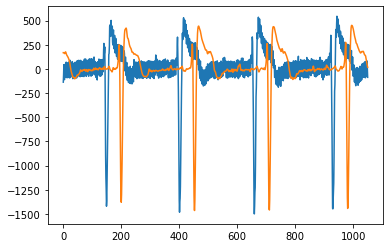

In [49]:
q=0
for ex in ecg:
    print(q)
    q = q+1
    plt.plot(ex[200:])
    plt.plot(lp(ex, 48, 101, 250)[200:])
    plt.show()

In [ ]:
%matplotlib inline

In [50]:
cc = c
c = (c*(3.3/2**12))/505

In [52]:
c = fir(lp(c, 55, 100, 250)[50:], [0.25, 0.25, 0.25, 0.25])[400:1200]

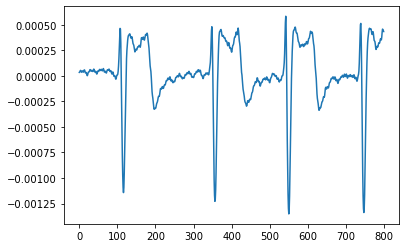

In [54]:
plt.plot(c)

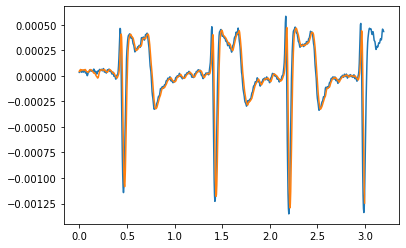

In [79]:
xy = np.array(range(800))*0.004
plt.plot(xy, c)
plt.plot(xy[:-50], fir(lp(c, 55, 100, 250)[50:], [0.25, 0.25, 0.25, 0.25]))#[400:1200])
plt.show()

In [69]:
shape(xy)

<ipython-input-69-85048dc4e924>:1: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  shape(xy)


(800,)

In [70]:
shape(fir(lp(c, 55, 100, 250), [0.25, 0.25, 0.25, 0.25]))

<ipython-input-70-cdd437a3ec8a>:1: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  shape(fir(lp(c, 55, 100, 250), [0.25, 0.25, 0.25, 0.25]))


(800,)

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


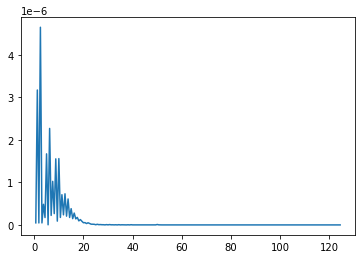

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


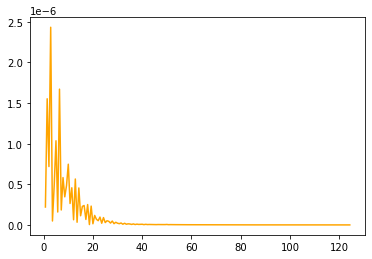

In [83]:
q = fft(c[400:1200], 250)
qq = fft(fir(lp(c, 55, 100, 250)[50:], [0.25, 0.25, 0.25, 0.25])[400:1200], 250)
plt.plot(q[0], q[1])
plt.show()
plt.plot(qq[0], qq[1], color="orange")
plt.show()

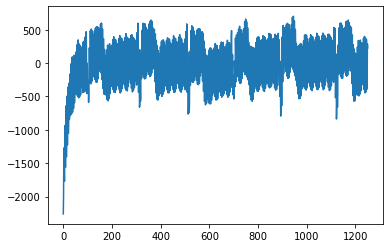

In [85]:
plt.plot(a)

In [86]:
print(c)

[3.3734840530424456e-05, 3.6147216387964274e-05, 4.5289630175426144e-05, 5.329670059676558e-05, 5.0371976956202374e-05, 3.9753431843335956e-05, 3.463841473428336e-05, 4.072770844654756e-05, 4.852440367108854e-05, 4.658049965519106e-05, 3.781307183944843e-05, 3.608058294623891e-05, 4.687215795483829e-05, 5.836401450733592e-05, 5.587065392879504e-05, 4.0915185796562425e-05, 2.91349090717487e-05, 2.9581588435180956e-05, 3.320880820376077e-05, 2.621729193291266e-05, 1.0163947726781057e-05, 1.3104090132231023e-06, 9.833889472409822e-06, 2.6987193429744638e-05, 3.7123099434252034e-05, 3.756823411558792e-05, 3.941121781356163e-05, 4.9572114151782576e-05, 6.0219912928863894e-05, 6.007477443682098e-05, 5.083169226546371e-05, 4.51134773291239e-05, 4.9024620203788036e-05, 5.419627472019849e-05, 5.076577342496348e-05, 4.273469981863218e-05, 4.324550754975929e-05, 5.5483690755640116e-05, 6.607224511916779e-05, 6.150535354386689e-05, 4.6029753816606096e-05, 3.6306403053042514e-05, 3.956187189885075e

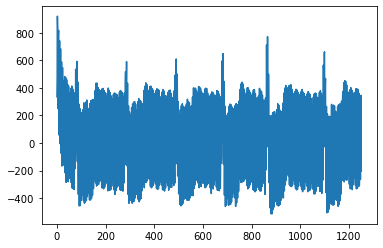

In [87]:
plt.plot(data1)

In [104]:
def sinWave(frequency):
    time = np.arange(0, 500, 0.004);
    signal = np.sin(2*np.pi*frequency*time)
    return(signal)

def fft(f, freq):
    dt = 1/freq
    t = np.arange(0, dt*len(f), dt)
    n = len(t)
    fhat = np.fft.fft(f, n)
    PSD = fhat*np.conj(fhat) / n
    freq = (1/(dt*n)) * np.arange(n)
    l = np.arange(1, np.floor(n/2), dtype = 'int')
    plt.plot(freq[l], PSD[l])    
    plt.show()
    return([freq[l], PSD[l]])

def lp_taps(freq, tn, sr):
    sample_rate = sr
    nyq_rate = sample_rate / 2.0
    f1 = freq/nyq_rate
    taps = np.array(signal.firwin(tn, f1))
    return(taps)

def hp_taps(freq, tn, sr):
    sample_rate = sr
    nyq_rate = sample_rate / 2.0
    f1 = freq/nyq_rate
    taps = np.array(signal.firwin(tn, f1, pass_zero=False))
    return(taps)
    
def lp(sig, freq, tn, sr):
    sample_rate = sr
    x = sig
    nyq_rate = sample_rate / 2.0
    f1 = freq/nyq_rate
    taps = np.array(signal.firwin(tn, f1))
    filtered = fir(sig, taps)
    return(filtered)

def hp(sig, freq, tn, sr):
    sample_rate = sr
    x = sig
    nyq_rate = sample_rate / 2.0
    f1 = freq/nyq_rate
    taps = np.array(signal.firwin(tn, f1, pass_zero=False))
    filtered = fir(sig, taps)
    return(filtered)

def bp(sig, freq1, freq2, tn):
    sample_rate = 250.0
    x = sig
    nyq_rate = sample_rate / 2.0
    f1 = freq1/nyq_rate
    f2 = freq2/nyq_rate
    taps = np.array(signal.firwin(tn, [f1, f2]))
    filtered = fir(sig, taps)
    return(filtered)

def fir(signal, taps):
    filtered = []
    ht = len(taps)
    
    for i in range(ht):
        filtered = filtered+[signal[i]]
    
    for i in range(ht, len(signal)):
        summed = 0
        p=0
        for j in range(i-ht, i):
            summed = summed+(signal[j]*taps[p])
            p = p+1

        filtered = filtered+[summed]
            
    return(filtered)


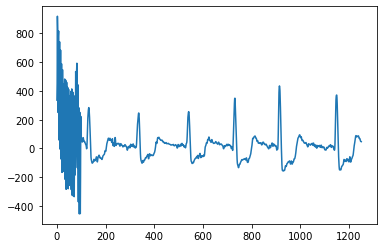

In [89]:
sample_rate = 250.0
nyq_rate = sample_rate / 2.0
f1 = 50/nyq_rate

taps = np.array(signal.firwin(100, f1))
res = fir(data1, taps)
plt.plot(res)

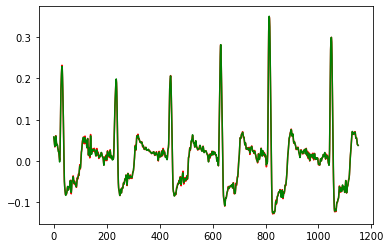

In [101]:
flt = lp(data1, 55, 100, 250)

plt.plot(np.array(flt[100:])*(3.3/4096.0), color = 'r', label = 'Unfiltered')
plt.plot(np.array(res)[100:]*(3.3/4096), color = 'g', label = 'Filtered')
plt.show()

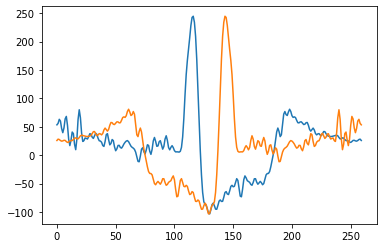

In [102]:
template = flt[220:480]
coeficients = template[::-1]
plt.plot(template)
plt.plot(coeficients)
plt.show()

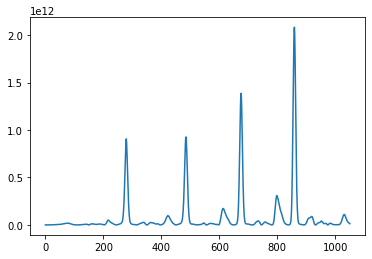

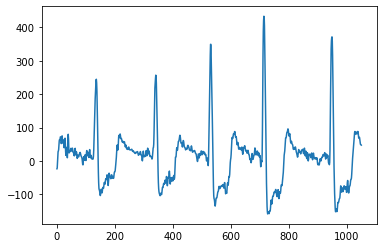

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


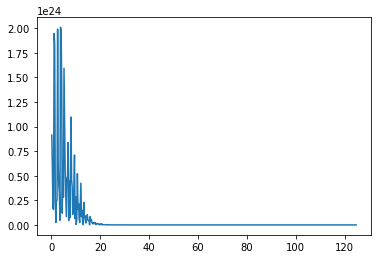

[array([  0.2378687 ,   0.47573739,   0.71360609,   0.95147479,
          1.18934348,   1.42721218,   1.66508088,   1.90294957,
          2.14081827,   2.37868696,   2.61655566,   2.85442436,
          3.09229305,   3.33016175,   3.56803045,   3.80589914,
          4.04376784,   4.28163654,   4.51950523,   4.75737393,
          4.99524263,   5.23311132,   5.47098002,   5.70884872,
          5.94671741,   6.18458611,   6.4224548 ,   6.6603235 ,
          6.8981922 ,   7.13606089,   7.37392959,   7.61179829,
          7.84966698,   8.08753568,   8.32540438,   8.56327307,
          8.80114177,   9.03901047,   9.27687916,   9.51474786,
          9.75261656,   9.99048525,  10.22835395,  10.46622265,
         10.70409134,  10.94196004,  11.17982873,  11.41769743,
         11.65556613,  11.89343482,  12.13130352,  12.36917222,
         12.60704091,  12.84490961,  13.08277831,  13.320647  ,
         13.5585157 ,  13.7963844 ,  14.03425309,  14.27212179,
         14.50999049,  14.74785918,  14.

In [106]:
dt = flt[200:]
hr = np.array(signal.lfilter(coeficients, 1.0, dt))
hr = hr**2
plt.plot(hr)
plt.show()

plt.plot(dt)
plt.show()

fft(hr, 250)

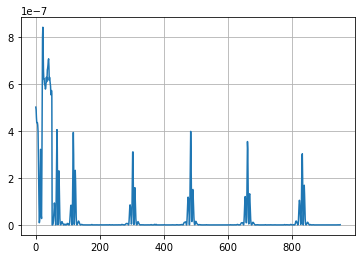

In [110]:
ecg = electrocardiogram()
dt = np.array(lp(ecg[2000:3000], 55, 101, 360))*(3.3/4096)
plt.plot(np.array(hp(dt, 15, 101, 360)[50:])**2, label='r detection')
#plt.plot(hp(dt, , 101, 360)[50:], label='original')
plt.grid()
plt.show()

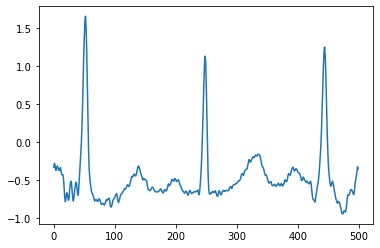

In [111]:
ecg = electrocardiogram()
plt.plot(ecg[500:1000])

In [ ]:
!ls ../ECG\ datasets/


In [ ]:
%matplotlib inline

<ipython-input-121-31b80b93e059>:6: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  dc = dc+[sum(data[i-100:i+100])/200]


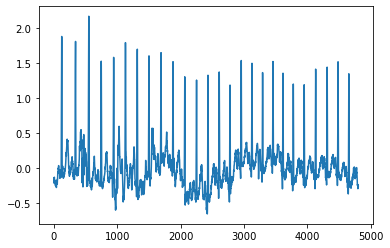

In [132]:
#ecgdata = loadmat('../ECG datasets/MLII/1 NSR/116m (2).mat')
values = electrocardiogram()[:5000]




values = values[:-200]-find_dc(values)

plt.plot(values)
plt.show()

In [ ]:
q = values

In [ ]:
fft(q)

In [ ]:
values = q[1000:1500]
tresh = mean(values**2)*3
r_waves = (values**2>tresh)
plt.plot(values)
plt.plot(r_waves*600)

In [ ]:
plt.plot(tresh)

<ipython-input-122-033fb6275606>:7: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  data = data-mean(data) #removes extra DC


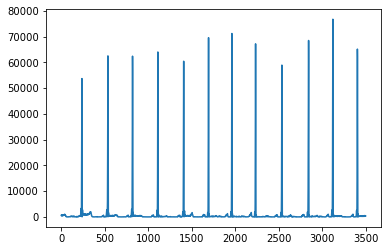

In [122]:
ecgdata = loadmat('../ECG datasets/MLII/1 NSR/100m (1).mat')
values = np.array(ecgdata['val'][0])

def clean(data, sr):
    #cleaning data
    data = lp(data, 55, 101, sr) #removes 60Hz
    data = data-mean(data) #removes extra DC
    
    return(data[100:])



dat = clean(values, 250)
r_example = dat[215:250][::-1]
rr = signal.lfilter(r_example, 1, dat)**2
#rr = rr>mean(rr)*10
#hp(dat, 10, 101, 250)
#plt.plot(dat)
plt.plot(dat**2)
plt.show()

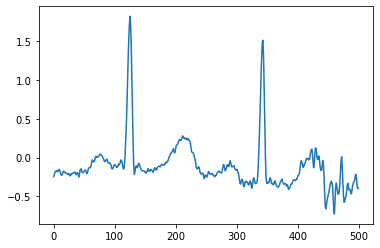

In [114]:
ecg = electrocardiogram()
plt.plot(ecg[:500])

<ipython-input-115-569417a17982>:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  data = data-mean(data)


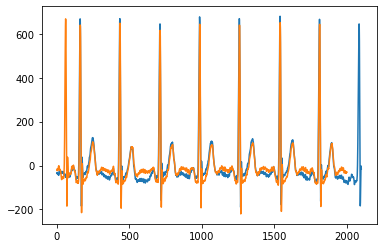

In [115]:
ecgdata = loadmat('../ECG datasets/MLII/1 NSR/116m (2).mat')
data = np.array(ecgdata['val'][0])[:2100]
data = data-mean(data)
plt.plot(data)
data = hp(data, 1, 201, 250)[100:]
plt.plot(data)
plt.show()

In [116]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [117]:
data

[-21.814761904761895,
 -15.814761904761895,
 -15.814761904761895,
 -15.814761904761895,
 -17.814761904761895,
 -20.814761904761895,
 -22.814761904761895,
 -20.814761904761895,
 -17.814761904761895,
 -14.814761904761895,
 -5.814761904761895,
 -4.814761904761895,
 -3.8147619047618946,
 -0.8147619047618946,
 -3.8147619047618946,
 -5.814761904761895,
 -8.814761904761895,
 -13.814761904761895,
 -14.814761904761895,
 -15.814761904761895,
 -17.814761904761895,
 -22.814761904761895,
 -20.814761904761895,
 -21.814761904761895,
 -21.814761904761895,
 -24.814761904761895,
 -26.814761904761895,
 -33.814761904761895,
 -41.814761904761895,
 -46.814761904761895,
 -55.814761904761895,
 -60.814761904761895,
 -63.814761904761895,
 -63.814761904761895,
 -60.814761904761895,
 -60.814761904761895,
 -58.814761904761895,
 -55.814761904761895,
 -51.814761904761895,
 -50.814761904761895,
 -53.814761904761895,
 -52.814761904761895,
 -55.814761904761895,
 -57.814761904761895,
 -55.814761904761895,
 -58.814761904

In [118]:
np.set_printoptions(threshold=np.inf)
np.array(data)

array([-2.18147619e+01, -1.58147619e+01, -1.58147619e+01, -1.58147619e+01,
       -1.78147619e+01, -2.08147619e+01, -2.28147619e+01, -2.08147619e+01,
       -1.78147619e+01, -1.48147619e+01, -5.81476190e+00, -4.81476190e+00,
       -3.81476190e+00, -8.14761905e-01, -3.81476190e+00, -5.81476190e+00,
       -8.81476190e+00, -1.38147619e+01, -1.48147619e+01, -1.58147619e+01,
       -1.78147619e+01, -2.28147619e+01, -2.08147619e+01, -2.18147619e+01,
       -2.18147619e+01, -2.48147619e+01, -2.68147619e+01, -3.38147619e+01,
       -4.18147619e+01, -4.68147619e+01, -5.58147619e+01, -6.08147619e+01,
       -6.38147619e+01, -6.38147619e+01, -6.08147619e+01, -6.08147619e+01,
       -5.88147619e+01, -5.58147619e+01, -5.18147619e+01, -5.08147619e+01,
       -5.38147619e+01, -5.28147619e+01, -5.58147619e+01, -5.78147619e+01,
       -5.58147619e+01, -5.88147619e+01, -5.78147619e+01, -5.38147619e+01,
       -4.88147619e+01, -3.88147619e+01, -1.88147619e+01,  1.11852381e+01,
        5.81852381e+01,  

../ECG datasets/MLII/1 NSR/112m (2).mat


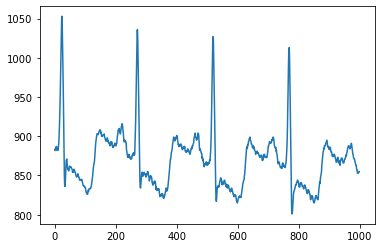

../ECG datasets/MLII/1 NSR/113m (2).mat


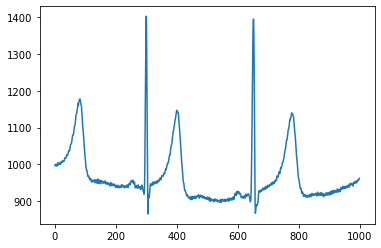

../ECG datasets/MLII/1 NSR/114m (2).mat


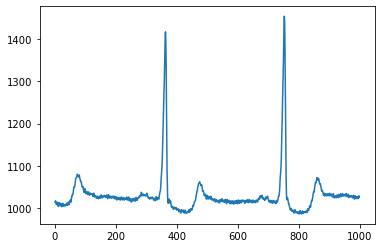

../ECG datasets/MLII/1 NSR/115m (2).mat


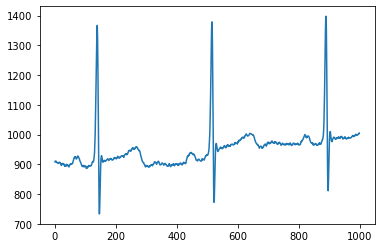

../ECG datasets/MLII/1 NSR/116m (2).mat


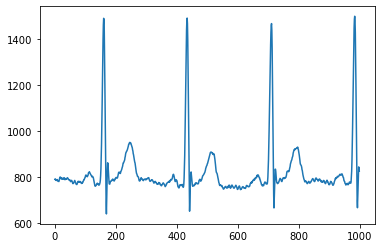

In [119]:
for i in range(5):
    print('../ECG datasets/MLII/1 NSR/'+str(i+112)+'m (2).mat')
    ecgdata = loadmat(str('../ECG datasets/MLII/1 NSR/'+str(i+112)+'m (2).mat'))
    plt.plot(np.array(ecgdata['val'][0])[:1000])
    plt.show()

In [120]:
taps = lp_taps(48, 101, 250)
taps

array([-2.99267749e-04,  2.87092104e-04,  5.41803113e-04,  8.96559473e-05,
       -5.68570574e-04, -5.58562832e-04,  2.60668141e-04,  9.15362310e-04,
        4.05941643e-04, -8.47581901e-04, -1.20824172e-03,  1.14051159e-04,
        1.64287014e-03,  1.17696861e-03, -1.14562157e-03, -2.40791891e-03,
       -4.80811470e-04,  2.63280608e-03,  2.69085464e-03, -1.13020102e-03,
       -4.21176288e-03, -1.93518163e-03,  3.62385773e-03,  5.20298240e-03,
       -3.14307426e-04, -6.53704277e-03, -4.73455977e-03,  4.16436182e-03,
        8.93691004e-03,  1.98035594e-03, -9.16391181e-03, -9.52270353e-03,
        3.55082459e-03,  1.42010570e-02,  6.83731520e-03, -1.17685429e-02,
       -1.75197656e-02,  5.25875720e-04,  2.18885480e-02,  1.67424774e-02,
       -1.39833590e-02, -3.25122597e-02, -8.41321830e-03,  3.61053049e-02,
        4.18967326e-02, -1.54710545e-02, -7.79032682e-02, -4.83512734e-02,
        1.05583260e-01,  2.97048020e-01,  3.83886064e-01,  2.97048020e-01,
        1.05583260e-01, -

In [43]:
%matplotlib qt

<ipython-input-135-43b4aed20262>:6: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  dc = dc+[sum(data[i-100:i+100])/200]
<ipython-input-135-43b4aed20262>:23: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  if r_wave[i]>mean(data**2)*3 and data[w]>0:


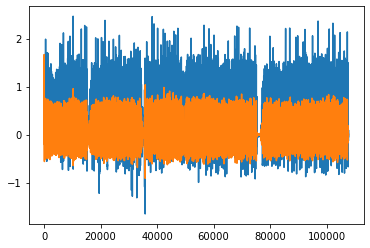

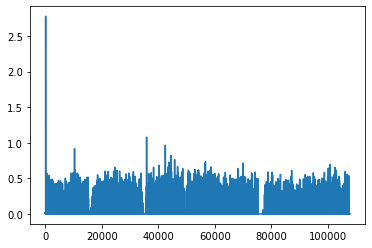

<ipython-input-135-43b4aed20262>:41: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  qrs_complex = qrs_complex > mean(qrs_complex)*1


No handles with labels found to put in legend.


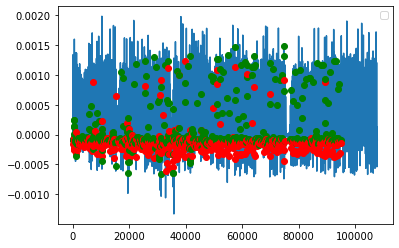

RR interval: 0.843992110453649
HR: 71.09071193538738
QRS duration: 25.225524475524477


<ipython-input-135-43b4aed20262>:142: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  qrs_duration = mean(qrs_intervals)


In [135]:
values = electrocardiogram()[:1000]

def find_dc(data):
    dc = []
    for i in range(100, len(data)-100):
        dc = dc+[sum(data[i-100:i+100])/200]
    return(dc)

def pre_processing(data, n):
    taps = lp_taps(48, 101, 250)
    data = fir(data, taps)
    data = fir(data, [1/n]*n)
    dc = find_dc(data)
    data = np.array(data[100:-100])-np.array(dc)
    return data

def process(data):
    n=4
    r_wave = np.array(data**2)
    r_wave = fir(r_wave, [1/n]*n)
    w=0
    for i in range(len(r_wave)):
        if r_wave[i]>mean(data**2)*3 and data[w]>0:
            r_wave[i] = 1
        else:
            r_wave[i] = 0
        w = w+1

    
    n = 10
    taps = hp_taps(10, 101, 250)
    qrs_complex = np.array(fir(data, taps))**2
    
    plt.plot(data)
    plt.plot(fir(data, taps)[50:])
    plt.show()
    plt.plot(np.array(fir(data, taps))**2)
    plt.show()
    
    qrs_complex = fir(qrs_complex, [1/n]*n)
    qrs_complex = qrs_complex > mean(qrs_complex)*1
    return(r_wave, qrs_complex)

def delete(data, s, t):
    for i in range(s, s+t):
        data[i]=0
    return(data)

def clean(data, sp):
    r = ""
    lenghts = []
    l=0
    for i in data:
        r = r+str(int(i))
    r = r.split("0")
    
    for i in range(len(r)):
        if r[i] != "":
            lenghts = lenghts+[[len(r[i]), i+l]] 
            l = l+len(r[i])
            
    #removes small peaks
    n = len(lenghts)
    for i in range(n):
        if lenghts[i][0]<=5:
            data = delete(data, lenghts[i][1], lenghts[i][0])
    
    return(data)

def waves(eecg, waves, Hpeak=1):
    peaks = []
    amplitudes = []
    starts = []
    ends = []
    intervals = []
    r = ""
    
    lenghts = []
    l=0
    
    ecg = abs(eecg)
    
    for i in waves:
        r = r+str(int(i))
    r = r.split("0")
    
    for i in range(len(r)):
        if r[i] != "":
            lenghts = lenghts+[[len(r[i]), i+l]] 
            l = l+len(r[i])

    n = len(lenghts)
    
    for i in range(n):
        peak = [lenghts[i][1], ecg[lenghts[i][1]]]
        starts = starts+[lenghts[i][1]]
        ends = ends+[lenghts[i][1]+lenghts[i][0]-1]
        intervals = intervals+[lenghts[i][0]]
        if Hpeak==1 :
            for j in range(lenghts[i][0]-1):
                height = ecg[lenghts[i][1]+j]
                if height>peak[1]:
                    peak = [lenghts[i][1]+j, height]
            peaks = peaks+[peak[0]]
            amplitudes = amplitudes+[peak[1]]
    
    if Hpeak==1 :
        return([peaks, amplitudes], starts, ends, intervals)
    else:
        return(starts, ends, intervals)
    
#def r_peaks()

d = ecg
d = np.array(pre_processing(d, 4))
r_waves, qrs_complexes = process(d)
#r_waves = clean(r_waves, 10)
#qrs_complexes = clean(qrs_complexes, 10)
r_peaks, r_starts, r_ends, r_intervals = waves(d, r_waves, 1)
nn, q_starts, s_ends, qrs_intervals = waves(d, qrs_complexes[50:], 1)
plt.plot(d*(3.3/4096.0))#, label = 'ECG')
#plt.plot(np.array(qrs_complexes[50:])*0.4)#, label = 'qrs complex')

q_starts = np.array(q_starts)
s_ends = np.array(s_ends)

for i in range(len(r_peaks[0])):
    #plt.plot(r_peaks[0][i], d[r_peaks[0][i]]*(3.3/4096.0), marker='o', color='r', ls='')
    plt.plot(q_starts[i]-20, d[q_starts[i]-20]*(3.3/4096.0), marker='o', color='g', ls='') 
    plt.plot(s_ends[i], d[s_ends[i]]*(3.3/4096.0), marker='o', color='r', ls='')

plt.legend()
plt.show()     

rr_interval = 0
for i in range(len(r_peaks[0])-1):
    rr_interval = rr_interval+(r_peaks[0][i+1]-r_peaks[0][i])
rr_interval = (rr_interval/len(r_peaks[0])-1)*(1/250)
hr = 60/rr_interval

qrs_duration = 0
qrs_duration = mean(qrs_intervals)
print(str("RR interval: "+str(rr_interval)))
print(str("HR: "+str(60/rr_interval)))
print(str("QRS duration: "+str(qrs_duration)))

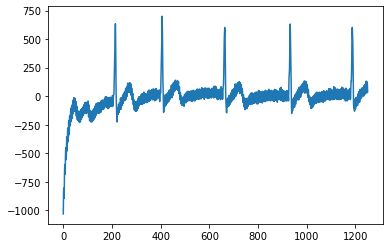

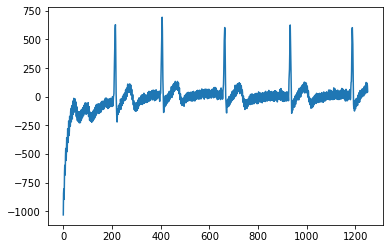

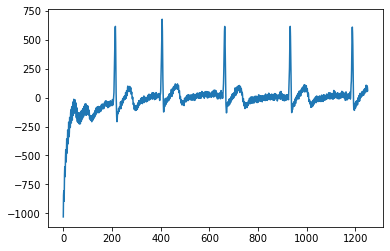

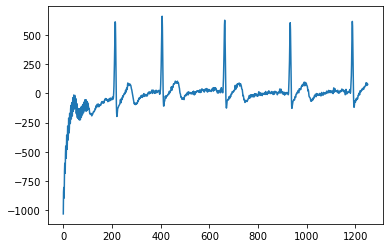

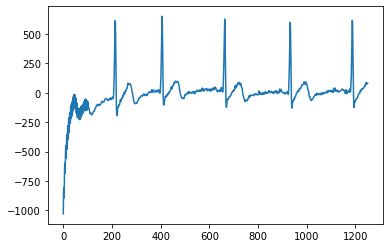

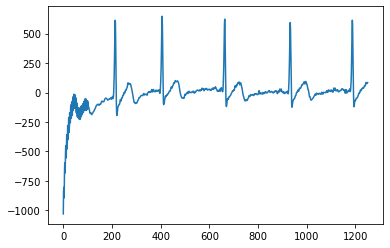

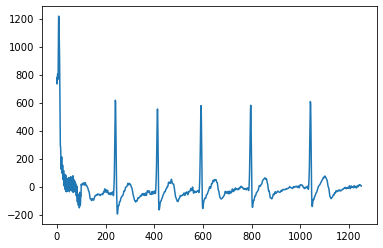

In [15]:
d = ecg[16]
d = lp(d, 65, 100, 250)
plt.plot(d)
plt.show()

d = ecg[16]
d = lp(d, 62, 100, 250)
plt.plot(d)
plt.show()

d = ecg[16]
d = lp(d, 60, 100, 250)
plt.plot(d)
plt.show()

d = ecg[16]
d = lp(d, 58, 100, 250)
plt.plot(d)
plt.show()

d = ecg[16]
d = lp(d, 55, 100, 250)
plt.plot(d)
plt.show()

d = ecg[16]
d = lp(d, 50, 100, 250)
plt.plot(d)
plt.show()

d = ecg[13]
d = lp(d, 48, 100, 250)
plt.plot(d)

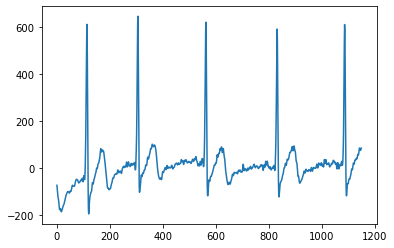

In [12]:
plt.plot(d[100:])

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


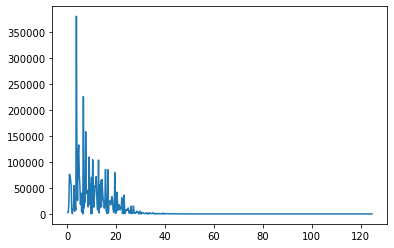

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


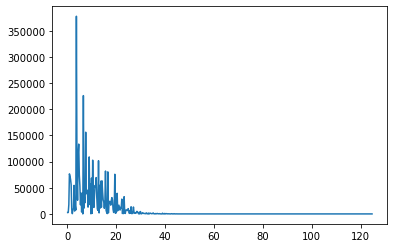

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


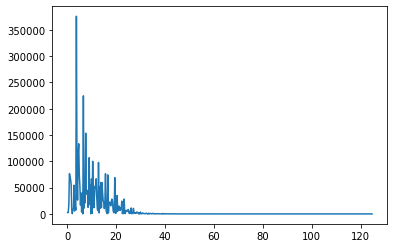

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


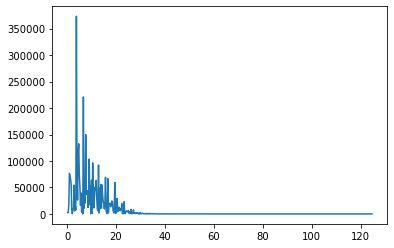

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


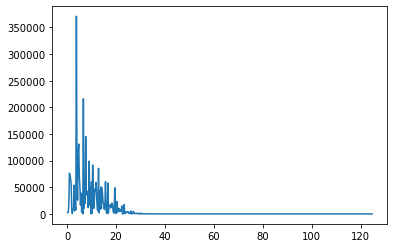

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


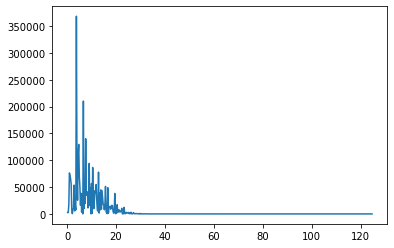

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


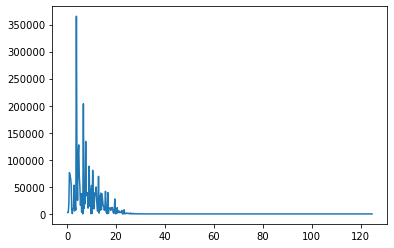

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


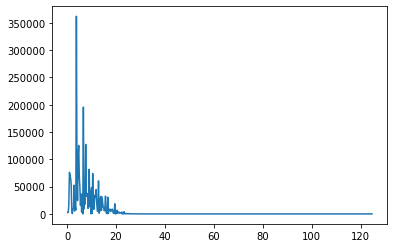

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


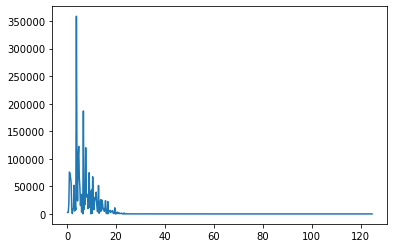

In [238]:
for n in range(1, 10):
    fft(fir(d, [1/n]*n))

In [173]:
print(n)

[[18, 166, 361, 622, 896], [88.96294278460832, 94.47408910532302, 73.11588608201532, 72.3772905387127, 76.68463713864966]]


In [85]:
r_moment

[114, 658.5461025975502]

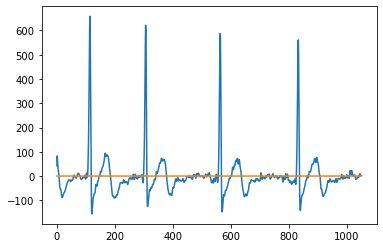

In [52]:
z = fir(d**2, [1/4]*4, 0)
plt.plot(d)
plt.plot(z>mean(z)*3)

In [40]:
a = [69]*1000
len(a)

1000

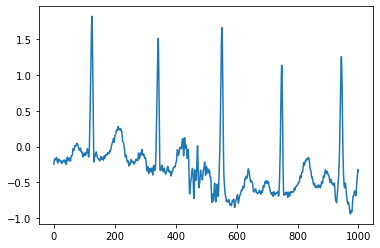

In [14]:
plt.plot(values)

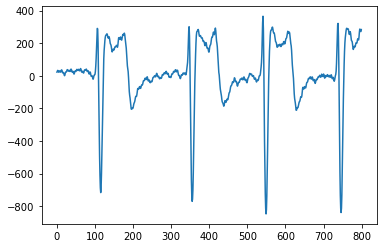

In [94]:
plt.plot(c)

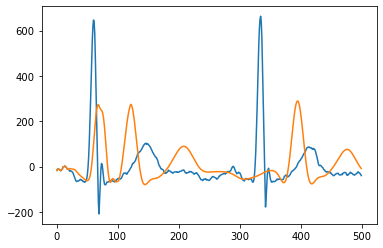

In [112]:
n=20
data = values[:500]
taps = lp_taps(10, 101, 250)
qrs_complex = fir(data, taps, 0)
qrs_complex = fir(qrs_complex, [1/n]*n, 0)
#qrs_complex = qrs_complex > mean(qrs_complex)*3
plt.plot(data)
plt.plot(qrs_complex)

In [ ]:
taps = lp_taps(10, 100, 250)
plt.plot(taps)

In [90]:
print(time.time())
time.sleep(1)
print(time.time())

1623776828.1231081
1623776829.1268091


In [2]:
import serial
from serial import *

In [17]:
import serial.tools.list_ports

In [31]:
def listSerialPorts():
    try:
        ports = serial.tools.list_ports.comports()
        return([port.name for port in ports])

    except:
        return(0)

In [2]:
from bokeh.io import show
from bokeh.models import Button, CustomJS, Select
from bokeh.plotting import figure, curdoc
from datetime import datetime
import random
import serial
from serial import *
#from digitalProcessing import *
from bokeh.models import ColumnDataSource
import serial.tools.list_ports

In [47]:
from bokeh.layouts import column, row, grid, GridBox
from bokeh.core.properties import Enum

In [ ]:
Enum()

In [44]:
ports = ["a", "b", "c", "d", "e"]
def prnt(attr, old, new):
    print(value)

In [56]:
bauds = list(np.array([300, 1200, 2400, 4800, 9600, 19200, 38400, 57600, 115200, 230400, 250000, 500000, 1000000, 2000000], dtype='str'))

In [62]:
import bokeh
from bokeh import colors

In [47]:
serialSelect = Select(title="Available ports:", value=ports[0], options=ports)
serialSelect.on_change('value', prnt)

In [34]:
listSerialPorts()

['cu.Bluetooth-Incoming-Port']

In [7]:
listSerialPorts()

0

In [73]:
#Creates serialPort to store location of the serial device
serialPort = "/dev/cu.usbserial-A9M9DV3R"

#Creates baudRate to store speed of serial communication
baudRate = 250000

def startSerial(sp, br):
    global ser
    try:
        #Opens serial port and starts communication
        ser = serial.Serial(port=sp, baudrate=br, timeout=2)
        ser.close()
        return(1);

    except:
        return(0);
    
def listSerialPorts():
    try:
        ports = serial.tools.list_ports.comports()
        return(ports)

    except:
        return(0)

def readSerial(bf):
    try:
        ser.close()
        ser.open()
        read = str(ser.readline())
        read = int(read[read.find(":")+1:-8])
        ser.close()
        return(read)

    except:
        return(bf)

In [82]:
startSerial(serialPort, baudRate)

1

In [88]:
ser

Serial<id=0x7fdaba6b7310, open=True>(port='/dev/cu.usbserial-A9M9DV3R', baudrate=250000, bytesize=8, parity='N', stopbits=1, timeout=2, xonxoff=False, rtscts=False, dsrdtr=False)

In [54]:
readSerial(1)

1663

In [48]:
print(startSerial(serialPort, baudRate))

1


In [43]:
ser.close()
ser.open()
read = str(ser.readline())
read = int(read[read.find(":")+1:-8])
ser.close()
print(read)

2955


1249


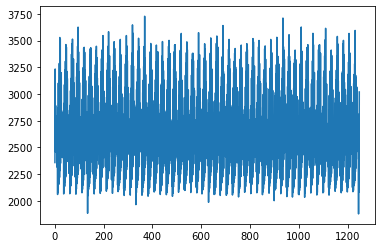

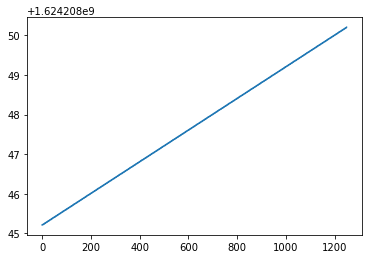

In [54]:
startdata = []

def dt(st):
    st = str(st)
    try:
        st = int(st[st.find(":")+1:-8])
        return st
    except:
        return
    return st

ser = serial.Serial(port='/dev/cu.usbserial-A9M9DV3R', baudrate=250000,)    
t = 0
i = []
tm = time.time()
while time.time()-tm<=5:
    t=dt(ser.readline())
    i = i+[time.time()]
    if t!=None:
        data = data+[t]

ser.close()

print(len(data))
plt.plot(data)
plt.show()

plt.plot(i)

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


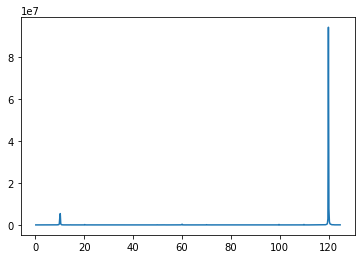

[array([  0.20016013,   0.40032026,   0.60048038,   0.80064051,
          1.00080064,   1.20096077,   1.4011209 ,   1.60128102,
          1.80144115,   2.00160128,   2.20176141,   2.40192154,
          2.60208167,   2.80224179,   3.00240192,   3.20256205,
          3.40272218,   3.60288231,   3.80304243,   4.00320256,
          4.20336269,   4.40352282,   4.60368295,   4.80384307,
          5.0040032 ,   5.20416333,   5.40432346,   5.60448359,
          5.80464371,   6.00480384,   6.20496397,   6.4051241 ,
          6.60528423,   6.80544436,   7.00560448,   7.20576461,
          7.40592474,   7.60608487,   7.806245  ,   8.00640512,
          8.20656525,   8.40672538,   8.60688551,   8.80704564,
          9.00720576,   9.20736589,   9.40752602,   9.60768615,
          9.80784628,  10.00800641,  10.20816653,  10.40832666,
         10.60848679,  10.80864692,  11.00880705,  11.20896717,
         11.4091273 ,  11.60928743,  11.80944756,  12.00960769,
         12.20976781,  12.40992794,  12.

In [64]:
fft(data, 250)

In [51]:
ser.close()

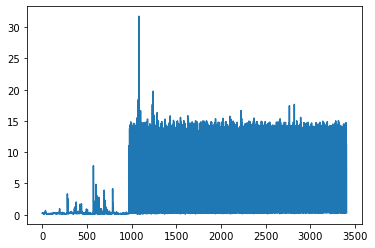

2.9338436983755507


In [45]:
ii = np.array(i)*1000

ans = []
for j in range(1, len(ii[1:])):
    ans = ans+[(ii[j]-ii[j-1])]

plt.plot(ans)
plt.show()
#anss = sum(ans)/len(ans)
#print(anss)

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


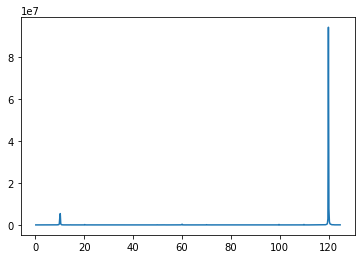

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


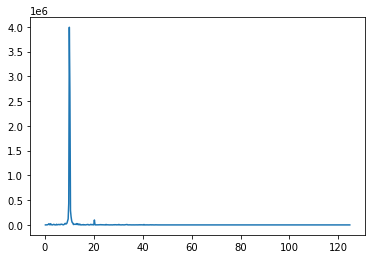

[array([  0.23832221,   0.47664442,   0.71496663,   0.95328885,
          1.19161106,   1.42993327,   1.66825548,   1.90657769,
          2.1448999 ,   2.38322212,   2.62154433,   2.85986654,
          3.09818875,   3.33651096,   3.57483317,   3.81315539,
          4.0514776 ,   4.28979981,   4.52812202,   4.76644423,
          5.00476644,   5.24308866,   5.48141087,   5.71973308,
          5.95805529,   6.1963775 ,   6.43469971,   6.67302193,
          6.91134414,   7.14966635,   7.38798856,   7.62631077,
          7.86463298,   8.1029552 ,   8.34127741,   8.57959962,
          8.81792183,   9.05624404,   9.29456625,   9.53288847,
          9.77121068,  10.00953289,  10.2478551 ,  10.48617731,
         10.72449952,  10.96282173,  11.20114395,  11.43946616,
         11.67778837,  11.91611058,  12.15443279,  12.392755  ,
         12.63107722,  12.86939943,  13.10772164,  13.34604385,
         13.58436606,  13.82268827,  14.06101049,  14.2993327 ,
         14.53765491,  14.77597712,  15.

In [68]:
fft(data, 250)
fft(pre_processing(data, 4), 250)

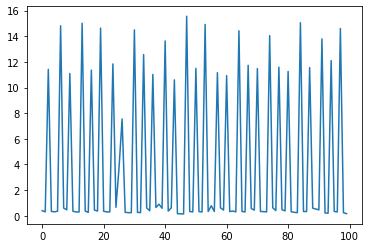

In [47]:
plt.plot(ans[1500:1600])

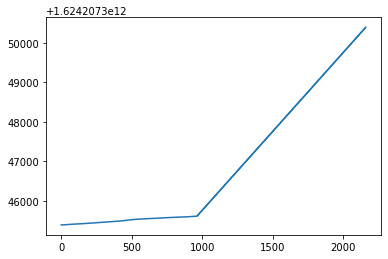

In [41]:
plt.plot(ii)

In [84]:
%matplotlib qt

In [94]:
fft(data, 3000)

/Users/fox/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[array([9.71534052e-02, 1.94306810e-01, 2.91460216e-01, ...,
        1.49965996e+03, 1.49975712e+03, 1.49985427e+03]),
 array([1.28351054e+06+0.j, 1.26468379e+06+0.j, 1.23794073e+06+0.j, ...,
        5.66758715e+00+0.j, 8.43490362e+00+0.j, 6.35637009e+00+0.j])]